In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import time
import math

import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
import collections
from decimal import Decimal

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, confusion_matrix, plot_confusion_matrix, roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler #, RobustScaler

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
data.isnull().sum().any()

False

In [8]:
non_fraud_total = len(data[data['Class'] == 0])
fraud_total = len(data[data['Class'] == 1])
non_fraud_perc = round( non_fraud_total / len(data) * 100, 2)
fraud_perc = round( fraud_total / len(data) * 100, 2)
print('Ukupan broj valjanih transakcija: ' + str(non_fraud_total) + '\n' +
      'Ukupan broj prevara: ' + str(fraud_total))
print('Postotak valjanih transakcija: ' + str(non_fraud_perc) + '%\n' + 
      'Postotak prevara: ' + str(fraud_perc) + '%')

Ukupan broj valjanih transakcija: 284315
Ukupan broj prevara: 492
Postotak valjanih transakcija: 99.83%
Postotak prevara: 0.17%


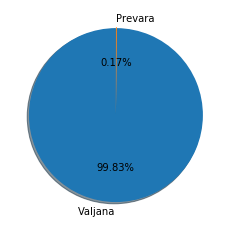

In [9]:
%matplotlib inline
labels = ['Valjana', 'Prevara']
sizes = [len(data[data['Class'] == 0]), len(data[data['Class'] == 1])]
explode = (0, .01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
 

plt.show()

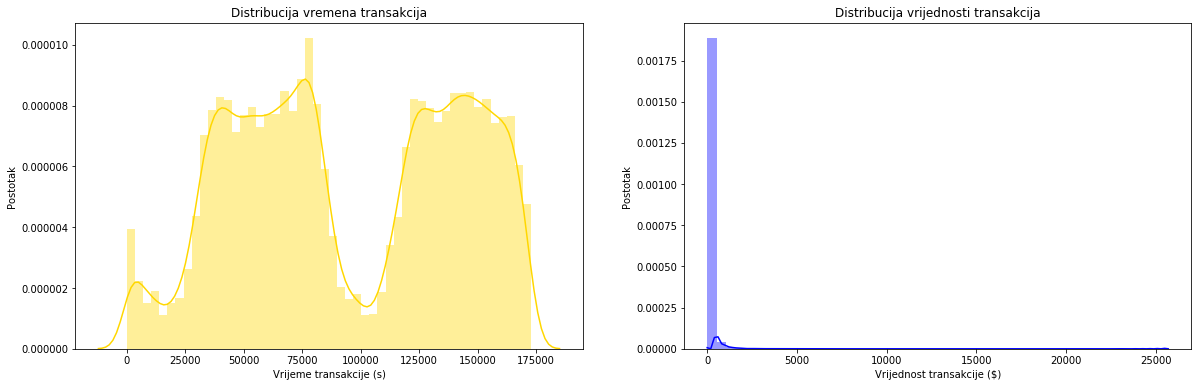

In [10]:
#distribucija vremena i vrijednosti
time_vals = data['Time'].values
amount_vals = data['Amount'].values


fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax2_labels = ['Postotak', 'Vrijeme transakcije (s)', 'Vrijednost transakcije ($)']
ax2[0].set_title('Distribucija vremena transakcija')
ax2[0].set_xlabel(ax2_labels[1])
ax2[0].set_ylabel(ax2_labels[0])
ax2[1].set_title('Distribucija vrijednosti transakcija')
ax2[1].set_xlabel(ax2_labels[2])
ax2[1].set_ylabel(ax2_labels[0])
sns.distplot(time_vals, ax=ax2[0], color='gold')
sns.distplot(amount_vals, ax=ax2[1], color='blue')
plt.show()

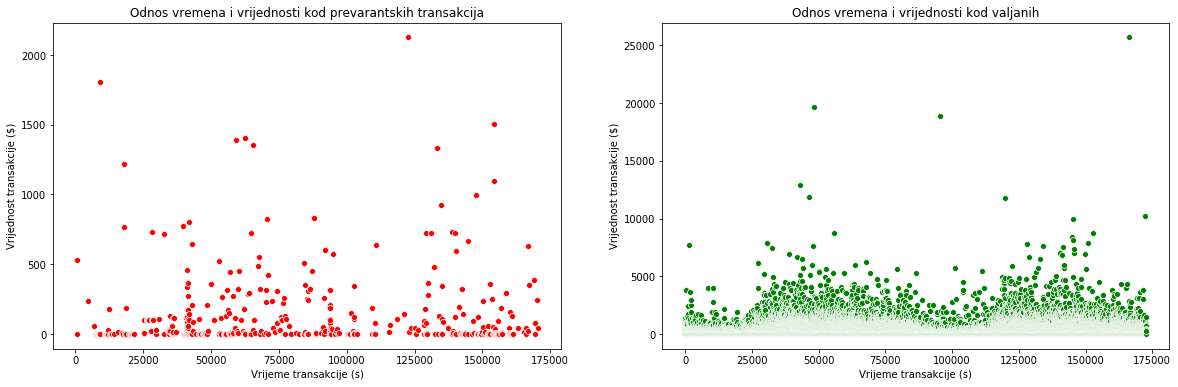

In [11]:
time_fraud = data[data['Class'] == 1]['Time'].values
time_non_fraud = data[data['Class'] == 0]['Time'].values

amount_fraud = data[data['Class'] == 1]['Amount'].values
amount_non_fraud = data[data['Class'] == 0]['Amount'].values

fig3, ax3 = plt.subplots(1,2, figsize=(20,6))
ax3_labels = ['Vrijeme transakcije (s)', 'Vrijednost transakcije ($)']
ax3[0].set_title('Odnos vremena i vrijednosti kod prevarantskih transakcija')
ax3[0].set_xlabel(ax3_labels[0])
ax3[0].set_ylabel(ax3_labels[1])
ax3[1].set_title('Odnos vremena i vrijednosti kod valjanih')
ax3[1].set_xlabel(ax3_labels[0])
ax3[1].set_ylabel(ax3_labels[1])
sns.scatterplot(time_fraud, amount_fraud, ax=ax3[0], color='r')
sns.scatterplot(time_non_fraud, amount_non_fraud, ax=ax3[1], color='g')
plt.show()

In [12]:
#vidimo da je dosta 'malih' transakcija pa ćemo provjeriti ima li to veze s time je li 
#transakcija prevara ili ne
amount_mean = round(np.mean(amount_vals),2)
amount_fraud_mean = round(np.mean(amount_fraud),2)
amount_non_fraud_mean = round(np.mean(amount_non_fraud),2)
print('Prosječna vrijednost transakcija = ' + str(amount_mean) + '$' +
     '\nProsječna vrijednost transakcija koje su prevare = ' + str(amount_fraud_mean) + '$' +
     '\nProsječna vrijednost transakcija koje su valjane = ' + str(amount_non_fraud_mean) + '$')
print()
print('Makismalna vrijednost transakcije koja je prevara = ' + str(max(amount_fraud)) + '$'
      +'\nMakismalna vrijednost transakcije koja je valjana = ' + str(max(amount_non_fraud)) + '$')

print()
num_amount_fraud_less_than_mean = np.count_nonzero(amount_fraud < amount_fraud_mean)
num_amount_non_fraud_less_than_mean = np.count_nonzero(amount_non_fraud < amount_non_fraud_mean)
print('Udio prevarantskih transakcija manjih od njihove prosječne vrijednost = ' 
     + str(round(num_amount_fraud_less_than_mean / len(amount_fraud),2)) + '%'
     + '\nUdio valjanih transakcija manjih od njihove prosječne vrijednosti = '
     + str(round(num_amount_non_fraud_less_than_mean / len(amount_non_fraud),2)) + '%')


Prosječna vrijednost transakcija = 88.35$
Prosječna vrijednost transakcija koje su prevare = 122.21$
Prosječna vrijednost transakcija koje su valjane = 88.29$

Makismalna vrijednost transakcije koja je prevara = 2125.87$
Makismalna vrijednost transakcije koja je valjana = 25691.16$

Udio prevarantskih transakcija manjih od njihove prosječne vrijednost = 0.78%
Udio valjanih transakcija manjih od njihove prosječne vrijednosti = 0.77%


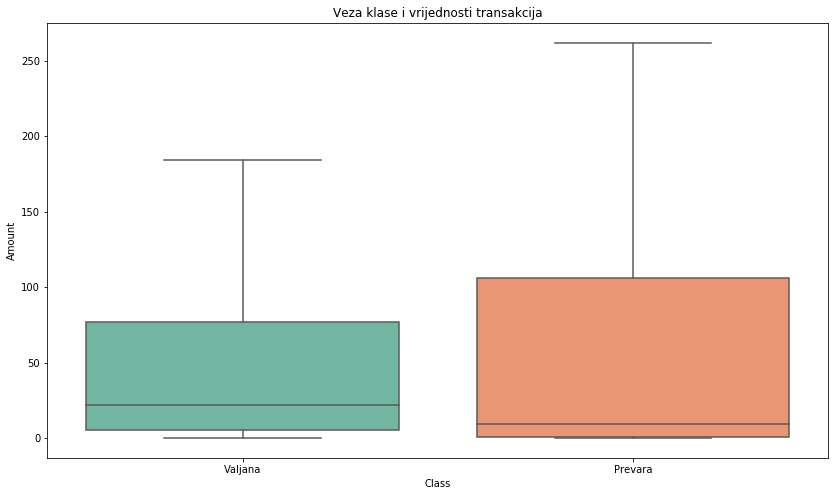

In [13]:
#boxplotat ćemo za bolju vizualnu intuiciju
fig5, ax5 = plt.subplots(1,1,figsize=(14,8))
ax5.set_title('Veza klase i vrijednosti transakcija')
sns.boxplot(data['Class'], data['Amount'],
            showfliers=False, palette='Set2')
plt.xticks([0,1],['Valjana', 'Prevara'])
plt.show()

In [14]:
#vrijeme ćemo prikazati u satima da bi lakse razumjeli
time_hours = np.sort(np.ceil((time_vals // 3600) % 24))
time_fraud_hours = np.sort(np.ceil(time_fraud // 3600) % 24)
time_non_fraud_hours = np.sort(np.ceil(time_non_fraud // 3600) % 24)

time_m = np.mean(time_hours)
time_fm = np.mean(time_fraud_hours)
time_nfm = np.mean(time_non_fraud_hours)

time_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_m * 60, 60))
time_fraud_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_fm * 60, 60))
time_non_fraud_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_nfm * 60, 60))

print('Prosječno vrijeme kada su se izvršavale transakcije = ' + str(time_mean)  +
     '\nProsječno vrijeme kada su se izvršavale preverantske transakcije = ' + str(time_fraud_mean) +
     '\nProsječno vrijeme kada su se izvršavale valjane transakcije = ' + str(time_non_fraud_mean))

Prosječno vrijeme kada su se izvršavale transakcije = 14:03
Prosječno vrijeme kada su se izvršavale preverantske transakcije = 11:39
Prosječno vrijeme kada su se izvršavale valjane transakcije = 14:03


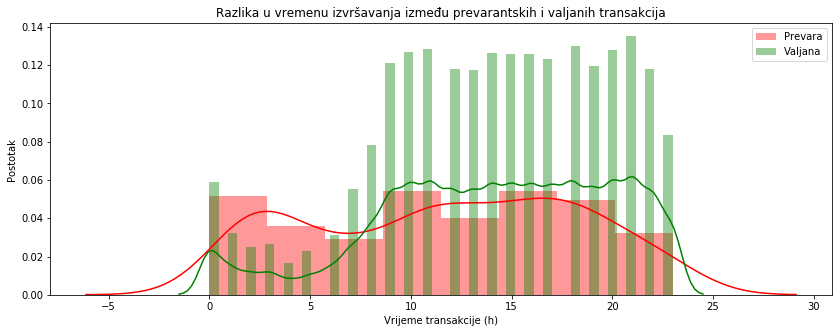

In [15]:
#vrijeme pomoću histograma
fig4, ax4 = plt.subplots(1,1, figsize=(14,5))
ax4_labels = ['Vrijeme transakcije (h)', 'Postotak']
ax4.set_title('Razlika u vremenu izvršavanja između prevarantskih i valjanih transakcija')
ax4.set_xlabel(ax4_labels[0])
ax4.set_ylabel(ax4_labels[1])
sns.distplot(time_fraud_hours, color='r')
sns.distplot(time_non_fraud_hours, color='g')
plt.legend(['Prevara', 'Valjana'])
plt.show()

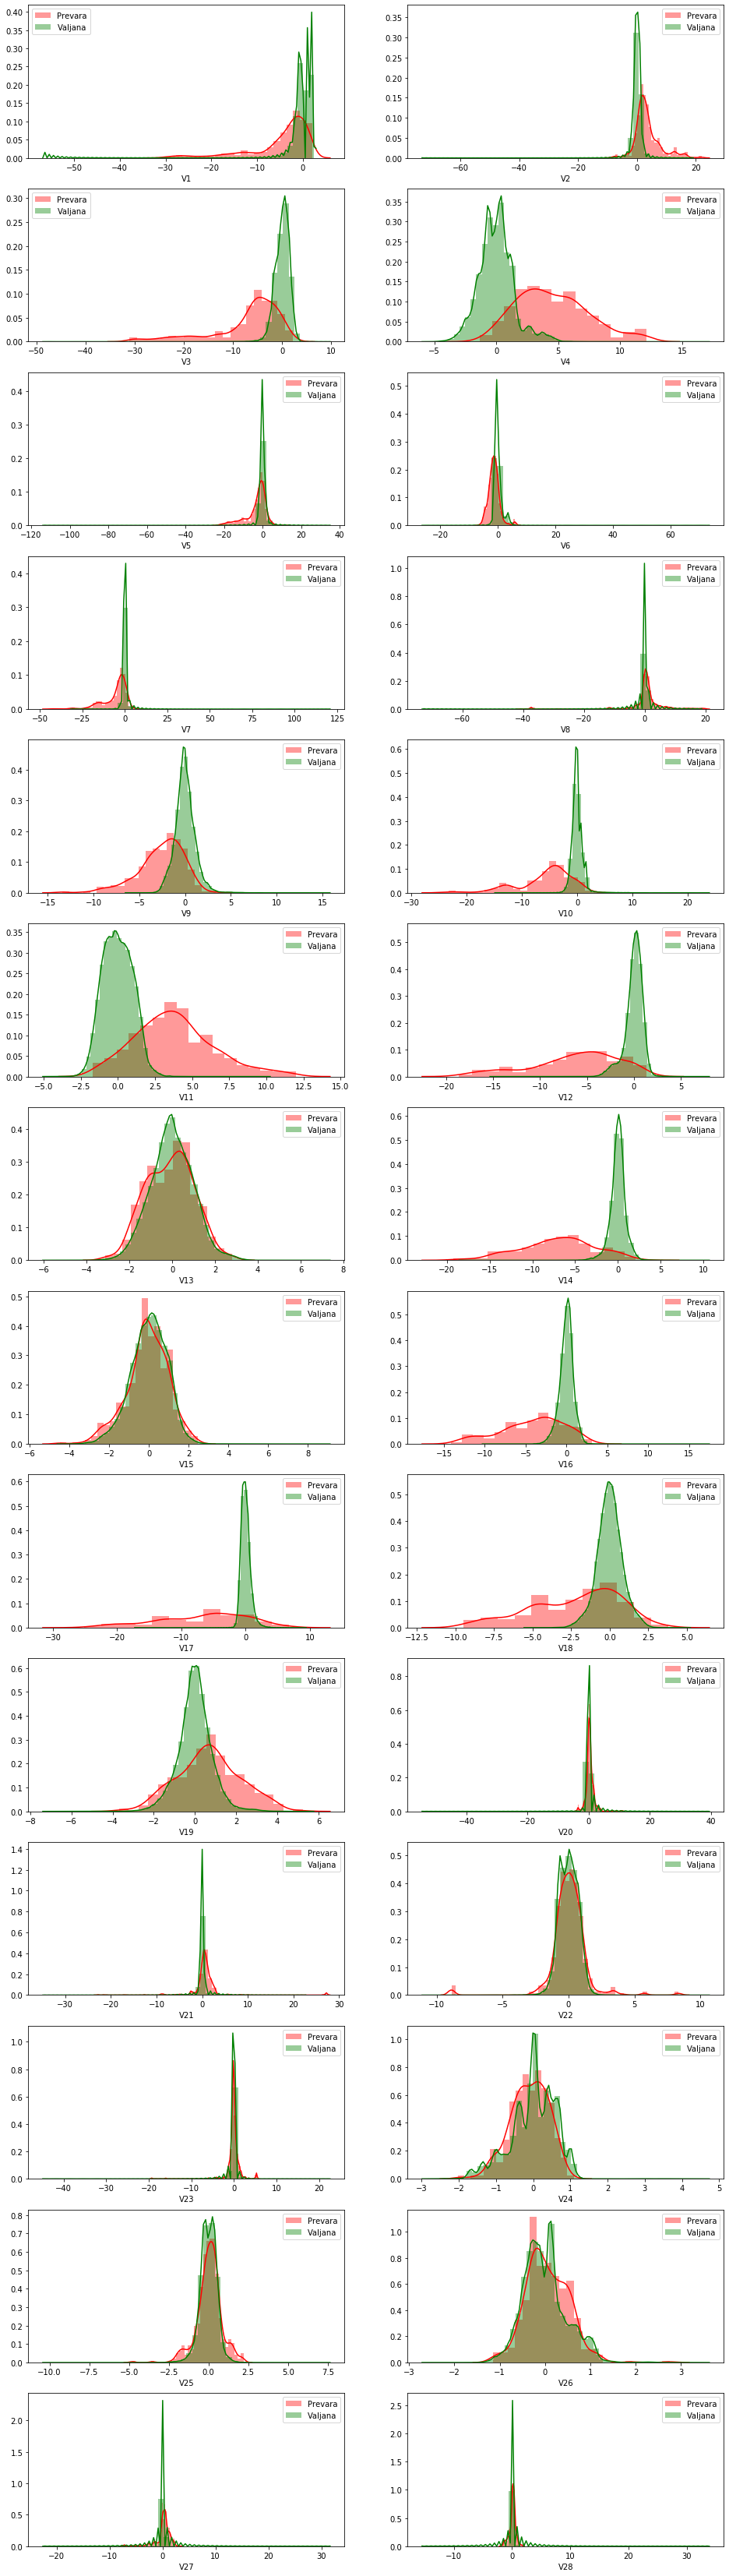

In [16]:
#ostale znacajke (V1-v28)
v_features = data.iloc[:,1:29].columns
plt.figure(figsize=(16,60))

v_grid = gridspec.GridSpec(14, 2)

for i, feature in enumerate(data[v_features]):
    ax6 = plt.subplot(v_grid[i])
    sns.distplot(data[data['Class'] == 1][feature],  color='red') 
    sns.distplot(data[data['Class'] == 0][feature],  color='green')
    plt.legend(['Prevara', 'Valjana'])
plt.show()
    

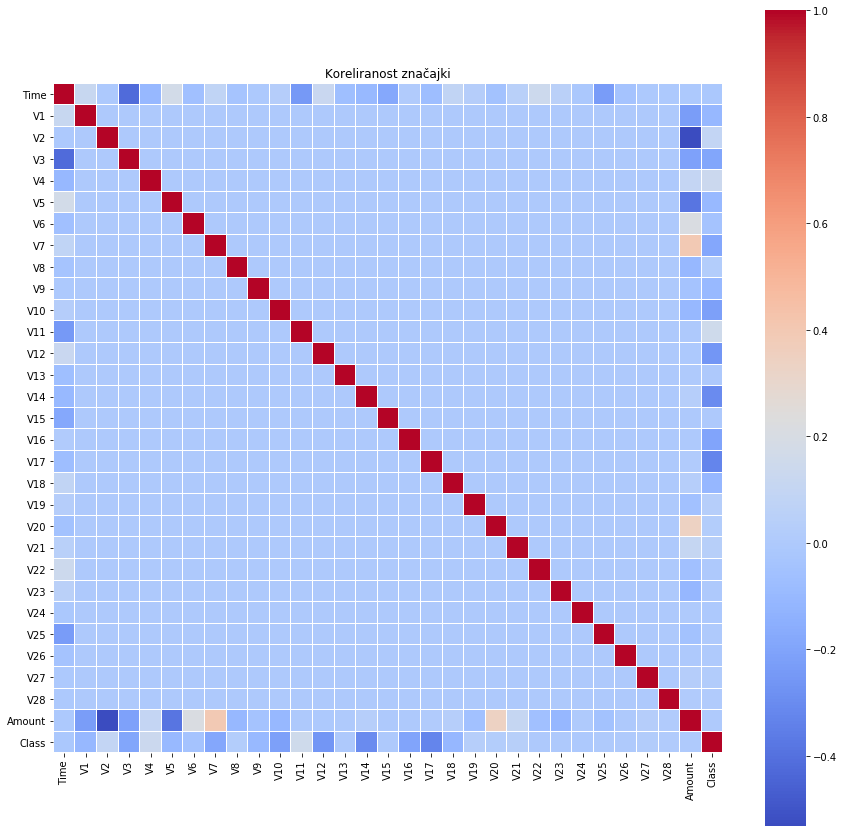

In [17]:
fig7,ax7 = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(data.corr(),linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white', annot=False)
ax7.set_title('Koreliranost značajki')
plt.show()

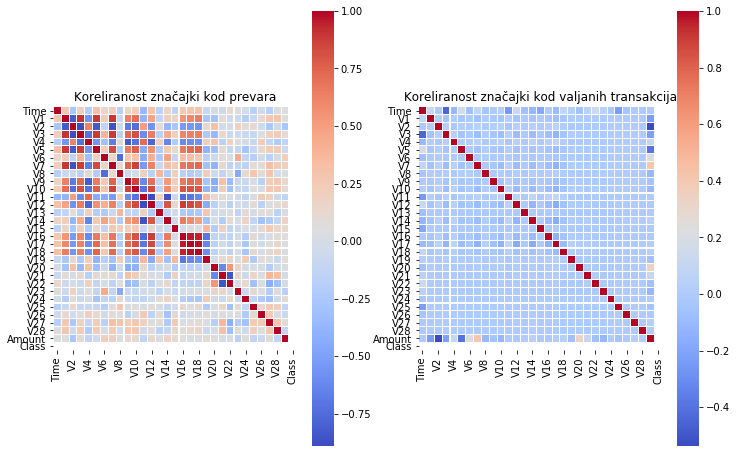

In [18]:
fig8,ax8 = plt.subplots(1,2,figsize=(12,8))
ax8[0].set_title('Koreliranost značajki kod prevara')
ax8[1].set_title('Koreliranost značajki kod valjanih transakcija')
sns.heatmap(data[data['Class'] == 1].corr(), ax=ax8[0], linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white')
sns.heatmap(data[data['Class'] == 0].corr(), ax=ax8[1], linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white')
plt.show()

In [19]:
#ovdje rupa za jos EDA

In [20]:
#priprema podataka
#skaliranje Time i Amount (pošto je nad drugima vec proveden PCA)

amount_after_scaling = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
#time_after_scaling = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)

In [21]:
#data.insert(0, 'Time_After_Scaling', time_after_scaling)
data.insert(0, 'Amount_After_Scaling', amount_after_scaling)
data.columns

Index(['Amount_After_Scaling', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class'],
      dtype='object')

In [22]:
fraud = np.array(data[data['Class'] == 1].index)
non_fraud = np.array(data[data['Class'] == 0].index)
len(fraud), len(non_fraud)

(492, 284315)

In [23]:
#vidimo da je previse non_fraud pa zato koristimo under sampling
non_fraud_undersample = np.array(np.random.choice(non_fraud, len(fraud), replace=False))
len(non_fraud_undersample) == len(fraud)

True

In [24]:
combined = np.sort(np.concatenate([fraud, non_fraud_undersample]))
undersampled_data = data.iloc[combined]

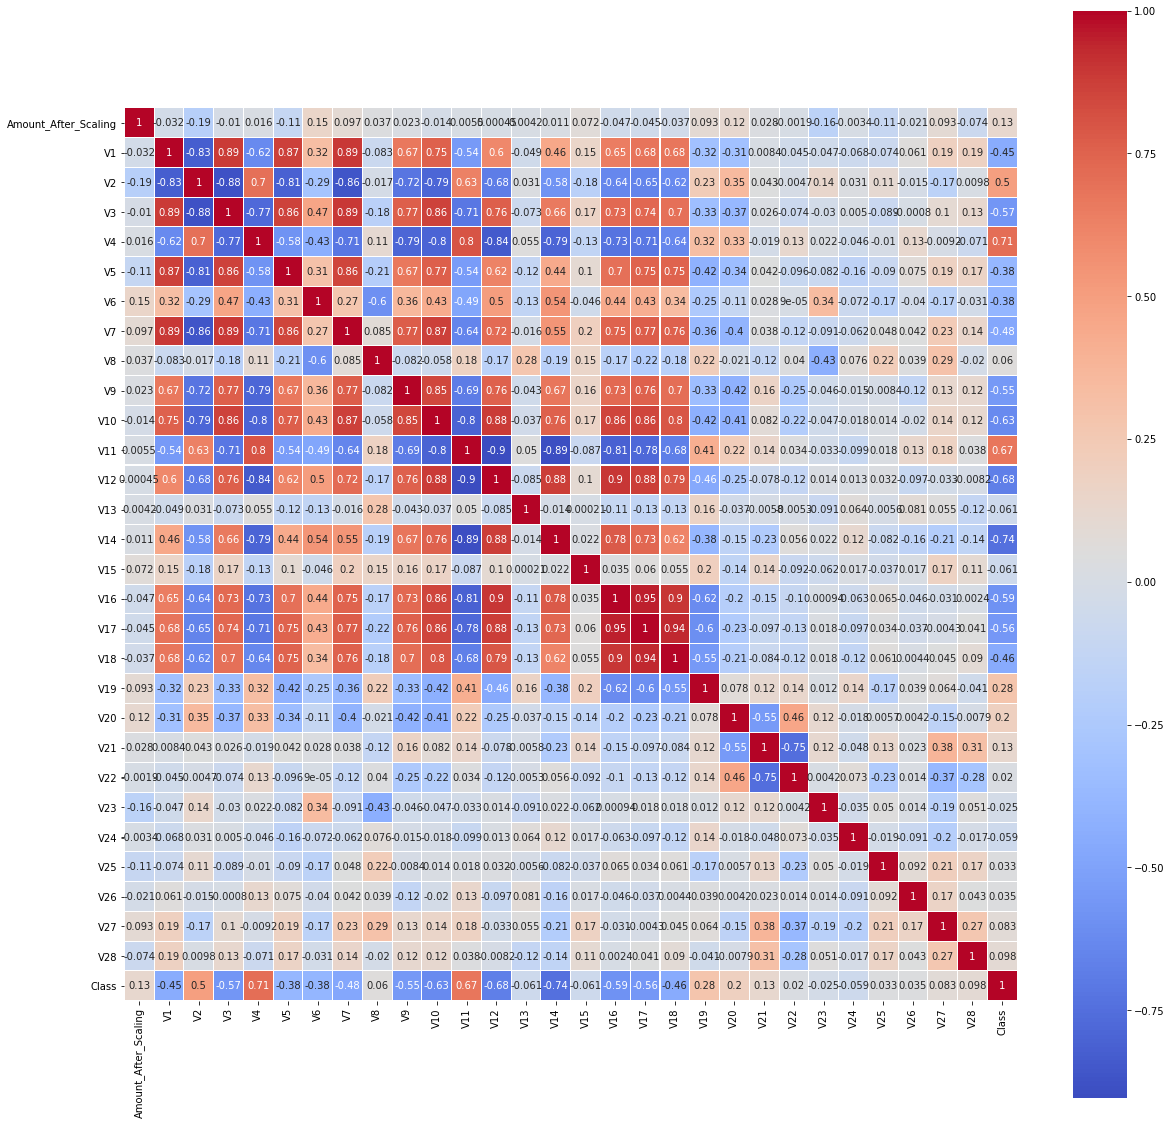

In [25]:
#pogledajmo sad korelacijsku matricu za undersampled_data
fig, ax = plt.subplots(1, 1, figsize=(20,20))
sns.heatmap(undersampled_data.corr(), ax=ax, linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white', annot=True)
plt.show()

In [26]:
#iz ovog zakljucujemo (zadnji redak ili stupac) da postoji pozitivna koreliranost izmedu 
#klase te sljedećih značajki: V2, V4, V11
#, a negativna koreliranost između
#klase te sljedećih značajki: V10, V12, V14 i još nekih no ove izdvajamo (jedine ispod -0.6)

In [27]:
#cijeli dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X,y,test_size=0.20,random_state=42)
y_data_test_non_fraud_num = y_data_test.value_counts()[0]
y_data_test_fraud_num = y_data_test.value_counts()[1]

#undersample
X_undersampled = undersampled_data.drop('Class', axis=1)
y_undersampled = undersampled_data['Class']
X_usample_train, X_usample_test, y_usample_train, y_usample_test = train_test_split(
    X_undersampled, y_undersampled, test_size=0.20, random_state=42)
y_usample_test_non_fraud_num = y_usample_test.value_counts()[0]
y_usample_test_fraud_num = y_usample_test.value_counts()[1]


print('-' * 100)
print('Broj transakcija korišten za treniranje (za cijeli dataset): ' + str(len(X_data_train)))
print('Broj transakcija korišten za testiranje (za cijeli dataset): ' + str(len(X_data_test)))
print('Ukupan broj transakcija (za cijeli dataset): ' + str(len(X_data_train)+len(X_data_test)))
print()
print('-' * 100)
print('-' * 100)
print('Broj transakcija korišten za treniranje (za undersamplirani dataset): ' + str(len(X_usample_train)))
print('Broj transakcija korišten za testiranje (za undersamplirani dataset): ' + str(len(X_usample_test)))
print('Ukupan broj transakcija (za undersamplirani dataset): ' + str(len(X_usample_train)+len(X_usample_test)))
print()
print('-' * 100)

----------------------------------------------------------------------------------------------------
Broj transakcija korišten za treniranje (za cijeli dataset): 227845
Broj transakcija korišten za testiranje (za cijeli dataset): 56962
Ukupan broj transakcija (za cijeli dataset): 284807

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Broj transakcija korišten za treniranje (za undersamplirani dataset): 787
Broj transakcija korišten za testiranje (za undersamplirani dataset): 197
Ukupan broj transakcija (za undersamplirani dataset): 984

----------------------------------------------------------------------------------------------------


In [28]:
#logistička regresija
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#model za cijeli dataset
log_reg_data = LogisticRegression()
log_reg_data.fit(X_data_train, y_data_train)
training_score = cross_val_score(log_reg_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za logističku regresiju nad cijelim datasetom: " + 
      str(round(training_score.mean(), 4) * 100) + '%')

#undersampled
log_reg_usample = LogisticRegression()
log_reg_usample.fit(X_usample_train, y_usample_train)
training_score_usample = cross_val_score(log_reg_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za logističku regresiju nad undersampliranim datasetom: " + 
      str(round(training_score_usample.mean(), 4) * 100) + '%')




Rezultat treniranja za logističku regresiju nad cijelim datasetom: 99.92%
Rezultat treniranja za logističku regresiju nad undersampliranim datasetom: 94.66%


In [35]:
#undersampled sa parametrima
from sklearn.model_selection import GridSearchCV
c_params = [0.01, 0.1, 1, 10, 100]
penalties = ['l1','l2']
log_reg_params = {"penalty": penalties, 'C': c_params}
grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
grid_log_reg.fit(X_usample_train, y_usample_train)
log_reg_params_usample = grid_log_reg.best_estimator_
params = grid_log_reg.best_params_
print('Najbolji parametri: ' + str(params))

training_score_params_usample = cross_val_score(log_reg_params_usample, X_usample_train, y_usample_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad undersampliranim datasetom (sa parametrima): ' 
     + str(round(training_score_params_usample.mean(), 4) * 100) + '%')

Najbolji parametri: {'C': 0.1, 'penalty': 'l1'}
Rezultat treniranja za logističku regresiju nad undersampliranim datasetom (sa parametrima): 94.53%


In [36]:
def precision_recall_f1_scores(correct, predicted):
    print('\tPrecision score: ' + str(round(precision_score(correct, predicted), 4) * 100) + '%')
    print('\tRecall score: ' + str(round(recall_score(correct, predicted), 4) * 100) + '%')
    print('\tF1 score: ' + str(round(f1_score(correct, predicted), 4) * 100) + '%')

In [37]:

y_pred_data = log_reg_data.predict(X_data_test)
y_score_data = log_reg_data.decision_function(X_data_test)

print('-'*50)
print('Za cijeli dataset:')
precision_recall_f1_scores(y_data_test, y_pred_data)

y_pred_usample = log_reg_usample.predict(X_usample_test)
y_score_usample = log_reg_data.decision_function(X_usample_test)

print('-'*50)
print('Za undersamplirani dataset:')
precision_recall_f1_scores(y_usample_test, y_pred_usample)

#y_pred_usample_params = grid_log_reg.predict(X_usample_test)
#y_score_data_params = grid_log_reg.decision_function(X_usample_test)
y_pred_usample_params = log_reg_params_usample.predict(X_usample_test)
y_score_usample_params = log_reg_params_usample.decision_function(X_usample_test)

print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima):')
precision_recall_f1_scores(y_usample_test, y_pred_usample_params)

print('-'*50)

--------------------------------------------------
Za cijeli dataset:
	Precision score: 86.36%
	Recall score: 58.160000000000004%
	F1 score: 69.51%
--------------------------------------------------
Za undersamplirani dataset:
	Precision score: 93.64%
	Recall score: 90.35%
	F1 score: 91.96%
--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima):
	Precision score: 96.26%
	Recall score: 90.35%
	F1 score: 93.21000000000001%
--------------------------------------------------


In [38]:

def plot_confusion_matrix(conf_mat, y_test_non_fraud, y_test_fraud):
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    labels = ['Valjana', 'Prevara']
    ax[0].set_title('Konfuzijska matrica')
    sns.heatmap(conf_mat, ax=ax[0], linewidths=0.5, annot=True,
            square=True, cmap = plt.cm.coolwarm, linecolor='white',
               xticklabels=labels, yticklabels=labels)
    
    
    ax[1].set_title('Normalizirana konfuzijska matrica')
    norm_coef = np.array([[1/y_test_non_fraud, 1/y_test_non_fraud],
                         [1/y_test_fraud, 1/y_test_fraud]])
    normalized_cm = conf_mat * norm_coef 
    sns.heatmap(normalized_cm, ax=ax[1], linewidths=0.5, annot=True,
            square=True, cmap = plt.cm.coolwarm, linecolor='white',
               xticklabels=labels, yticklabels=labels)
    
    plt.show()

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Konfuzijska matrica za cijeli dataset


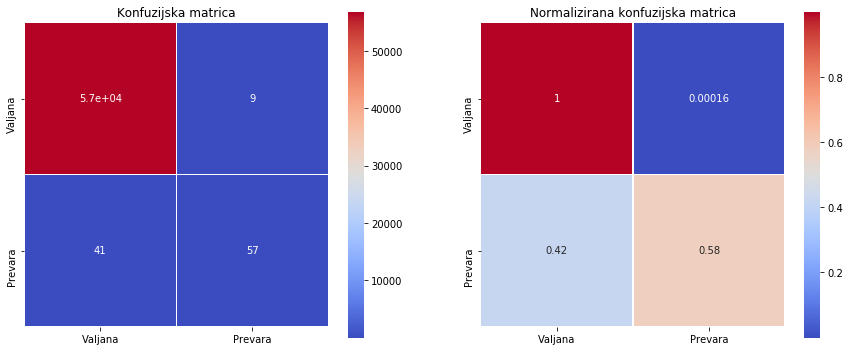

In [39]:

print('-'*50)
print(classification_report(y_data_test, y_pred_data))
print()
print('Konfuzijska matrica za cijeli dataset')
plot_confusion_matrix(confusion_matrix(y_data_test, y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        83
           1       0.94      0.90      0.92       114

    accuracy                           0.91       197
   macro avg       0.90      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197


Konfuzijska matrica za undersamplirani dataset


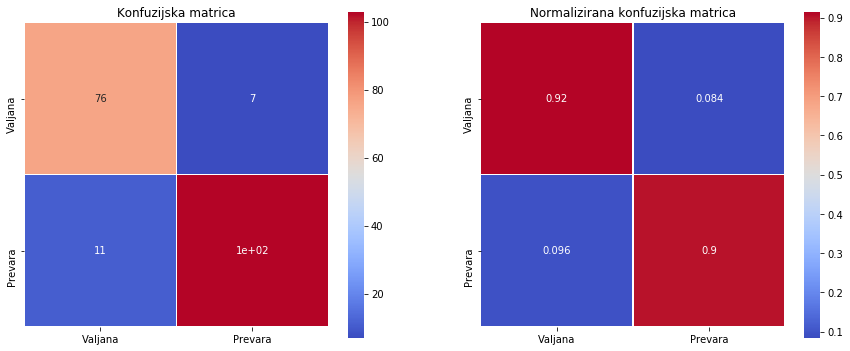

In [40]:
print('-'*50)
print(classification_report(y_usample_test, y_pred_usample))
print()
print('Konfuzijska matrica za undersamplirani dataset')
plot_confusion_matrix(confusion_matrix(y_usample_test, y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        83
           1       0.96      0.90      0.93       114

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197


Konfuzijska matrica za undersamplirani dataset (sa podešenim parametrima regresije)


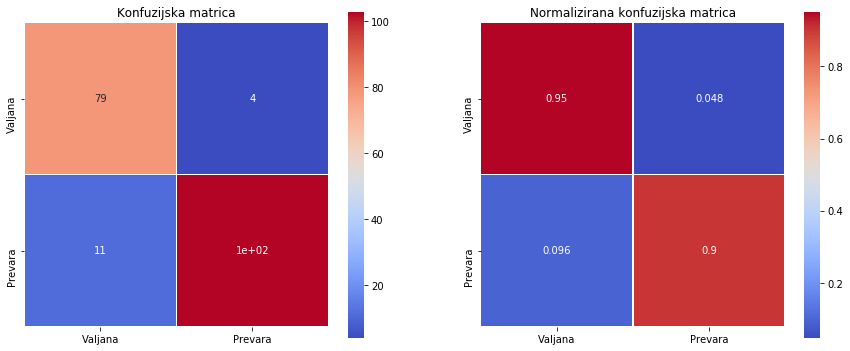

In [41]:
print('-'*50)
print(classification_report(y_usample_test, y_pred_usample_params))
print()
print('Konfuzijska matrica za undersamplirani dataset (sa podešenim parametrima regresije)')
plot_confusion_matrix(confusion_matrix(y_usample_test, y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)

--------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 5.79%
	Recall score: 91.84%
	F1 score: 10.89%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962




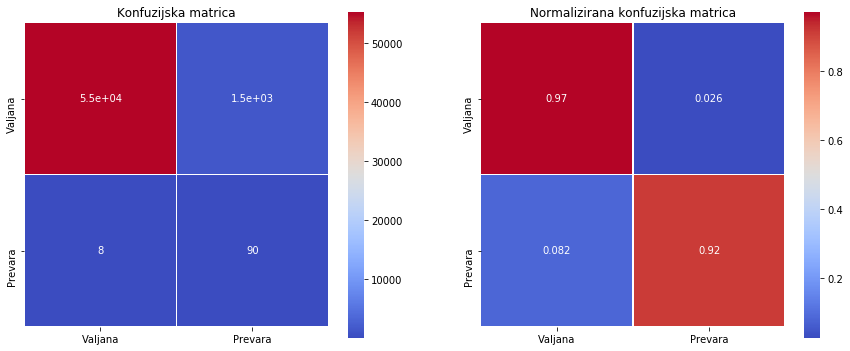

In [42]:
#sada koristimo undersamplirani dataset za predikcije na cijelom datasetu
#za undersamplirani ćemo koristiti dataset u kojem smo pomocu gridsearcha trazili najbolje parametre
new_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
new_log_reg.fit(X_usample_train, y_usample_train)
new_log_reg_params_usample = new_log_reg.best_estimator_
full_pred = new_log_reg_params_usample.predict(X_data_test)
full_pred_score = log_reg_data.decision_function(X_data_test)

print('-'*50)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred)
print()
print('-'*50)
print(classification_report(y_data_test, full_pred))
print()
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred), y_data_test_non_fraud_num, y_data_test_fraud_num)

In [43]:
def plot_roc_auc_curve(correct, predicted):
    fpr, tpr, threshold = roc_curve(correct, predicted)
    area_under_curve = auc(fpr,tpr)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label="AUC = " + str(round(area_under_curve,3)))
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

In [44]:
def plot_precision_recall_curve(correct, predicted):
    precision, recall, threshold = precision_recall_curve(correct, predicted)
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show(); 

ROC za cijeli dataset


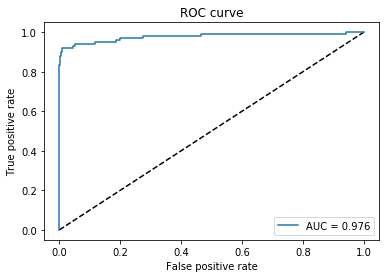

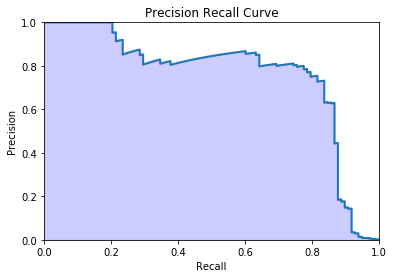

In [45]:
print('ROC za cijeli dataset')
plot_roc_auc_curve(y_data_test, y_score_data)
plot_precision_recall_curve(y_data_test, y_score_data)

ROC + PR za undersamplirani dataset


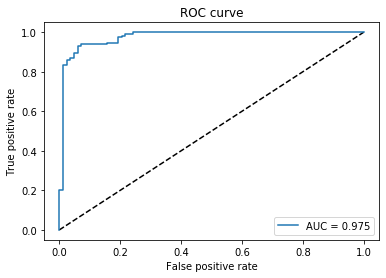

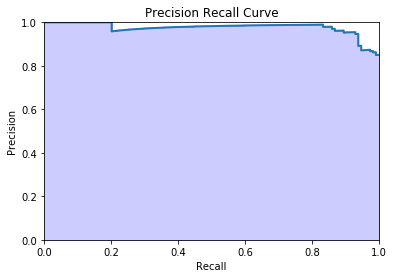

In [46]:
print('ROC + PR za undersamplirani dataset')
plot_roc_auc_curve(y_usample_test, y_score_usample)
plot_precision_recall_curve(y_usample_test, y_score_usample)

ROC + PR za undersamplirani dataset (sa parametrima)


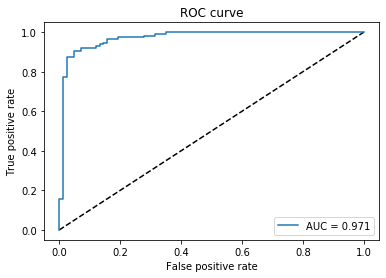

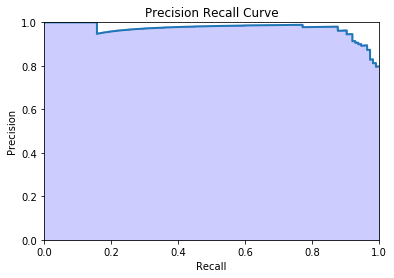

In [47]:
print('ROC + PR za undersamplirani dataset (sa parametrima)')
plot_roc_auc_curve(y_usample_test, y_score_usample_params)
plot_precision_recall_curve(y_usample_test, y_score_usample_params)

ROC + PR za undersamplirani dataset (sa parametrima)


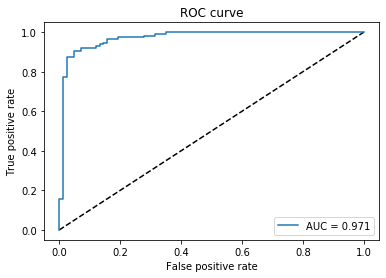

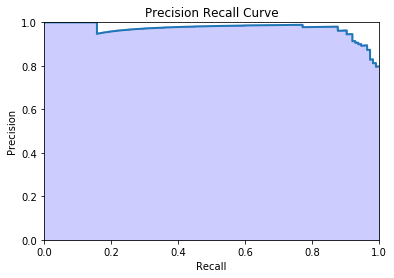

In [48]:
print('ROC + PR za undersamplirani dataset (sa parametrima)')
plot_roc_auc_curve(y_usample_test, y_score_usample_params)
plot_precision_recall_curve(y_usample_test, y_score_usample_params)

ROC + PR za sve


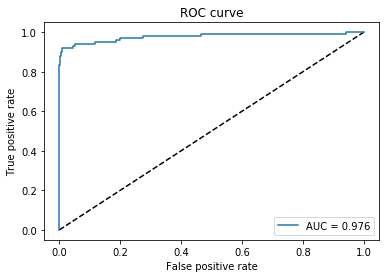

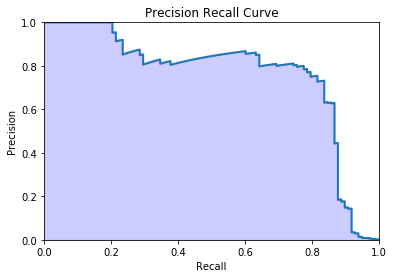

In [49]:
print('ROC + PR za sve')
plot_roc_auc_curve(y_data_test, full_pred_score)
plot_precision_recall_curve(y_data_test, full_pred_score)

In [50]:
#bez outliera
#prvo sjetimo se koje znacajke imaju najvecu negativnu korelaciju
print('Negativne korelacije: ' + str(np.where(undersampled_data.corr()['Class'] < -0.6))) 
print('Pozitivne korelacije: ' + str(np.where(undersampled_data.corr()['Class'] > 0.6)))

Negativne korelacije: (array([10, 12, 14], dtype=int64),)
Pozitivne korelacije: (array([ 4, 11, 29], dtype=int64),)


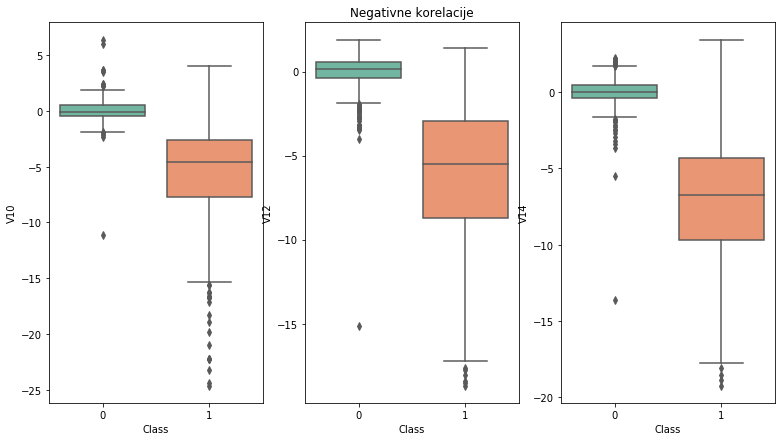

In [51]:
fig_pos, ax_pos = plt.subplots(1, 3, figsize=(13,7))
ax_pos[1].set_title('Negativne korelacije')
sns.boxplot(x='Class', y='V10', data=undersampled_data, ax=ax_pos[0], palette='Set2')
sns.boxplot(x='Class', y='V12', data=undersampled_data, ax=ax_pos[1], palette='Set2')
sns.boxplot(x='Class', y='V14', data=undersampled_data, ax=ax_pos[2], palette='Set2')
plt.show()

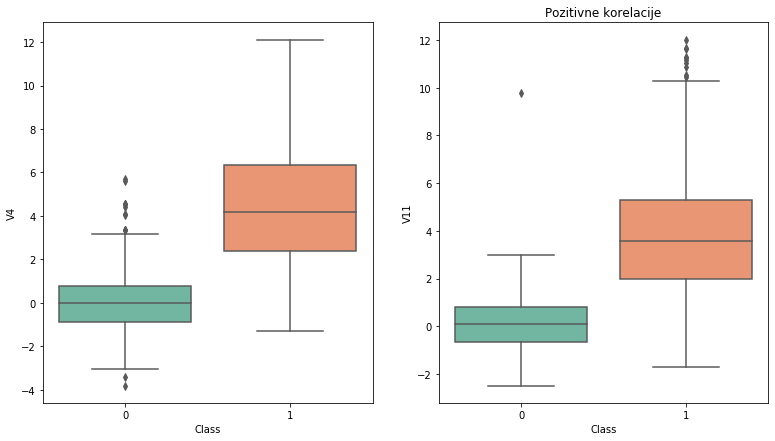

In [52]:
fig_neg, ax_neg = plt.subplots(1, 2, figsize=(13,7))
ax_neg[1].set_title('Pozitivne korelacije')
sns.boxplot(x='Class', y='V4', data=undersampled_data, ax=ax_neg[0], palette='Set2')
sns.boxplot(x='Class', y='V11', data=undersampled_data, ax=ax_neg[1], palette='Set2')
plt.show()

In [53]:
#uklanjanje outliera (za negativnu korelaciju)
v10_q1 = undersampled_data['V10'].quantile(0.25)
v10_q3 = undersampled_data['V10'].quantile(0.75)
v10_q2 = v10_q3 - v10_q1
v10_cut_off = v10_q2 * 2.0
v10_lower, v10_upper = v10_q1 - v10_cut_off, v10_q3 + v10_cut_off
v10_outliers = [out for out in undersampled_data['V10'] if out < v10_lower or out > v10_upper]
print('-' * 50)
print('Broj identificiranih outliera nad V10: ' + str(len(v10_outliers)))
# undersampled_data_cut = undersampled_data.drop(undersampled_data[undersampled_data['V10'] < v10_lower].index)
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V10'] > v10_upper].index)

v12_q1 = undersampled_data['V12'].quantile(0.25)
v12_q3 = undersampled_data['V12'].quantile(0.75)
v12_q2 = v12_q3 - v12_q1
v12_cut_off = v12_q2 * 2.0
v12_lower, v12_upper = v12_q1 - v12_cut_off, v12_q3 + v12_cut_off
v12_outliers = [out for out in undersampled_data['V12'] if out < v12_lower or out > v12_upper]
print('Broj identificiranih outliera nad V12: ' + str(len(v12_outliers)))
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V12'] > v12_upper].index)
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V12'] < v12_lower].index)

v14_q1 = undersampled_data['V14'].quantile(0.25)
v14_q3 = undersampled_data['V14'].quantile(0.75)
v14_q2 = v14_q3 - v14_q1
v14_cut_off = v14_q2 * 2.0
v14_lower, v14_upper = v14_q1 - v14_cut_off, v14_q3 + v14_cut_off
v14_outliers = [out for out in undersampled_data['V14'] if out < v14_lower or out > v14_upper]
print('Broj identificiranih outliera nad V14: ' + str(len(v14_outliers)))
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V14'] > v14_upper].index)
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V14'] < v14_lower].index)
print('-' * 50)

--------------------------------------------------
Broj identificiranih outliera nad V10: 33
Broj identificiranih outliera nad V12: 11
Broj identificiranih outliera nad V14: 0
--------------------------------------------------


In [54]:
#uklanjanje outliera (za pozitivne korelaciju)
v4_q1 = undersampled_data['V4'].quantile(0.25)
v4_q3 = undersampled_data['V4'].quantile(0.75)
v4_q2 = v4_q3 - v4_q1
v4_cut_off = v4_q2 * 2.0
v4_lower, v4_upper = v4_q1 - v4_cut_off, v4_q3 + v4_cut_off
v4_outliers = [out for out in undersampled_data['V4'] if out < v4_lower or out > v4_upper]
print('-' * 50)
print('Broj identificiranih outliera nad V4: ' + str(len(v4_outliers)))
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V4'] > v4_upper].index)
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V4'] < v4_lower].index)

v11_q1 = undersampled_data['V11'].quantile(0.25)
v11_q3 = undersampled_data['V11'].quantile(0.75)
v11_q2 = v11_q3 - v11_q1
v11_cut_off = v11_q2 * 2.0
v11_lower, v11_upper = v11_q1 - v11_cut_off, v11_q3 + v11_cut_off
v11_outliers = [out for out in undersampled_data['V11'] if out < v11_lower or out > v11_upper]
print('Broj identificiranih outliera nad V11: ' + str(len(v11_outliers)))
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V11'] > v11_upper].index)
# undersampled_data_cut = undersampled_data_cut.drop(undersampled_data_cut[undersampled_data_cut['V11'] < v11_lower].index)
print('-' * 50)

--------------------------------------------------
Broj identificiranih outliera nad V4: 0
Broj identificiranih outliera nad V11: 7
--------------------------------------------------


In [55]:
undersampled_data_cut = undersampled_data.drop(
    undersampled_data[
        (undersampled_data['V10'] > v10_upper) | 
        (undersampled_data['V10'] < v10_lower) |
        (undersampled_data['V12'] > v12_upper) | 
        (undersampled_data['V12'] < v12_lower) |
        (undersampled_data['V14'] > v14_upper) | 
        (undersampled_data['V14'] < v14_lower) |
        (undersampled_data['V4'] > v4_upper) | 
        (undersampled_data['V4'] < v4_lower) |
        (undersampled_data['V11'] > v11_upper) | 
        (undersampled_data['V11'] < v11_lower) 
                     ].index)

In [56]:
len(undersampled_data_cut)

937

In [57]:
X_undersampled_cut = undersampled_data_cut.drop('Class', axis=1)
y_undersampled_cut = undersampled_data_cut['Class']
X_usample_cut_train, X_usample_cut_test, y_usample_cut_train, y_usample_cut_test = train_test_split(
    X_undersampled_cut, y_undersampled_cut, test_size=0.20, random_state=42)

print('Broj transakcija korišten za treniranje (za undersamplirani dataset bez outliera): ' + str(len(X_usample_cut_train)))
print('Broj transakcija korišten za testiranje (za undersamplirani dataset bez outliera): ' + str(len(X_usample_cut_test)))
print('Ukupan broj transakcija (za undersamplirani dataset bez outliera): ' + str(len(X_usample_cut_train)+len(X_usample_cut_test)))

Broj transakcija korišten za treniranje (za undersamplirani dataset bez outliera): 749
Broj transakcija korišten za testiranje (za undersamplirani dataset bez outliera): 188
Ukupan broj transakcija (za undersamplirani dataset bez outliera): 937


In [58]:
y_usample_cut_test_non_fraud_num = y_usample_cut_test.value_counts()[0]
y_usample_cut_test_fraud_num = y_usample_cut_test.value_counts()[1]

In [60]:
grid_log_reg_cut = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
grid_log_reg_cut.fit(X_usample_cut_train, y_usample_cut_train)
log_reg_params_usample_cut = grid_log_reg_cut.best_estimator_
params_cut = grid_log_reg_cut.best_params_
print('Najbolji parametri: ' + str(params_cut))

training_score_params_usample_cut = cross_val_score(log_reg_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad undersampliranim datasetom (sa parametrima, bez outliera): ' 
     + str(round(training_score_params_usample_cut.mean(), 4) * 100) + '%')

Najbolji parametri: {'C': 1, 'penalty': 'l2'}
Rezultat treniranja za logističku regresiju nad undersampliranim datasetom (sa parametrima, bez outliera): 93.06%


--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima, bez outliera):
	Precision score: 97.92%
	Recall score: 92.16%
	F1 score: 94.95%
----------------------------------------------------------------------------------------------------


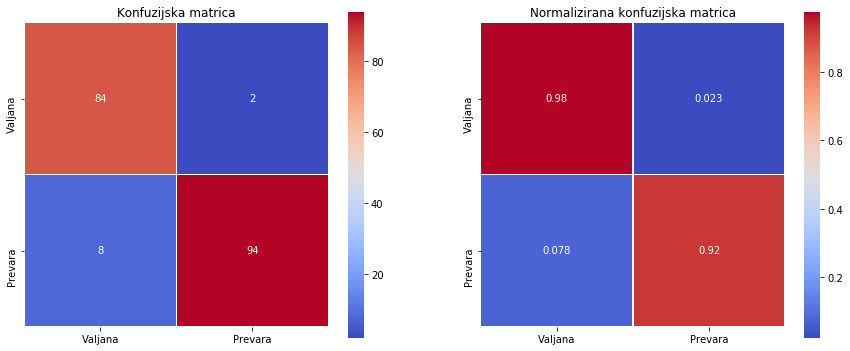

In [61]:
y_pred_usample_params_cut = log_reg_params_usample_cut.predict(X_usample_cut_test)
y_score_usample_params_cut = log_reg_params_usample.decision_function(X_usample_cut_test)

print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima, bez outliera):')
precision_recall_f1_scores(y_usample_cut_test, y_pred_usample_params_cut)
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)

ROC + PR za undersamplirani dataset (sa parametrima, bez outliera)


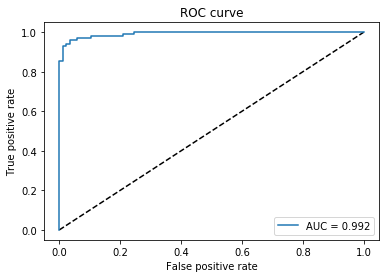

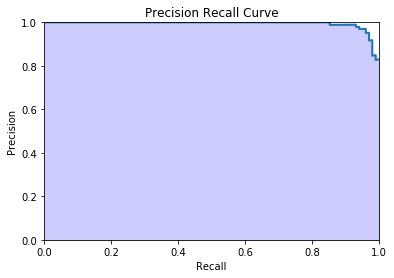

In [62]:
print('ROC + PR za undersamplirani dataset (sa parametrima, bez outliera)')
plot_roc_auc_curve(y_usample_cut_test, y_score_usample_params_cut)
plot_precision_recall_curve(y_usample_cut_test, y_score_usample_params_cut)


Najbolji parametri: {'C': 1, 'penalty': 'l2'}
--------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 3.73%
	Recall score: 92.86%
	F1 score: 7.17%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


--------------------------------------------------


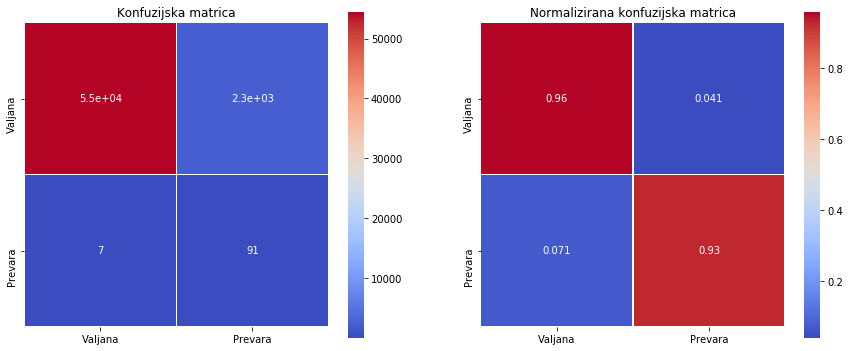

----------------------------------------------------------------------------------------------------


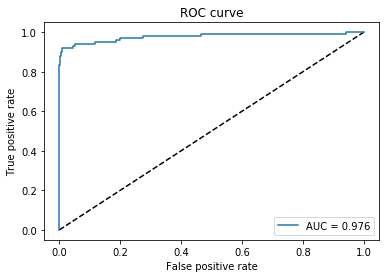

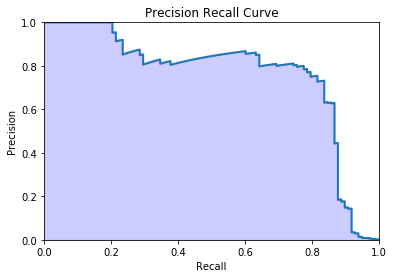

In [63]:
new_log_reg_cut = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
new_log_reg_cut.fit(X_usample_cut_train, y_usample_cut_train)
new_log_reg_params_usample_cut = new_log_reg_cut.best_estimator_
full_pred_cut = new_log_reg_params_usample_cut.predict(X_data_test)
full_pred_score_cut = log_reg_data.decision_function(X_data_test)

print('Najbolji parametri: ' + str(new_log_reg_cut.best_params_))
print('-'*50)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_cut)
print()
print('-'*50)
print(classification_report(y_data_test, full_pred_cut))
print()
print('-'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_cut)
plot_precision_recall_curve(y_data_test, full_pred_score_cut)

--------------------------------------------------
Predikcija za cijeli dataset sa thresholdom: 0.1
	Precision score: 0.65%
	Recall score: 97.96000000000001%
	F1 score: 1.29%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     56864
           1       0.01      0.98      0.01        98

    accuracy                           0.74     56962
   macro avg       0.50      0.86      0.43     56962
weighted avg       1.00      0.74      0.85     56962




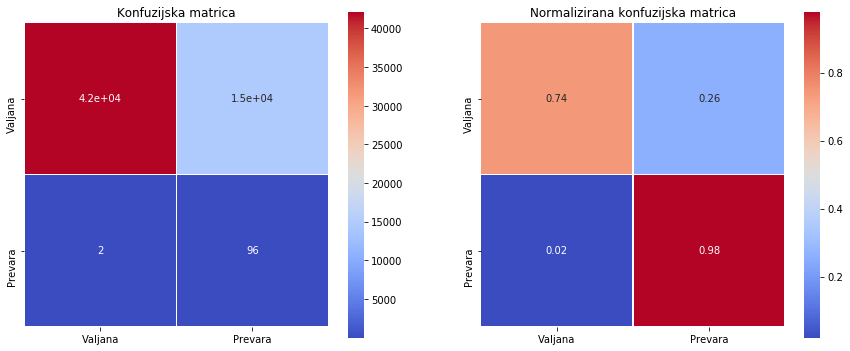

****************************************************************************************************
--------------------------------------------------
Predikcija za cijeli dataset sa thresholdom: 0.25
	Precision score: 1.6%
	Recall score: 95.92%
	F1 score: 3.16%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.96      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.94     56962




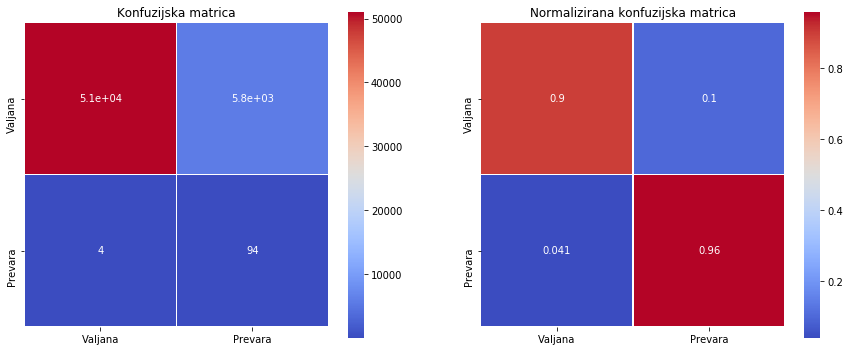

****************************************************************************************************
--------------------------------------------------
Predikcija za cijeli dataset sa thresholdom: 0.5
	Precision score: 3.73%
	Recall score: 92.86%
	F1 score: 7.17%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962




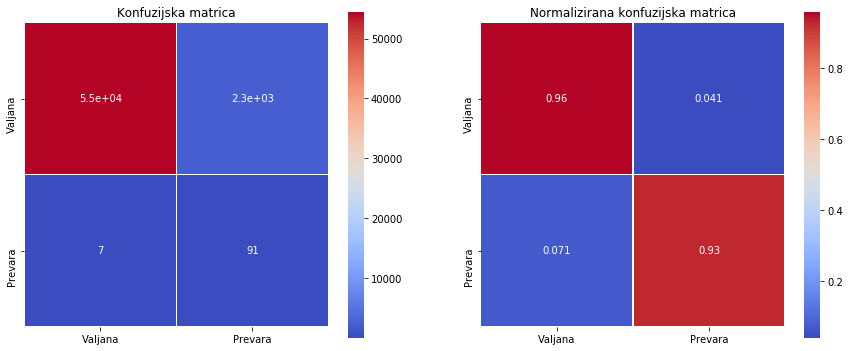

****************************************************************************************************
--------------------------------------------------
Predikcija za cijeli dataset sa thresholdom: 0.75
	Precision score: 9.790000000000001%
	Recall score: 88.78%
	F1 score: 17.630000000000003%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.89      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962




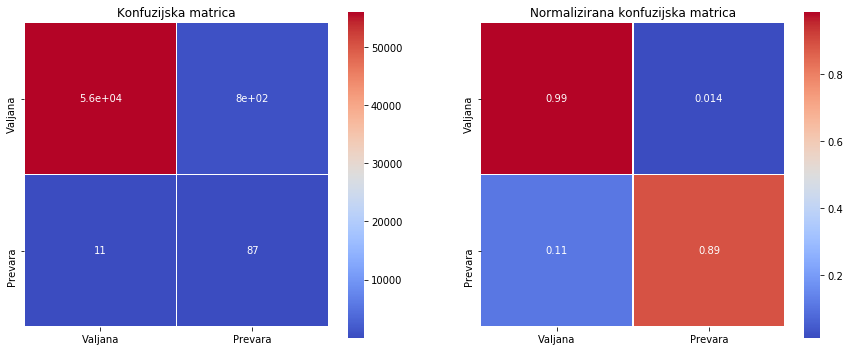

****************************************************************************************************
--------------------------------------------------
Predikcija za cijeli dataset sa thresholdom: 0.9
	Precision score: 16.470000000000002%
	Recall score: 83.67%
	F1 score: 27.52%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.84      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.64     56962
weighted avg       1.00      0.99      0.99     56962




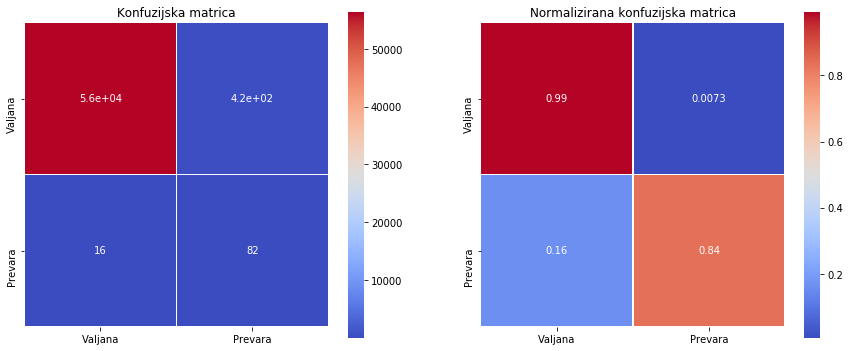

****************************************************************************************************


In [64]:
#idemo jos primjeniti za različite tresholdove pomoću predict_proba
log_reg_thresh = LogisticRegression(C=new_log_reg_cut.best_params_['C'], penalty=new_log_reg_cut.best_params_['penalty'], solver='liblinear')
log_reg_thresh.fit(X_usample_cut_train, y_usample_cut_train)
full_pred_thresh = log_reg_thresh.predict_proba(X_data_test)

thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]
for threshold in thresholds:
    full_pred_t = full_pred_thresh[:, 1] > threshold
    print('-'*50)
    print('Predikcija za cijeli dataset sa thresholdom: ' + str(threshold))
    precision_recall_f1_scores(y_data_test, full_pred_t)
    print()
    print('-'*50)
    print(classification_report(y_data_test, full_pred_t))
    print()
    plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_t), y_data_test_non_fraud_num, y_data_test_fraud_num)
    print('*'*100)

****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 1 puta veća od klase 0 (valjane).
	Precision score: 3.73%
	Recall score: 92.86%
	F1 score: 7.17%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962




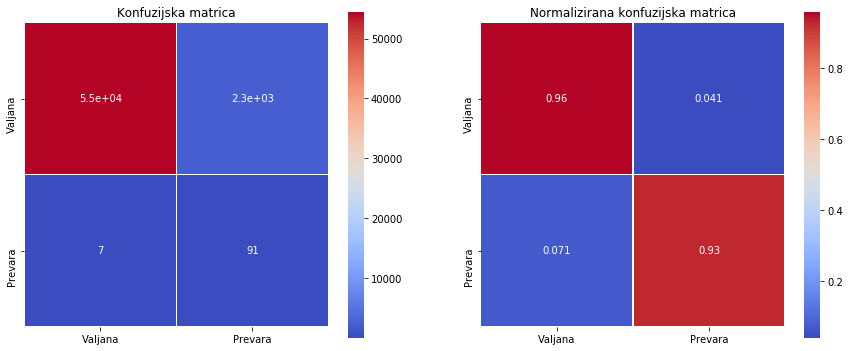

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 5 puta veća od klase 0 (valjane).
	Precision score: 1.2%
	Recall score: 95.92%
	F1 score: 2.3800000000000003%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     56864
           1       0.01      0.96      0.02        98

    accuracy                           0.86     56962
   macro avg       0.51      0.91      0.48     56962
weighted avg       1.00      0.86      0.93     56962




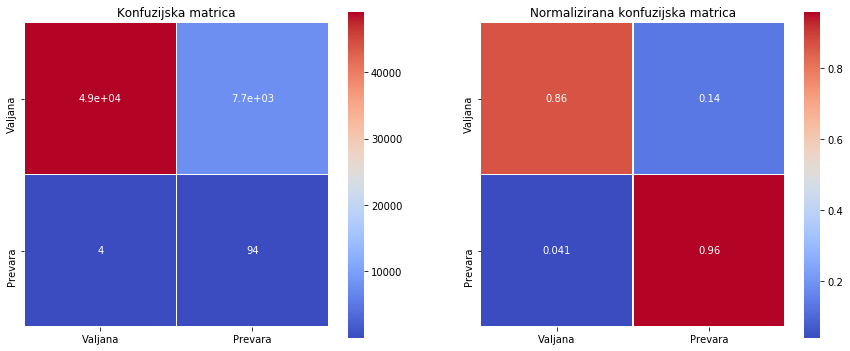

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 10 puta veća od klase 0 (valjane).
	Precision score: 0.74%
	Recall score: 98.98%
	F1 score: 1.47%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56864
           1       0.01      0.99      0.01        98

    accuracy                           0.77     56962
   macro avg       0.50      0.88      0.44     56962
weighted avg       1.00      0.77      0.87     56962




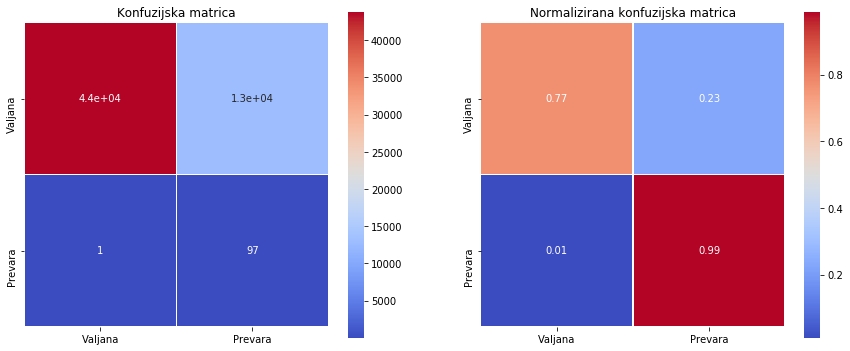

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 50 puta veća od klase 0 (valjane).
	Precision score: 0.37%
	Recall score: 100.0%
	F1 score: 0.73%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.53      0.70     56864
           1       0.00      1.00      0.01        98

    accuracy                           0.53     56962
   macro avg       0.50      0.77      0.35     56962
weighted avg       1.00      0.53      0.69     56962




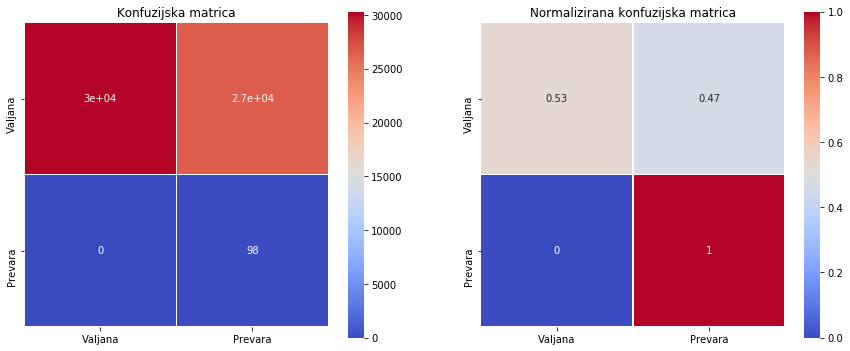

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 100 puta veća od klase 0 (valjane).
	Precision score: 0.32%
	Recall score: 100.0%
	F1 score: 0.63%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     56864
           1       0.00      1.00      0.01        98

    accuracy                           0.46     56962
   macro avg       0.50      0.73      0.32     56962
weighted avg       1.00      0.46      0.63     56962




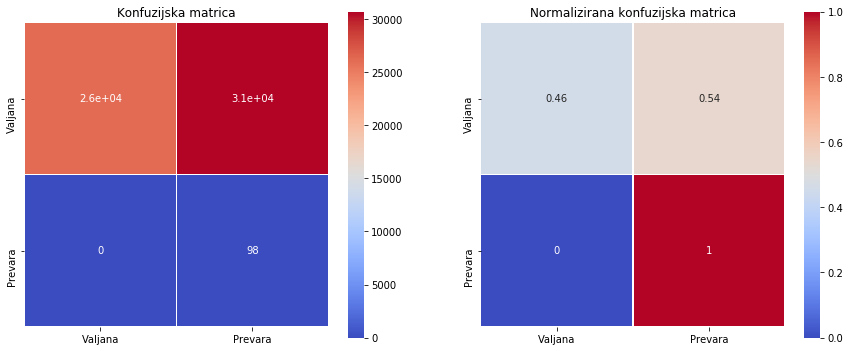

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 1000 puta veća od klase 0 (valjane).
	Precision score: 0.27%
	Recall score: 100.0%
	F1 score: 0.54%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.36      0.53     56864
           1       0.00      1.00      0.01        98

    accuracy                           0.36     56962
   macro avg       0.50      0.68      0.27     56962
weighted avg       1.00      0.36      0.53     56962




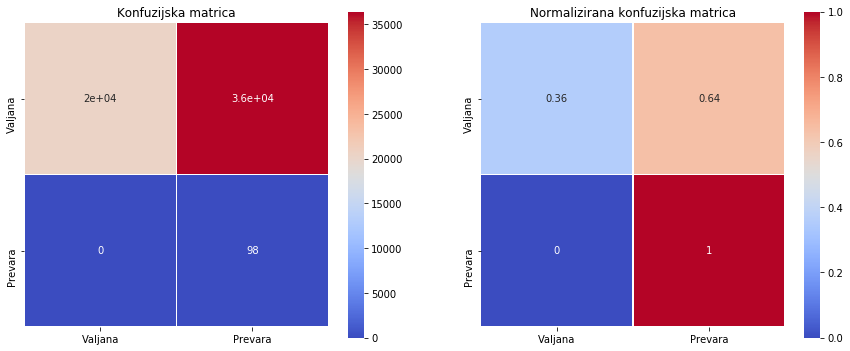

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Tezina klase 1 (prevare) je 10000 puta veća od klase 0 (valjane).
	Precision score: 0.19%
	Recall score: 100.0%
	F1 score: 0.38999999999999996%

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.12      0.21     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.12     56962
   macro avg       0.50      0.56      0.11     56962
weighted avg       1.00      0.12      0.21     56962




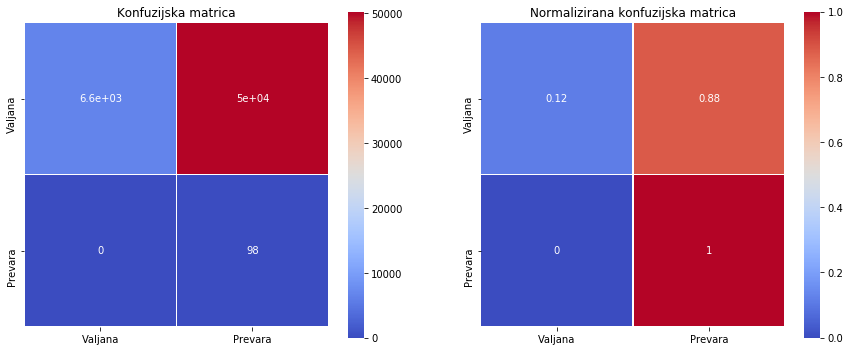

----------------------------------------------------------------------------------------------------


In [65]:
#sada cemo ubaciti tezine u logisticku regresiju
class_weights = [1, 5, 10, 50, 100, 1000, 10000]
colors = ['blue', 'yellow', 'green', 'red', 'purple', 'orange', 'pink']
i = 0
precisions = []
recalls = []
fprs = []
tprs = []
aucs = []
aprcs = []


for weight in class_weights: 
    log_reg_weighted = LogisticRegression(C=new_log_reg_cut.best_params_['C'], 
                                          penalty=new_log_reg_cut.best_params_['penalty'],
                                          solver='liblinear', class_weight={0:1, 1:weight}
                                         )
    
    log_reg_weighted.fit(X_usample_cut_train, y_usample_cut_train)
    full_pred_w = log_reg_weighted.predict(X_data_test)
    full_score_w = log_reg_weighted.decision_function(X_data_test)
    print('*'*100)
    print('-'*100)
    print('Tezina klase 1 (prevare) je ' + str(weight) + ' puta veća od klase 0 (valjane).' )
    precision_recall_f1_scores(y_data_test, full_pred_w)
    print()
    print('-'*50)
    print(classification_report(y_data_test, full_pred_w))
    print()
    plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_w), y_data_test_non_fraud_num, y_data_test_fraud_num)
    
    precision, recall, threshold = precision_recall_curve(y_data_test, full_score_w)
    fpr, tpr, thold = roc_curve(y_data_test, full_score_w)
    area_under_curve = auc(fpr,tpr)
    au_pr_curve = auc(recall,precision)
    
    precisions.append(precision)
    recalls.append(recall)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(area_under_curve)
    aprcs.append(au_pr_curve)

    print('-'*100)
    
   
    
plt.show()
    

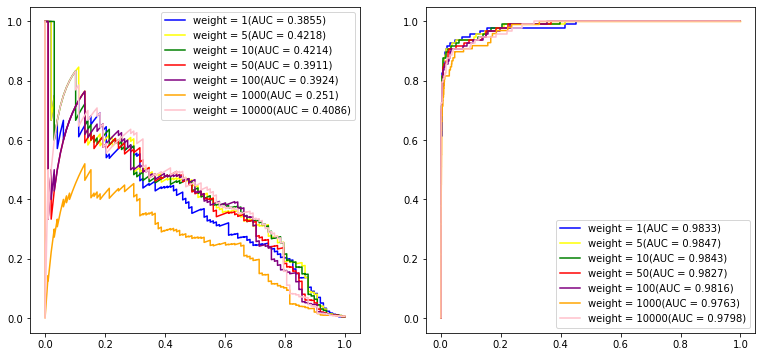

In [66]:
fig_w, ax_w = plt.subplots(1,2,figsize=(13,6))

for i in range(len(colors)):
    ax_w[0].plot(recalls[i], precisions[i], color=colors[i], label='weight = ' + str(class_weights[i]) + '(AUC = ' + str(round(aprcs[i], 4)) + ')')
    ax_w[1].plot(fprs[i], tprs[i], color=colors[i], label='weight = ' + str(class_weights[i]) + '(AUC = ' + str(round(aucs[i], 4)) + ')' )
ax_w[0].legend()
ax_w[1].legend()
plt.show()

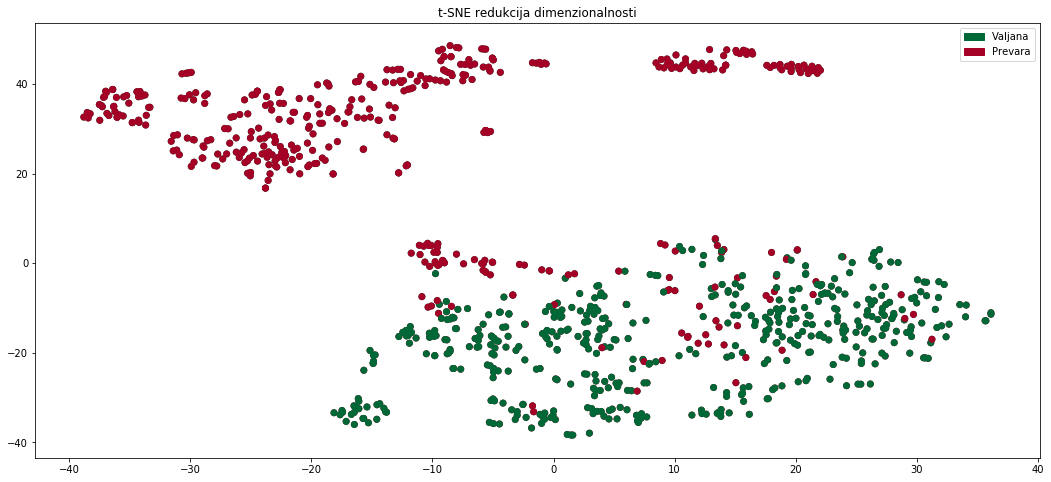

In [60]:
#t-SNE
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import matplotlib

cm = matplotlib.cm.get_cmap('RdYlGn_r')
red = cm(256)
green = cm(0)

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_undersampled_cut.values)

fig_tsne, ax_tsne = plt.subplots(1,1,figsize=(18,8))



non_fraud_patch = mpatches.Patch(color=green, label='Valjana')
fraud_patch = mpatches.Patch(color=red, label='Prevara')

ax_tsne.scatter(X_tsne[:,0], X_tsne[:,1], c=(y_undersampled_cut == 0), cmap='RdYlGn_r', label='Valjana')
ax_tsne.scatter(X_tsne[:,0], X_tsne[:,1], c=(y_undersampled_cut == 1), cmap='RdYlGn_r', label='Prevara')

ax_tsne.set_title('t-SNE redukcija dimenzionalnosti')

ax_tsne.legend(handles=[non_fraud_patch, fraud_patch])

plt.show()

In [64]:
#oversampling

non_fraud_data = X_data_train[y_data_train == 0] 
fraud_data = X_data_train[y_data_train == 1]
print('Količina podataka u trening skupovima prije oversamplinga:')
print('\tBroj valjanih transakcija: ' + str(len(non_fraud_data)))
print('\tBroj prevarantskih transakcija: ' + str(len(fraud_data)))
print('\tUkupan broj transakcija: ' + str(len(non_fraud_data)+len(fraud_data)))
y_oversampled = y_data_train.values

Količina podataka u trening skupovima prije oversamplinga:
	Broj valjanih transakcija: 227451
	Broj prevarantskih transakcija: 394
	Ukupan broj transakcija: 227845


In [65]:
non_fraud_data['Class'] = 0
fraud_data['Class'] = 1

C:\Users\stvar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\stvar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
collected_data = non_fraud_data
for cycle in range(len(non_fraud_data) // len(fraud_data)):
    collected_data = collected_data.append(fraud_data)
    
    
print('Količina podataka u trening skupovima poslije oversamplinga:')
print('\tBroj valjanih transakcija: ' + str(len(collected_data[collected_data['Class'] == 0])))
print('\tBroj prevarantskih transakcija: ' + str(len(collected_data[collected_data['Class'] == 1])))
print('\tUkupan broj transakcija: ' + str(len(collected_data[collected_data['Class'] == 0])+len(collected_data[collected_data['Class'] == 1])))

Količina podataka u trening skupovima poslije oversamplinga:
	Broj valjanih transakcija: 227451
	Broj prevarantskih transakcija: 227338
	Ukupan broj transakcija: 454789


In [64]:
#shuffle
collected_data = collected_data.sample(frac=1).reset_index(drop=True)

In [65]:
#izbacivanje outliera
print('Negativne korelacije: ' + str(np.where(collected_data.corr()['Class'] < -0.6))) 
print('Pozitivne korelacije: ' + str(np.where(collected_data.corr()['Class'] > 0.6)))

Negativne korelacije: (array([10, 12, 14], dtype=int64),)
Pozitivne korelacije: (array([ 4, 11, 29], dtype=int64),)


In [66]:
#uklanjanje outliera (za negativnu korelaciju)
v10_q1 = collected_data['V10'].quantile(0.25)
v10_q3 = collected_data['V10'].quantile(0.75)
v10_q2 = v10_q3 - v10_q1
v10_cut_off = v10_q2 * 1.5
v10_lower, v10_upper = v10_q1 - v10_cut_off, v10_q3 + v10_cut_off
v10_outliers = [out for out in collected_data['V10'] if out < v10_lower or out > v10_upper]
print('-' * 100)
print('Broj identificiranih outliera nad V10: ' + str(len(v10_outliers)))

v12_q1 = collected_data['V12'].quantile(0.25)
v12_q3 = collected_data['V12'].quantile(0.75)
v12_q2 = v12_q3 - v12_q1
v12_cut_off = v12_q2 * 1.5
v12_lower, v12_upper = v12_q1 - v12_cut_off, v12_q3 + v12_cut_off
v12_outliers = [out for out in collected_data['V12'] if out < v12_lower or out > v12_upper]
print('Broj identificiranih outliera nad V12: ' + str(len(v12_outliers)))


v14_q1 = collected_data['V14'].quantile(0.25)
v14_q3 = collected_data['V14'].quantile(0.75)
v14_q2 = v14_q3 - v14_q1
v14_cut_off = v14_q2 * 1.5
v14_lower, v14_upper = v14_q1 - v14_cut_off, v14_q3 + v14_cut_off
v14_outliers = [out for out in collected_data['V14'] if out < v14_lower or out > v14_upper]
print('Broj identificiranih outliera nad V14: ' + str(len(v14_outliers)))

print('-' * 50)

#uklanjanje outliera (za pozitivne korelaciju)
v4_q1 = collected_data['V4'].quantile(0.25)
v4_q3 = collected_data['V4'].quantile(0.75)
v4_q2 = v4_q3 - v4_q1
v4_cut_off = v4_q2 * 1.5
v4_lower, v4_upper = v4_q1 - v4_cut_off, v4_q3 + v4_cut_off
v4_outliers = [out for out in collected_data['V4'] if out < v4_lower or out > v4_upper]
print('-' * 50)
print('Broj identificiranih outliera nad V4: ' + str(len(v4_outliers)))


v11_q1 = undersampled_data['V11'].quantile(0.25)
v11_q3 = undersampled_data['V11'].quantile(0.75)
v11_q2 = v11_q3 - v11_q1
v11_cut_off = v11_q2 * 1.5
v11_lower, v11_upper = v11_q1 - v11_cut_off, v11_q3 + v11_cut_off
v11_outliers = [out for out in collected_data['V11'] if out < v11_lower or out > v11_upper]
print('Broj identificiranih outliera nad V11: ' + str(len(v11_outliers)))
print('-' * 50)

----------------------------------------------------------------------------------------------------
Broj identificiranih outliera nad V10: 31689
Broj identificiranih outliera nad V12: 16159
Broj identificiranih outliera nad V14: 1154
--------------------------------------------------
--------------------------------------------------
Broj identificiranih outliera nad V4: 6359
Broj identificiranih outliera nad V11: 9813
--------------------------------------------------


In [67]:
collected_data_cut = collected_data.drop(
    collected_data[
        (collected_data['V10'] > v10_upper) | 
        (collected_data['V10'] < v10_lower) |
        (collected_data['V12'] > v12_upper) | 
        (collected_data['V12'] < v12_lower) |
        (collected_data['V14'] > v14_upper) | 
        (collected_data['V14'] < v14_lower) |
        (collected_data['V4'] > v4_upper) | 
        (collected_data['V4'] < v4_lower) |
        (collected_data['V11'] > v11_upper) | 
        (collected_data['V11'] < v11_lower) 
                     ].index)

In [68]:
X = collected_data_cut.drop('Class', axis=1)
y = collected_data_cut['Class']
X_osample_train, X_osample_test, y_osample_train, y_osample_test = train_test_split(X,y,test_size=0.20,random_state=42)
y_osample_test_non_fraud_num = y_osample_test.value_counts()[0]
y_osample_test_fraud_num = y_osample_test.value_counts()[1]

print('-' * 100)
print('Broj transakcija korišten za treniranje (za oversamplirani dataset): ' + str(len(X_osample_train)))
print('Broj transakcija korišten za testiranje (za oversamplirani dataset): ' + str(len(X_osample_test)))
print('Ukupan broj transakcija (za ondersamplirani dataset): ' + str(len(X_osample_train)+len(X_osample_test)))
print('-' * 100)


----------------------------------------------------------------------------------------------------
Broj transakcija korišten za treniranje (za oversamplirani dataset): 334314
Broj transakcija korišten za testiranje (za oversamplirani dataset): 83579
Ukupan broj transakcija (za ondersamplirani dataset): 417893
----------------------------------------------------------------------------------------------------


In [69]:
osample_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
osample_log_reg.fit(X_osample_train, y_osample_train)
osample_log_reg_est = osample_log_reg.best_estimator_
params = osample_log_reg.best_params_
print('Najbolji parametri: ' + str(params))

training_score_params_osample = cross_val_score(osample_log_reg_est, X_osample_train, y_osample_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad oversampliranim datasetom (sa parametrima): ' 
     + str(round(training_score_params_osample.mean(), 4) * 100) + '%')

Najbolji parametri: {'C': 1, 'penalty': 'l2'}
Rezultat treniranja za logističku regresiju nad oversampliranim datasetom (sa parametrima): 94.28%


----------------------------------------------------------------------------------------------------
Za oversamplirani dataset (sa podešenim parametrima):
	Precision score: 96.88%
	Recall score: 90.36999999999999%
	F1 score: 93.51%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45485
           1       0.97      0.90      0.94     38094

    accuracy                           0.94     83579
   macro avg       0.95      0.94      0.94     83579
weighted avg       0.94      0.94      0.94     83579


Konfuzijska matrica za oversamplirani dataset


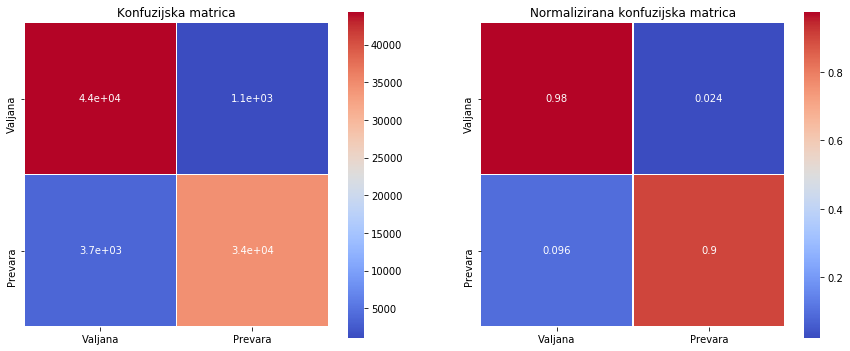


----------------------------------------------------------------------------------------------------
ROC za cijeli dataset


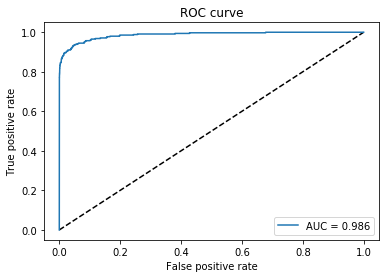

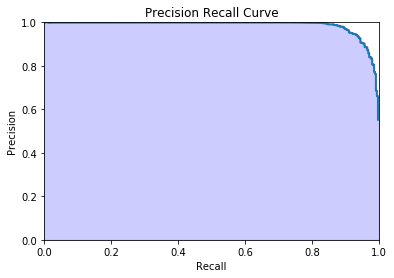

In [70]:
y_pred_osample_params = osample_log_reg_est.predict(X_osample_test)
y_score_osample_params = osample_log_reg_est.decision_function(X_osample_test)

print('-'*100)
print('Za oversamplirani dataset (sa podešenim parametrima):')
precision_recall_f1_scores(y_osample_test, y_pred_osample_params)
print('-'*100)
print(classification_report(y_osample_test, y_pred_osample_params))
print()
print('Konfuzijska matrica za oversamplirani dataset')
plot_confusion_matrix(confusion_matrix(y_osample_test, y_pred_osample_params), y_osample_test_non_fraud_num, y_osample_test_fraud_num)
print()
print('-'*100)
print('ROC za cijeli dataset')
plot_roc_auc_curve(y_osample_test, y_score_osample_params)
plot_precision_recall_curve(y_osample_test, y_score_osample_params)

----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 6.0600000000000005%
	Recall score: 91.84%
	F1 score: 11.360000000000001%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


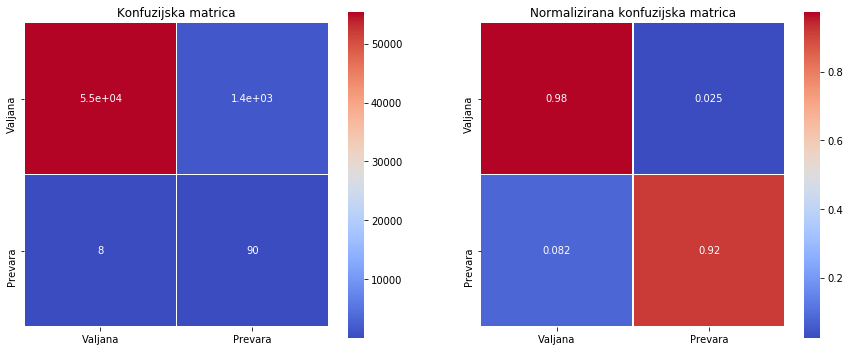

----------------------------------------------------------------------------------------------------


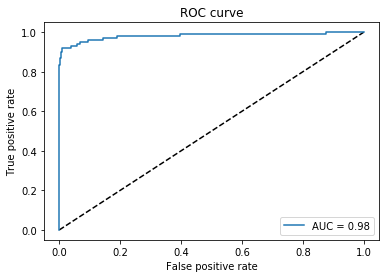

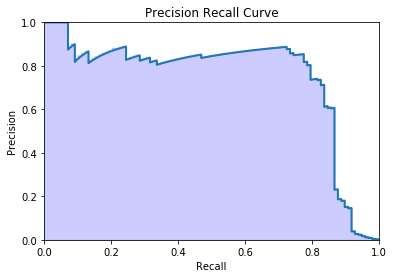

In [71]:
full_pred_osample = osample_log_reg_est.predict(X_data_test)
#full_pred_score_osample = log_reg_data.decision_function(X_data_test)
full_pred_score_osample = osample_log_reg_est.decision_function(X_data_test)

print('-'*100)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_osample)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_osample))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_osample), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_osample)
plot_precision_recall_curve(y_data_test, full_pred_score_osample)

In [61]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)

smote_pipeline = imbalanced_make_pipeline(SMOTE(random_state=42, sampling_strategy='minority'), smote_log_reg)
smote_model = smote_pipeline.fit(X_data_train, y_data_train)
smote_estimator = smote_log_reg.best_estimator_
smote_pred = smote_estimator.predict(X_data_test)
smote_params = smote_log_reg.best_params_
#smote = SMOTE(sampling_strategy='minority', random_state=42)
#smote_X, smote_y = smote.fit_resample(X_data_train, y_data_train)
#print('Broj valjanih transakcija nakon SMOTE-a: ' + str(len(smote_X[smote_X['Class'] == 0])))
#print('Broj valjanih transakcija nakon SMOTE-a: ' + str(len(smote_X[smote_X['Class'] == 1])))

In [62]:
print('Logistička regresija s parametrima (sa SMOTE)')
print('Najbolji parametri: ' + str(smote_params))

training_score_params_smote = cross_val_score(smote_estimator, X_data_train, y_data_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad SMOTE-oversampliranim datasetom (sa parametrima): ' 
     + str(round(training_score_params_smote.mean(), 4) * 100) + '%')

Logistička regresija s parametrima (sa SMOTE)
Najbolji parametri: {'C': 100, 'penalty': 'l2'}
Rezultat treniranja za logističku regresiju nad SMOTE-oversampliranim datasetom (sa parametrima): 99.92%


----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 5.82%
	Recall score: 91.84%
	F1 score: 10.94%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


----------------------------------------------------------------------------------------------------


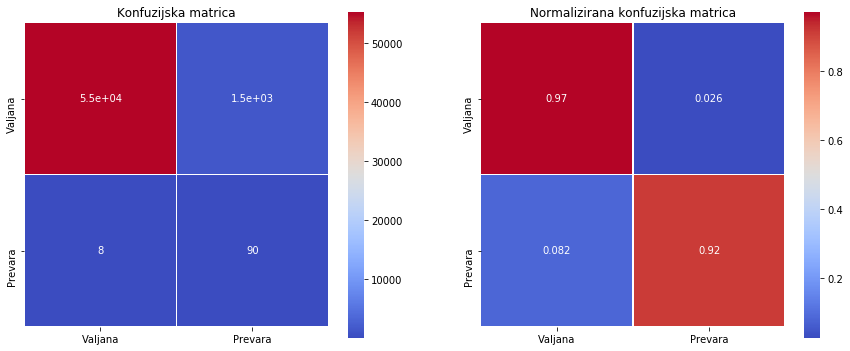

----------------------------------------------------------------------------------------------------


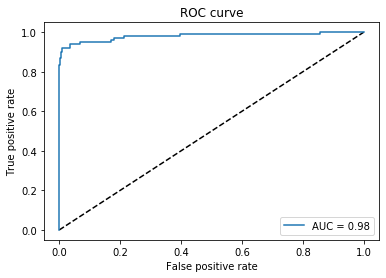

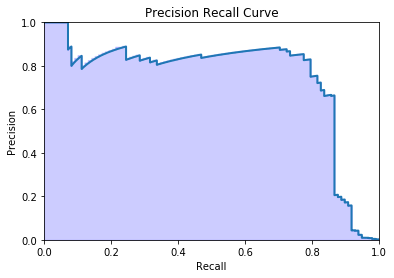

In [63]:
full_pred_smote = smote_estimator.predict(X_data_test)
full_pred_score_smote = smote_estimator.decision_function(X_data_test)

print('-'*100)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_smote)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_smote))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_smote), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_smote)
plot_precision_recall_curve(y_data_test, full_pred_score_smote)

In [69]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_sample(X, y)

In [75]:
# print('Broj valjanih transakcija nakon SMOTE-a: ' + str(len(np.where(y_smote == 0)[0])))
# print('Broj prevarantskih transakcija nakon SMOTE-a: ' + str(len(np.where(y_smote == 1)[0])))
print('Broj valjanih transakcija nakon SMOTE-a: ' + str(y_smote.value_counts()[0]))
print('Broj prevarantskih transakcija nakon SMOTE-a: ' + str(y_smote.value_counts()[1]))

Broj valjanih transakcija nakon SMOTE-a: 284315
Broj prevarantskih transakcija nakon SMOTE-a: 284315
Broj valjanih transakcija nakon SMOTE-a: 284315
Broj prevarantskih transakcija nakon SMOTE-a: 284315


In [72]:
X_smote.head()

Amount_After_Scaling        V1        V2        V3        V4        V5  \
0              0.244964 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1             -0.342475  1.191857  0.266151  0.166480  0.448154  0.060018   
2              1.160686 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3              0.140534 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4             -0.073403 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V19       V20       V21  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.403993  0.251412 -0.018307   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.145783 -0.069083 -0.225775   
2  1.800499  0.791461  0.247676 -1.514654  ... -2.261857  0.524980  0.247998   
3  1.247203  0.237609  0.377436 -1.387024  ... -1.232622 -0.208038 -0.108300   
4  0.095921  0.592941 -0.270533  0.817739  ...  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724  
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153  

[5 rows x 29 columns]

In [67]:
#smote - undersampling combination
#borderlinesmote
#adasyn
#mozda podesiti k_neighbors za SMOTE i dodati drugacije sampling strategije

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter

under_sampler = RandomUnderSampler(sampling_strategy='majority')
smote_sampler = SMOTE(sampling_strategy='minority')
#smote_under_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
smote_under_log_reg = LogisticRegression()

smote_under_pipeline = imbalanced_make_pipeline(smote_sampler, under_sampler, smote_under_log_reg)
smote_under_model = smote_under_pipeline.fit(X_data_train, y_data_train)
#smote_under_estimator = smote_under_log_reg.best_estimator_
smote_under_pred = smote_under_estimator.predict(X_data_test)
#smote_under_params = smote_under_log_reg.best_params_

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
training_smote_under_score = cross_val_score(smote_under_pipeline, X_data_train, y_data_train, cv=rskf)

print('Logistička regresija (sa kombinacijom SMOTE-a i nasumičnog undersampla)')
#print('Najbolji parametri: ' + str(smote_under_params))

print('Rezultat treniranja za logističku regresiju nad kombinacijom SMOTE-a i nasumičnog unersampla: ' 
     + str(round(traingin_smote_under_scores.mean(), 4) * 100) + '%')

In [ ]:
full_pred_smote_under = smote_under_estimator.predict(X_data_test)
full_pred_score_smote_under = smote_under_estimator.decision_function(X_data_test)

print('-'*100)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_smote_under)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_smote_under))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_smote_under), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_smote_under)
plot_precision_recall_curve(y_data_test, full_pred_score_smote_under)

In [76]:
#borderline smote
from imblearn.over_sampling import BorderlineSMOTE
border_smote = BorderlineSMOTE(sampling_strategy='minority', k_neighbors=3)
X_border_smote, y_border_smote = border_smote.fit_resample(X, y)
y_border_smote_non_fraud_num = y_border_smote.value_counts()[0]
y_border_smote_fraud_num = y_border_smote.value_counts()[1]

X_border_smote_train, X_border_smote_test, y_border_smote_train, y_border_smote_test = train_test_split(X_border_smote, y_border_smote, test_size=0.20, random_state=42)
y_border_smote_test_non_fraud_num = y_border_smote_test.value_counts()[0]
y_border_smote_test_fraud_num = y_border_smote_test.value_counts()[1]

print('Broj valjanih transakcija nakon SMOTE-a: ' + str(y_border_smote_non_fraud_num))
print('Broj prevarantskih transakcija nakon SMOTE-a: ' + str(y_border_smote_fraud_num))
print('Ukupan broj transakcija nakon SMOTE-a: ' + str(y_border_smote_fraud_num + y_border_smote_non_fraud_num))

print('Broj transakcija u skupu za treniranje nakon SMOTE-a: ' + str(len(y_border_smote_train)))
print('Broj transakcija u skupu za testiranje nakon SMOTE-a: ' + str(len(y_border_smote_test)))

Broj valjanih transakcija nakon SMOTE-a: 284315
Broj prevarantskih transakcija nakon SMOTE-a: 284315
Ukupan broj transakcija nakon SMOTE-a: 568630
Broj transakcija u skupu za treniranje nakon SMOTE-a: 454904
Broj transakcija u skupu za testiranje nakon SMOTE-a: 113726


In [93]:
# border_smote_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
border_smote_log_reg = LogisticRegression(solver='liblinear')
border_smote_log_reg.fit(X_border_smote_train, y_border_smote_train)
# borer_smote_est = border_smote_log_reg.best_estimator_
# border_smote_params = border_smote_log_reg.best_params_
# print('Najbolji parametri: ' + str(border_smote_params))

border_smote_training_score = cross_val_score(border_smote_log_reg, X_border_smote_train, y_border_smote_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad BorderlineSMOTE datasetom: ' 
     + str(round(border_smote_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za logističku regresiju nad undersampliranim datasetom (sa parametrima): 99.21%


----------------------------------------------------------------------------------------------------
Predikcija za BorderlineSMOTE dataset:
	Precision score: 99.17%
	Recall score: 99.24%
	F1 score: 99.21%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


----------------------------------------------------------------------------------------------------


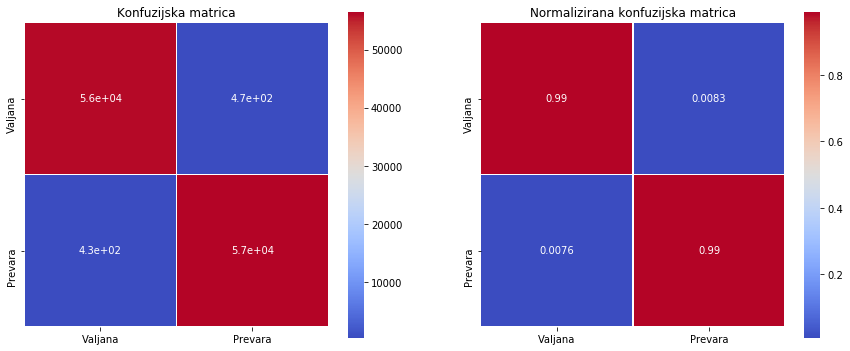

----------------------------------------------------------------------------------------------------


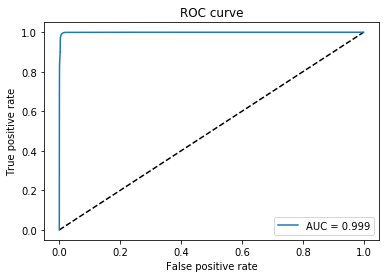

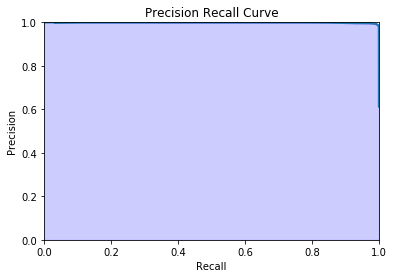

In [94]:
pred_border_smote = border_smote_log_reg.predict(X_border_smote_test)
pred_score_border_smote = border_smote_log_reg.decision_function(X_border_smote_test)

print('-'*100)
print('Predikcija za BorderlineSMOTE dataset:')
precision_recall_f1_scores(y_border_smote_test, pred_border_smote)
print()
print('-'*100)
print(classification_report(y_border_smote_test, pred_border_smote))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_border_smote_test, pred_border_smote), y_border_smote_test_non_fraud_num, y_border_smote_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_border_smote_test, pred_score_border_smote)
plot_precision_recall_curve(y_border_smote_test, pred_score_border_smote)

----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 15.950000000000001%
	Recall score: 86.72999999999999%
	F1 score: 26.939999999999998%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.87      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.93      0.63     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


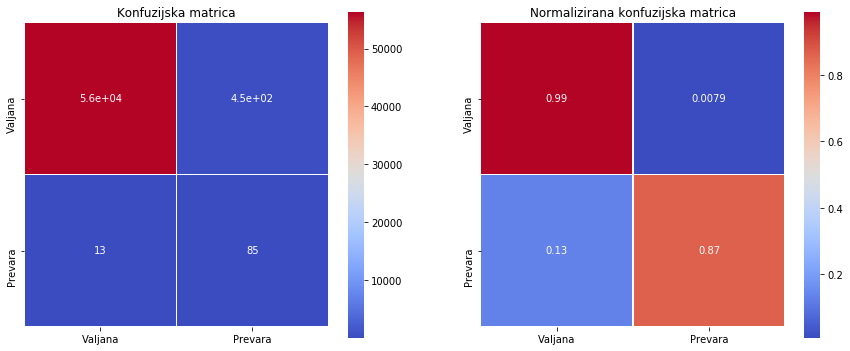

----------------------------------------------------------------------------------------------------


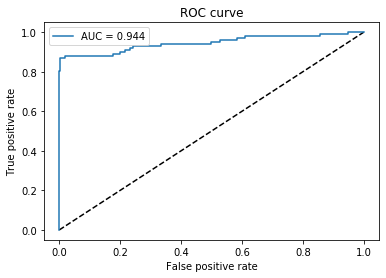

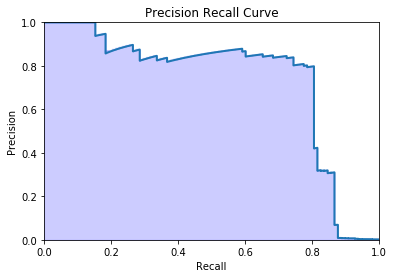

In [95]:
full_pred_border_smote = border_smote_log_reg.predict(X_data_test)
full_pred_score_border_smote = border_smote_log_reg.decision_function(X_data_test)

print('-'*100)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_border_smote)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_border_smote))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_border_smote), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_border_smote)
plot_precision_recall_curve(y_data_test, full_pred_score_border_smote)

In [100]:
#adasyn
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority', n_neighbors=3)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
y_adasyn_non_fraud_num = y_adasyn.value_counts()[0]
y_adasyn_fraud_num = y_adasyn.value_counts()[1]

X_adasyn_train, X_adasyn_test, y_adasyn_train, y_adasyn_test = train_test_split(X_adasyn, y_adasyn, test_size=0.20, random_state=42)
y_adasyn_test_non_fraud_num = y_adasyn_test.value_counts()[0]
y_adasyn_test_fraud_num = y_adasyn_test.value_counts()[1]

print('Broj valjanih transakcija nakon ADASYN-a: ' + str(y_adasyn_non_fraud_num))
print('Broj prevarantskih transakcija nakon ADASYN-a: ' + str(y_adasyn_fraud_num))
print('Ukupan broj transakcija nakon ADASYN-a: ' + str(y_adasyn_fraud_num + y_adasyn_non_fraud_num))

print('Broj transakcija u skupu za treniranje nakon ADASYN-a: ' + str(len(y_adasyn_train)))
print('Broj transakcija u skupu za testiranje nakon ADASYN-a: ' + str(len(y_adasyn_test)))

Broj valjanih transakcija nakon ADASYN-a: 284315
Broj prevarantskih transakcija nakon ADASYN-a: 284307
Ukupan broj transakcija nakon ADASYN-a: 568622
Broj transakcija u skupu za treniranje nakon ADASYN-a: 454897
Broj transakcija u skupu za testiranje nakon ADASYN-a: 113725


In [101]:

adasyn_log_reg = LogisticRegression(solver='liblinear')
adasyn_log_reg.fit(X_adasyn_train, y_adasyn_train)

adasyn_training_score = cross_val_score(border_smote_log_reg, X_border_smote_train, y_border_smote_train, cv=skfold)
print('Rezultat treniranja za logističku regresiju nad ADASYN datasetom: ' 
     + str(round(adasyn_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za logističku regresiju nad ADASYN datasetom: 99.21%


----------------------------------------------------------------------------------------------------
Predikcija za ADASYN dataset:
	Precision score: 89.47%
	Recall score: 86.33%
	F1 score: 87.87%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     56785
           1       0.89      0.86      0.88     56940

    accuracy                           0.88    113725
   macro avg       0.88      0.88      0.88    113725
weighted avg       0.88      0.88      0.88    113725


----------------------------------------------------------------------------------------------------


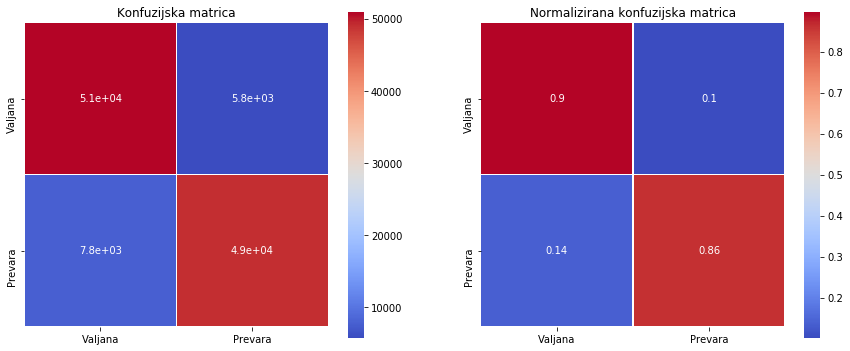

----------------------------------------------------------------------------------------------------


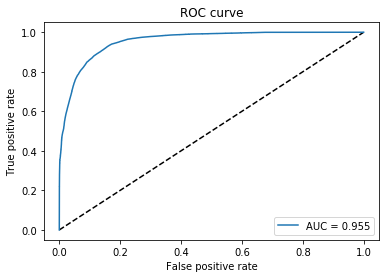

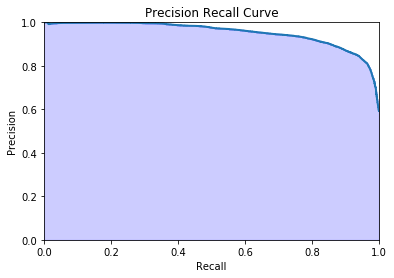

In [102]:
pred_adasyn = adasyn_log_reg.predict(X_adasyn_test)
pred_score_adasyn = adasyn_log_reg.decision_function(X_adasyn_test)

print('-'*100)
print('Predikcija za ADASYN dataset:')
precision_recall_f1_scores(y_adasyn_test, pred_adasyn)
print()
print('-'*100)
print(classification_report(y_adasyn_test, pred_adasyn))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_adasyn_test, pred_adasyn), y_adasyn_test_non_fraud_num, y_adasyn_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_adasyn_test, pred_score_adasyn)
plot_precision_recall_curve(y_adasyn_test, pred_score_adasyn)

----------------------------------------------------------------------------------------------------
Predikcija za cijeli dataset:
	Precision score: 1.5699999999999998%
	Recall score: 93.88%
	F1 score: 3.09%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.94      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.90      0.95     56962


----------------------------------------------------------------------------------------------------


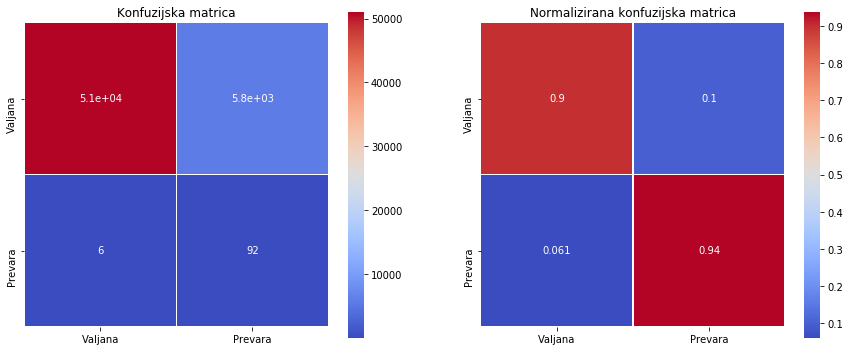

----------------------------------------------------------------------------------------------------


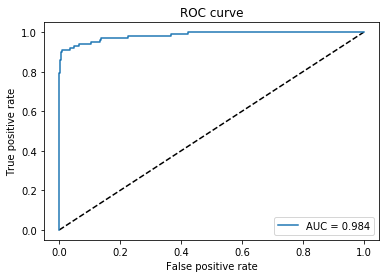

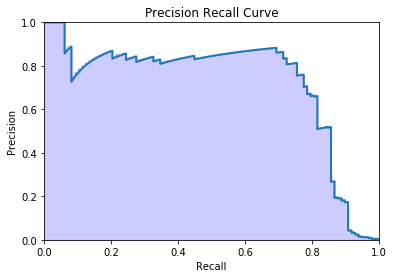

In [103]:
full_pred_adasyn = adasyn_log_reg.predict(X_data_test)
full_pred_score_adasyn = adasyn_log_reg.decision_function(X_data_test)

print('-'*100)
print('Predikcija za cijeli dataset:')
precision_recall_f1_scores(y_data_test, full_pred_adasyn)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_adasyn))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_adasyn), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
plot_roc_auc_curve(y_data_test, full_pred_score_adasyn)
plot_precision_recall_curve(y_data_test, full_pred_score_adasyn)

In [68]:
#DecisionTree


In [69]:
#decision tree - nad svim podacima
dt_data = DecisionTreeClassifier()
dt_data.fit(X_data_train, y_data_train)
dt_data_training_score = cross_val_score(dt_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za stabla odluke nad cijelim datasetom: " + 
      str(round(dt_data_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za stabla odluke nad cijelim datasetom: 99.91%


----------------------------------------------------------------------------------------------------
Za cijeli dataset:
	Precision score: 73.08%
	Recall score: 77.55%
	F1 score: 75.25%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.78      0.75        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


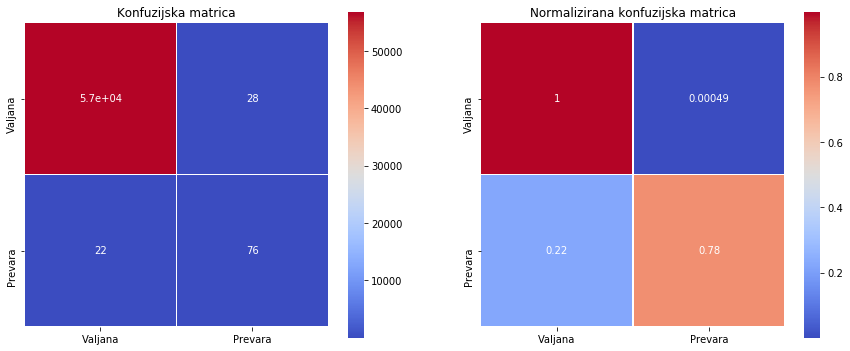

----------------------------------------------------------------------------------------------------


In [70]:
#nad svim podacima test
dt_y_pred_data = dt_data.predict(X_data_test)
#dt_y_score_data = dt_data.decision_function(X_data_test)

print('--'*50)
print('Za cijeli dataset:')
precision_recall_f1_scores(y_data_test, dt_y_pred_data)
print()
print('--'*50)
print(classification_report(y_data_test, dt_y_pred_data))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, dt_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
#plot_roc_auc_curve(y_data_test, dt_y_score_data)
#plot_precision_recall_curve(y_data_test, dt_y_score_data)



In [66]:
#undersample DT
dt_usample = DecisionTreeClassifier()
dt_usample.fit(X_usample_train, y_usample_train)
dt_training_score_usample = cross_val_score(dt_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za stabla odluke nad undersampliranim datasetom: " + 
      str(round(dt_training_score_usample.mean(), 4) * 100) + '%')

Rezultat treniranja za stabla odluke nad undersampliranim datasetom: 90.85%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 87.37%
	Recall score: 85.57000000000001%
	F1 score: 86.46000000000001%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       100
           1       0.87      0.86      0.86        97

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197


----------------------------------------------------------------------------------------------------


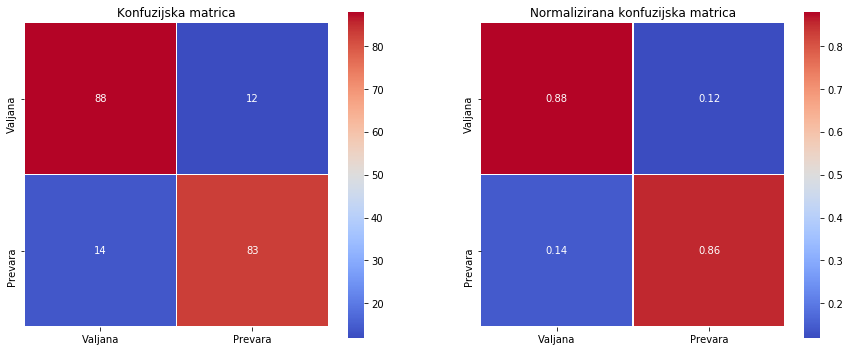

----------------------------------------------------------------------------------------------------
ROC i PR krivulje:


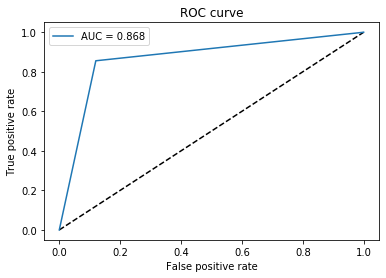

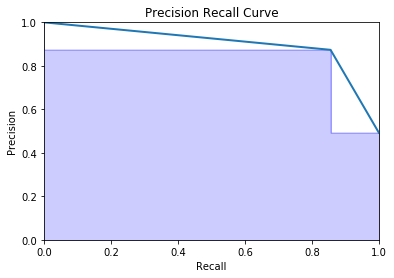

****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.96      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962


----------------------------------------------------------------------------------------------------


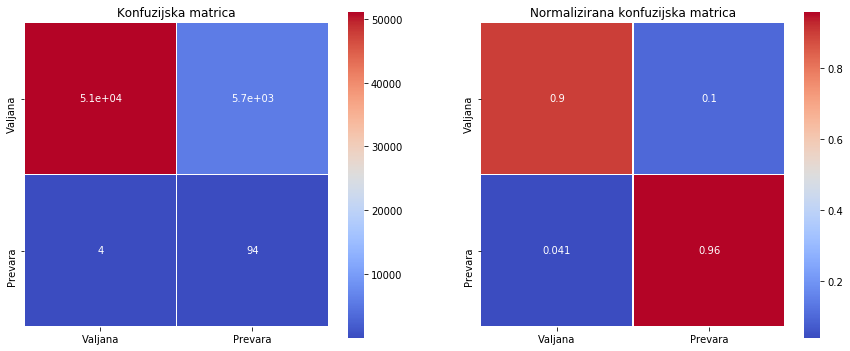

----------------------------------------------------------------------------------------------------
ROC i PR krivulje:


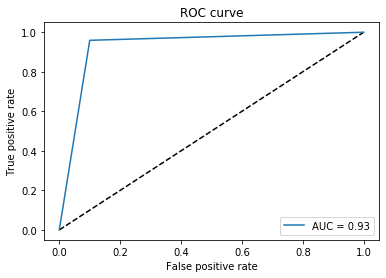

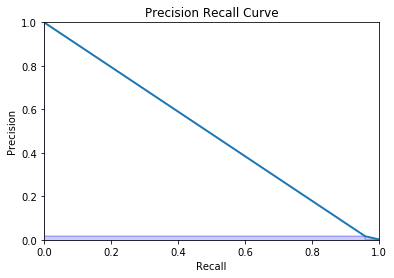

In [67]:
#nad usample test
dt_y_pred_usample = dt_usample.predict(X_usample_test)
dt_y_score_usample = dt_usample.predict_proba(X_usample_test)[:, 1]

dt_y_full_pred = dt_usample.predict(X_data_test)
dt_y_full_score = dt_usample.predict_proba(X_data_test)[:, 1]
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, dt_y_pred_usample)
print()
print('--'*50)
print(classification_report(y_usample_test, dt_y_pred_usample))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, dt_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('ROC i PR krivulje:')
plot_roc_auc_curve(y_usample_test, dt_y_score_usample)
plot_precision_recall_curve(y_usample_test, dt_y_score_usample)

print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, dt_y_full_pred))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, dt_y_full_pred), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
print('ROC i PR krivulje:')
plot_roc_auc_curve(y_data_test, dt_y_full_score)
plot_precision_recall_curve(y_data_test, dt_y_full_score)






In [82]:
np.count_nonzero(dt_y_full_score), len(dt_y_full_score)

(5786, 56962)

In [68]:
#len(np.where(dt_y_full_score == y_data_test.values)[0]), len(y_data_test.values)
#len(np.where(dt_y_score_usample == 1)[0])

In [69]:
len(np.where(dt_y_score_usample == y_usample_test.values)[0]), len(y_usample_test.values)

(171, 197)

In [70]:
#true positives
tps = len(np.intersect1d(np.where(dt_y_score_usample == 1), np.where(dt_y_score_usample == y_usample_test)))
#false negatives
fns = len(np.intersect1d(np.where(dt_y_score_usample == 0)[0], np.where(dt_y_score_usample != y_usample_test)))
pos = tps + fns

tpr = tps/pos
print('True positive rate: ' + str(tpr))



True positive rate: 0.8556701030927835


In [71]:
#false positives 
fps = len(np.intersect1d(np.where(dt_y_score_usample == 1)[0], np.where(dt_y_score_usample != y_usample_test)))
#true negatives
tns = len(np.intersect1d(np.where(dt_y_score_usample == 0), np.where(dt_y_score_usample == y_usample_test)))
neg = fps + tns

fpr = fps/neg
print('False positive rate: ' + str(fpr))

False positive rate: 0.12


In [93]:
#np.array(np.where(dt_y_pred_data == 1)).shape[1], np.array(np.where(dt_y_pred_data == 0)).shape[1]

In [77]:
# from sklearn.tree import export_graphviz
# from subprocess import call
# from IPython.display import Image

# export_graphviz(dt_usample, out_file='tree_usample.dot', 
#                 feature_names = X_usample_train.columns.tolist(),
#                 class_names = ['Valjana','Prevara'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# call(['dot','tree_usample.dot', '-Tpng', '-o', 'tree_usample.png'], shell=True)
# Image(filename = 'tree_usample.png')

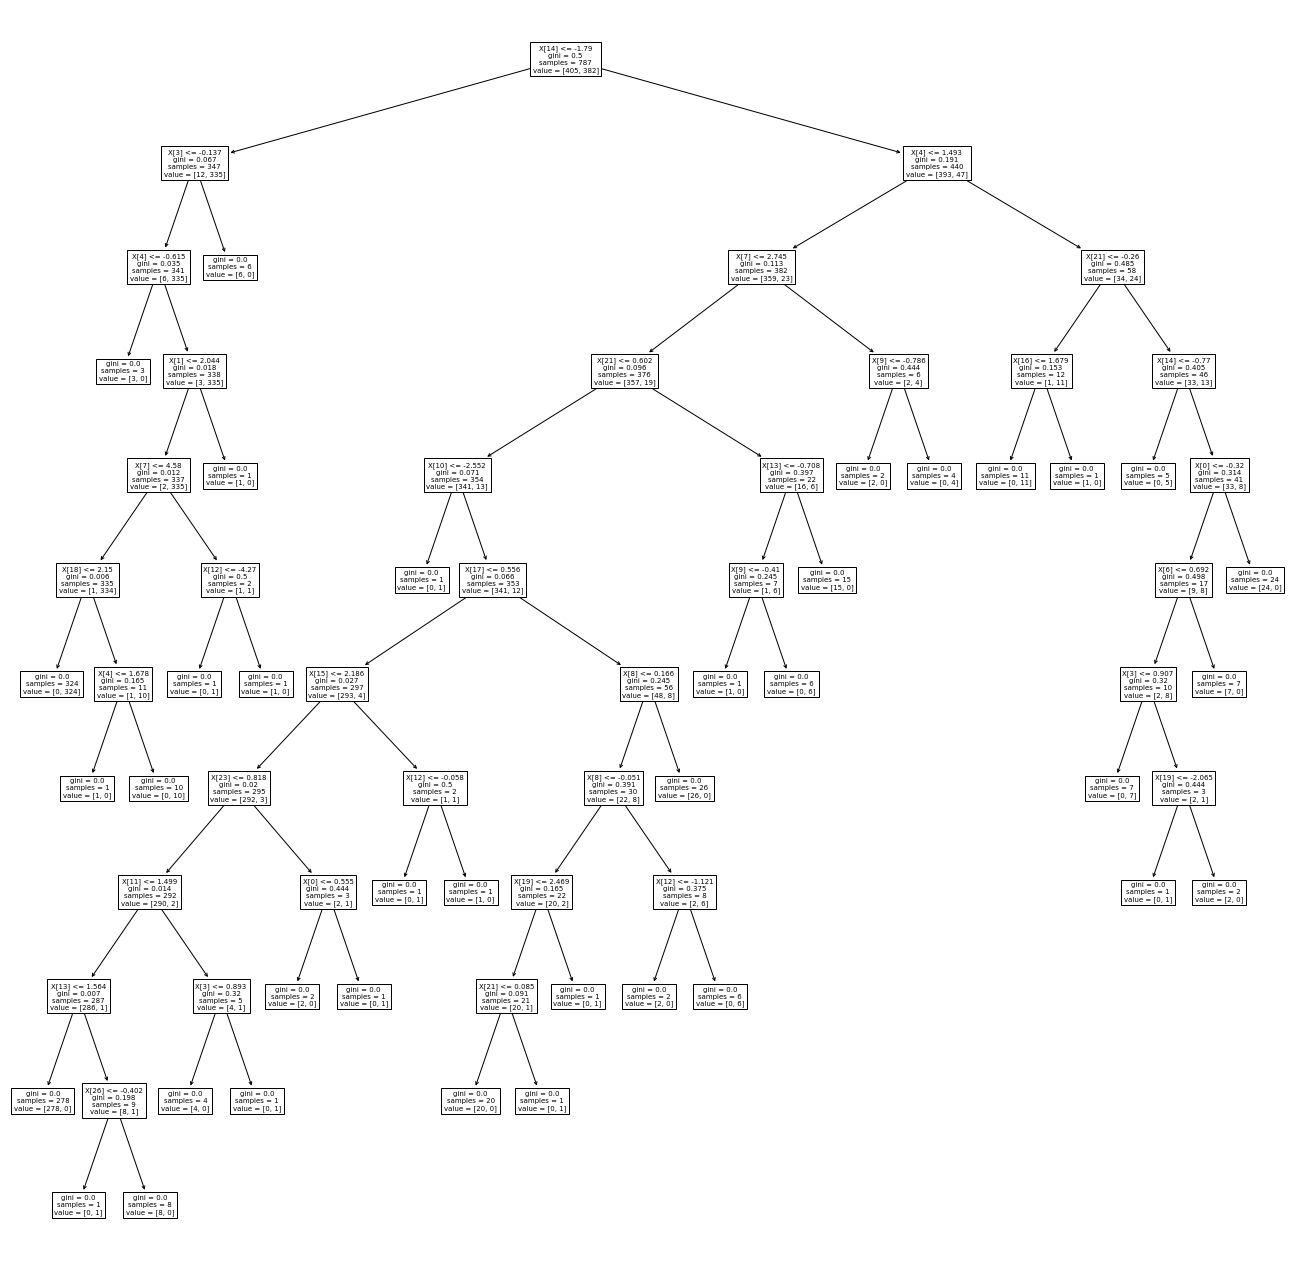

In [96]:
from sklearn import tree
fig_data_dt, ax_data_dt = plt.subplots(1,1,figsize=(23,23))
tree.plot_tree(dt_usample)
plt.show()

In [107]:

criterion_params = ['gini', 'entropy']
splitter_params = ['best', 'random']
max_depth_params = [1, 2, 3, 4]
min_samples_leaf_params = [1, 3, 5, 7]
dt_params = {'criterion': criterion_params, 'splitter': splitter_params, 'max_depth': max_depth_params, 'min_samples_leaf': min_samples_leaf_params}
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)
grid_dt.fit(X_usample_train, y_usample_train)
dt_params_usample = grid_dt.best_estimator_
dt_params_best = grid_dt.best_params_
print('Najbolji parametri: ' + str(dt_params_best))

dt_training_score_params_usample = cross_val_score(dt_params_usample, X_usample_train, y_usample_train, cv=skfold)
print('Rezultat treniranja za stabla odluke nad undersampliranim datasetom (sa parametrima): ' 
     + str(round(dt_training_score_params_usample.mean(), 4) * 100) + '%')


Najbolji parametri: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'random'}
Rezultat treniranja za stabla odluke nad undersampliranim datasetom (sa parametrima): 90.97%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 89.8%
	Recall score: 90.72%
	F1 score: 90.25999999999999%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.90      0.91      0.90        97

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197


----------------------------------------------------------------------------------------------------


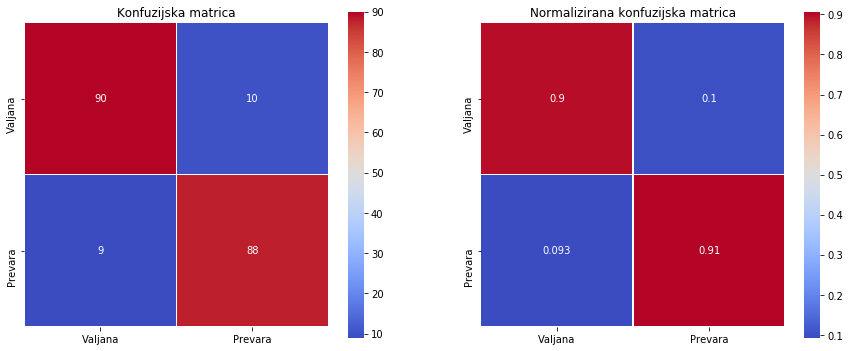

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56864
           1       0.01      0.92      0.03        98

    accuracy                           0.89     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.89      0.94     56962


----------------------------------------------------------------------------------------------------


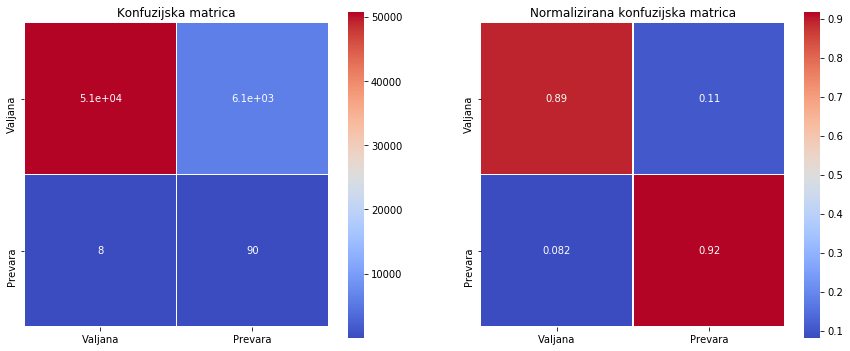

----------------------------------------------------------------------------------------------------


In [108]:
dt_y_pred_usample_params = dt_params_usample.predict(X_usample_test)
#dt_y_score_usample = dt_usample.decision_function(X_usample_test)

dt_y_full_pred_params = dt_params_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, dt_y_pred_usample_params)
print()
print('--'*50)
print(classification_report(y_usample_test, dt_y_pred_usample_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, dt_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, dt_y_full_pred_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, dt_y_full_pred_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

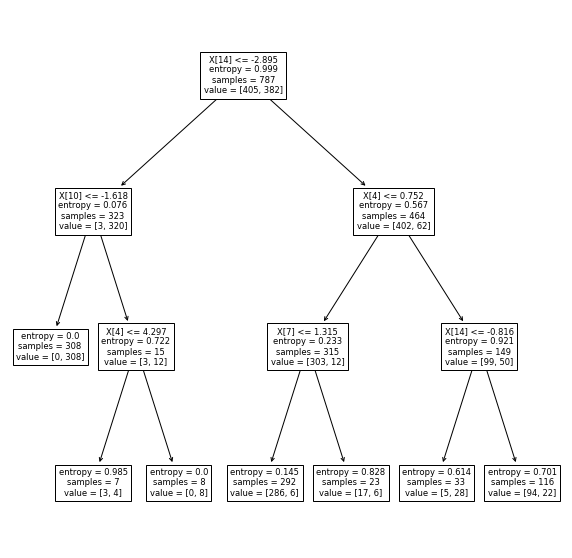

In [90]:
fig_dt, ax_dt = plt.subplots(1,1,figsize=(10,10))
tree.plot_tree(dt_params_usample)
plt.show()

In [109]:
# y_usample_cut_test_non_fraud_num = y_usample_cut_test.value_counts()[0]
# y_usample_cut_test_fraud_num = y_usample_cut_test.value_counts()[1]

grid_dt_cut = GridSearchCV(DecisionTreeClassifier(), dt_params)
grid_dt_cut.fit(X_usample_cut_train, y_usample_cut_train)
dt_params_usample_cut = grid_dt_cut.best_estimator_
dt_params_cut = grid_dt_cut.best_params_
print('Najbolji parametri: ' + str(dt_params_cut))

dt_training_score_params_usample_cut = cross_val_score(dt_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print('Rezultat treniranja za stabla odluke nad undersampliranim datasetom (sa parametrima, bez outliera): ' 
     + str(round(dt_training_score_params_usample_cut.mean(), 4) * 100) + '%')

Najbolji parametri: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'splitter': 'random'}
Rezultat treniranja za stabla odluke nad undersampliranim datasetom (sa parametrima, bez outliera): 90.10000000000001%


--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima, bez outliera):
	Precision score: 96.1%
	Recall score: 82.22%
	F1 score: 88.62%
----------------------------------------------------------------------------------------------------


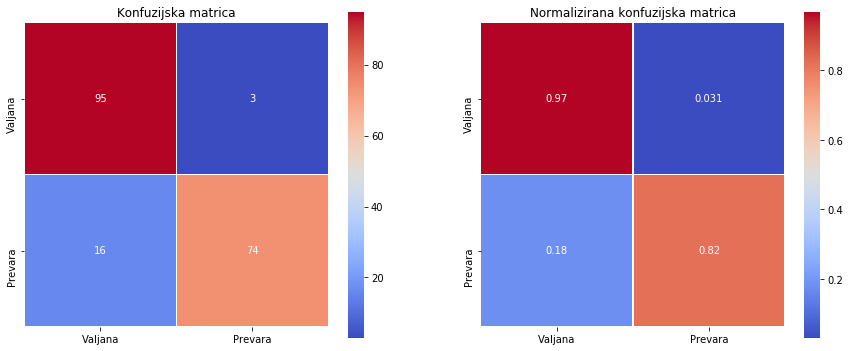

Za cijeli dataset:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


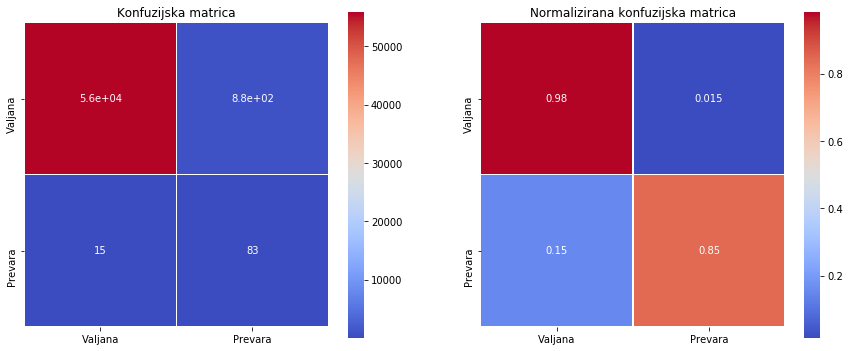

----------------------------------------------------------------------------------------------------


In [110]:
dt_y_pred_usample_params_cut = dt_params_usample_cut.predict(X_usample_cut_test)
dt_y_full_pred_params_cut = dt_params_usample_cut.predict(X_data_test)
print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima, bez outliera):')
precision_recall_f1_scores(y_usample_cut_test, dt_y_pred_usample_params_cut)
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, dt_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('Za cijeli dataset:')
print()
print('--'*50)
print(classification_report(y_data_test, dt_y_full_pred_params_cut))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, dt_y_full_pred_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

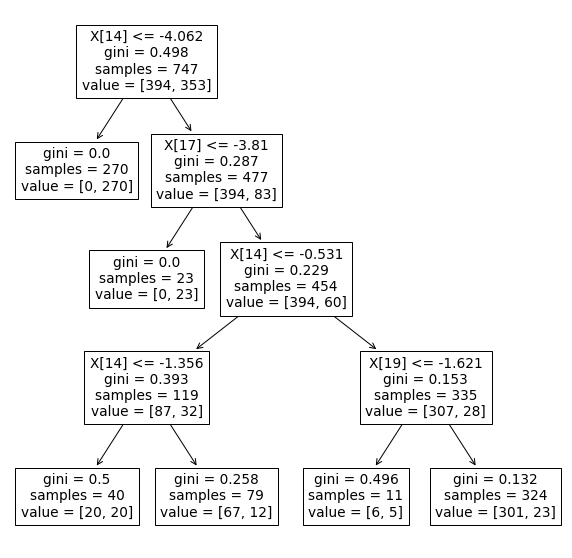

In [87]:
fig_dt_p, ax_dt_p = plt.subplots(1,1,figsize=(10,10))
tree.plot_tree(dt_params_usample_cut)
plt.show()

In [88]:
#mozda i oversampling za decision trees
#uljepsati crtanje stabala
#mozda i nesto s parametrima (+ bagging)

In [89]:
#random forest

In [100]:
#vrlo, vrlo sporo, skoro neizvedivo
#mozda ubaciti stopericu, pa usporedivat, ali ovo se mozda nikad nit ne izvrsi
rf_data = RandomForestClassifier()
rf_data.fit(X_data_train, y_data_train)
rf_data_training_score = cross_val_score(rf_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za slučajne šume nad cijelim datasetom: " + 
      str(round(rf_data_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za slučajne šume nad cijelim datasetom: 99.95%


----------------------------------------------------------------------------------------------------
Za cijeli dataset:
	Precision score: 97.44%
	Recall score: 77.55%
	F1 score: 86.36%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


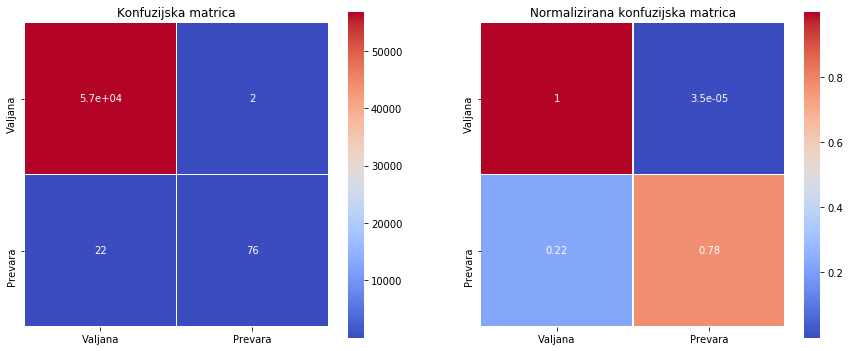

----------------------------------------------------------------------------------------------------


In [101]:
#nad svim podacima test
rf_y_pred_data = rf_data.predict(X_data_test)
#dt_y_score_data = dt_data.decision_function(X_data_test)

print('--'*50)
print('Za cijeli dataset:')
precision_recall_f1_scores(y_data_test, rf_y_pred_data)
print()
print('--'*50)
print(classification_report(y_data_test, rf_y_pred_data))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, rf_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)
#plot_roc_auc_curve(y_data_test, dt_y_score_data)
#plot_precision_recall_curve(y_data_test, dt_y_score_data)

In [60]:
rf_usample = RandomForestClassifier()
rf_usample.fit(X_usample_train, y_usample_train)
rf_training_score_usample = cross_val_score(rf_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za slučajne šume nad undersampliranim datasetom: " + 
      str(round(rf_training_score_usample.mean(), 4) * 100) + '%')

Rezultat treniranja za stabla odluke nad undersampliranim datasetom: 94.16%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 98.97%
	Recall score: 88.89%
	F1 score: 93.66%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        89
           1       0.99      0.89      0.94       108

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197


----------------------------------------------------------------------------------------------------


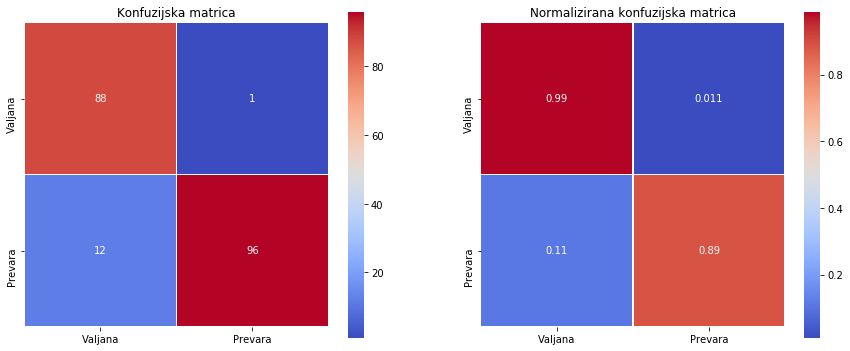

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.99      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.98      0.56     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


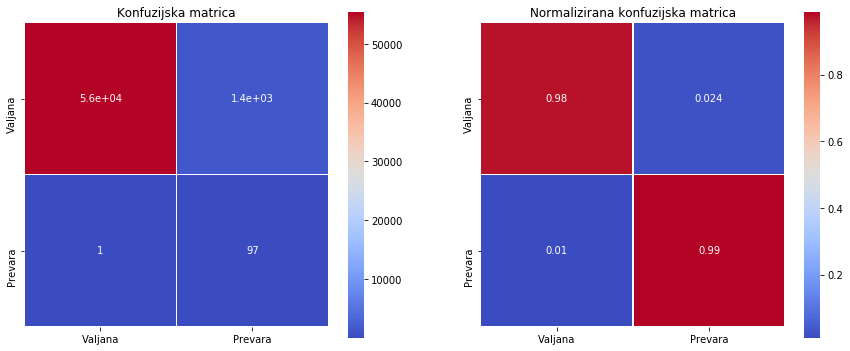

----------------------------------------------------------------------------------------------------


In [62]:
#nad usample test
rf_y_pred_usample = rf_usample.predict(X_usample_test)
#dt_y_score_usample = dt_usample.decision_function(X_usample_test)

rf_y_full_pred = rf_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, rf_y_pred_usample)
print()
print('--'*50)
print(classification_report(y_usample_test, rf_y_pred_usample))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, rf_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, rf_y_full_pred))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, rf_y_full_pred), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [85]:
#s parametrima

criterion_params = ['gini', 'entropy']
num_estimators_params = [5, 10, 50, 100]
max_depth_params = [1, 2, 3, 4]
min_samples_leaf_params = [1, 3, 5, 7]
class_weight_params = ['balanced', 'balanced_subsample']
rf_params = {'criterion': criterion_params, 'n_estimators': num_estimators_params, 'max_depth': max_depth_params,
             'min_samples_leaf': min_samples_leaf_params, 'class_weight': class_weight_params}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_usample_train, y_usample_train)
rf_params_usample = grid_rf.best_estimator_
rf_params_best = grid_rf.best_params_
print('Najbolji parametri: ' + str(rf_params_best))

rf_training_score_params_usample = cross_val_score(rf_params_usample, X_usample_train, y_usample_train, cv=skfold)
print('Rezultat treniranja za slučajne šume nad undersampliranim datasetom (sa parametrima): ' 
     + str(round(rf_training_score_params_usample.mean(), 4) * 100) + '%')


Najbolji parametri: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}
Rezultat treniranja za slučajne šume nad undersampliranim datasetom (sa parametrima): 92.38%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 98.86%
	Recall score: 89.69%
	F1 score: 94.05%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.99      0.90      0.94        97

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197


----------------------------------------------------------------------------------------------------


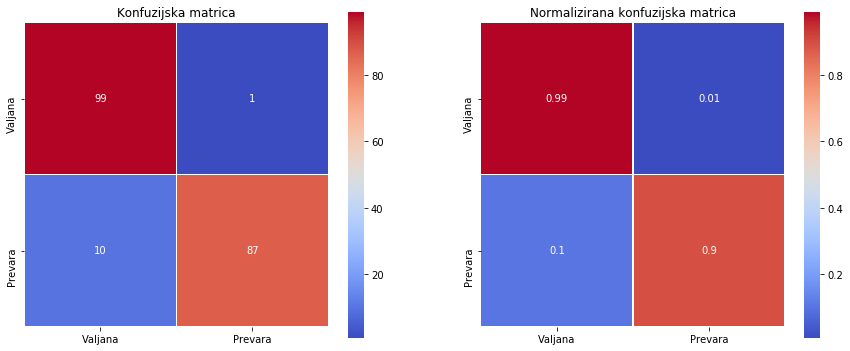

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


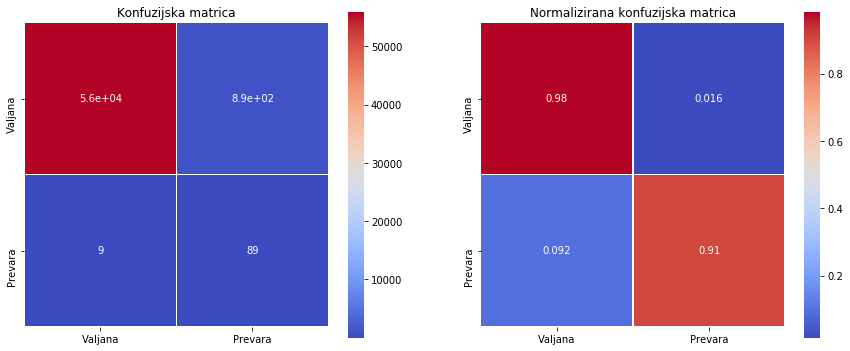

----------------------------------------------------------------------------------------------------


In [86]:
#testiranje
rf_y_pred_usample_params = rf_params_usample.predict(X_usample_test)

rf_y_full_pred_params = rf_params_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, rf_y_pred_usample_params)
print()
print('--'*50)
print(classification_report(y_usample_test, rf_y_pred_usample_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, rf_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, rf_y_full_pred_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, rf_y_full_pred_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [103]:
#bez outliera
grid_rf_cut = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf_cut.fit(X_usample_cut_train, y_usample_cut_train)
rf_params_usample_cut = grid_rf_cut.best_estimator_
rf_params_cut = grid_rf_cut.best_params_
print('Najbolji parametri: ' + str(rf_params_cut))

rf_training_score_params_usample_cut = cross_val_score(rf_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print('Rezultat treniranja za slučajne šume nad undersampliranim datasetom (sa parametrima, bez outliera): ' 
     + str(round(rf_training_score_params_usample_cut.mean(), 4) * 100) + '%')

Najbolji parametri: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 10}
Rezultat treniranja za slučajne šume nad undersampliranim datasetom (sa parametrima, bez outliera): 92.65%


--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima, bez outliera):
	Precision score: 98.72%
	Recall score: 85.56%
	F1 score: 91.67%
----------------------------------------------------------------------------------------------------


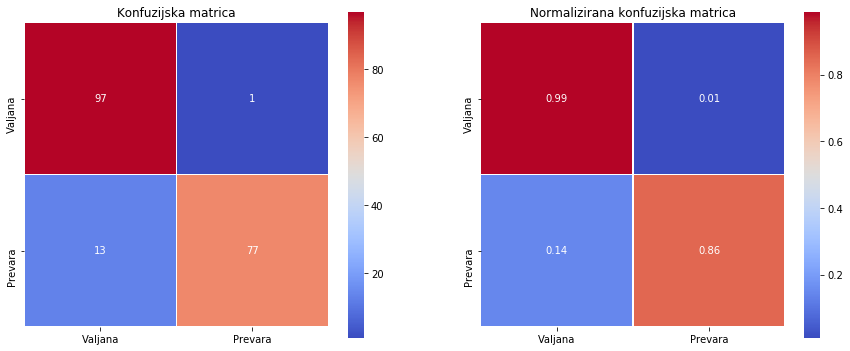

Za cijeli dataset:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.89      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


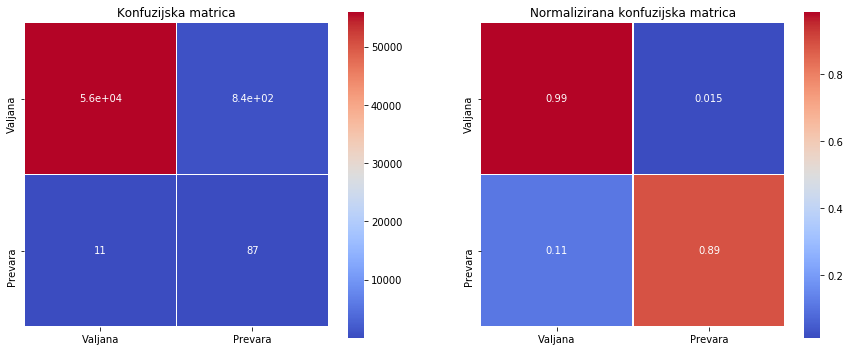

----------------------------------------------------------------------------------------------------


In [104]:
rf_y_pred_usample_params_cut = rf_params_usample_cut.predict(X_usample_cut_test)
rf_y_full_pred_params_cut = rf_params_usample_cut.predict(X_data_test)
print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima, bez outliera):')
precision_recall_f1_scores(y_usample_cut_test, rf_y_pred_usample_params_cut)
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, rf_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('Za cijeli dataset:')
print()
print('--'*50)
print(classification_report(y_data_test, rf_y_full_pred_params_cut))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, rf_y_full_pred_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [73]:
rf_params_cut['n_estimators']

50

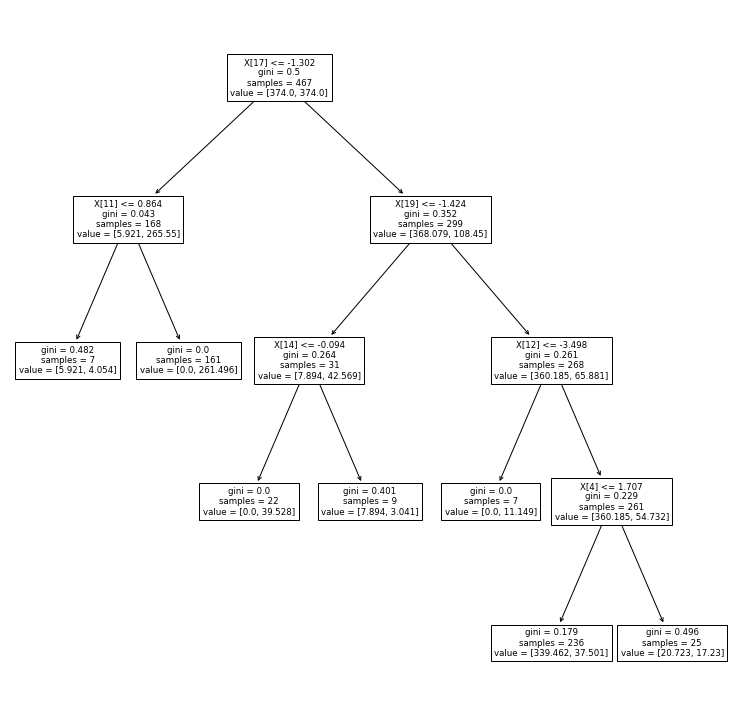

In [75]:
from sklearn import tree
import random
fig_rf_p, ax_rf_p = plt.subplots(1,1,figsize=(13,13))
tree.plot_tree(rf_params_usample_cut[random.randint(0, rf_params_cut['n_estimators']-1)])
plt.show()

In [73]:
#smote rf
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_sample(X, y)

X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote,test_size=0.20,random_state=42)
y_smote_test_non_fraud_num = y_data_test.value_counts()[0]
y_smote_test_fraud_num = y_data_test.value_counts()[1]
train_num = len(X_smote_train)
test_num = len(X_smote_test)
print("Broj podataka u trening skupu nakon SMOTE-a: " + str(train_num))
print("Broj podataka u testnom skupu nakon SMOTE-a: " + str(test_num))
print("Ukupan broj podataka nakon SMOTE-a: " + str(train_num+test_num))

Broj podataka u trening skupu nakon SMOTE-a: 454904
Broj podataka u testnom skupu nakon SMOTE-a: 113726
Ukupan broj podataka nakon SMOTE-a: 568630


In [74]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote_train, y_smote_train)
rf_training_score_smote = cross_val_score(rf_smote, X_smote_train, y_smote_train, cv=skfold)
print("Rezultat treniranja za slučajne šume nad SMOTE datasetom: " + 
      str(round(rf_training_score_smote.mean(), 4) * 100) + '%')

Rezultat treniranja za slučajne šume nad SMOTE datasetom: 99.99%


----------------------------------------------------------------------------------------------------
Testiranje na SMOTE datasetu:
	Precision score: 99.98%
	Recall score: 100.0%
	F1 score: 99.99%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


----------------------------------------------------------------------------------------------------


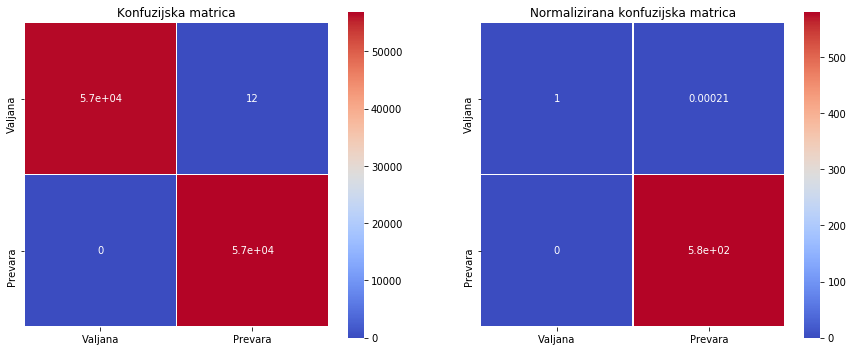

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na originalnom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      1.00      0.98        98

    accuracy                           1.00     56962
   macro avg       0.99      1.00      0.99     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


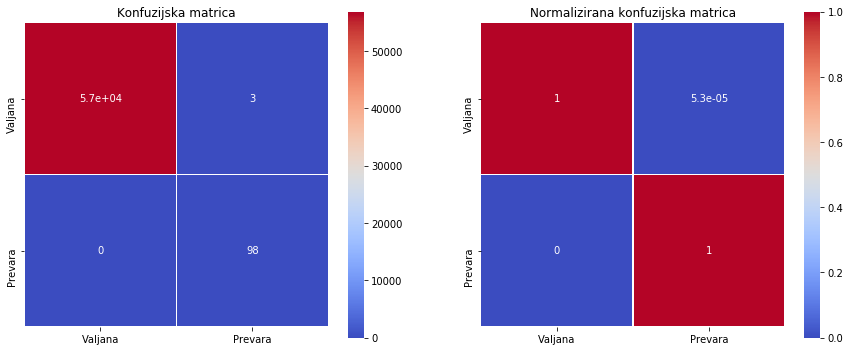

----------------------------------------------------------------------------------------------------


In [75]:
rf_y_pred_smote = rf_smote.predict(X_smote_test)
rf_y_full_pred_smote = rf_smote.predict(X_data_test)
print('--'*50)
print('Testiranje na SMOTE datasetu:')
precision_recall_f1_scores(y_smote_test, rf_y_pred_smote)
print()
print('--'*50)
print(classification_report(y_smote_test, rf_y_pred_smote))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_smote_test, rf_y_pred_smote), y_smote_test_non_fraud_num, y_smote_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na originalnom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, rf_y_full_pred_smote))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, rf_y_full_pred_smote), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [77]:

border_smote_rf = RandomForestClassifier()
border_smote_rf.fit(X_border_smote_train, y_border_smote_train)


rf_border_smote_training_score = cross_val_score(border_smote_rf, X_border_smote_train, y_border_smote_train, cv=skfold)
print('Rezultat treniranja za slučajne šume nad BorderlineSMOTE datasetom: ' 
     + str(round(rf_border_smote_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za slučajne šume nad BorderlineSMOTE datasetom: 99.98%


----------------------------------------------------------------------------------------------------
Predikcija za originalni dataset:
	Precision score: 97.94%
	Recall score: 96.94%
	F1 score: 97.44%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.97      0.97        98

    accuracy                           1.00     56962
   macro avg       0.99      0.98      0.99     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


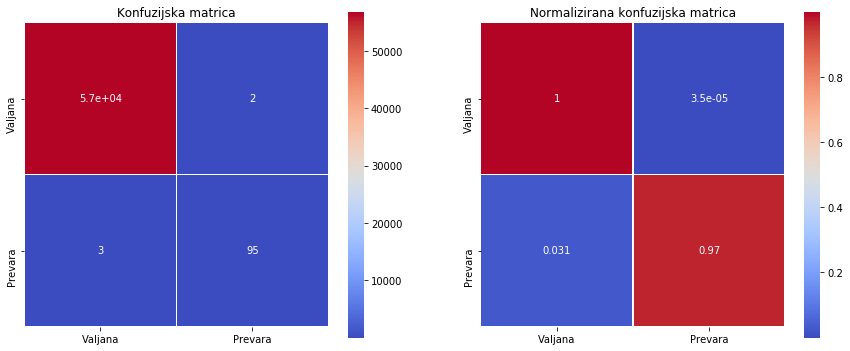

----------------------------------------------------------------------------------------------------


In [79]:
full_pred_border_smote_rf = border_smote_rf.predict(X_data_test)

print('-'*100)
print('Predikcija za originalni dataset:')
precision_recall_f1_scores(y_data_test, full_pred_border_smote_rf)
print()
print('-'*100)
print(classification_report(y_data_test, full_pred_border_smote_rf))
print()
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_data_test, full_pred_border_smote_rf), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)


In [76]:
#k-nearest neighbors


In [78]:
#na cijelom datasetu
knn_data = KNeighborsClassifier()
knn_data.fit(X_data_train, y_data_train)
knn_data_training_score = cross_val_score(knn_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za k (defaultno = 5) najbližih susjeda nad cijelim datasetom: " + 
      str(round(knn_data_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za k (defaultno = 5) najbližih susjeda nad cijelim datasetom: 99.94%


----------------------------------------------------------------------------------------------------
Za cijeli dataset:
	Precision score: 93.83%
	Recall score: 77.55%
	F1 score: 84.92%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


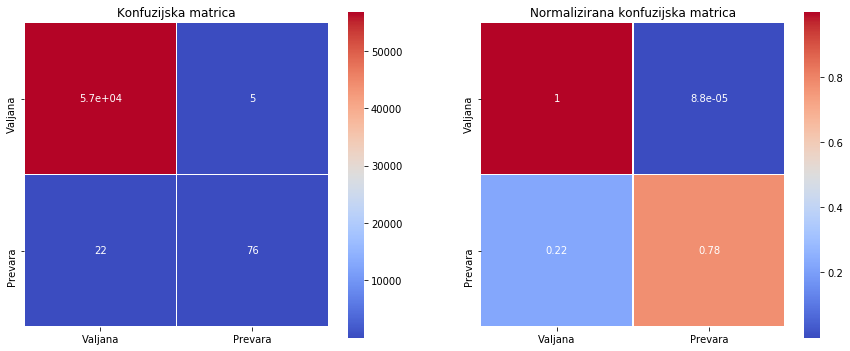

----------------------------------------------------------------------------------------------------


In [79]:
#cak je i ovo dugotrajno
knn_y_pred_data = knn_data.predict(X_data_test)

print('--'*50)
print('Za cijeli dataset:')
precision_recall_f1_scores(y_data_test, knn_y_pred_data)
print()
print('--'*50)
print(classification_report(y_data_test, knn_y_pred_data))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, knn_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [60]:
#usample
knn_usample = KNeighborsClassifier()
knn_usample.fit(X_usample_train, y_usample_train)
knn_training_score_usample = cross_val_score(knn_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za k (5) najbližih susjeda nad undersampliranim datasetom: " + 
      str(round(knn_training_score_usample.mean(), 4) * 100) + '%')

Rezultat treniranja za k (5) najbližih susjeda nad undersampliranim datasetom: 93.77%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 96.43%
	Recall score: 88.03999999999999%
	F1 score: 92.05%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       105
           1       0.96      0.88      0.92        92

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


----------------------------------------------------------------------------------------------------


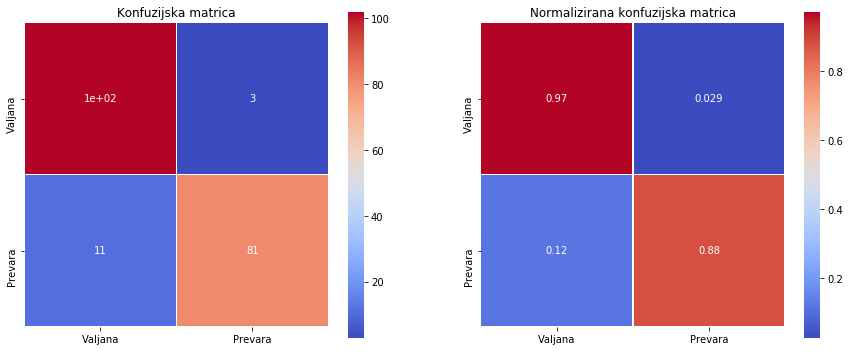

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962


----------------------------------------------------------------------------------------------------


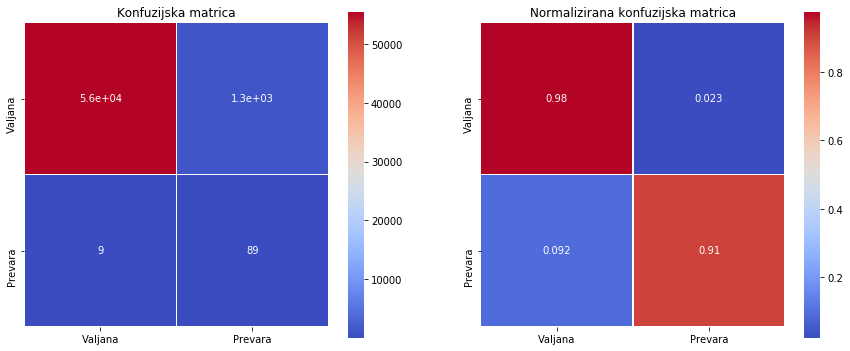

----------------------------------------------------------------------------------------------------


In [61]:
#nad usample test
knn_y_pred_usample = knn_usample.predict(X_usample_test)

knn_y_full_pred = knn_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, knn_y_pred_usample)
print()
print('--'*50)
print(classification_report(y_usample_test, knn_y_pred_usample))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, knn_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, knn_y_full_pred))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, knn_y_full_pred), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)




In [91]:
#s parametrima

num_neighbors_params = [1, 2, 3, 4, 5]
alg_params = ['auto', 'brute', 'ball_tree', 'kd_tree']
p_params = [1, 2]

knn_params = {'n_neighbors': num_neighbors_params, 'algorithm': alg_params, 'p': p_params, 'metric': ['minkowski']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_usample_train, y_usample_train)
knn_params_usample = grid_knn.best_estimator_
knn_params_best = grid_knn.best_params_
print('Najbolji parametri: ' + str(knn_params_best))

knn_training_score_params_usample = cross_val_score(knn_params_usample, X_usample_train, y_usample_train, cv=skfold)
print('Rezultat treniranja za k (' +  str(knn_params_best['n_neighbors']) + 
      ')  najbližih susjeda nad undersampliranim datasetom (sa parametrima): ' 
     + str(round(knn_training_score_params_usample.mean(), 4) * 100) + '%')


Najbolji parametri: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}
Rezultat treniranja za k (3)  najbližih susjeda nad undersampliranim datasetom (sa parametrima): 93.65%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 95.65%
	Recall score: 90.72%
	F1 score: 93.12%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.96      0.91      0.93        97

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197


----------------------------------------------------------------------------------------------------


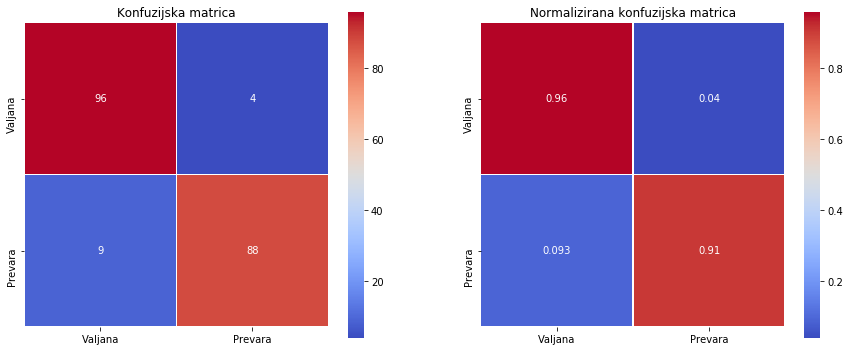

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


----------------------------------------------------------------------------------------------------


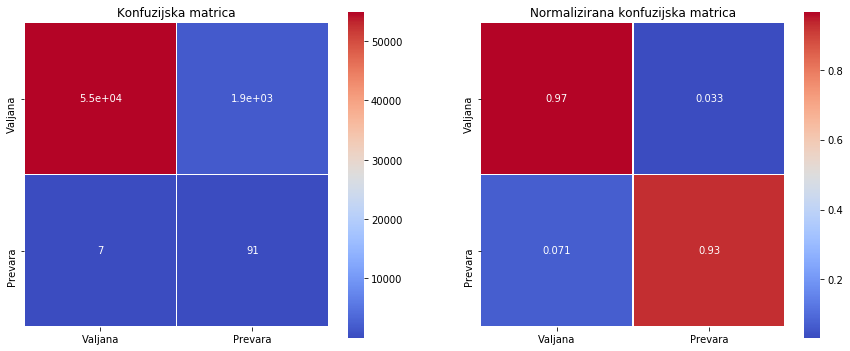

----------------------------------------------------------------------------------------------------


In [92]:
#testiranje
knn_y_pred_usample_params = knn_params_usample.predict(X_usample_test)

knn_y_full_pred_params = knn_params_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, knn_y_pred_usample_params)
print()
print('--'*50)
print(classification_report(y_usample_test, knn_y_pred_usample_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, knn_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, knn_y_full_pred_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, knn_y_full_pred_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [68]:
#bez outliera
grid_knn_cut = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn_cut.fit(X_usample_cut_train, y_usample_cut_train)
knn_params_usample_cut = grid_knn_cut.best_estimator_
knn_params_cut = grid_knn_cut.best_params_
print('Najbolji parametri: ' + str(knn_params_cut))

knn_training_score_params_usample_cut = cross_val_score(knn_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print('Rezultat treniranja za k (' + str(knn_params_cut['n_neighbors']) +
      ') nad undersampliranim datasetom (sa parametrima, bez outliera): ' 
     + str(round(knn_training_score_params_usample_cut.mean(), 4) * 100) + '%')

Najbolji parametri: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'p': 2}
Rezultat treniranja za k (2) nad undersampliranim datasetom (sa parametrima, bez outliera): 93.44%


--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima, bez outliera):
	Precision score: 100.0%
	Recall score: 87.33999999999999%
	F1 score: 93.24%
----------------------------------------------------------------------------------------------------


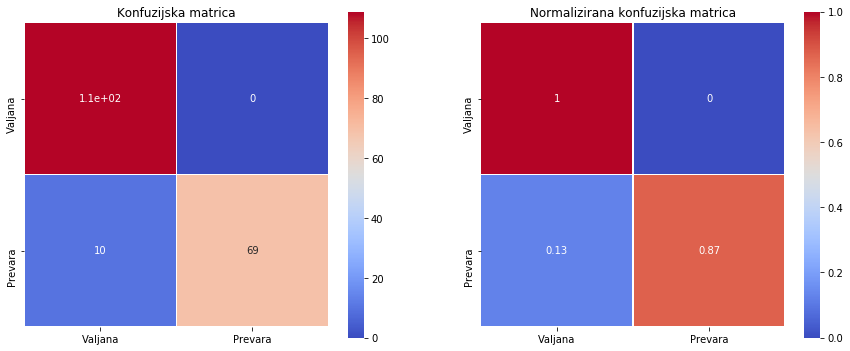

Za cijeli dataset:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.93      0.20        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.59     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


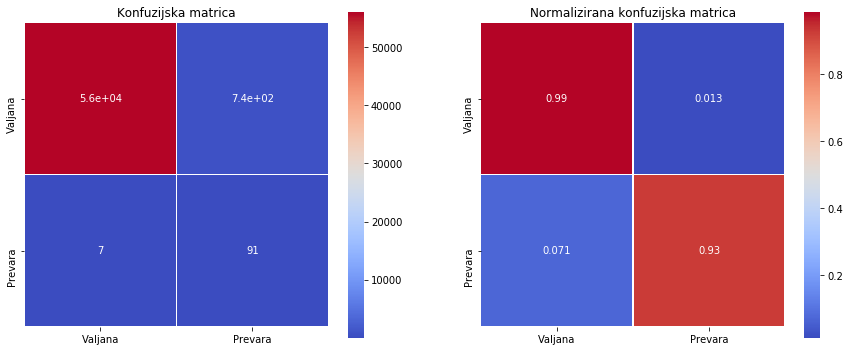

----------------------------------------------------------------------------------------------------


In [69]:
knn_y_pred_usample_params_cut = knn_params_usample_cut.predict(X_usample_cut_test)
knn_y_full_pred_params_cut = knn_params_usample_cut.predict(X_data_test)
print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima, bez outliera):')
precision_recall_f1_scores(y_usample_cut_test, knn_y_pred_usample_params_cut)
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, knn_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('Za cijeli dataset:')
print()
print('--'*50)
print(classification_report(y_data_test, knn_y_full_pred_params_cut))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, knn_y_full_pred_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [70]:
#SVC

In [88]:
#ovo je novi nivo sporosti
svc_data = SVC()
svc_data.fit(X_data_train, y_data_train)
svc_data_training_score = cross_val_score(svc_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za metodu potpornih vektora nad cijelim datasetom: " + 
      str(round(svc_data_training_score.mean(), 4) * 100) + '%')

Rezultat treniranja za metodu potpornih vektora nad cijelim datasetom: 99.94%


----------------------------------------------------------------------------------------------------
Za cijeli dataset:
	Precision score: 96.83%
	Recall score: 62.239999999999995%
	F1 score: 75.78%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962


----------------------------------------------------------------------------------------------------


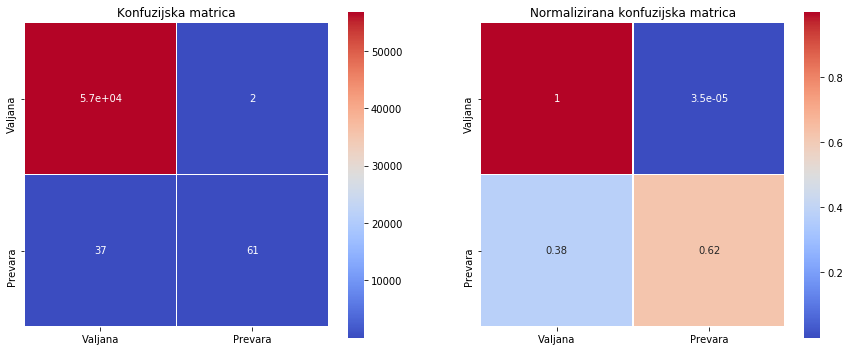

----------------------------------------------------------------------------------------------------


In [72]:

svc_y_pred_data = svc_data.predict(X_data_test)

print('--'*50)
print('Za cijeli dataset:')
precision_recall_f1_scores(y_data_test, svc_y_pred_data)
print()
print('--'*50)
print(classification_report(y_data_test, svc_y_pred_data))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, svc_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [62]:
#usample
svc_usample = SVC()
svc_usample.fit(X_usample_train, y_usample_train)
svc_training_score_usample = cross_val_score(svc_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom: " + 
      str(round(svc_training_score_usample.mean(), 4) * 100) + '%')

Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom: 92.75999999999999%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 97.75%
	Recall score: 88.78%
	F1 score: 93.05%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197


----------------------------------------------------------------------------------------------------


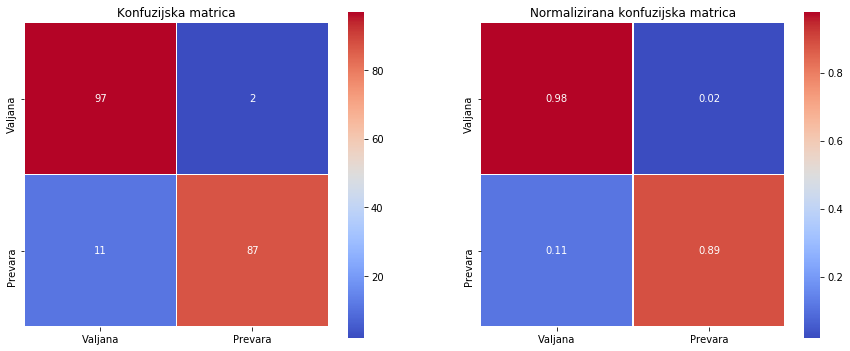

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.89      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.99      0.99     56962


----------------------------------------------------------------------------------------------------


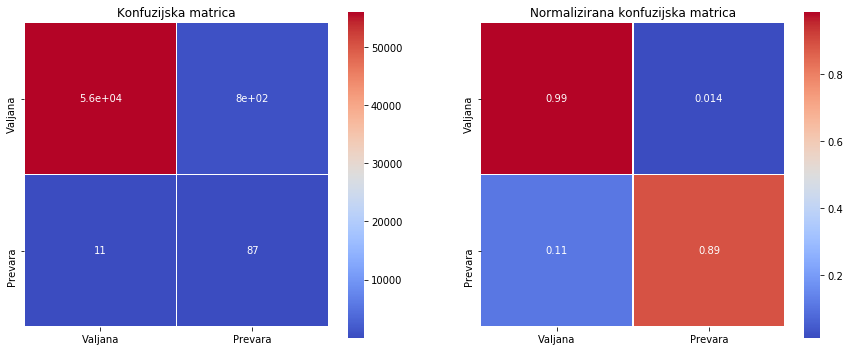

----------------------------------------------------------------------------------------------------


In [63]:
#nad usample test
svc_y_pred_usample = svc_usample.predict(X_usample_test)

svc_y_full_pred = svc_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, svc_y_pred_usample)
print()
print('--'*50)
print(classification_report(y_usample_test, svc_y_pred_usample))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, svc_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, svc_y_full_pred))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, svc_y_full_pred), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)




In [89]:
#s parametrima

svc_c_params = [0.2, 0.5, 0.75, 0.9, 1]
kernel_params = ['linear', 'poly', 'sigmoid', 'rbf']
degree_params = [1, 2, 3, 4, 5]
gamma_params = ['scale', 'auto']
coef0_params = [0, 0.5, 1]


svc_params = {'C': svc_c_params, 'kernel': kernel_params, 'degree': degree_params, 'gamma': gamma_params, 'coef0': coef0_params}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_usample_train, y_usample_train)
svc_params_usample = grid_svc.best_estimator_
svc_params_best = grid_svc.best_params_
print('Najbolji parametri: ' + str(svc_params_best))

svc_training_score_params_usample = cross_val_score(svc_params_usample, X_usample_train, y_usample_train, cv=skfold)
print('Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom (sa parametrima): ' 
     + str(round(svc_training_score_params_usample.mean(), 4) * 100) + '%')


Najbolji parametri: {'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom (sa parametrima): 93.26%


----------------------------------------------------------------------------------------------------
Testiranje na undersampliranom datasetu:
	Precision score: 94.74000000000001%
	Recall score: 92.78%
	F1 score: 93.75%

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.95      0.93      0.94        97

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


----------------------------------------------------------------------------------------------------


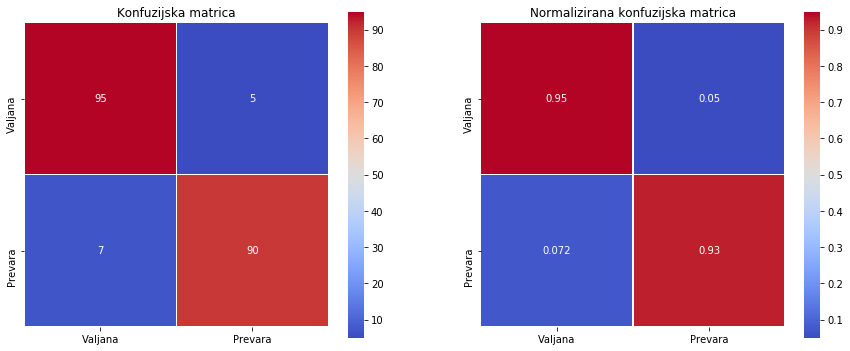

----------------------------------------------------------------------------------------------------
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Testiranje na cijelom datasetu:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.96      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.97      0.55     56962
weighted avg       1.00      0.97      0.98     56962


----------------------------------------------------------------------------------------------------


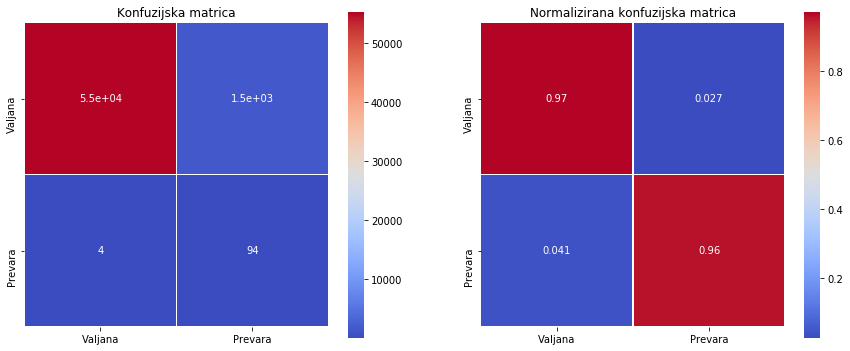

----------------------------------------------------------------------------------------------------


In [90]:
#testiranje
svc_y_pred_usample_params = svc_params_usample.predict(X_usample_test)

svc_y_full_pred_params = svc_params_usample.predict(X_data_test)
print('--'*50)
print('Testiranje na undersampliranom datasetu:')
precision_recall_f1_scores(y_usample_test, svc_y_pred_usample_params)
print()
print('--'*50)
print(classification_report(y_usample_test, svc_y_pred_usample_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_usample_test, svc_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('-'*100)
print('*'*100)
print('-'*100)
print('Testiranje na cijelom datasetu:')
print()
print('--'*50)
print(classification_report(y_data_test, svc_y_full_pred_params))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, svc_y_full_pred_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [73]:
#bez outliera
grid_svc_cut = GridSearchCV(SVC(), svc_params)
grid_svc_cut.fit(X_usample_cut_train, y_usample_cut_train)
svc_params_usample_cut = grid_svc_cut.best_estimator_
svc_params_cut = grid_svc_cut.best_params_
print('Najbolji parametri: ' + str(svc_params_cut))

svc_training_score_params_usample_cut = cross_val_score(svc_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print('Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom (sa parametrima, bez outliera): ' 
     + str(round(svc_training_score_params_usample_cut.mean(), 4) * 100) + '%')

Najbolji parametri: {'C': 0.75, 'coef0': 0.5, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
Rezultat treniranja za metodu potpornih vektora nad undersampliranim datasetom (sa parametrima, bez outliera): 93.17999999999999%


--------------------------------------------------
Za undersamplirani dataset (sa podešenim parametrima, bez outliera):
	Precision score: 94.12%
	Recall score: 84.21%
	F1 score: 88.89%
----------------------------------------------------------------------------------------------------


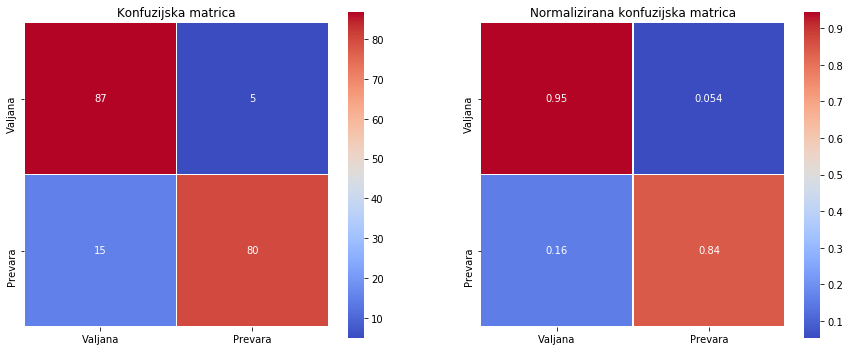

Za cijeli dataset:

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.94      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


----------------------------------------------------------------------------------------------------


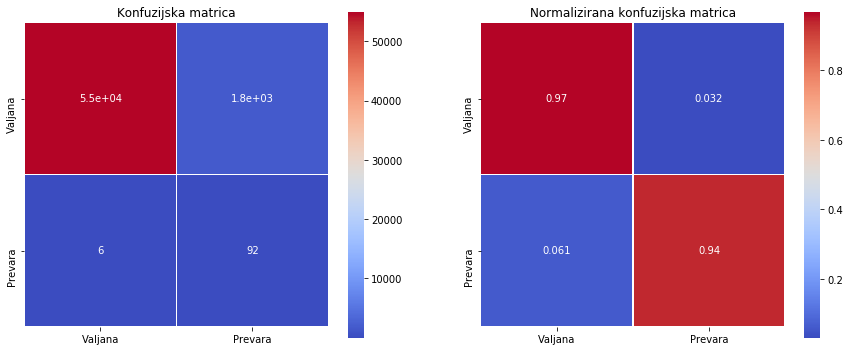

----------------------------------------------------------------------------------------------------


In [74]:
svc_y_pred_usample_params_cut = svc_params_usample_cut.predict(X_usample_cut_test)
svc_y_full_pred_params_cut = svc_params_usample_cut.predict(X_data_test)
print('-'*50)
print('Za undersamplirani dataset (sa podešenim parametrima, bez outliera):')
precision_recall_f1_scores(y_usample_cut_test, svc_y_pred_usample_params_cut)
print('-'*100)
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, svc_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('Za cijeli dataset:')
print()
print('--'*50)
print(classification_report(y_data_test, svc_y_full_pred_params_cut))
print()
print('--'*50)
plot_confusion_matrix(confusion_matrix(y_data_test, svc_y_full_pred_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('-'*100)

In [75]:
#boosting algoritmi



In [60]:
#dalje boosting
#mozemo dodati usporedbe brzina
#mozda dodati i neku optimizaciju
#roc, pr za ostale osim log reg

#voting classifier (nakon boostinga)

In [61]:
print("XGB (eXtreme Gradient Boosting)")
xgb_data = XGBClassifier()
xgb_data.fit(X_data_train, y_data_train)
xgb_data_training_score = cross_val_score(xgb_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za XGB (extreme gradient boosting) nad cijelim datasetom: " + 
       str(round(xgb_data_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("LGBM (Light Gradient Boosting Method)")
lgbm_data = LGBMClassifier()
lgbm_data.fit(X_data_train, y_data_train)
lgbm_data_training_score = cross_val_score(lgbm_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za LGBM (light gradient boosting) nad cijelim datasetom: " + 
       str(round(lgbm_data_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("CatBoost (CATegorical Boosting)")
cat_data = CatBoostClassifier(silent=True)
cat_data.fit(X_data_train, y_data_train)
cat_data_training_score = cross_val_score(cat_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za CatBoost (categorical boosting) nad cijelim datasetom: " + 
       str(round(cat_data_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("AdaBoost (ADAptive Boosting)")
ada_data = AdaBoostClassifier()
ada_data.fit(X_data_train, y_data_train)
ada_data_training_score = cross_val_score(ada_data, X_data_train, y_data_train, cv=skfold)
print("Rezultat treniranja za AdaBoost (adaptive boosting) nad cijelim datasetom: " + 
       str(round(ada_data_training_score.mean(), 4) * 100) + '%')

XGB (eXtreme Gradient Boosting)
Rezultat treniranja za XGB (extreme gradient boosting) nad cijelim datasetom: 99.95%
----------------------------------------------------------------------------------------------------
LGBM (Light Gradient Boosting Method)
Rezultat treniranja za LGBM (light gradient boosting) nad cijelim datasetom: 99.53%
----------------------------------------------------------------------------------------------------
CatBoost (CATegorical Boosting)
Learning rate set to 0.104628
0:	learn: 0.3515824	total: 358ms	remaining: 5m 57s
1:	learn: 0.1781148	total: 471ms	remaining: 3m 54s
2:	learn: 0.0962502	total: 581ms	remaining: 3m 13s
3:	learn: 0.0528645	total: 697ms	remaining: 2m 53s
4:	learn: 0.0312433	total: 806ms	remaining: 2m 40s
5:	learn: 0.0196989	total: 908ms	remaining: 2m 30s
6:	learn: 0.0134274	total: 1.03s	remaining: 2m 26s
7:	learn: 0.0097089	total: 1.14s	remaining: 2m 20s
8:	learn: 0.0074989	total: 1.24s	remaining: 2m 16s
9:	learn: 0.0060087	total: 1.36s	remai

150:	learn: 0.0012406	total: 14.4s	remaining: 1m 21s
151:	learn: 0.0012334	total: 14.5s	remaining: 1m 20s
152:	learn: 0.0012313	total: 14.6s	remaining: 1m 20s
153:	learn: 0.0012304	total: 14.7s	remaining: 1m 20s
154:	learn: 0.0012284	total: 14.7s	remaining: 1m 20s
155:	learn: 0.0012266	total: 14.8s	remaining: 1m 20s
156:	learn: 0.0012243	total: 14.9s	remaining: 1m 20s
157:	learn: 0.0012231	total: 15s	remaining: 1m 19s
158:	learn: 0.0012207	total: 15.1s	remaining: 1m 19s
159:	learn: 0.0012179	total: 15.2s	remaining: 1m 19s
160:	learn: 0.0012110	total: 15.2s	remaining: 1m 19s
161:	learn: 0.0012050	total: 15.3s	remaining: 1m 19s
162:	learn: 0.0012002	total: 15.4s	remaining: 1m 19s
163:	learn: 0.0011974	total: 15.5s	remaining: 1m 19s
164:	learn: 0.0011921	total: 15.6s	remaining: 1m 18s
165:	learn: 0.0011860	total: 15.7s	remaining: 1m 18s
166:	learn: 0.0011844	total: 15.7s	remaining: 1m 18s
167:	learn: 0.0011826	total: 15.8s	remaining: 1m 18s
168:	learn: 0.0011810	total: 15.9s	remaining: 1m

308:	learn: 0.0007819	total: 27.9s	remaining: 1m 2s
309:	learn: 0.0007805	total: 28s	remaining: 1m 2s
310:	learn: 0.0007791	total: 28.1s	remaining: 1m 2s
311:	learn: 0.0007786	total: 28.2s	remaining: 1m 2s
312:	learn: 0.0007745	total: 28.3s	remaining: 1m 2s
313:	learn: 0.0007727	total: 28.4s	remaining: 1m 1s
314:	learn: 0.0007698	total: 28.5s	remaining: 1m 1s
315:	learn: 0.0007667	total: 28.6s	remaining: 1m 1s
316:	learn: 0.0007636	total: 28.6s	remaining: 1m 1s
317:	learn: 0.0007623	total: 28.7s	remaining: 1m 1s
318:	learn: 0.0007610	total: 28.8s	remaining: 1m 1s
319:	learn: 0.0007554	total: 28.9s	remaining: 1m 1s
320:	learn: 0.0007535	total: 29s	remaining: 1m 1s
321:	learn: 0.0007527	total: 29.1s	remaining: 1m 1s
322:	learn: 0.0007494	total: 29.1s	remaining: 1m 1s
323:	learn: 0.0007485	total: 29.2s	remaining: 1m
324:	learn: 0.0007452	total: 29.3s	remaining: 1m
325:	learn: 0.0007438	total: 29.4s	remaining: 1m
326:	learn: 0.0007409	total: 29.4s	remaining: 1m
327:	learn: 0.0007392	total:

470:	learn: 0.0004568	total: 41.5s	remaining: 46.6s
471:	learn: 0.0004564	total: 41.6s	remaining: 46.5s
472:	learn: 0.0004514	total: 41.7s	remaining: 46.5s
473:	learn: 0.0004509	total: 41.8s	remaining: 46.4s
474:	learn: 0.0004499	total: 41.9s	remaining: 46.3s
475:	learn: 0.0004470	total: 42s	remaining: 46.2s
476:	learn: 0.0004427	total: 42.1s	remaining: 46.1s
477:	learn: 0.0004419	total: 42.2s	remaining: 46s
478:	learn: 0.0004415	total: 42.2s	remaining: 45.9s
479:	learn: 0.0004410	total: 42.3s	remaining: 45.8s
480:	learn: 0.0004406	total: 42.4s	remaining: 45.7s
481:	learn: 0.0004400	total: 42.5s	remaining: 45.6s
482:	learn: 0.0004373	total: 42.6s	remaining: 45.6s
483:	learn: 0.0004370	total: 42.6s	remaining: 45.5s
484:	learn: 0.0004363	total: 42.7s	remaining: 45.4s
485:	learn: 0.0004328	total: 42.8s	remaining: 45.3s
486:	learn: 0.0004305	total: 42.9s	remaining: 45.2s
487:	learn: 0.0004301	total: 43s	remaining: 45.1s
488:	learn: 0.0004294	total: 43s	remaining: 45s
489:	learn: 0.0004283	

630:	learn: 0.0002601	total: 54.9s	remaining: 32.1s
631:	learn: 0.0002599	total: 54.9s	remaining: 32s
632:	learn: 0.0002579	total: 55s	remaining: 31.9s
633:	learn: 0.0002577	total: 55.1s	remaining: 31.8s
634:	learn: 0.0002573	total: 55.2s	remaining: 31.7s
635:	learn: 0.0002572	total: 55.3s	remaining: 31.6s
636:	learn: 0.0002567	total: 55.4s	remaining: 31.6s
637:	learn: 0.0002556	total: 55.5s	remaining: 31.5s
638:	learn: 0.0002550	total: 55.5s	remaining: 31.4s
639:	learn: 0.0002545	total: 55.6s	remaining: 31.3s
640:	learn: 0.0002543	total: 55.7s	remaining: 31.2s
641:	learn: 0.0002529	total: 55.8s	remaining: 31.1s
642:	learn: 0.0002524	total: 55.9s	remaining: 31.1s
643:	learn: 0.0002522	total: 56s	remaining: 31s
644:	learn: 0.0002519	total: 56.1s	remaining: 30.9s
645:	learn: 0.0002518	total: 56.2s	remaining: 30.8s
646:	learn: 0.0002514	total: 56.3s	remaining: 30.7s
647:	learn: 0.0002511	total: 56.4s	remaining: 30.6s
648:	learn: 0.0002510	total: 56.5s	remaining: 30.5s
649:	learn: 0.000250

791:	learn: 0.0001729	total: 1m 8s	remaining: 18s
792:	learn: 0.0001726	total: 1m 8s	remaining: 17.9s
793:	learn: 0.0001723	total: 1m 8s	remaining: 17.8s
794:	learn: 0.0001716	total: 1m 8s	remaining: 17.7s
795:	learn: 0.0001714	total: 1m 8s	remaining: 17.6s
796:	learn: 0.0001709	total: 1m 8s	remaining: 17.5s
797:	learn: 0.0001708	total: 1m 8s	remaining: 17.4s
798:	learn: 0.0001697	total: 1m 8s	remaining: 17.4s
799:	learn: 0.0001694	total: 1m 9s	remaining: 17.3s
800:	learn: 0.0001692	total: 1m 9s	remaining: 17.2s
801:	learn: 0.0001690	total: 1m 9s	remaining: 17.1s
802:	learn: 0.0001686	total: 1m 9s	remaining: 17s
803:	learn: 0.0001685	total: 1m 9s	remaining: 16.9s
804:	learn: 0.0001676	total: 1m 9s	remaining: 16.8s
805:	learn: 0.0001674	total: 1m 9s	remaining: 16.7s
806:	learn: 0.0001670	total: 1m 9s	remaining: 16.7s
807:	learn: 0.0001668	total: 1m 9s	remaining: 16.6s
808:	learn: 0.0001665	total: 1m 9s	remaining: 16.5s
809:	learn: 0.0001664	total: 1m 9s	remaining: 16.4s
810:	learn: 0.00

948:	learn: 0.0001261	total: 1m 21s	remaining: 4.38s
949:	learn: 0.0001260	total: 1m 21s	remaining: 4.29s
950:	learn: 0.0001259	total: 1m 21s	remaining: 4.2s
951:	learn: 0.0001258	total: 1m 21s	remaining: 4.12s
952:	learn: 0.0001257	total: 1m 21s	remaining: 4.03s
953:	learn: 0.0001257	total: 1m 21s	remaining: 3.94s
954:	learn: 0.0001245	total: 1m 21s	remaining: 3.86s
955:	learn: 0.0001237	total: 1m 21s	remaining: 3.77s
956:	learn: 0.0001236	total: 1m 22s	remaining: 3.69s
957:	learn: 0.0001236	total: 1m 22s	remaining: 3.6s
958:	learn: 0.0001235	total: 1m 22s	remaining: 3.52s
959:	learn: 0.0001234	total: 1m 22s	remaining: 3.43s
960:	learn: 0.0001233	total: 1m 22s	remaining: 3.34s
961:	learn: 0.0001231	total: 1m 22s	remaining: 3.26s
962:	learn: 0.0001218	total: 1m 22s	remaining: 3.17s
963:	learn: 0.0001218	total: 1m 22s	remaining: 3.08s
964:	learn: 0.0001216	total: 1m 22s	remaining: 3s
965:	learn: 0.0001216	total: 1m 22s	remaining: 2.91s
966:	learn: 0.0001215	total: 1m 22s	remaining: 2.83

107:	learn: 0.0016529	total: 7.74s	remaining: 1m 3s
108:	learn: 0.0016455	total: 7.82s	remaining: 1m 3s
109:	learn: 0.0016423	total: 7.89s	remaining: 1m 3s
110:	learn: 0.0016342	total: 7.95s	remaining: 1m 3s
111:	learn: 0.0016275	total: 8.02s	remaining: 1m 3s
112:	learn: 0.0016211	total: 8.09s	remaining: 1m 3s
113:	learn: 0.0016182	total: 8.16s	remaining: 1m 3s
114:	learn: 0.0016131	total: 8.24s	remaining: 1m 3s
115:	learn: 0.0016023	total: 8.31s	remaining: 1m 3s
116:	learn: 0.0016009	total: 8.37s	remaining: 1m 3s
117:	learn: 0.0015954	total: 8.45s	remaining: 1m 3s
118:	learn: 0.0015900	total: 8.51s	remaining: 1m 3s
119:	learn: 0.0015820	total: 8.57s	remaining: 1m 2s
120:	learn: 0.0015775	total: 8.63s	remaining: 1m 2s
121:	learn: 0.0015749	total: 8.72s	remaining: 1m 2s
122:	learn: 0.0015672	total: 8.78s	remaining: 1m 2s
123:	learn: 0.0015595	total: 8.84s	remaining: 1m 2s
124:	learn: 0.0015556	total: 8.93s	remaining: 1m 2s
125:	learn: 0.0015497	total: 8.99s	remaining: 1m 2s
126:	learn: 

269:	learn: 0.0009833	total: 19.4s	remaining: 52.4s
270:	learn: 0.0009766	total: 19.5s	remaining: 52.3s
271:	learn: 0.0009748	total: 19.5s	remaining: 52.3s
272:	learn: 0.0009709	total: 19.6s	remaining: 52.2s
273:	learn: 0.0009691	total: 19.7s	remaining: 52.1s
274:	learn: 0.0009671	total: 19.8s	remaining: 52.1s
275:	learn: 0.0009653	total: 19.8s	remaining: 52s
276:	learn: 0.0009637	total: 19.9s	remaining: 51.9s
277:	learn: 0.0009620	total: 20s	remaining: 51.9s
278:	learn: 0.0009605	total: 20s	remaining: 51.8s
279:	learn: 0.0009590	total: 20.1s	remaining: 51.7s
280:	learn: 0.0009576	total: 20.2s	remaining: 51.6s
281:	learn: 0.0009570	total: 20.2s	remaining: 51.5s
282:	learn: 0.0009536	total: 20.3s	remaining: 51.5s
283:	learn: 0.0009510	total: 20.4s	remaining: 51.4s
284:	learn: 0.0009454	total: 20.5s	remaining: 51.3s
285:	learn: 0.0009437	total: 20.5s	remaining: 51.2s
286:	learn: 0.0009424	total: 20.6s	remaining: 51.1s
287:	learn: 0.0009320	total: 20.7s	remaining: 51.1s
288:	learn: 0.0009

428:	learn: 0.0006220	total: 30.8s	remaining: 41s
429:	learn: 0.0006200	total: 30.9s	remaining: 40.9s
430:	learn: 0.0006180	total: 30.9s	remaining: 40.9s
431:	learn: 0.0006172	total: 31s	remaining: 40.8s
432:	learn: 0.0006152	total: 31.1s	remaining: 40.7s
433:	learn: 0.0006132	total: 31.1s	remaining: 40.6s
434:	learn: 0.0006102	total: 31.2s	remaining: 40.5s
435:	learn: 0.0006089	total: 31.3s	remaining: 40.5s
436:	learn: 0.0006066	total: 31.4s	remaining: 40.4s
437:	learn: 0.0006062	total: 31.4s	remaining: 40.3s
438:	learn: 0.0006046	total: 31.5s	remaining: 40.3s
439:	learn: 0.0006010	total: 31.6s	remaining: 40.2s
440:	learn: 0.0005993	total: 31.6s	remaining: 40.1s
441:	learn: 0.0005921	total: 31.7s	remaining: 40s
442:	learn: 0.0005915	total: 31.8s	remaining: 39.9s
443:	learn: 0.0005895	total: 31.9s	remaining: 39.9s
444:	learn: 0.0005871	total: 31.9s	remaining: 39.8s
445:	learn: 0.0005847	total: 32s	remaining: 39.7s
446:	learn: 0.0005801	total: 32.1s	remaining: 39.7s
447:	learn: 0.000575

587:	learn: 0.0003672	total: 42.7s	remaining: 29.9s
588:	learn: 0.0003651	total: 42.8s	remaining: 29.9s
589:	learn: 0.0003618	total: 42.9s	remaining: 29.8s
590:	learn: 0.0003612	total: 43s	remaining: 29.8s
591:	learn: 0.0003590	total: 43.1s	remaining: 29.7s
592:	learn: 0.0003582	total: 43.2s	remaining: 29.6s
593:	learn: 0.0003563	total: 43.2s	remaining: 29.6s
594:	learn: 0.0003524	total: 43.3s	remaining: 29.5s
595:	learn: 0.0003517	total: 43.4s	remaining: 29.4s
596:	learn: 0.0003491	total: 43.5s	remaining: 29.4s
597:	learn: 0.0003484	total: 43.6s	remaining: 29.3s
598:	learn: 0.0003471	total: 43.7s	remaining: 29.2s
599:	learn: 0.0003443	total: 43.7s	remaining: 29.2s
600:	learn: 0.0003431	total: 43.8s	remaining: 29.1s
601:	learn: 0.0003406	total: 43.9s	remaining: 29s
602:	learn: 0.0003402	total: 44s	remaining: 29s
603:	learn: 0.0003394	total: 44.1s	remaining: 28.9s
604:	learn: 0.0003382	total: 44.2s	remaining: 28.9s
605:	learn: 0.0003374	total: 44.3s	remaining: 28.8s
606:	learn: 0.000337

746:	learn: 0.0002111	total: 59s	remaining: 20s
747:	learn: 0.0002104	total: 59.1s	remaining: 19.9s
748:	learn: 0.0002103	total: 59.2s	remaining: 19.8s
749:	learn: 0.0002096	total: 59.3s	remaining: 19.8s
750:	learn: 0.0002092	total: 59.4s	remaining: 19.7s
751:	learn: 0.0002080	total: 59.5s	remaining: 19.6s
752:	learn: 0.0002069	total: 59.6s	remaining: 19.6s
753:	learn: 0.0002063	total: 59.7s	remaining: 19.5s
754:	learn: 0.0002046	total: 59.8s	remaining: 19.4s
755:	learn: 0.0002037	total: 59.8s	remaining: 19.3s
756:	learn: 0.0002032	total: 59.9s	remaining: 19.2s
757:	learn: 0.0002030	total: 60s	remaining: 19.2s
758:	learn: 0.0002030	total: 1m	remaining: 19.1s
759:	learn: 0.0002022	total: 1m	remaining: 19s
760:	learn: 0.0002014	total: 1m	remaining: 18.9s
761:	learn: 0.0002010	total: 1m	remaining: 18.8s
762:	learn: 0.0002001	total: 1m	remaining: 18.8s
763:	learn: 0.0001991	total: 1m	remaining: 18.7s
764:	learn: 0.0001978	total: 1m	remaining: 18.6s
765:	learn: 0.0001976	total: 1m	remaining

906:	learn: 0.0001465	total: 1m 14s	remaining: 7.61s
907:	learn: 0.0001462	total: 1m 14s	remaining: 7.53s
908:	learn: 0.0001461	total: 1m 14s	remaining: 7.45s
909:	learn: 0.0001458	total: 1m 14s	remaining: 7.37s
910:	learn: 0.0001453	total: 1m 14s	remaining: 7.29s
911:	learn: 0.0001449	total: 1m 14s	remaining: 7.21s
912:	learn: 0.0001443	total: 1m 14s	remaining: 7.13s
913:	learn: 0.0001442	total: 1m 14s	remaining: 7.05s
914:	learn: 0.0001441	total: 1m 14s	remaining: 6.97s
915:	learn: 0.0001438	total: 1m 15s	remaining: 6.89s
916:	learn: 0.0001437	total: 1m 15s	remaining: 6.81s
917:	learn: 0.0001433	total: 1m 15s	remaining: 6.73s
918:	learn: 0.0001430	total: 1m 15s	remaining: 6.65s
919:	learn: 0.0001427	total: 1m 15s	remaining: 6.57s
920:	learn: 0.0001427	total: 1m 15s	remaining: 6.48s
921:	learn: 0.0001424	total: 1m 15s	remaining: 6.4s
922:	learn: 0.0001423	total: 1m 15s	remaining: 6.32s
923:	learn: 0.0001419	total: 1m 15s	remaining: 6.24s
924:	learn: 0.0001413	total: 1m 15s	remaining: 

63:	learn: 0.0019339	total: 4.83s	remaining: 1m 10s
64:	learn: 0.0019279	total: 4.91s	remaining: 1m 10s
65:	learn: 0.0019105	total: 4.98s	remaining: 1m 10s
66:	learn: 0.0018990	total: 5.05s	remaining: 1m 10s
67:	learn: 0.0018887	total: 5.14s	remaining: 1m 10s
68:	learn: 0.0018795	total: 5.21s	remaining: 1m 10s
69:	learn: 0.0018699	total: 5.29s	remaining: 1m 10s
70:	learn: 0.0018620	total: 5.37s	remaining: 1m 10s
71:	learn: 0.0018546	total: 5.44s	remaining: 1m 10s
72:	learn: 0.0018491	total: 5.51s	remaining: 1m 10s
73:	learn: 0.0018393	total: 5.6s	remaining: 1m 10s
74:	learn: 0.0018233	total: 5.68s	remaining: 1m 10s
75:	learn: 0.0018152	total: 5.76s	remaining: 1m 10s
76:	learn: 0.0018079	total: 5.85s	remaining: 1m 10s
77:	learn: 0.0017941	total: 5.92s	remaining: 1m 9s
78:	learn: 0.0017867	total: 5.99s	remaining: 1m 9s
79:	learn: 0.0017737	total: 6.07s	remaining: 1m 9s
80:	learn: 0.0017641	total: 6.14s	remaining: 1m 9s
81:	learn: 0.0017539	total: 6.23s	remaining: 1m 9s
82:	learn: 0.00174

223:	learn: 0.0010297	total: 17.5s	remaining: 1m
224:	learn: 0.0010283	total: 17.6s	remaining: 1m
225:	learn: 0.0010277	total: 17.7s	remaining: 1m
226:	learn: 0.0010258	total: 17.7s	remaining: 1m
227:	learn: 0.0010241	total: 17.8s	remaining: 1m
228:	learn: 0.0010222	total: 17.9s	remaining: 1m
229:	learn: 0.0010199	total: 18s	remaining: 1m
230:	learn: 0.0010182	total: 18.1s	remaining: 1m
231:	learn: 0.0010145	total: 18.1s	remaining: 60s
232:	learn: 0.0010119	total: 18.2s	remaining: 59.9s
233:	learn: 0.0010068	total: 18.3s	remaining: 59.8s
234:	learn: 0.0010030	total: 18.3s	remaining: 59.7s
235:	learn: 0.0010006	total: 18.4s	remaining: 59.6s
236:	learn: 0.0009994	total: 18.5s	remaining: 59.6s
237:	learn: 0.0009981	total: 18.6s	remaining: 59.4s
238:	learn: 0.0009909	total: 18.6s	remaining: 59.4s
239:	learn: 0.0009894	total: 18.7s	remaining: 59.3s
240:	learn: 0.0009875	total: 18.8s	remaining: 59.2s
241:	learn: 0.0009848	total: 18.9s	remaining: 59.1s
242:	learn: 0.0009834	total: 19s	remaini

385:	learn: 0.0006295	total: 31.1s	remaining: 49.5s
386:	learn: 0.0006265	total: 31.2s	remaining: 49.4s
387:	learn: 0.0006246	total: 31.3s	remaining: 49.3s
388:	learn: 0.0006235	total: 31.3s	remaining: 49.2s
389:	learn: 0.0006191	total: 31.4s	remaining: 49.1s
390:	learn: 0.0006180	total: 31.5s	remaining: 49s
391:	learn: 0.0006175	total: 31.5s	remaining: 48.9s
392:	learn: 0.0006146	total: 31.6s	remaining: 48.9s
393:	learn: 0.0006096	total: 31.7s	remaining: 48.7s
394:	learn: 0.0006071	total: 31.8s	remaining: 48.6s
395:	learn: 0.0006068	total: 31.8s	remaining: 48.6s
396:	learn: 0.0006042	total: 31.9s	remaining: 48.5s
397:	learn: 0.0006016	total: 32s	remaining: 48.4s
398:	learn: 0.0005977	total: 32.1s	remaining: 48.3s
399:	learn: 0.0005950	total: 32.1s	remaining: 48.2s
400:	learn: 0.0005913	total: 32.2s	remaining: 48.1s
401:	learn: 0.0005875	total: 32.3s	remaining: 48s
402:	learn: 0.0005854	total: 32.3s	remaining: 47.9s
403:	learn: 0.0005819	total: 32.4s	remaining: 47.8s
404:	learn: 0.0005

544:	learn: 0.0003488	total: 44.1s	remaining: 36.8s
545:	learn: 0.0003487	total: 44.2s	remaining: 36.7s
546:	learn: 0.0003467	total: 44.3s	remaining: 36.7s
547:	learn: 0.0003464	total: 44.4s	remaining: 36.6s
548:	learn: 0.0003452	total: 44.5s	remaining: 36.5s
549:	learn: 0.0003426	total: 44.6s	remaining: 36.5s
550:	learn: 0.0003413	total: 44.7s	remaining: 36.4s
551:	learn: 0.0003395	total: 44.8s	remaining: 36.3s
552:	learn: 0.0003384	total: 44.8s	remaining: 36.2s
553:	learn: 0.0003371	total: 44.9s	remaining: 36.2s
554:	learn: 0.0003362	total: 45s	remaining: 36.1s
555:	learn: 0.0003343	total: 45.1s	remaining: 36s
556:	learn: 0.0003287	total: 45.2s	remaining: 36s
557:	learn: 0.0003279	total: 45.3s	remaining: 35.9s
558:	learn: 0.0003246	total: 45.4s	remaining: 35.8s
559:	learn: 0.0003209	total: 45.5s	remaining: 35.7s
560:	learn: 0.0003192	total: 45.5s	remaining: 35.6s
561:	learn: 0.0003185	total: 45.6s	remaining: 35.6s
562:	learn: 0.0003172	total: 45.7s	remaining: 35.5s
563:	learn: 0.0003

705:	learn: 0.0002054	total: 59.6s	remaining: 24.8s
706:	learn: 0.0002035	total: 59.7s	remaining: 24.7s
707:	learn: 0.0002033	total: 59.8s	remaining: 24.7s
708:	learn: 0.0002027	total: 59.9s	remaining: 24.6s
709:	learn: 0.0002021	total: 59.9s	remaining: 24.5s
710:	learn: 0.0002010	total: 60s	remaining: 24.4s
711:	learn: 0.0002009	total: 1m	remaining: 24.3s
712:	learn: 0.0002006	total: 1m	remaining: 24.2s
713:	learn: 0.0002001	total: 1m	remaining: 24.1s
714:	learn: 0.0001982	total: 1m	remaining: 24s
715:	learn: 0.0001978	total: 1m	remaining: 23.9s
716:	learn: 0.0001969	total: 1m	remaining: 23.8s
717:	learn: 0.0001968	total: 1m	remaining: 23.8s
718:	learn: 0.0001963	total: 1m	remaining: 23.7s
719:	learn: 0.0001958	total: 1m	remaining: 23.6s
720:	learn: 0.0001957	total: 1m	remaining: 23.5s
721:	learn: 0.0001946	total: 1m	remaining: 23.4s
722:	learn: 0.0001943	total: 1m	remaining: 23.3s
723:	learn: 0.0001940	total: 1m	remaining: 23.2s
724:	learn: 0.0001930	total: 1m	remaining: 23.1s
725:	l

864:	learn: 0.0001452	total: 1m 11s	remaining: 11.1s
865:	learn: 0.0001452	total: 1m 11s	remaining: 11.1s
866:	learn: 0.0001452	total: 1m 11s	remaining: 11s
867:	learn: 0.0001444	total: 1m 11s	remaining: 10.9s
868:	learn: 0.0001444	total: 1m 11s	remaining: 10.8s
869:	learn: 0.0001444	total: 1m 11s	remaining: 10.7s
870:	learn: 0.0001444	total: 1m 11s	remaining: 10.6s
871:	learn: 0.0001443	total: 1m 11s	remaining: 10.5s
872:	learn: 0.0001443	total: 1m 11s	remaining: 10.5s
873:	learn: 0.0001443	total: 1m 11s	remaining: 10.4s
874:	learn: 0.0001440	total: 1m 12s	remaining: 10.3s
875:	learn: 0.0001440	total: 1m 12s	remaining: 10.2s
876:	learn: 0.0001440	total: 1m 12s	remaining: 10.1s
877:	learn: 0.0001440	total: 1m 12s	remaining: 10s
878:	learn: 0.0001440	total: 1m 12s	remaining: 9.95s
879:	learn: 0.0001440	total: 1m 12s	remaining: 9.86s
880:	learn: 0.0001440	total: 1m 12s	remaining: 9.78s
881:	learn: 0.0001439	total: 1m 12s	remaining: 9.69s
882:	learn: 0.0001438	total: 1m 12s	remaining: 9.6

21:	learn: 0.0027798	total: 1.81s	remaining: 1m 20s
22:	learn: 0.0027403	total: 1.89s	remaining: 1m 20s
23:	learn: 0.0027019	total: 1.98s	remaining: 1m 20s
24:	learn: 0.0026724	total: 2.04s	remaining: 1m 19s
25:	learn: 0.0026229	total: 2.13s	remaining: 1m 19s
26:	learn: 0.0025889	total: 2.19s	remaining: 1m 18s
27:	learn: 0.0025512	total: 2.25s	remaining: 1m 18s
28:	learn: 0.0025301	total: 2.33s	remaining: 1m 17s
29:	learn: 0.0025184	total: 2.4s	remaining: 1m 17s
30:	learn: 0.0024863	total: 2.46s	remaining: 1m 17s
31:	learn: 0.0024748	total: 2.55s	remaining: 1m 17s
32:	learn: 0.0024535	total: 2.64s	remaining: 1m 17s
33:	learn: 0.0024419	total: 2.73s	remaining: 1m 17s
34:	learn: 0.0024287	total: 2.81s	remaining: 1m 17s
35:	learn: 0.0024026	total: 2.88s	remaining: 1m 17s
36:	learn: 0.0023787	total: 2.95s	remaining: 1m 16s
37:	learn: 0.0023662	total: 3.03s	remaining: 1m 16s
38:	learn: 0.0023540	total: 3.12s	remaining: 1m 16s
39:	learn: 0.0023444	total: 3.21s	remaining: 1m 17s
40:	learn: 0.

179:	learn: 0.0011585	total: 15.6s	remaining: 1m 11s
180:	learn: 0.0011492	total: 15.7s	remaining: 1m 11s
181:	learn: 0.0011442	total: 15.8s	remaining: 1m 10s
182:	learn: 0.0011426	total: 15.9s	remaining: 1m 10s
183:	learn: 0.0011397	total: 16s	remaining: 1m 10s
184:	learn: 0.0011355	total: 16.1s	remaining: 1m 10s
185:	learn: 0.0011329	total: 16.2s	remaining: 1m 10s
186:	learn: 0.0011312	total: 16.2s	remaining: 1m 10s
187:	learn: 0.0011297	total: 16.3s	remaining: 1m 10s
188:	learn: 0.0011206	total: 16.4s	remaining: 1m 10s
189:	learn: 0.0011188	total: 16.5s	remaining: 1m 10s
190:	learn: 0.0011150	total: 16.6s	remaining: 1m 10s
191:	learn: 0.0011136	total: 16.6s	remaining: 1m 9s
192:	learn: 0.0011119	total: 16.7s	remaining: 1m 9s
193:	learn: 0.0011101	total: 16.8s	remaining: 1m 9s
194:	learn: 0.0011067	total: 16.9s	remaining: 1m 9s
195:	learn: 0.0011047	total: 16.9s	remaining: 1m 9s
196:	learn: 0.0011033	total: 17s	remaining: 1m 9s
197:	learn: 0.0010977	total: 17.1s	remaining: 1m 9s
198:

338:	learn: 0.0006552	total: 28.8s	remaining: 56.2s
339:	learn: 0.0006526	total: 28.9s	remaining: 56.1s
340:	learn: 0.0006493	total: 29s	remaining: 56s
341:	learn: 0.0006472	total: 29.1s	remaining: 55.9s
342:	learn: 0.0006457	total: 29.1s	remaining: 55.8s
343:	learn: 0.0006447	total: 29.2s	remaining: 55.7s
344:	learn: 0.0006421	total: 29.3s	remaining: 55.6s
345:	learn: 0.0006401	total: 29.4s	remaining: 55.5s
346:	learn: 0.0006359	total: 29.4s	remaining: 55.4s
347:	learn: 0.0006341	total: 29.5s	remaining: 55.2s
348:	learn: 0.0006323	total: 29.6s	remaining: 55.2s
349:	learn: 0.0006305	total: 29.6s	remaining: 55s
350:	learn: 0.0006288	total: 29.7s	remaining: 54.9s
351:	learn: 0.0006269	total: 29.8s	remaining: 54.8s
352:	learn: 0.0006248	total: 29.9s	remaining: 54.7s
353:	learn: 0.0006237	total: 29.9s	remaining: 54.6s
354:	learn: 0.0006220	total: 30s	remaining: 54.5s
355:	learn: 0.0006207	total: 30.1s	remaining: 54.4s
356:	learn: 0.0006193	total: 30.2s	remaining: 54.3s
357:	learn: 0.000616

497:	learn: 0.0003953	total: 41.3s	remaining: 41.6s
498:	learn: 0.0003944	total: 41.4s	remaining: 41.6s
499:	learn: 0.0003934	total: 41.5s	remaining: 41.5s
500:	learn: 0.0003930	total: 41.6s	remaining: 41.5s
501:	learn: 0.0003909	total: 41.8s	remaining: 41.5s
502:	learn: 0.0003876	total: 41.9s	remaining: 41.4s
503:	learn: 0.0003857	total: 42s	remaining: 41.3s
504:	learn: 0.0003829	total: 42.1s	remaining: 41.2s
505:	learn: 0.0003807	total: 42.2s	remaining: 41.2s
506:	learn: 0.0003798	total: 42.2s	remaining: 41.1s
507:	learn: 0.0003780	total: 42.3s	remaining: 41s
508:	learn: 0.0003766	total: 42.4s	remaining: 40.9s
509:	learn: 0.0003748	total: 42.5s	remaining: 40.9s
510:	learn: 0.0003733	total: 42.6s	remaining: 40.8s
511:	learn: 0.0003721	total: 42.7s	remaining: 40.7s
512:	learn: 0.0003707	total: 42.9s	remaining: 40.7s
513:	learn: 0.0003701	total: 43s	remaining: 40.6s
514:	learn: 0.0003691	total: 43.1s	remaining: 40.6s
515:	learn: 0.0003683	total: 43.2s	remaining: 40.5s
516:	learn: 0.0003

657:	learn: 0.0002203	total: 57.6s	remaining: 29.9s
658:	learn: 0.0002202	total: 57.7s	remaining: 29.9s
659:	learn: 0.0002201	total: 57.8s	remaining: 29.8s
660:	learn: 0.0002200	total: 57.9s	remaining: 29.7s
661:	learn: 0.0002195	total: 58s	remaining: 29.6s
662:	learn: 0.0002191	total: 58s	remaining: 29.5s
663:	learn: 0.0002186	total: 58.1s	remaining: 29.4s
664:	learn: 0.0002185	total: 58.2s	remaining: 29.3s
665:	learn: 0.0002181	total: 58.3s	remaining: 29.2s
666:	learn: 0.0002176	total: 58.3s	remaining: 29.1s
667:	learn: 0.0002175	total: 58.4s	remaining: 29s
668:	learn: 0.0002171	total: 58.5s	remaining: 29s
669:	learn: 0.0002163	total: 58.6s	remaining: 28.9s
670:	learn: 0.0002159	total: 58.7s	remaining: 28.8s
671:	learn: 0.0002158	total: 58.8s	remaining: 28.7s
672:	learn: 0.0002148	total: 58.9s	remaining: 28.6s
673:	learn: 0.0002143	total: 58.9s	remaining: 28.5s
674:	learn: 0.0002140	total: 59s	remaining: 28.4s
675:	learn: 0.0002138	total: 59.1s	remaining: 28.3s
676:	learn: 0.0002135	

816:	learn: 0.0001534	total: 1m 9s	remaining: 15.6s
817:	learn: 0.0001532	total: 1m 9s	remaining: 15.5s
818:	learn: 0.0001529	total: 1m 9s	remaining: 15.4s
819:	learn: 0.0001528	total: 1m 9s	remaining: 15.4s
820:	learn: 0.0001527	total: 1m 10s	remaining: 15.3s
821:	learn: 0.0001526	total: 1m 10s	remaining: 15.2s
822:	learn: 0.0001523	total: 1m 10s	remaining: 15.1s
823:	learn: 0.0001523	total: 1m 10s	remaining: 15s
824:	learn: 0.0001522	total: 1m 10s	remaining: 14.9s
825:	learn: 0.0001503	total: 1m 10s	remaining: 14.8s
826:	learn: 0.0001501	total: 1m 10s	remaining: 14.7s
827:	learn: 0.0001497	total: 1m 10s	remaining: 14.7s
828:	learn: 0.0001496	total: 1m 10s	remaining: 14.6s
829:	learn: 0.0001495	total: 1m 10s	remaining: 14.5s
830:	learn: 0.0001495	total: 1m 10s	remaining: 14.4s
831:	learn: 0.0001493	total: 1m 10s	remaining: 14.3s
832:	learn: 0.0001492	total: 1m 10s	remaining: 14.2s
833:	learn: 0.0001491	total: 1m 10s	remaining: 14.1s
834:	learn: 0.0001485	total: 1m 11s	remaining: 14s
8

972:	learn: 0.0001116	total: 1m 21s	remaining: 2.25s
973:	learn: 0.0001116	total: 1m 21s	remaining: 2.17s
974:	learn: 0.0001113	total: 1m 21s	remaining: 2.09s
975:	learn: 0.0001111	total: 1m 21s	remaining: 2s
976:	learn: 0.0001111	total: 1m 21s	remaining: 1.92s
977:	learn: 0.0001111	total: 1m 21s	remaining: 1.83s
978:	learn: 0.0001108	total: 1m 21s	remaining: 1.75s
979:	learn: 0.0001106	total: 1m 21s	remaining: 1.67s
980:	learn: 0.0001106	total: 1m 21s	remaining: 1.58s
981:	learn: 0.0001104	total: 1m 21s	remaining: 1.5s
982:	learn: 0.0001104	total: 1m 21s	remaining: 1.42s
983:	learn: 0.0001099	total: 1m 21s	remaining: 1.33s
984:	learn: 0.0001094	total: 1m 22s	remaining: 1.25s
985:	learn: 0.0001094	total: 1m 22s	remaining: 1.17s
986:	learn: 0.0001092	total: 1m 22s	remaining: 1.08s
987:	learn: 0.0001090	total: 1m 22s	remaining: 999ms
988:	learn: 0.0001089	total: 1m 22s	remaining: 916ms
989:	learn: 0.0001088	total: 1m 22s	remaining: 832ms
990:	learn: 0.0001084	total: 1m 22s	remaining: 749

133:	learn: 0.0012852	total: 9.65s	remaining: 1m 2s
134:	learn: 0.0012778	total: 9.74s	remaining: 1m 2s
135:	learn: 0.0012742	total: 9.81s	remaining: 1m 2s
136:	learn: 0.0012616	total: 9.88s	remaining: 1m 2s
137:	learn: 0.0012581	total: 9.94s	remaining: 1m 2s
138:	learn: 0.0012479	total: 10s	remaining: 1m 2s
139:	learn: 0.0012358	total: 10.1s	remaining: 1m 1s
140:	learn: 0.0012304	total: 10.2s	remaining: 1m 1s
141:	learn: 0.0012163	total: 10.2s	remaining: 1m 1s
142:	learn: 0.0012065	total: 10.3s	remaining: 1m 1s
143:	learn: 0.0012006	total: 10.4s	remaining: 1m 1s
144:	learn: 0.0011976	total: 10.4s	remaining: 1m 1s
145:	learn: 0.0011930	total: 10.5s	remaining: 1m 1s
146:	learn: 0.0011886	total: 10.6s	remaining: 1m 1s
147:	learn: 0.0011805	total: 10.7s	remaining: 1m 1s
148:	learn: 0.0011690	total: 10.7s	remaining: 1m 1s
149:	learn: 0.0011663	total: 10.8s	remaining: 1m 1s
150:	learn: 0.0011647	total: 10.9s	remaining: 1m 1s
151:	learn: 0.0011637	total: 10.9s	remaining: 1m
152:	learn: 0.001

293:	learn: 0.0007380	total: 21.2s	remaining: 50.9s
294:	learn: 0.0007361	total: 21.3s	remaining: 50.8s
295:	learn: 0.0007313	total: 21.3s	remaining: 50.7s
296:	learn: 0.0007296	total: 21.4s	remaining: 50.6s
297:	learn: 0.0007275	total: 21.5s	remaining: 50.5s
298:	learn: 0.0007255	total: 21.5s	remaining: 50.4s
299:	learn: 0.0007233	total: 21.6s	remaining: 50.4s
300:	learn: 0.0007213	total: 21.7s	remaining: 50.3s
301:	learn: 0.0007195	total: 21.7s	remaining: 50.2s
302:	learn: 0.0007177	total: 21.8s	remaining: 50.2s
303:	learn: 0.0007156	total: 21.9s	remaining: 50.1s
304:	learn: 0.0007147	total: 21.9s	remaining: 50s
305:	learn: 0.0007130	total: 22s	remaining: 50s
306:	learn: 0.0007091	total: 22.1s	remaining: 49.9s
307:	learn: 0.0007078	total: 22.2s	remaining: 49.8s
308:	learn: 0.0007063	total: 22.3s	remaining: 49.8s
309:	learn: 0.0007039	total: 22.3s	remaining: 49.7s
310:	learn: 0.0007034	total: 22.4s	remaining: 49.6s
311:	learn: 0.0007006	total: 22.5s	remaining: 49.5s
312:	learn: 0.0006

452:	learn: 0.0004218	total: 32.8s	remaining: 39.6s
453:	learn: 0.0004214	total: 32.9s	remaining: 39.6s
454:	learn: 0.0004182	total: 33s	remaining: 39.5s
455:	learn: 0.0004177	total: 33s	remaining: 39.4s
456:	learn: 0.0004174	total: 33.1s	remaining: 39.3s
457:	learn: 0.0004067	total: 33.2s	remaining: 39.2s
458:	learn: 0.0004065	total: 33.2s	remaining: 39.2s
459:	learn: 0.0004051	total: 33.3s	remaining: 39.1s
460:	learn: 0.0004020	total: 33.4s	remaining: 39s
461:	learn: 0.0003990	total: 33.4s	remaining: 38.9s
462:	learn: 0.0003962	total: 33.5s	remaining: 38.9s
463:	learn: 0.0003959	total: 33.6s	remaining: 38.8s
464:	learn: 0.0003946	total: 33.6s	remaining: 38.7s
465:	learn: 0.0003939	total: 33.7s	remaining: 38.6s
466:	learn: 0.0003890	total: 33.8s	remaining: 38.6s
467:	learn: 0.0003881	total: 33.8s	remaining: 38.5s
468:	learn: 0.0003871	total: 33.9s	remaining: 38.4s
469:	learn: 0.0003847	total: 34s	remaining: 38.3s
470:	learn: 0.0003837	total: 34.1s	remaining: 38.2s
471:	learn: 0.000381

613:	learn: 0.0002332	total: 44.4s	remaining: 27.9s
614:	learn: 0.0002316	total: 44.5s	remaining: 27.9s
615:	learn: 0.0002311	total: 44.6s	remaining: 27.8s
616:	learn: 0.0002309	total: 44.6s	remaining: 27.7s
617:	learn: 0.0002306	total: 44.7s	remaining: 27.6s
618:	learn: 0.0002305	total: 44.8s	remaining: 27.6s
619:	learn: 0.0002304	total: 44.9s	remaining: 27.5s
620:	learn: 0.0002299	total: 44.9s	remaining: 27.4s
621:	learn: 0.0002290	total: 45s	remaining: 27.3s
622:	learn: 0.0002289	total: 45.1s	remaining: 27.3s
623:	learn: 0.0002281	total: 45.1s	remaining: 27.2s
624:	learn: 0.0002279	total: 45.2s	remaining: 27.1s
625:	learn: 0.0002276	total: 45.3s	remaining: 27s
626:	learn: 0.0002272	total: 45.3s	remaining: 27s
627:	learn: 0.0002269	total: 45.4s	remaining: 26.9s
628:	learn: 0.0002262	total: 45.5s	remaining: 26.8s
629:	learn: 0.0002261	total: 45.5s	remaining: 26.7s
630:	learn: 0.0002251	total: 45.6s	remaining: 26.7s
631:	learn: 0.0002243	total: 45.7s	remaining: 26.6s
632:	learn: 0.0002

773:	learn: 0.0001492	total: 55.9s	remaining: 16.3s
774:	learn: 0.0001484	total: 56s	remaining: 16.2s
775:	learn: 0.0001483	total: 56s	remaining: 16.2s
776:	learn: 0.0001482	total: 56.1s	remaining: 16.1s
777:	learn: 0.0001481	total: 56.2s	remaining: 16s
778:	learn: 0.0001480	total: 56.2s	remaining: 16s
779:	learn: 0.0001479	total: 56.3s	remaining: 15.9s
780:	learn: 0.0001471	total: 56.4s	remaining: 15.8s
781:	learn: 0.0001469	total: 56.5s	remaining: 15.7s
782:	learn: 0.0001467	total: 56.5s	remaining: 15.7s
783:	learn: 0.0001466	total: 56.6s	remaining: 15.6s
784:	learn: 0.0001459	total: 56.7s	remaining: 15.5s
785:	learn: 0.0001457	total: 56.7s	remaining: 15.4s
786:	learn: 0.0001454	total: 56.8s	remaining: 15.4s
787:	learn: 0.0001443	total: 56.9s	remaining: 15.3s
788:	learn: 0.0001442	total: 56.9s	remaining: 15.2s
789:	learn: 0.0001442	total: 57s	remaining: 15.2s
790:	learn: 0.0001441	total: 57.1s	remaining: 15.1s
791:	learn: 0.0001439	total: 57.2s	remaining: 15s
792:	learn: 0.0001436	to

933:	learn: 0.0001120	total: 1m 7s	remaining: 4.75s
934:	learn: 0.0001116	total: 1m 7s	remaining: 4.68s
935:	learn: 0.0001115	total: 1m 7s	remaining: 4.61s
936:	learn: 0.0001111	total: 1m 7s	remaining: 4.54s
937:	learn: 0.0001109	total: 1m 7s	remaining: 4.47s
938:	learn: 0.0001107	total: 1m 7s	remaining: 4.39s
939:	learn: 0.0001107	total: 1m 7s	remaining: 4.32s
940:	learn: 0.0001103	total: 1m 7s	remaining: 4.25s
941:	learn: 0.0001102	total: 1m 7s	remaining: 4.18s
942:	learn: 0.0001099	total: 1m 7s	remaining: 4.11s
943:	learn: 0.0001096	total: 1m 8s	remaining: 4.03s
944:	learn: 0.0001095	total: 1m 8s	remaining: 3.96s
945:	learn: 0.0001094	total: 1m 8s	remaining: 3.89s
946:	learn: 0.0001094	total: 1m 8s	remaining: 3.82s
947:	learn: 0.0001092	total: 1m 8s	remaining: 3.75s
948:	learn: 0.0001092	total: 1m 8s	remaining: 3.67s
949:	learn: 0.0001091	total: 1m 8s	remaining: 3.6s
950:	learn: 0.0001091	total: 1m 8s	remaining: 3.53s
951:	learn: 0.0001082	total: 1m 8s	remaining: 3.46s
952:	learn: 0

91:	learn: 0.0014460	total: 7.14s	remaining: 1m 10s
92:	learn: 0.0014376	total: 7.23s	remaining: 1m 10s
93:	learn: 0.0014339	total: 7.29s	remaining: 1m 10s
94:	learn: 0.0014242	total: 7.36s	remaining: 1m 10s
95:	learn: 0.0014188	total: 7.46s	remaining: 1m 10s
96:	learn: 0.0014103	total: 7.52s	remaining: 1m 10s
97:	learn: 0.0014068	total: 7.58s	remaining: 1m 9s
98:	learn: 0.0014024	total: 7.68s	remaining: 1m 9s
99:	learn: 0.0013981	total: 7.75s	remaining: 1m 9s
100:	learn: 0.0013947	total: 7.82s	remaining: 1m 9s
101:	learn: 0.0013922	total: 7.89s	remaining: 1m 9s
102:	learn: 0.0013872	total: 7.96s	remaining: 1m 9s
103:	learn: 0.0013711	total: 8.04s	remaining: 1m 9s
104:	learn: 0.0013660	total: 8.14s	remaining: 1m 9s
105:	learn: 0.0013596	total: 8.21s	remaining: 1m 9s
106:	learn: 0.0013486	total: 8.29s	remaining: 1m 9s
107:	learn: 0.0013401	total: 8.36s	remaining: 1m 9s
108:	learn: 0.0013362	total: 8.44s	remaining: 1m 8s
109:	learn: 0.0013319	total: 8.52s	remaining: 1m 8s
110:	learn: 0.0

250:	learn: 0.0008017	total: 20.4s	remaining: 1m
251:	learn: 0.0007973	total: 20.4s	remaining: 1m
252:	learn: 0.0007931	total: 20.5s	remaining: 1m
253:	learn: 0.0007917	total: 20.6s	remaining: 1m
254:	learn: 0.0007898	total: 20.7s	remaining: 1m
255:	learn: 0.0007858	total: 20.7s	remaining: 1m
256:	learn: 0.0007821	total: 20.8s	remaining: 1m
257:	learn: 0.0007802	total: 20.9s	remaining: 1m
258:	learn: 0.0007750	total: 21s	remaining: 59.9s
259:	learn: 0.0007724	total: 21s	remaining: 59.8s
260:	learn: 0.0007706	total: 21.1s	remaining: 59.8s
261:	learn: 0.0007698	total: 21.2s	remaining: 59.6s
262:	learn: 0.0007683	total: 21.2s	remaining: 59.5s
263:	learn: 0.0007671	total: 21.3s	remaining: 59.4s
264:	learn: 0.0007599	total: 21.4s	remaining: 59.3s
265:	learn: 0.0007584	total: 21.4s	remaining: 59.2s
266:	learn: 0.0007542	total: 21.5s	remaining: 59.1s
267:	learn: 0.0007493	total: 21.6s	remaining: 59s
268:	learn: 0.0007486	total: 21.7s	remaining: 58.8s
269:	learn: 0.0007462	total: 21.7s	remaini

413:	learn: 0.0004092	total: 32.1s	remaining: 45.4s
414:	learn: 0.0004078	total: 32.1s	remaining: 45.3s
415:	learn: 0.0004063	total: 32.2s	remaining: 45.2s
416:	learn: 0.0004055	total: 32.3s	remaining: 45.1s
417:	learn: 0.0004051	total: 32.3s	remaining: 45s
418:	learn: 0.0004038	total: 32.4s	remaining: 44.9s
419:	learn: 0.0004006	total: 32.5s	remaining: 44.9s
420:	learn: 0.0003996	total: 32.6s	remaining: 44.8s
421:	learn: 0.0003991	total: 32.6s	remaining: 44.7s
422:	learn: 0.0003971	total: 32.7s	remaining: 44.6s
423:	learn: 0.0003969	total: 32.8s	remaining: 44.5s
424:	learn: 0.0003961	total: 32.8s	remaining: 44.4s
425:	learn: 0.0003952	total: 32.9s	remaining: 44.3s
426:	learn: 0.0003925	total: 33s	remaining: 44.2s
427:	learn: 0.0003917	total: 33s	remaining: 44.1s
428:	learn: 0.0003901	total: 33.1s	remaining: 44.1s
429:	learn: 0.0003891	total: 33.2s	remaining: 44s
430:	learn: 0.0003884	total: 33.2s	remaining: 43.9s
431:	learn: 0.0003865	total: 33.3s	remaining: 43.8s
432:	learn: 0.000385

574:	learn: 0.0002206	total: 44.9s	remaining: 33.2s
575:	learn: 0.0002204	total: 44.9s	remaining: 33.1s
576:	learn: 0.0002199	total: 45s	remaining: 33s
577:	learn: 0.0002197	total: 45.1s	remaining: 32.9s
578:	learn: 0.0002190	total: 45.2s	remaining: 32.8s
579:	learn: 0.0002173	total: 45.2s	remaining: 32.7s
580:	learn: 0.0002155	total: 45.3s	remaining: 32.6s
581:	learn: 0.0002140	total: 45.4s	remaining: 32.6s
582:	learn: 0.0002136	total: 45.4s	remaining: 32.5s
583:	learn: 0.0002127	total: 45.5s	remaining: 32.4s
584:	learn: 0.0002108	total: 45.6s	remaining: 32.3s
585:	learn: 0.0002107	total: 45.6s	remaining: 32.2s
586:	learn: 0.0002106	total: 45.7s	remaining: 32.1s
587:	learn: 0.0002100	total: 45.8s	remaining: 32.1s
588:	learn: 0.0002099	total: 45.8s	remaining: 32s
589:	learn: 0.0002096	total: 45.9s	remaining: 31.9s
590:	learn: 0.0002094	total: 46s	remaining: 31.8s
591:	learn: 0.0002076	total: 46s	remaining: 31.7s
592:	learn: 0.0002075	total: 46.1s	remaining: 31.6s
593:	learn: 0.0002072	

733:	learn: 0.0001405	total: 56s	remaining: 20.3s
734:	learn: 0.0001402	total: 56.1s	remaining: 20.2s
735:	learn: 0.0001401	total: 56.2s	remaining: 20.2s
736:	learn: 0.0001396	total: 56.3s	remaining: 20.1s
737:	learn: 0.0001392	total: 56.3s	remaining: 20s
738:	learn: 0.0001386	total: 56.4s	remaining: 19.9s
739:	learn: 0.0001386	total: 56.5s	remaining: 19.8s
740:	learn: 0.0001384	total: 56.5s	remaining: 19.8s
741:	learn: 0.0001383	total: 56.6s	remaining: 19.7s
742:	learn: 0.0001380	total: 56.7s	remaining: 19.6s
743:	learn: 0.0001379	total: 56.7s	remaining: 19.5s
744:	learn: 0.0001378	total: 56.8s	remaining: 19.4s
745:	learn: 0.0001377	total: 56.9s	remaining: 19.4s
746:	learn: 0.0001368	total: 56.9s	remaining: 19.3s
747:	learn: 0.0001363	total: 57s	remaining: 19.2s
748:	learn: 0.0001360	total: 57.1s	remaining: 19.1s
749:	learn: 0.0001359	total: 57.1s	remaining: 19.1s
750:	learn: 0.0001357	total: 57.2s	remaining: 19s
751:	learn: 0.0001356	total: 57.3s	remaining: 18.9s
752:	learn: 0.000135

893:	learn: 0.0001017	total: 1m 8s	remaining: 8.18s
894:	learn: 0.0001015	total: 1m 9s	remaining: 8.1s
895:	learn: 0.0001014	total: 1m 9s	remaining: 8.03s
896:	learn: 0.0001012	total: 1m 9s	remaining: 7.95s
897:	learn: 0.0001012	total: 1m 9s	remaining: 7.87s
898:	learn: 0.0001011	total: 1m 9s	remaining: 7.79s
899:	learn: 0.0001010	total: 1m 9s	remaining: 7.71s
900:	learn: 0.0001008	total: 1m 9s	remaining: 7.63s
901:	learn: 0.0001007	total: 1m 9s	remaining: 7.55s
902:	learn: 0.0001007	total: 1m 9s	remaining: 7.48s
903:	learn: 0.0001005	total: 1m 9s	remaining: 7.4s
904:	learn: 0.0001002	total: 1m 9s	remaining: 7.32s
905:	learn: 0.0001000	total: 1m 9s	remaining: 7.25s
906:	learn: 0.0000999	total: 1m 9s	remaining: 7.17s
907:	learn: 0.0000999	total: 1m 9s	remaining: 7.09s
908:	learn: 0.0000998	total: 1m 10s	remaining: 7.01s
909:	learn: 0.0000998	total: 1m 10s	remaining: 6.93s
910:	learn: 0.0000997	total: 1m 10s	remaining: 6.86s
911:	learn: 0.0000997	total: 1m 10s	remaining: 6.78s
912:	learn

In [62]:
print('Rezultati treniranja:')
print('\t     XGB: ' + str(round(xgb_data_training_score.mean(), 4) * 100) + '%')
print('\t    LGBM: ' + str(round(lgbm_data_training_score.mean(), 4) * 100) + '%')
print('\tCatBoost: ' + str(round(cat_data_training_score.mean(), 4) * 100) + '%')
print('\tAdaBoost: ' + str(round(ada_data_training_score.mean(), 4) * 100) + '%')

Rezultati treniranja:
	     XGB: 99.95%
	    LGBM: 99.53%
	CatBoost: 99.96000000000001%
	AdaBoost: 99.92%


----------------------------------------------------------------------------------------------------
Testiranje:
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 93.02%
	Recall score: 81.63%
	F1 score: 86.96000000000001%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 40.82%
	Recall score: 61.22%
	F1 score: 48.980000000000004%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 97.5%
	Recall score: 79.59%
	F1 score: 87.64%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 83.72%
	Recall score: 73.47%
	F1 score: 78.25999999999999%
--------------------------------------

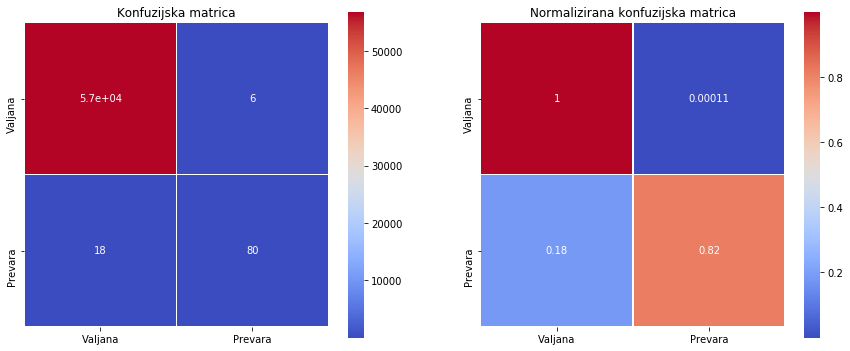

----------------------------------------------------------------------------------------------------
LGBM


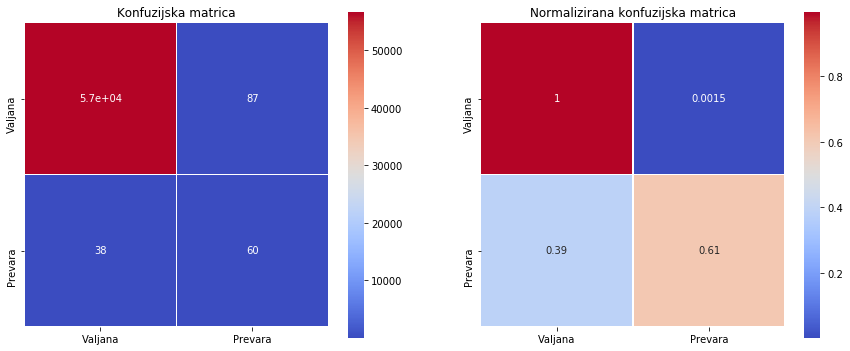

----------------------------------------------------------------------------------------------------
CatBoost


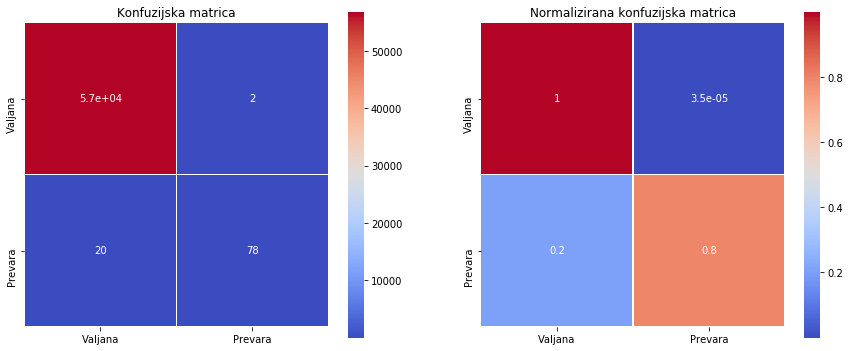

----------------------------------------------------------------------------------------------------
AdaBoost


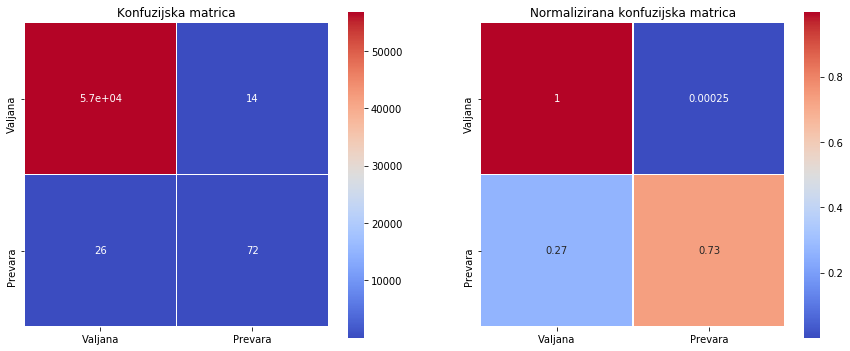

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [67]:
xgb_y_pred_data = xgb_data.predict(X_data_test)
lgbm_y_pred_data = lgbm_data.predict(X_data_test)
cat_y_pred_data = cat_data.predict(X_data_test)
ada_y_pred_data = ada_data.predict(X_data_test)

print('--'*50)
print('Testiranje:')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_data_test, xgb_y_pred_data)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_data_test, lgbm_y_pred_data)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_data_test, cat_y_pred_data)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_data_test, ada_y_pred_data)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_data_test, xgb_y_pred_data))
print('--'*50)
print('LGBM')
print(classification_report(y_data_test, lgbm_y_pred_data))
print('--'*50)
print('CatBoost')
print(classification_report(y_data_test, cat_y_pred_data))
print('--'*50)
print('AdaBoost')
print(classification_report(y_data_test, ada_y_pred_data))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_data_test, xgb_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_data_test, lgbm_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, cat_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, ada_y_pred_data), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)


In [60]:
print('Undersample: ')
print('-------------------------------')
print("XGB (eXtreme Gradient Boosting)")
xgb_usample = XGBClassifier()
xgb_usample.fit(X_usample_train, y_usample_train)
xgb_usample_training_score = cross_val_score(xgb_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za XGB (extreme gradient boosting) nad undersampliranim datasetom: " + 
       str(round(xgb_usample_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("LGBM (Light Gradient Boosting Method)")
lgbm_usample = LGBMClassifier()
lgbm_usample.fit(X_usample_train, y_usample_train)
lgbm_usample_training_score = cross_val_score(lgbm_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za LGBM (light gradient boosting) nad undersampliranim datasetom: " + 
       str(round(lgbm_usample_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("CatBoost (CATegorical Boosting)")
cat_usample = CatBoostClassifier(silent=True)
cat_usample.fit(X_usample_train, y_usample_train)
cat_usample_training_score = cross_val_score(cat_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za CatBoost (categorical boosting) nad undersampliranim datasetom: " + 
       str(round(cat_usample_training_score.mean(), 4) * 100) + '%')

print('-'*100)
print("AdaBoost (ADAptive Boosting)")
ada_usample = AdaBoostClassifier()
ada_usample.fit(X_usample_train, y_usample_train)
ada_usample_training_score = cross_val_score(ada_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za AdaBoost (adaptive boosting) nad undersampliranim datasetom: " + 
       str(round(ada_usample_training_score.mean(), 4) * 100) + '%')

Undersample: 
-------------------------------
XGB (eXtreme Gradient Boosting)
Rezultat treniranja za XGB (extreme gradient boosting) nad undersampliranim datasetom: 93.65%
----------------------------------------------------------------------------------------------------
LGBM (Light Gradient Boosting Method)
Rezultat treniranja za LGBM (light gradient boosting) nad undersampliranim datasetom: 92.75999999999999%
----------------------------------------------------------------------------------------------------
CatBoost (CATegorical Boosting)
Learning rate set to 0.009301
0:	learn: 0.6805700	total: 134ms	remaining: 2m 14s
1:	learn: 0.6672455	total: 146ms	remaining: 1m 12s
2:	learn: 0.6519190	total: 158ms	remaining: 52.4s
3:	learn: 0.6410561	total: 171ms	remaining: 42.6s
4:	learn: 0.6315980	total: 183ms	remaining: 36.5s
5:	learn: 0.6187008	total: 197ms	remaining: 32.6s
6:	learn: 0.6071903	total: 209ms	remaining: 29.6s
7:	learn: 0.5956038	total: 222ms	remaining: 27.5s
8:	learn: 0.5850441

156:	learn: 0.1364315	total: 1.52s	remaining: 8.18s
157:	learn: 0.1355925	total: 1.53s	remaining: 8.16s
158:	learn: 0.1349519	total: 1.54s	remaining: 8.15s
159:	learn: 0.1341487	total: 1.55s	remaining: 8.13s
160:	learn: 0.1334200	total: 1.56s	remaining: 8.11s
161:	learn: 0.1329059	total: 1.56s	remaining: 8.1s
162:	learn: 0.1323609	total: 1.57s	remaining: 8.08s
163:	learn: 0.1318126	total: 1.58s	remaining: 8.06s
164:	learn: 0.1310413	total: 1.59s	remaining: 8.04s
165:	learn: 0.1303988	total: 1.6s	remaining: 8.02s
166:	learn: 0.1297616	total: 1.6s	remaining: 8.01s
167:	learn: 0.1291791	total: 1.61s	remaining: 7.99s
168:	learn: 0.1287218	total: 1.62s	remaining: 7.97s
169:	learn: 0.1280196	total: 1.63s	remaining: 7.96s
170:	learn: 0.1272661	total: 1.64s	remaining: 7.94s
171:	learn: 0.1264547	total: 1.65s	remaining: 7.93s
172:	learn: 0.1257498	total: 1.66s	remaining: 7.91s
173:	learn: 0.1250335	total: 1.66s	remaining: 7.9s
174:	learn: 0.1243369	total: 1.67s	remaining: 7.89s
175:	learn: 0.12

333:	learn: 0.0706851	total: 2.91s	remaining: 5.8s
334:	learn: 0.0704536	total: 2.92s	remaining: 5.79s
335:	learn: 0.0702223	total: 2.92s	remaining: 5.78s
336:	learn: 0.0700749	total: 2.93s	remaining: 5.77s
337:	learn: 0.0698821	total: 2.94s	remaining: 5.76s
338:	learn: 0.0695965	total: 2.95s	remaining: 5.75s
339:	learn: 0.0693283	total: 2.96s	remaining: 5.75s
340:	learn: 0.0692114	total: 2.97s	remaining: 5.73s
341:	learn: 0.0690645	total: 2.98s	remaining: 5.72s
342:	learn: 0.0688212	total: 2.98s	remaining: 5.72s
343:	learn: 0.0686296	total: 2.99s	remaining: 5.71s
344:	learn: 0.0685083	total: 3s	remaining: 5.7s
345:	learn: 0.0682864	total: 3.01s	remaining: 5.69s
346:	learn: 0.0681080	total: 3.02s	remaining: 5.67s
347:	learn: 0.0679404	total: 3.02s	remaining: 5.67s
348:	learn: 0.0677380	total: 3.03s	remaining: 5.66s
349:	learn: 0.0675561	total: 3.04s	remaining: 5.64s
350:	learn: 0.0674244	total: 3.05s	remaining: 5.63s
351:	learn: 0.0672058	total: 3.05s	remaining: 5.62s
352:	learn: 0.066

514:	learn: 0.0441392	total: 4.31s	remaining: 4.06s
515:	learn: 0.0440371	total: 4.32s	remaining: 4.05s
516:	learn: 0.0439042	total: 4.33s	remaining: 4.04s
517:	learn: 0.0437909	total: 4.33s	remaining: 4.03s
518:	learn: 0.0436891	total: 4.34s	remaining: 4.03s
519:	learn: 0.0436050	total: 4.35s	remaining: 4.02s
520:	learn: 0.0434867	total: 4.36s	remaining: 4.01s
521:	learn: 0.0434198	total: 4.37s	remaining: 4s
522:	learn: 0.0433030	total: 4.38s	remaining: 3.99s
523:	learn: 0.0431509	total: 4.38s	remaining: 3.98s
524:	learn: 0.0430809	total: 4.39s	remaining: 3.97s
525:	learn: 0.0429510	total: 4.4s	remaining: 3.96s
526:	learn: 0.0428631	total: 4.41s	remaining: 3.96s
527:	learn: 0.0427145	total: 4.41s	remaining: 3.94s
528:	learn: 0.0425670	total: 4.42s	remaining: 3.94s
529:	learn: 0.0424795	total: 4.43s	remaining: 3.93s
530:	learn: 0.0423710	total: 4.44s	remaining: 3.92s
531:	learn: 0.0422472	total: 4.45s	remaining: 3.91s
532:	learn: 0.0421240	total: 4.45s	remaining: 3.9s
533:	learn: 0.042

693:	learn: 0.0301868	total: 5.7s	remaining: 2.51s
694:	learn: 0.0301387	total: 5.71s	remaining: 2.5s
695:	learn: 0.0300958	total: 5.72s	remaining: 2.5s
696:	learn: 0.0300390	total: 5.72s	remaining: 2.49s
697:	learn: 0.0299807	total: 5.73s	remaining: 2.48s
698:	learn: 0.0299040	total: 5.74s	remaining: 2.47s
699:	learn: 0.0298696	total: 5.75s	remaining: 2.46s
700:	learn: 0.0297992	total: 5.75s	remaining: 2.46s
701:	learn: 0.0297328	total: 5.76s	remaining: 2.45s
702:	learn: 0.0296472	total: 5.77s	remaining: 2.44s
703:	learn: 0.0296038	total: 5.78s	remaining: 2.43s
704:	learn: 0.0295648	total: 5.79s	remaining: 2.42s
705:	learn: 0.0294900	total: 5.8s	remaining: 2.41s
706:	learn: 0.0294177	total: 5.8s	remaining: 2.4s
707:	learn: 0.0293455	total: 5.81s	remaining: 2.4s
708:	learn: 0.0292581	total: 5.82s	remaining: 2.39s
709:	learn: 0.0292170	total: 5.83s	remaining: 2.38s
710:	learn: 0.0291831	total: 5.83s	remaining: 2.37s
711:	learn: 0.0291099	total: 5.84s	remaining: 2.36s
712:	learn: 0.02906

873:	learn: 0.0222197	total: 7.1s	remaining: 1.02s
874:	learn: 0.0221745	total: 7.11s	remaining: 1.01s
875:	learn: 0.0221343	total: 7.12s	remaining: 1.01s
876:	learn: 0.0220976	total: 7.13s	remaining: 999ms
877:	learn: 0.0220626	total: 7.13s	remaining: 991ms
878:	learn: 0.0220175	total: 7.14s	remaining: 983ms
879:	learn: 0.0219756	total: 7.15s	remaining: 975ms
880:	learn: 0.0219712	total: 7.16s	remaining: 967ms
881:	learn: 0.0219354	total: 7.17s	remaining: 959ms
882:	learn: 0.0218903	total: 7.17s	remaining: 951ms
883:	learn: 0.0218455	total: 7.18s	remaining: 943ms
884:	learn: 0.0218151	total: 7.19s	remaining: 935ms
885:	learn: 0.0217696	total: 7.2s	remaining: 926ms
886:	learn: 0.0217469	total: 7.21s	remaining: 918ms
887:	learn: 0.0217385	total: 7.21s	remaining: 910ms
888:	learn: 0.0217117	total: 7.22s	remaining: 902ms
889:	learn: 0.0216633	total: 7.23s	remaining: 894ms
890:	learn: 0.0216305	total: 7.24s	remaining: 885ms
891:	learn: 0.0215763	total: 7.25s	remaining: 877ms
892:	learn: 0.

43:	learn: 0.3570725	total: 356ms	remaining: 7.74s
44:	learn: 0.3520680	total: 363ms	remaining: 7.7s
45:	learn: 0.3478534	total: 370ms	remaining: 7.67s
46:	learn: 0.3441479	total: 378ms	remaining: 7.67s
47:	learn: 0.3399081	total: 387ms	remaining: 7.67s
48:	learn: 0.3360496	total: 394ms	remaining: 7.65s
49:	learn: 0.3320607	total: 402ms	remaining: 7.63s
50:	learn: 0.3282050	total: 410ms	remaining: 7.62s
51:	learn: 0.3238873	total: 418ms	remaining: 7.62s
52:	learn: 0.3190947	total: 426ms	remaining: 7.6s
53:	learn: 0.3148878	total: 433ms	remaining: 7.59s
54:	learn: 0.3113847	total: 442ms	remaining: 7.59s
55:	learn: 0.3086986	total: 449ms	remaining: 7.58s
56:	learn: 0.3053286	total: 457ms	remaining: 7.57s
57:	learn: 0.3022005	total: 465ms	remaining: 7.55s
58:	learn: 0.2992453	total: 472ms	remaining: 7.53s
59:	learn: 0.2965944	total: 480ms	remaining: 7.52s
60:	learn: 0.2934615	total: 488ms	remaining: 7.51s
61:	learn: 0.2909094	total: 495ms	remaining: 7.48s
62:	learn: 0.2881205	total: 502ms

224:	learn: 0.1090055	total: 1.74s	remaining: 5.99s
225:	learn: 0.1085836	total: 1.75s	remaining: 5.98s
226:	learn: 0.1081650	total: 1.75s	remaining: 5.96s
227:	learn: 0.1077439	total: 1.76s	remaining: 5.96s
228:	learn: 0.1072880	total: 1.77s	remaining: 5.95s
229:	learn: 0.1069648	total: 1.78s	remaining: 5.95s
230:	learn: 0.1065090	total: 1.78s	remaining: 5.94s
231:	learn: 0.1060297	total: 1.79s	remaining: 5.93s
232:	learn: 0.1056611	total: 1.8s	remaining: 5.92s
233:	learn: 0.1052655	total: 1.81s	remaining: 5.92s
234:	learn: 0.1049729	total: 1.81s	remaining: 5.91s
235:	learn: 0.1045815	total: 1.82s	remaining: 5.9s
236:	learn: 0.1040902	total: 1.83s	remaining: 5.89s
237:	learn: 0.1036842	total: 1.84s	remaining: 5.88s
238:	learn: 0.1032945	total: 1.84s	remaining: 5.88s
239:	learn: 0.1030132	total: 1.85s	remaining: 5.87s
240:	learn: 0.1026773	total: 1.86s	remaining: 5.86s
241:	learn: 0.1021850	total: 1.87s	remaining: 5.85s
242:	learn: 0.1018334	total: 1.88s	remaining: 5.84s
243:	learn: 0.

402:	learn: 0.0604127	total: 3.12s	remaining: 4.62s
403:	learn: 0.0602789	total: 3.13s	remaining: 4.61s
404:	learn: 0.0600924	total: 3.13s	remaining: 4.61s
405:	learn: 0.0600043	total: 3.14s	remaining: 4.6s
406:	learn: 0.0598678	total: 3.15s	remaining: 4.59s
407:	learn: 0.0597704	total: 3.16s	remaining: 4.58s
408:	learn: 0.0595938	total: 3.17s	remaining: 4.57s
409:	learn: 0.0594584	total: 3.17s	remaining: 4.57s
410:	learn: 0.0592797	total: 3.18s	remaining: 4.56s
411:	learn: 0.0591619	total: 3.19s	remaining: 4.55s
412:	learn: 0.0589160	total: 3.2s	remaining: 4.54s
413:	learn: 0.0587915	total: 3.2s	remaining: 4.54s
414:	learn: 0.0587111	total: 3.21s	remaining: 4.53s
415:	learn: 0.0586124	total: 3.22s	remaining: 4.52s
416:	learn: 0.0584195	total: 3.23s	remaining: 4.51s
417:	learn: 0.0583590	total: 3.24s	remaining: 4.51s
418:	learn: 0.0581598	total: 3.24s	remaining: 4.5s
419:	learn: 0.0579989	total: 3.25s	remaining: 4.49s
420:	learn: 0.0579005	total: 3.26s	remaining: 4.48s
421:	learn: 0.05

573:	learn: 0.0401695	total: 4.51s	remaining: 3.35s
574:	learn: 0.0401235	total: 4.52s	remaining: 3.34s
575:	learn: 0.0400578	total: 4.53s	remaining: 3.33s
576:	learn: 0.0399647	total: 4.53s	remaining: 3.32s
577:	learn: 0.0398645	total: 4.54s	remaining: 3.31s
578:	learn: 0.0398020	total: 4.55s	remaining: 3.31s
579:	learn: 0.0397007	total: 4.56s	remaining: 3.3s
580:	learn: 0.0395541	total: 4.56s	remaining: 3.29s
581:	learn: 0.0394489	total: 4.57s	remaining: 3.28s
582:	learn: 0.0393323	total: 4.58s	remaining: 3.28s
583:	learn: 0.0392809	total: 4.59s	remaining: 3.27s
584:	learn: 0.0392055	total: 4.6s	remaining: 3.26s
585:	learn: 0.0391546	total: 4.6s	remaining: 3.25s
586:	learn: 0.0390734	total: 4.61s	remaining: 3.25s
587:	learn: 0.0390203	total: 4.62s	remaining: 3.24s
588:	learn: 0.0388733	total: 4.63s	remaining: 3.23s
589:	learn: 0.0387508	total: 4.63s	remaining: 3.22s
590:	learn: 0.0386958	total: 4.64s	remaining: 3.21s
591:	learn: 0.0386350	total: 4.65s	remaining: 3.21s
592:	learn: 0.0

748:	learn: 0.0282699	total: 5.9s	remaining: 1.98s
749:	learn: 0.0282344	total: 5.91s	remaining: 1.97s
750:	learn: 0.0281855	total: 5.92s	remaining: 1.96s
751:	learn: 0.0281130	total: 5.93s	remaining: 1.96s
752:	learn: 0.0280575	total: 5.94s	remaining: 1.95s
753:	learn: 0.0279975	total: 5.95s	remaining: 1.94s
754:	learn: 0.0279285	total: 5.96s	remaining: 1.93s
755:	learn: 0.0278930	total: 5.97s	remaining: 1.93s
756:	learn: 0.0278318	total: 5.98s	remaining: 1.92s
757:	learn: 0.0277881	total: 5.99s	remaining: 1.91s
758:	learn: 0.0276944	total: 6s	remaining: 1.9s
759:	learn: 0.0276288	total: 6s	remaining: 1.9s
760:	learn: 0.0275521	total: 6.01s	remaining: 1.89s
761:	learn: 0.0274870	total: 6.02s	remaining: 1.88s
762:	learn: 0.0274447	total: 6.03s	remaining: 1.87s
763:	learn: 0.0274006	total: 6.03s	remaining: 1.86s
764:	learn: 0.0273647	total: 6.04s	remaining: 1.86s
765:	learn: 0.0273177	total: 6.05s	remaining: 1.85s
766:	learn: 0.0272809	total: 6.06s	remaining: 1.84s
767:	learn: 0.0272514

927:	learn: 0.0206966	total: 7.29s	remaining: 565ms
928:	learn: 0.0206609	total: 7.29s	remaining: 558ms
929:	learn: 0.0206174	total: 7.3s	remaining: 550ms
930:	learn: 0.0205888	total: 7.31s	remaining: 542ms
931:	learn: 0.0205667	total: 7.32s	remaining: 534ms
932:	learn: 0.0205438	total: 7.33s	remaining: 526ms
933:	learn: 0.0204973	total: 7.33s	remaining: 518ms
934:	learn: 0.0204797	total: 7.34s	remaining: 510ms
935:	learn: 0.0204418	total: 7.35s	remaining: 503ms
936:	learn: 0.0204091	total: 7.36s	remaining: 495ms
937:	learn: 0.0203866	total: 7.37s	remaining: 487ms
938:	learn: 0.0203672	total: 7.38s	remaining: 479ms
939:	learn: 0.0203304	total: 7.38s	remaining: 471ms
940:	learn: 0.0203061	total: 7.39s	remaining: 463ms
941:	learn: 0.0202789	total: 7.4s	remaining: 456ms
942:	learn: 0.0202691	total: 7.41s	remaining: 448ms
943:	learn: 0.0202329	total: 7.42s	remaining: 440ms
944:	learn: 0.0202136	total: 7.42s	remaining: 432ms
945:	learn: 0.0201730	total: 7.43s	remaining: 424ms
946:	learn: 0.

92:	learn: 0.2145001	total: 734ms	remaining: 7.15s
93:	learn: 0.2124983	total: 742ms	remaining: 7.15s
94:	learn: 0.2111525	total: 750ms	remaining: 7.14s
95:	learn: 0.2097780	total: 760ms	remaining: 7.15s
96:	learn: 0.2080356	total: 769ms	remaining: 7.16s
97:	learn: 0.2065729	total: 777ms	remaining: 7.15s
98:	learn: 0.2050791	total: 785ms	remaining: 7.15s
99:	learn: 0.2037316	total: 794ms	remaining: 7.14s
100:	learn: 0.2020452	total: 804ms	remaining: 7.16s
101:	learn: 0.2003176	total: 812ms	remaining: 7.15s
102:	learn: 0.1983841	total: 821ms	remaining: 7.15s
103:	learn: 0.1969512	total: 829ms	remaining: 7.14s
104:	learn: 0.1957096	total: 835ms	remaining: 7.12s
105:	learn: 0.1944333	total: 843ms	remaining: 7.11s
106:	learn: 0.1927218	total: 852ms	remaining: 7.11s
107:	learn: 0.1911338	total: 860ms	remaining: 7.1s
108:	learn: 0.1895858	total: 868ms	remaining: 7.09s
109:	learn: 0.1885077	total: 876ms	remaining: 7.08s
110:	learn: 0.1871353	total: 883ms	remaining: 7.08s
111:	learn: 0.1856733

268:	learn: 0.0839205	total: 2.12s	remaining: 5.76s
269:	learn: 0.0835648	total: 2.13s	remaining: 5.76s
270:	learn: 0.0832688	total: 2.14s	remaining: 5.75s
271:	learn: 0.0830309	total: 2.15s	remaining: 5.74s
272:	learn: 0.0826775	total: 2.15s	remaining: 5.74s
273:	learn: 0.0824525	total: 2.16s	remaining: 5.74s
274:	learn: 0.0821584	total: 2.17s	remaining: 5.73s
275:	learn: 0.0818206	total: 2.18s	remaining: 5.73s
276:	learn: 0.0815564	total: 2.19s	remaining: 5.72s
277:	learn: 0.0813438	total: 2.2s	remaining: 5.72s
278:	learn: 0.0811256	total: 2.21s	remaining: 5.71s
279:	learn: 0.0807095	total: 2.22s	remaining: 5.7s
280:	learn: 0.0804249	total: 2.22s	remaining: 5.69s
281:	learn: 0.0802501	total: 2.23s	remaining: 5.68s
282:	learn: 0.0799130	total: 2.24s	remaining: 5.67s
283:	learn: 0.0796474	total: 2.25s	remaining: 5.66s
284:	learn: 0.0793637	total: 2.25s	remaining: 5.65s
285:	learn: 0.0791154	total: 2.26s	remaining: 5.64s
286:	learn: 0.0788997	total: 2.27s	remaining: 5.63s
287:	learn: 0.

440:	learn: 0.0502884	total: 3.68s	remaining: 4.67s
441:	learn: 0.0502571	total: 3.69s	remaining: 4.66s
442:	learn: 0.0501356	total: 3.7s	remaining: 4.65s
443:	learn: 0.0500223	total: 3.71s	remaining: 4.64s
444:	learn: 0.0498699	total: 3.71s	remaining: 4.63s
445:	learn: 0.0497426	total: 3.73s	remaining: 4.63s
446:	learn: 0.0495492	total: 3.73s	remaining: 4.62s
447:	learn: 0.0494551	total: 3.74s	remaining: 4.61s
448:	learn: 0.0492927	total: 3.75s	remaining: 4.6s
449:	learn: 0.0491360	total: 3.76s	remaining: 4.59s
450:	learn: 0.0490197	total: 3.78s	remaining: 4.6s
451:	learn: 0.0488774	total: 3.79s	remaining: 4.6s
452:	learn: 0.0487386	total: 3.8s	remaining: 4.59s
453:	learn: 0.0486055	total: 3.81s	remaining: 4.58s
454:	learn: 0.0484351	total: 3.82s	remaining: 4.58s
455:	learn: 0.0483362	total: 3.83s	remaining: 4.57s
456:	learn: 0.0482163	total: 3.84s	remaining: 4.56s
457:	learn: 0.0480330	total: 3.85s	remaining: 4.55s
458:	learn: 0.0478883	total: 3.86s	remaining: 4.55s
459:	learn: 0.047

610:	learn: 0.0335352	total: 5.25s	remaining: 3.34s
611:	learn: 0.0334656	total: 5.26s	remaining: 3.34s
612:	learn: 0.0334142	total: 5.27s	remaining: 3.33s
613:	learn: 0.0333573	total: 5.29s	remaining: 3.32s
614:	learn: 0.0332737	total: 5.3s	remaining: 3.32s
615:	learn: 0.0331741	total: 5.31s	remaining: 3.31s
616:	learn: 0.0331081	total: 5.31s	remaining: 3.3s
617:	learn: 0.0330476	total: 5.32s	remaining: 3.29s
618:	learn: 0.0329761	total: 5.33s	remaining: 3.28s
619:	learn: 0.0328798	total: 5.34s	remaining: 3.27s
620:	learn: 0.0328087	total: 5.35s	remaining: 3.26s
621:	learn: 0.0327419	total: 5.36s	remaining: 3.26s
622:	learn: 0.0326894	total: 5.37s	remaining: 3.25s
623:	learn: 0.0325865	total: 5.38s	remaining: 3.24s
624:	learn: 0.0325583	total: 5.39s	remaining: 3.23s
625:	learn: 0.0325167	total: 5.4s	remaining: 3.22s
626:	learn: 0.0324880	total: 5.41s	remaining: 3.22s
627:	learn: 0.0324456	total: 5.42s	remaining: 3.21s
628:	learn: 0.0324071	total: 5.43s	remaining: 3.2s
629:	learn: 0.03

778:	learn: 0.0245352	total: 6.81s	remaining: 1.93s
779:	learn: 0.0244903	total: 6.82s	remaining: 1.92s
780:	learn: 0.0244398	total: 6.83s	remaining: 1.92s
781:	learn: 0.0243879	total: 6.84s	remaining: 1.91s
782:	learn: 0.0243849	total: 6.85s	remaining: 1.9s
783:	learn: 0.0243342	total: 6.86s	remaining: 1.89s
784:	learn: 0.0242967	total: 6.87s	remaining: 1.88s
785:	learn: 0.0242568	total: 6.87s	remaining: 1.87s
786:	learn: 0.0242030	total: 6.88s	remaining: 1.86s
787:	learn: 0.0241643	total: 6.89s	remaining: 1.85s
788:	learn: 0.0241268	total: 6.9s	remaining: 1.84s
789:	learn: 0.0241101	total: 6.91s	remaining: 1.83s
790:	learn: 0.0240491	total: 6.91s	remaining: 1.83s
791:	learn: 0.0240375	total: 6.92s	remaining: 1.82s
792:	learn: 0.0240349	total: 6.93s	remaining: 1.81s
793:	learn: 0.0239896	total: 6.94s	remaining: 1.8s
794:	learn: 0.0239114	total: 6.95s	remaining: 1.79s
795:	learn: 0.0238692	total: 6.95s	remaining: 1.78s
796:	learn: 0.0238010	total: 6.96s	remaining: 1.77s
797:	learn: 0.0

949:	learn: 0.0188798	total: 8.2s	remaining: 432ms
950:	learn: 0.0188689	total: 8.21s	remaining: 423ms
951:	learn: 0.0188311	total: 8.21s	remaining: 414ms
952:	learn: 0.0187920	total: 8.22s	remaining: 406ms
953:	learn: 0.0187709	total: 8.23s	remaining: 397ms
954:	learn: 0.0187599	total: 8.24s	remaining: 388ms
955:	learn: 0.0187561	total: 8.25s	remaining: 380ms
956:	learn: 0.0187430	total: 8.26s	remaining: 371ms
957:	learn: 0.0187059	total: 8.27s	remaining: 362ms
958:	learn: 0.0186746	total: 8.27s	remaining: 354ms
959:	learn: 0.0186551	total: 8.28s	remaining: 345ms
960:	learn: 0.0186075	total: 8.29s	remaining: 336ms
961:	learn: 0.0185695	total: 8.3s	remaining: 328ms
962:	learn: 0.0185502	total: 8.31s	remaining: 319ms
963:	learn: 0.0185052	total: 8.31s	remaining: 311ms
964:	learn: 0.0184617	total: 8.32s	remaining: 302ms
965:	learn: 0.0184428	total: 8.33s	remaining: 293ms
966:	learn: 0.0184270	total: 8.34s	remaining: 285ms
967:	learn: 0.0183905	total: 8.35s	remaining: 276ms
968:	learn: 0.

114:	learn: 0.1769118	total: 1.07s	remaining: 8.27s
115:	learn: 0.1759106	total: 1.08s	remaining: 8.25s
116:	learn: 0.1748840	total: 1.09s	remaining: 8.24s
117:	learn: 0.1737879	total: 1.11s	remaining: 8.31s
118:	learn: 0.1726059	total: 1.12s	remaining: 8.29s
119:	learn: 0.1714447	total: 1.13s	remaining: 8.28s
120:	learn: 0.1703305	total: 1.14s	remaining: 8.29s
121:	learn: 0.1688482	total: 1.15s	remaining: 8.27s
122:	learn: 0.1678253	total: 1.16s	remaining: 8.28s
123:	learn: 0.1671557	total: 1.17s	remaining: 8.26s
124:	learn: 0.1656313	total: 1.18s	remaining: 8.24s
125:	learn: 0.1646326	total: 1.19s	remaining: 8.24s
126:	learn: 0.1634443	total: 1.2s	remaining: 8.23s
127:	learn: 0.1627097	total: 1.21s	remaining: 8.21s
128:	learn: 0.1615236	total: 1.22s	remaining: 8.21s
129:	learn: 0.1604035	total: 1.22s	remaining: 8.19s
130:	learn: 0.1593796	total: 1.23s	remaining: 8.18s
131:	learn: 0.1584026	total: 1.24s	remaining: 8.18s
132:	learn: 0.1574843	total: 1.25s	remaining: 8.16s
133:	learn: 0

284:	learn: 0.0778064	total: 2.63s	remaining: 6.59s
285:	learn: 0.0774758	total: 2.64s	remaining: 6.58s
286:	learn: 0.0772208	total: 2.64s	remaining: 6.57s
287:	learn: 0.0769392	total: 2.65s	remaining: 6.56s
288:	learn: 0.0766083	total: 2.66s	remaining: 6.55s
289:	learn: 0.0762719	total: 2.67s	remaining: 6.54s
290:	learn: 0.0759779	total: 2.68s	remaining: 6.53s
291:	learn: 0.0756808	total: 2.69s	remaining: 6.52s
292:	learn: 0.0754480	total: 2.7s	remaining: 6.51s
293:	learn: 0.0751775	total: 2.71s	remaining: 6.5s
294:	learn: 0.0749634	total: 2.72s	remaining: 6.5s
295:	learn: 0.0747246	total: 2.73s	remaining: 6.48s
296:	learn: 0.0745762	total: 2.73s	remaining: 6.48s
297:	learn: 0.0742791	total: 2.75s	remaining: 6.47s
298:	learn: 0.0740536	total: 2.75s	remaining: 6.46s
299:	learn: 0.0738495	total: 2.76s	remaining: 6.45s
300:	learn: 0.0736624	total: 2.77s	remaining: 6.44s
301:	learn: 0.0734451	total: 2.78s	remaining: 6.43s
302:	learn: 0.0732350	total: 2.79s	remaining: 6.42s
303:	learn: 0.0

459:	learn: 0.0467100	total: 4.2s	remaining: 4.93s
460:	learn: 0.0465785	total: 4.21s	remaining: 4.92s
461:	learn: 0.0464867	total: 4.21s	remaining: 4.91s
462:	learn: 0.0463298	total: 4.22s	remaining: 4.9s
463:	learn: 0.0462032	total: 4.23s	remaining: 4.89s
464:	learn: 0.0461313	total: 4.24s	remaining: 4.88s
465:	learn: 0.0459886	total: 4.25s	remaining: 4.87s
466:	learn: 0.0458236	total: 4.26s	remaining: 4.86s
467:	learn: 0.0457460	total: 4.27s	remaining: 4.85s
468:	learn: 0.0455917	total: 4.27s	remaining: 4.84s
469:	learn: 0.0454858	total: 4.28s	remaining: 4.83s
470:	learn: 0.0453844	total: 4.29s	remaining: 4.82s
471:	learn: 0.0453224	total: 4.3s	remaining: 4.81s
472:	learn: 0.0452079	total: 4.31s	remaining: 4.8s
473:	learn: 0.0451566	total: 4.32s	remaining: 4.79s
474:	learn: 0.0450034	total: 4.33s	remaining: 4.78s
475:	learn: 0.0449506	total: 4.34s	remaining: 4.77s
476:	learn: 0.0448683	total: 4.34s	remaining: 4.76s
477:	learn: 0.0447575	total: 4.35s	remaining: 4.75s
478:	learn: 0.04

628:	learn: 0.0322031	total: 5.75s	remaining: 3.4s
629:	learn: 0.0321148	total: 5.77s	remaining: 3.39s
630:	learn: 0.0320758	total: 5.77s	remaining: 3.38s
631:	learn: 0.0319740	total: 5.78s	remaining: 3.37s
632:	learn: 0.0319115	total: 5.79s	remaining: 3.36s
633:	learn: 0.0318118	total: 5.8s	remaining: 3.35s
634:	learn: 0.0317577	total: 5.81s	remaining: 3.34s
635:	learn: 0.0317057	total: 5.82s	remaining: 3.33s
636:	learn: 0.0316386	total: 5.83s	remaining: 3.32s
637:	learn: 0.0315484	total: 5.84s	remaining: 3.31s
638:	learn: 0.0314610	total: 5.85s	remaining: 3.3s
639:	learn: 0.0313885	total: 5.86s	remaining: 3.29s
640:	learn: 0.0313314	total: 5.86s	remaining: 3.28s
641:	learn: 0.0312766	total: 5.87s	remaining: 3.27s
642:	learn: 0.0312107	total: 5.88s	remaining: 3.26s
643:	learn: 0.0311467	total: 5.89s	remaining: 3.25s
644:	learn: 0.0311114	total: 5.9s	remaining: 3.25s
645:	learn: 0.0310263	total: 5.9s	remaining: 3.23s
646:	learn: 0.0309887	total: 5.91s	remaining: 3.23s
647:	learn: 0.030

805:	learn: 0.0224798	total: 7.31s	remaining: 1.76s
806:	learn: 0.0224765	total: 7.32s	remaining: 1.75s
807:	learn: 0.0224499	total: 7.33s	remaining: 1.74s
808:	learn: 0.0224114	total: 7.34s	remaining: 1.73s
809:	learn: 0.0223597	total: 7.36s	remaining: 1.73s
810:	learn: 0.0223222	total: 7.37s	remaining: 1.72s
811:	learn: 0.0222588	total: 7.38s	remaining: 1.71s
812:	learn: 0.0221968	total: 7.38s	remaining: 1.7s
813:	learn: 0.0221358	total: 7.39s	remaining: 1.69s
814:	learn: 0.0220838	total: 7.4s	remaining: 1.68s
815:	learn: 0.0220222	total: 7.41s	remaining: 1.67s
816:	learn: 0.0219705	total: 7.42s	remaining: 1.66s
817:	learn: 0.0219525	total: 7.43s	remaining: 1.65s
818:	learn: 0.0219116	total: 7.44s	remaining: 1.64s
819:	learn: 0.0218821	total: 7.45s	remaining: 1.64s
820:	learn: 0.0218630	total: 7.46s	remaining: 1.63s
821:	learn: 0.0218153	total: 7.47s	remaining: 1.62s
822:	learn: 0.0217616	total: 7.49s	remaining: 1.61s
823:	learn: 0.0217180	total: 7.5s	remaining: 1.6s
824:	learn: 0.02

982:	learn: 0.0171240	total: 8.86s	remaining: 153ms
983:	learn: 0.0171193	total: 8.87s	remaining: 144ms
984:	learn: 0.0170970	total: 8.88s	remaining: 135ms
985:	learn: 0.0170877	total: 8.89s	remaining: 126ms
986:	learn: 0.0170531	total: 8.89s	remaining: 117ms
987:	learn: 0.0170104	total: 8.9s	remaining: 108ms
988:	learn: 0.0169900	total: 8.91s	remaining: 99.1ms
989:	learn: 0.0169826	total: 8.92s	remaining: 90.1ms
990:	learn: 0.0169381	total: 8.93s	remaining: 81.1ms
991:	learn: 0.0169155	total: 8.94s	remaining: 72.1ms
992:	learn: 0.0168602	total: 8.95s	remaining: 63.1ms
993:	learn: 0.0168257	total: 8.96s	remaining: 54.1ms
994:	learn: 0.0167898	total: 8.96s	remaining: 45ms
995:	learn: 0.0167858	total: 8.97s	remaining: 36ms
996:	learn: 0.0167808	total: 8.98s	remaining: 27ms
997:	learn: 0.0167475	total: 8.99s	remaining: 18ms
998:	learn: 0.0167057	total: 9s	remaining: 9.01ms
999:	learn: 0.0167026	total: 9.01s	remaining: 0us
Learning rate set to 0.008458
0:	learn: 0.6812731	total: 10.1ms	rem

152:	learn: 0.1466889	total: 1.4s	remaining: 7.72s
153:	learn: 0.1457778	total: 1.4s	remaining: 7.72s
154:	learn: 0.1451296	total: 1.41s	remaining: 7.71s
155:	learn: 0.1444477	total: 1.42s	remaining: 7.7s
156:	learn: 0.1438598	total: 1.43s	remaining: 7.69s
157:	learn: 0.1431616	total: 1.44s	remaining: 7.69s
158:	learn: 0.1422482	total: 1.45s	remaining: 7.68s
159:	learn: 0.1413223	total: 1.46s	remaining: 7.67s
160:	learn: 0.1404700	total: 1.47s	remaining: 7.66s
161:	learn: 0.1400032	total: 1.48s	remaining: 7.64s
162:	learn: 0.1393165	total: 1.49s	remaining: 7.63s
163:	learn: 0.1387348	total: 1.5s	remaining: 7.63s
164:	learn: 0.1379131	total: 1.5s	remaining: 7.61s
165:	learn: 0.1373020	total: 1.51s	remaining: 7.6s
166:	learn: 0.1364483	total: 1.52s	remaining: 7.58s
167:	learn: 0.1358117	total: 1.53s	remaining: 7.56s
168:	learn: 0.1351629	total: 1.53s	remaining: 7.55s
169:	learn: 0.1344354	total: 1.54s	remaining: 7.54s
170:	learn: 0.1337278	total: 1.55s	remaining: 7.54s
171:	learn: 0.1330

322:	learn: 0.0737588	total: 2.77s	remaining: 5.82s
323:	learn: 0.0735143	total: 2.78s	remaining: 5.81s
324:	learn: 0.0733971	total: 2.79s	remaining: 5.8s
325:	learn: 0.0731061	total: 2.8s	remaining: 5.79s
326:	learn: 0.0730336	total: 2.81s	remaining: 5.79s
327:	learn: 0.0728439	total: 2.82s	remaining: 5.78s
328:	learn: 0.0726346	total: 2.83s	remaining: 5.77s
329:	learn: 0.0723894	total: 2.83s	remaining: 5.76s
330:	learn: 0.0721495	total: 2.84s	remaining: 5.75s
331:	learn: 0.0719805	total: 2.85s	remaining: 5.74s
332:	learn: 0.0716899	total: 2.86s	remaining: 5.73s
333:	learn: 0.0713961	total: 2.87s	remaining: 5.72s
334:	learn: 0.0712308	total: 2.88s	remaining: 5.71s
335:	learn: 0.0710097	total: 2.88s	remaining: 5.7s
336:	learn: 0.0708677	total: 2.89s	remaining: 5.69s
337:	learn: 0.0705905	total: 2.9s	remaining: 5.68s
338:	learn: 0.0703698	total: 2.91s	remaining: 5.67s
339:	learn: 0.0701011	total: 2.92s	remaining: 5.67s
340:	learn: 0.0698494	total: 2.92s	remaining: 5.65s
341:	learn: 0.06

492:	learn: 0.0455400	total: 4.16s	remaining: 4.28s
493:	learn: 0.0454752	total: 4.16s	remaining: 4.26s
494:	learn: 0.0453330	total: 4.17s	remaining: 4.25s
495:	learn: 0.0452122	total: 4.18s	remaining: 4.25s
496:	learn: 0.0451107	total: 4.19s	remaining: 4.24s
497:	learn: 0.0450595	total: 4.2s	remaining: 4.23s
498:	learn: 0.0449118	total: 4.2s	remaining: 4.22s
499:	learn: 0.0448397	total: 4.21s	remaining: 4.21s
500:	learn: 0.0447299	total: 4.22s	remaining: 4.2s
501:	learn: 0.0446027	total: 4.23s	remaining: 4.2s
502:	learn: 0.0444943	total: 4.24s	remaining: 4.19s
503:	learn: 0.0443702	total: 4.25s	remaining: 4.18s
504:	learn: 0.0442967	total: 4.25s	remaining: 4.17s
505:	learn: 0.0441973	total: 4.26s	remaining: 4.16s
506:	learn: 0.0440841	total: 4.27s	remaining: 4.15s
507:	learn: 0.0439427	total: 4.28s	remaining: 4.14s
508:	learn: 0.0438506	total: 4.29s	remaining: 4.13s
509:	learn: 0.0437416	total: 4.29s	remaining: 4.13s
510:	learn: 0.0436358	total: 4.3s	remaining: 4.12s
511:	learn: 0.043

651:	learn: 0.0316642	total: 5.55s	remaining: 2.96s
652:	learn: 0.0316172	total: 5.56s	remaining: 2.95s
653:	learn: 0.0315478	total: 5.57s	remaining: 2.95s
654:	learn: 0.0315113	total: 5.58s	remaining: 2.94s
655:	learn: 0.0314776	total: 5.59s	remaining: 2.93s
656:	learn: 0.0313966	total: 5.59s	remaining: 2.92s
657:	learn: 0.0313332	total: 5.61s	remaining: 2.91s
658:	learn: 0.0312896	total: 5.61s	remaining: 2.9s
659:	learn: 0.0312509	total: 5.62s	remaining: 2.9s
660:	learn: 0.0311853	total: 5.63s	remaining: 2.89s
661:	learn: 0.0311067	total: 5.64s	remaining: 2.88s
662:	learn: 0.0310365	total: 5.65s	remaining: 2.87s
663:	learn: 0.0309580	total: 5.66s	remaining: 2.86s
664:	learn: 0.0309077	total: 5.67s	remaining: 2.85s
665:	learn: 0.0308494	total: 5.67s	remaining: 2.85s
666:	learn: 0.0307782	total: 5.68s	remaining: 2.84s
667:	learn: 0.0306768	total: 5.69s	remaining: 2.83s
668:	learn: 0.0305799	total: 5.7s	remaining: 2.82s
669:	learn: 0.0304939	total: 5.71s	remaining: 2.81s
670:	learn: 0.0

816:	learn: 0.0226798	total: 6.93s	remaining: 1.55s
817:	learn: 0.0226538	total: 6.94s	remaining: 1.54s
818:	learn: 0.0226172	total: 6.94s	remaining: 1.53s
819:	learn: 0.0225751	total: 6.95s	remaining: 1.53s
820:	learn: 0.0225500	total: 6.96s	remaining: 1.52s
821:	learn: 0.0225083	total: 6.97s	remaining: 1.51s
822:	learn: 0.0224873	total: 6.98s	remaining: 1.5s
823:	learn: 0.0224504	total: 6.99s	remaining: 1.49s
824:	learn: 0.0224213	total: 7s	remaining: 1.48s
825:	learn: 0.0223965	total: 7s	remaining: 1.48s
826:	learn: 0.0223694	total: 7.01s	remaining: 1.47s
827:	learn: 0.0223069	total: 7.02s	remaining: 1.46s
828:	learn: 0.0222703	total: 7.03s	remaining: 1.45s
829:	learn: 0.0222262	total: 7.04s	remaining: 1.44s
830:	learn: 0.0221779	total: 7.05s	remaining: 1.43s
831:	learn: 0.0221200	total: 7.05s	remaining: 1.42s
832:	learn: 0.0220822	total: 7.06s	remaining: 1.42s
833:	learn: 0.0220301	total: 7.07s	remaining: 1.41s
834:	learn: 0.0219927	total: 7.08s	remaining: 1.4s
835:	learn: 0.021945

991:	learn: 0.0166908	total: 8.32s	remaining: 67.1ms
992:	learn: 0.0166654	total: 8.33s	remaining: 58.7ms
993:	learn: 0.0166431	total: 8.34s	remaining: 50.3ms
994:	learn: 0.0166155	total: 8.35s	remaining: 41.9ms
995:	learn: 0.0165817	total: 8.36s	remaining: 33.6ms
996:	learn: 0.0165567	total: 8.36s	remaining: 25.2ms
997:	learn: 0.0165344	total: 8.37s	remaining: 16.8ms
998:	learn: 0.0165175	total: 8.38s	remaining: 8.39ms
999:	learn: 0.0165033	total: 8.39s	remaining: 0us
Learning rate set to 0.008458
0:	learn: 0.6823763	total: 12ms	remaining: 12s
1:	learn: 0.6714250	total: 20.2ms	remaining: 10.1s
2:	learn: 0.6579216	total: 27.3ms	remaining: 9.08s
3:	learn: 0.6483075	total: 34.3ms	remaining: 8.53s
4:	learn: 0.6399538	total: 41.9ms	remaining: 8.33s
5:	learn: 0.6290664	total: 50.7ms	remaining: 8.4s
6:	learn: 0.6189268	total: 58.6ms	remaining: 8.31s
7:	learn: 0.6087915	total: 67.2ms	remaining: 8.33s
8:	learn: 0.5994406	total: 75.6ms	remaining: 8.32s
9:	learn: 0.5904485	total: 84ms	remaining:

166:	learn: 0.1390167	total: 1.4s	remaining: 7s
167:	learn: 0.1382148	total: 1.41s	remaining: 6.98s
168:	learn: 0.1377171	total: 1.42s	remaining: 6.97s
169:	learn: 0.1372875	total: 1.43s	remaining: 6.96s
170:	learn: 0.1365603	total: 1.43s	remaining: 6.95s
171:	learn: 0.1358741	total: 1.44s	remaining: 6.94s
172:	learn: 0.1352454	total: 1.45s	remaining: 6.92s
173:	learn: 0.1345400	total: 1.46s	remaining: 6.91s
174:	learn: 0.1337937	total: 1.46s	remaining: 6.9s
175:	learn: 0.1332553	total: 1.47s	remaining: 6.9s
176:	learn: 0.1326124	total: 1.48s	remaining: 6.9s
177:	learn: 0.1321799	total: 1.5s	remaining: 6.91s
178:	learn: 0.1318138	total: 1.5s	remaining: 6.9s
179:	learn: 0.1312007	total: 1.51s	remaining: 6.9s
180:	learn: 0.1304757	total: 1.53s	remaining: 6.91s
181:	learn: 0.1300072	total: 1.53s	remaining: 6.9s
182:	learn: 0.1294778	total: 1.54s	remaining: 6.9s
183:	learn: 0.1289300	total: 1.55s	remaining: 6.89s
184:	learn: 0.1284579	total: 1.56s	remaining: 6.89s
185:	learn: 0.1277923	tot

333:	learn: 0.0723174	total: 2.78s	remaining: 5.55s
334:	learn: 0.0721335	total: 2.79s	remaining: 5.54s
335:	learn: 0.0717619	total: 2.8s	remaining: 5.53s
336:	learn: 0.0715243	total: 2.81s	remaining: 5.53s
337:	learn: 0.0713279	total: 2.82s	remaining: 5.52s
338:	learn: 0.0711233	total: 2.82s	remaining: 5.51s
339:	learn: 0.0708026	total: 2.83s	remaining: 5.5s
340:	learn: 0.0705733	total: 2.84s	remaining: 5.49s
341:	learn: 0.0702830	total: 2.85s	remaining: 5.48s
342:	learn: 0.0700941	total: 2.86s	remaining: 5.47s
343:	learn: 0.0697996	total: 2.86s	remaining: 5.46s
344:	learn: 0.0695208	total: 2.87s	remaining: 5.45s
345:	learn: 0.0693555	total: 2.88s	remaining: 5.44s
346:	learn: 0.0691184	total: 2.89s	remaining: 5.43s
347:	learn: 0.0689419	total: 2.9s	remaining: 5.43s
348:	learn: 0.0687413	total: 2.9s	remaining: 5.42s
349:	learn: 0.0684960	total: 2.91s	remaining: 5.41s
350:	learn: 0.0683272	total: 2.92s	remaining: 5.4s
351:	learn: 0.0680166	total: 2.93s	remaining: 5.39s
352:	learn: 0.067

507:	learn: 0.0443158	total: 4.17s	remaining: 4.04s
508:	learn: 0.0442188	total: 4.18s	remaining: 4.03s
509:	learn: 0.0440687	total: 4.19s	remaining: 4.03s
510:	learn: 0.0439172	total: 4.2s	remaining: 4.02s
511:	learn: 0.0438232	total: 4.21s	remaining: 4.01s
512:	learn: 0.0437272	total: 4.21s	remaining: 4s
513:	learn: 0.0435914	total: 4.22s	remaining: 3.99s
514:	learn: 0.0434790	total: 4.23s	remaining: 3.98s
515:	learn: 0.0433887	total: 4.24s	remaining: 3.98s
516:	learn: 0.0432802	total: 4.25s	remaining: 3.97s
517:	learn: 0.0431573	total: 4.25s	remaining: 3.96s
518:	learn: 0.0430547	total: 4.26s	remaining: 3.95s
519:	learn: 0.0429535	total: 4.28s	remaining: 3.95s
520:	learn: 0.0428968	total: 4.29s	remaining: 3.94s
521:	learn: 0.0428412	total: 4.29s	remaining: 3.93s
522:	learn: 0.0427921	total: 4.3s	remaining: 3.92s
523:	learn: 0.0426718	total: 4.31s	remaining: 3.91s
524:	learn: 0.0426258	total: 4.31s	remaining: 3.9s
525:	learn: 0.0425163	total: 4.32s	remaining: 3.89s
526:	learn: 0.0424

680:	learn: 0.0308535	total: 5.56s	remaining: 2.6s
681:	learn: 0.0308114	total: 5.57s	remaining: 2.6s
682:	learn: 0.0307526	total: 5.57s	remaining: 2.59s
683:	learn: 0.0306942	total: 5.58s	remaining: 2.58s
684:	learn: 0.0306559	total: 5.59s	remaining: 2.57s
685:	learn: 0.0305692	total: 5.6s	remaining: 2.56s
686:	learn: 0.0305025	total: 5.61s	remaining: 2.55s
687:	learn: 0.0304402	total: 5.61s	remaining: 2.54s
688:	learn: 0.0303914	total: 5.62s	remaining: 2.54s
689:	learn: 0.0303225	total: 5.63s	remaining: 2.53s
690:	learn: 0.0303006	total: 5.64s	remaining: 2.52s
691:	learn: 0.0302464	total: 5.65s	remaining: 2.51s
692:	learn: 0.0301585	total: 5.66s	remaining: 2.5s
693:	learn: 0.0300940	total: 5.66s	remaining: 2.5s
694:	learn: 0.0300483	total: 5.67s	remaining: 2.49s
695:	learn: 0.0300092	total: 5.68s	remaining: 2.48s
696:	learn: 0.0299175	total: 5.69s	remaining: 2.48s
697:	learn: 0.0298892	total: 5.71s	remaining: 2.47s
698:	learn: 0.0298398	total: 5.71s	remaining: 2.46s
699:	learn: 0.029

853:	learn: 0.0226752	total: 6.95s	remaining: 1.19s
854:	learn: 0.0226207	total: 6.95s	remaining: 1.18s
855:	learn: 0.0225842	total: 6.96s	remaining: 1.17s
856:	learn: 0.0225789	total: 6.97s	remaining: 1.16s
857:	learn: 0.0225453	total: 6.98s	remaining: 1.15s
858:	learn: 0.0225310	total: 6.98s	remaining: 1.15s
859:	learn: 0.0224777	total: 6.99s	remaining: 1.14s
860:	learn: 0.0224139	total: 7s	remaining: 1.13s
861:	learn: 0.0223986	total: 7.01s	remaining: 1.12s
862:	learn: 0.0223470	total: 7.01s	remaining: 1.11s
863:	learn: 0.0222958	total: 7.02s	remaining: 1.1s
864:	learn: 0.0222917	total: 7.03s	remaining: 1.1s
865:	learn: 0.0222837	total: 7.04s	remaining: 1.09s
866:	learn: 0.0222809	total: 7.04s	remaining: 1.08s
867:	learn: 0.0222370	total: 7.05s	remaining: 1.07s
868:	learn: 0.0222354	total: 7.06s	remaining: 1.06s
869:	learn: 0.0221950	total: 7.07s	remaining: 1.06s
870:	learn: 0.0221713	total: 7.08s	remaining: 1.05s
871:	learn: 0.0221180	total: 7.08s	remaining: 1.04s
872:	learn: 0.022

In [61]:
print('Rezultati treniranja:')
print('\t     XGB: ' + str(round(xgb_usample_training_score.mean(), 4) * 100) + '%')
print('\t    LGBM: ' + str(round(lgbm_usample_training_score.mean(), 4) * 100) + '%')
print('\tCatBoost: ' + str(round(cat_usample_training_score.mean(), 4) * 100) + '%')
print('\tAdaBoost: ' + str(round(ada_usample_training_score.mean(), 4) * 100) + '%')

Rezultati treniranja:
	     XGB: 93.65%
	    LGBM: 92.75999999999999%
	CatBoost: 93.64%
	AdaBoost: 92.88%


----------------------------------------------------------------------------------------------------
Testiranje (na undersampleu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 94.78999999999999%
	Recall score: 93.81%
	F1 score: 94.3%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 95.83%
	Recall score: 94.85%
	F1 score: 95.34%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 95.74000000000001%
	Recall score: 92.78%
	F1 score: 94.24%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 91.92%
	Recall score: 93.81%
	F1 score: 92.86%
---------------------------------

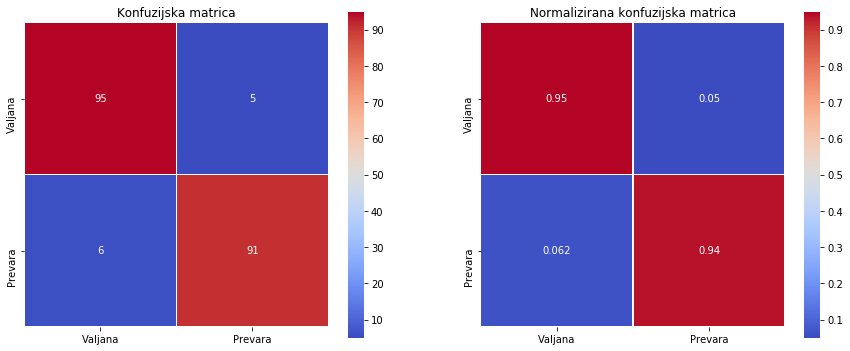

----------------------------------------------------------------------------------------------------
LGBM


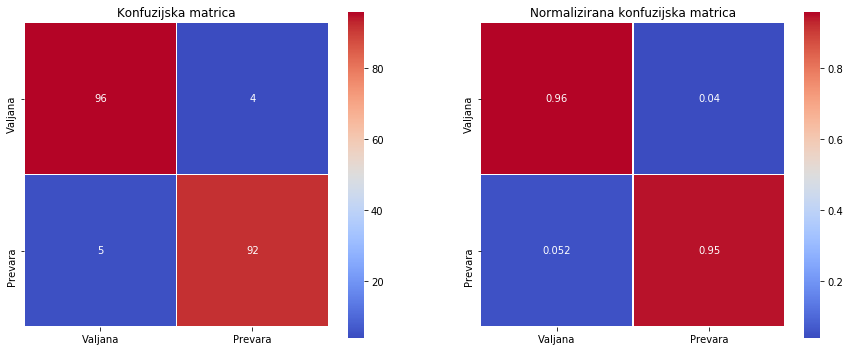

----------------------------------------------------------------------------------------------------
CatBoost


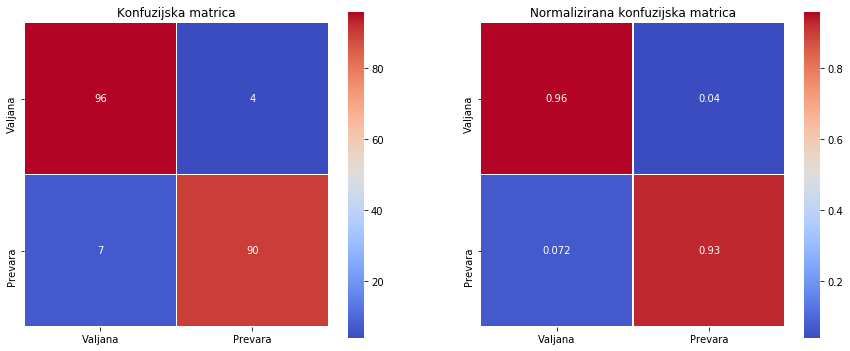

----------------------------------------------------------------------------------------------------
AdaBoost


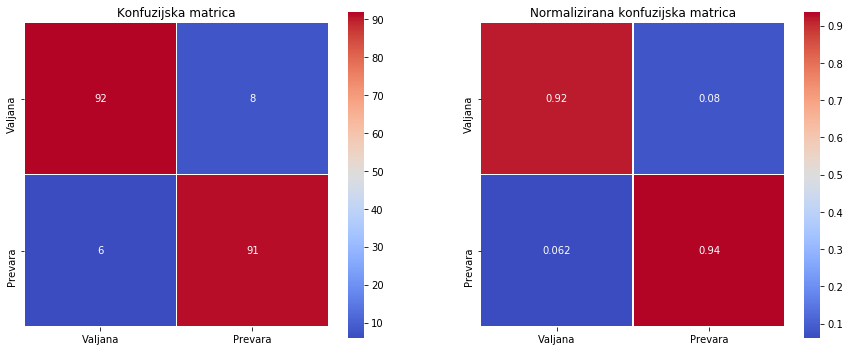

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [62]:
xgb_y_pred_usample = xgb_usample.predict(X_usample_test)
lgbm_y_pred_usample = lgbm_usample.predict(X_usample_test)
cat_y_pred_usample = cat_usample.predict(X_usample_test)
ada_y_pred_usample = ada_usample.predict(X_usample_test)

print('--'*50)
print('Testiranje (na undersampleu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_usample_test, xgb_y_pred_usample)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_usample_test, lgbm_y_pred_usample)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_usample_test, cat_y_pred_usample)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_usample_test, ada_y_pred_usample)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_usample_test, xgb_y_pred_usample))
print('--'*50)
print('LGBM')
print(classification_report(y_usample_test, lgbm_y_pred_usample))
print('--'*50)
print('CatBoost')
print(classification_report(y_usample_test, cat_y_pred_usample))
print('--'*50)
print('AdaBoost')
print(classification_report(y_usample_test, ada_y_pred_usample))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_usample_test, xgb_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_usample_test, lgbm_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_usample_test, cat_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_usample_test, ada_y_pred_usample), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('*'*100)


----------------------------------------------------------------------------------------------------
Testiranje (na cijelom datasetu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 4.63%
	Recall score: 98.98%
	F1 score: 8.85%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 4.55%
	Recall score: 100.0%
	F1 score: 8.709999999999999%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 5.48%
	Recall score: 98.98%
	F1 score: 10.39%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 3.25%
	Recall score: 98.98%
	F1 score: 6.3%
-----------------------------------------------

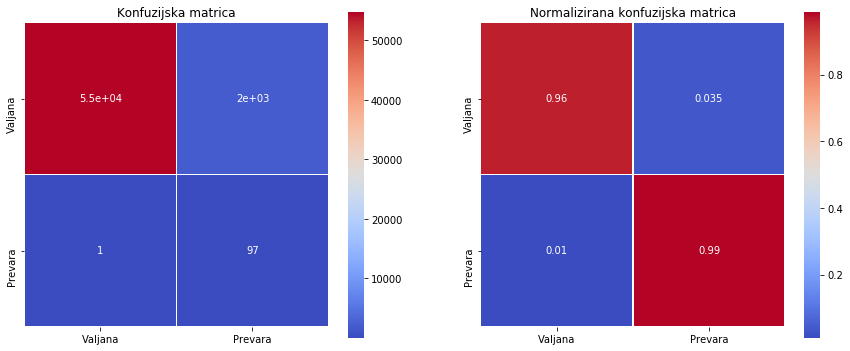

----------------------------------------------------------------------------------------------------
LGBM


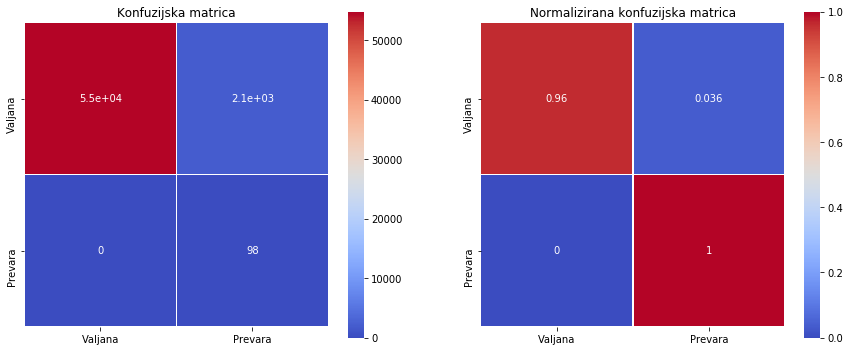

----------------------------------------------------------------------------------------------------
CatBoost


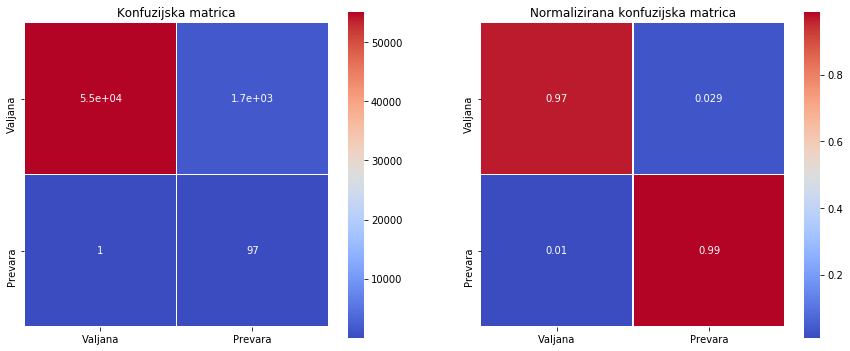

----------------------------------------------------------------------------------------------------
AdaBoost


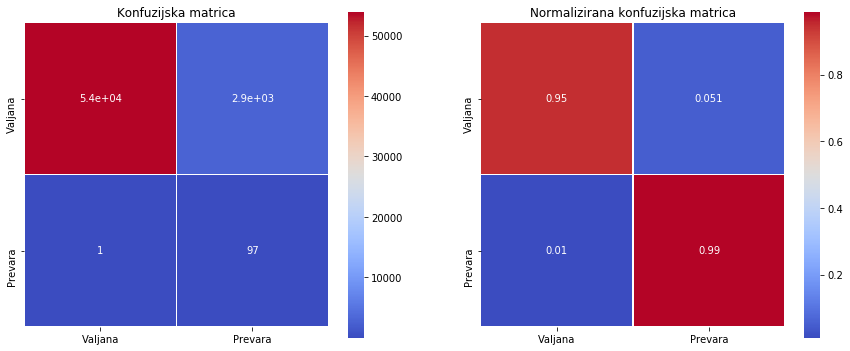

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [64]:
xgb_y_pred_full = xgb_usample.predict(X_data_test)
lgbm_y_pred_full = lgbm_usample.predict(X_data_test)
cat_y_pred_full = cat_usample.predict(X_data_test)
ada_y_pred_full = ada_usample.predict(X_data_test)

print('--'*50)
print('Testiranje (na cijelom datasetu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_data_test, xgb_y_pred_full)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_data_test, lgbm_y_pred_full)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_data_test, cat_y_pred_full)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_data_test, ada_y_pred_full)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_data_test, xgb_y_pred_full))
print('--'*50)
print('LGBM')
print(classification_report(y_data_test, lgbm_y_pred_full))
print('--'*50)
print('CatBoost')
print(classification_report(y_data_test, cat_y_pred_full))
print('--'*50)
print('AdaBoost')
print(classification_report(y_data_test, ada_y_pred_full))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_data_test, xgb_y_pred_full), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_data_test, lgbm_y_pred_full), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, cat_y_pred_full), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, ada_y_pred_full), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)


In [65]:
#parametri

xgb_gamma = [0, 1, 5]
xgb_max_depth = [1, 2, 3, 4, 5]
xgb_colsample_bytree = [0.3, 0.5, 0.8]
xgb_learning_rate = [0.1, 0.05, 0.01]
xgb_n_estimators = [10, 20, 50, 100]
xgb_params = {'gamma': xgb_gamma, 'max_depth': xgb_max_depth, 'colsample_bytree': xgb_colsample_bytree, 
              'learning_rate': xgb_learning_rate, 'n_estimators': xgb_n_estimators}

grid_xgb = GridSearchCV(XGBClassifier(), xgb_params)
grid_xgb.fit(X_usample_train, y_usample_train)
xgb_params_usample = grid_xgb.best_estimator_
xgb_params_best = grid_xgb.best_params_

In [66]:
#gdbt = gradient boosting decision tree
#goss = gradient-based one side sampling
#rf = random forest
#dart = dropouts meets multiple additive regression trees

lgbm_boosting_type = ['gbdt', 'goss', 'rf', 'dart']
lgbm_max_depth = xgb_max_depth
lgbm_learning_rate = xgb_learning_rate
lgbm_colsample_bytree = xgb_colsample_bytree
lgbm_n_estimators = xgb_n_estimators
lgbm_params = {'boosting_type': lgbm_boosting_type, 'max_depth': lgbm_max_depth, 'colsample_bytree': lgbm_colsample_bytree, 
               'learning_rate': lgbm_learning_rate, 'n_estimators': lgbm_n_estimators}

grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params)
grid_lgbm.fit(X_usample_train, y_usample_train)
lgbm_params_usample = grid_lgbm.best_estimator_
lgbm_params_best = grid_lgbm.best_params_

C:\Users\stvar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at c:\users\vssadministrator\appdata\local\temp\pip-req-build-ly8oxa6y\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


In [67]:
cat_depth = xgb_max_depth
cat_learning_rate = xgb_learning_rate
# cat_iterations = [10, 25, 50, 100]
cat_n_estimators = xgb_n_estimators
cat_params = {'depth': cat_depth, 'learning_rate': cat_learning_rate, 'n_estimators': cat_n_estimators }

grid_cat = GridSearchCV(CatBoostClassifier(silent=True), cat_params)
grid_cat.fit(X_usample_train, y_usample_train)
cat_params_usample = grid_cat.best_estimator_
cat_params_best = grid_cat.best_params_

In [68]:
ada_criterion = ['gini', 'entropy']
ada_max_depth = xgb_max_depth
ada_splitter = ['best', 'random']
ada_n_estimators = xgb_n_estimators
ada_learning_rate = xgb_learning_rate
ada_params = {'n_estimators': ada_n_estimators, 'learning_rate': ada_learning_rate}

ada_params = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_depth": xgb_max_depth,
              "n_estimators": xgb_n_estimators,
              "learning_rate": xgb_learning_rate
             }

grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), ada_params)
grid_ada.fit(X_usample_train, y_usample_train)
ada_params_usample = grid_ada.best_estimator_
ada_params_best = grid_ada.best_params_

In [69]:
xgb_training_score_params_usample = cross_val_score(xgb_params_usample, X_usample_train, y_usample_train, cv=skfold)
lgbm_training_score_params_usample = cross_val_score(lgbm_params_usample, X_usample_train, y_usample_train, cv=skfold)
cat_training_score_params_usample = cross_val_score(cat_params_usample, X_usample_train, y_usample_train, cv=skfold)
ada_training_score_params_usample = cross_val_score(ada_params_usample, X_usample_train, y_usample_train, cv=skfold)

print('Treniranje (sa parametrima)')
print('-'*100)
print('XGB')
print('Najbolji parametri: ' + str(xgb_params_best))
print('Rezultat treniranja: ' + str(round(xgb_training_score_params_usample.mean(), 4) * 100) + '%')
print('-'*100)
print('LGBM')
print('Najbolji parametri: ' + str(lgbm_params_best))
print('Rezultat treniranja: ' + str(round(lgbm_training_score_params_usample.mean(), 4) * 100) + '%')
print('-'*100)
print('CatBoost')
print('Najbolji parametri: ' + str(cat_params_best))
print('Rezultat treniranja: ' + str(round(cat_training_score_params_usample.mean(), 4) * 100) + '%')
print('-'*100)
print('AdaBoost')
print('Najbolji parametri: ' + str(ada_params_best))
print('Rezultat treniranja: ' + str(round(ada_training_score_params_usample.mean(), 4) * 100) + '%')

Treniranje (sa parametrima)
----------------------------------------------------------------------------------------------------
XGB
Najbolji parametri: {'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Rezultat treniranja: 93.52000000000001%
----------------------------------------------------------------------------------------------------
LGBM
Najbolji parametri: {'boosting_type': 'goss', 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Rezultat treniranja: 93.77%
----------------------------------------------------------------------------------------------------
CatBoost
Najbolji parametri: {'depth': 4, 'learning_rate': 0.05, 'n_estimators': 50}
Rezultat treniranja: 93.52000000000001%
----------------------------------------------------------------------------------------------------
AdaBoost
Najbolji parametri: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__s

----------------------------------------------------------------------------------------------------
Testiranje (na undersampleu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 95.7%
	Recall score: 91.75%
	F1 score: 93.67999999999999%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 95.74000000000001%
	Recall score: 92.78%
	F1 score: 94.24%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 96.7%
	Recall score: 90.72%
	F1 score: 93.62%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 97.8%
	Recall score: 91.75%
	F1 score: 94.67999999999999%
-----------------------

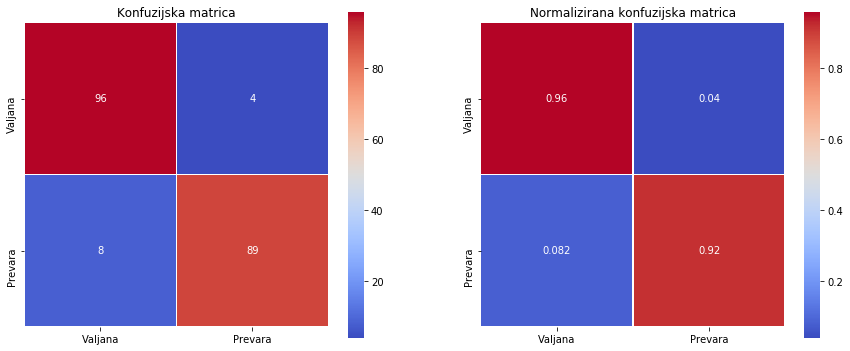

----------------------------------------------------------------------------------------------------
LGBM


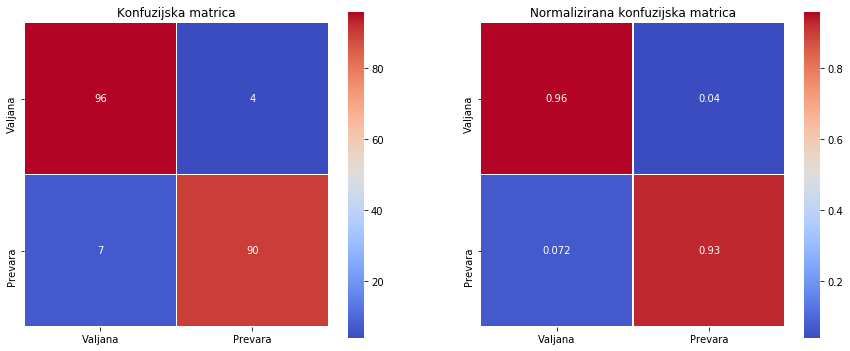

----------------------------------------------------------------------------------------------------
CatBoost


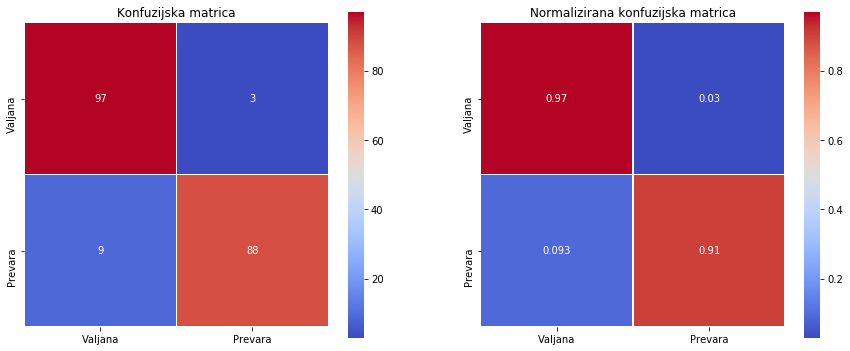

----------------------------------------------------------------------------------------------------
AdaBoost


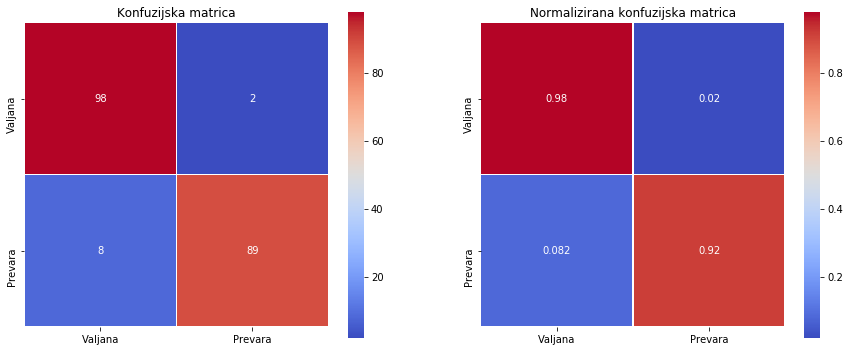

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [70]:
xgb_y_pred_usample_params = xgb_params_usample.predict(X_usample_test)
lgbm_y_pred_usample_params = lgbm_params_usample.predict(X_usample_test)
cat_y_pred_usample_params = cat_params_usample.predict(X_usample_test)
ada_y_pred_usample_params = ada_params_usample.predict(X_usample_test)

print('--'*50)
print('Testiranje (na undersampleu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_usample_test, xgb_y_pred_usample_params)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_usample_test, lgbm_y_pred_usample_params)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_usample_test, cat_y_pred_usample_params)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_usample_test, ada_y_pred_usample_params)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_usample_test, xgb_y_pred_usample_params))
print('--'*50)
print('LGBM')
print(classification_report(y_usample_test, lgbm_y_pred_usample_params))
print('--'*50)
print('CatBoost')
print(classification_report(y_usample_test, cat_y_pred_usample_params))
print('--'*50)
print('AdaBoost')
print(classification_report(y_usample_test, ada_y_pred_usample_params))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_usample_test, xgb_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_usample_test, lgbm_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_usample_test, cat_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_usample_test, ada_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('*'*100)


----------------------------------------------------------------------------------------------------
Testiranje (na cijelom datasetu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 5.21%
	Recall score: 98.98%
	F1 score: 9.9%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 6.11%
	Recall score: 93.88%
	F1 score: 11.48%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 7.46%
	Recall score: 93.88%
	F1 score: 13.819999999999999%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 6.43%
	Recall score: 94.89999999999999%
	F1 score: 12.049999999999999%
--------------------

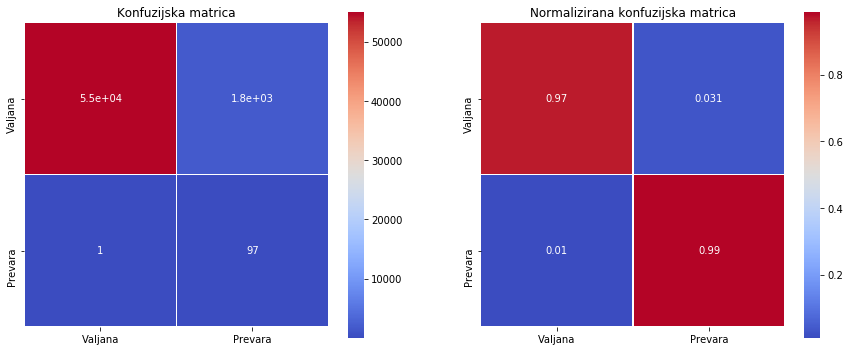

----------------------------------------------------------------------------------------------------
LGBM


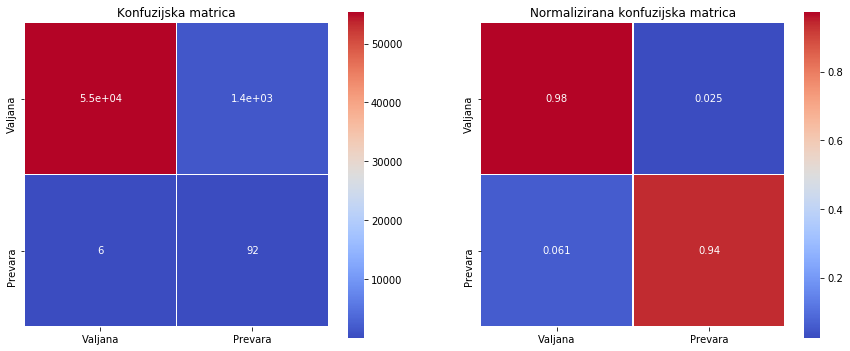

----------------------------------------------------------------------------------------------------
CatBoost


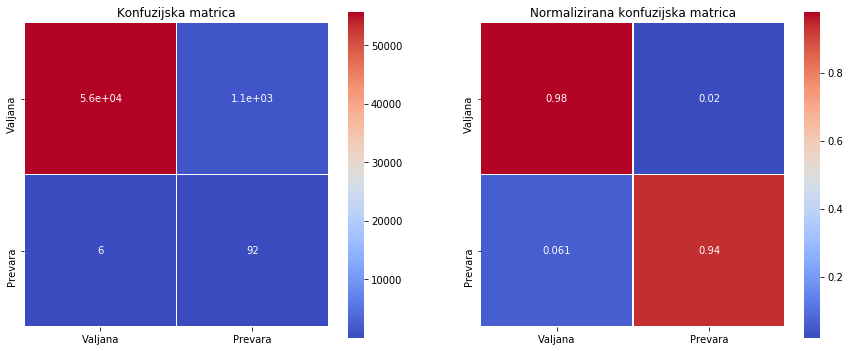

----------------------------------------------------------------------------------------------------
AdaBoost


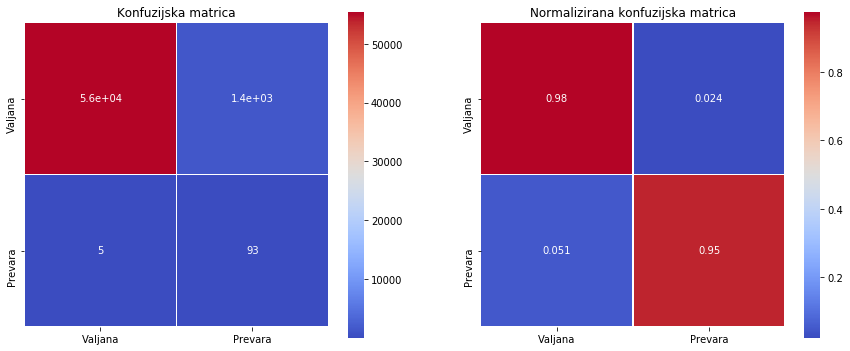

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [71]:
xgb_y_pred_full_params = xgb_params_usample.predict(X_data_test)
lgbm_y_pred_full_params = lgbm_params_usample.predict(X_data_test)
cat_y_pred_full_params = cat_params_usample.predict(X_data_test)
ada_y_pred_full_params = ada_params_usample.predict(X_data_test)

print('--'*50)
print('Testiranje (na cijelom datasetu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_data_test, xgb_y_pred_full_params)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_data_test, lgbm_y_pred_full_params)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_data_test, cat_y_pred_full_params)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_data_test, ada_y_pred_full_params)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_data_test, xgb_y_pred_full_params))
print('--'*50)
print('LGBM')
print(classification_report(y_data_test, lgbm_y_pred_full_params))
print('--'*50)
print('CatBoost')
print(classification_report(y_data_test, cat_y_pred_full_params))
print('--'*50)
print('AdaBoost')
print(classification_report(y_data_test, ada_y_pred_full_params))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_data_test, xgb_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_data_test, lgbm_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, cat_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, ada_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)


In [72]:
#bez outliera
grid_xgb_cut = GridSearchCV(XGBClassifier(), xgb_params)
grid_xgb_cut.fit(X_usample_cut_train, y_usample_cut_train)
xgb_params_usample_cut = grid_xgb_cut.best_estimator_
xgb_params_cut = grid_xgb_cut.best_params_

grid_lgbm_cut = GridSearchCV(LGBMClassifier(), lgbm_params)
grid_lgbm_cut.fit(X_usample_cut_train, y_usample_cut_train)
lgbm_params_usample_cut = grid_lgbm_cut.best_estimator_
lgbm_params_cut = grid_lgbm_cut.best_params_

grid_cat_cut = GridSearchCV(CatBoostClassifier(silent=True), cat_params)
grid_cat_cut.fit(X_usample_cut_train, y_usample_cut_train)
cat_params_usample_cut = grid_cat_cut.best_estimator_
cat_params_cut = grid_cat_cut.best_params_

grid_ada_cut = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), ada_params)
grid_ada_cut.fit(X_usample_cut_train, y_usample_cut_train)
ada_params_usample_cut = grid_ada_cut.best_estimator_
ada_params_cut = grid_ada_cut.best_params_

C:\Users\stvar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at c:\users\vssadministrator\appdata\local\temp\pip-req-build-ly8oxa6y\compile\src\boosting\rf.hpp, line 35 .


  FitFailedWarning)


0:	learn: 0.6076328	total: 2.61ms	remaining: 23.5ms
1:	learn: 0.5291454	total: 5.79ms	remaining: 23.2ms
2:	learn: 0.4808244	total: 7.99ms	remaining: 18.7ms
3:	learn: 0.4419107	total: 9.93ms	remaining: 14.9ms
4:	learn: 0.3914985	total: 12.1ms	remaining: 12.1ms
5:	learn: 0.3606069	total: 14ms	remaining: 9.32ms
6:	learn: 0.3338150	total: 15.9ms	remaining: 6.8ms
7:	learn: 0.3117119	total: 18ms	remaining: 4.49ms
8:	learn: 0.2915937	total: 20.2ms	remaining: 2.24ms
9:	learn: 0.2783814	total: 22.3ms	remaining: 0us
0:	learn: 0.6048861	total: 2ms	remaining: 18ms
1:	learn: 0.5204421	total: 3.5ms	remaining: 14ms
2:	learn: 0.4765063	total: 4.97ms	remaining: 11.6ms
3:	learn: 0.4083796	total: 6.61ms	remaining: 9.91ms
4:	learn: 0.3835262	total: 8.49ms	remaining: 8.49ms
5:	learn: 0.3533935	total: 9.97ms	remaining: 6.65ms
6:	learn: 0.3340376	total: 11.5ms	remaining: 4.92ms
7:	learn: 0.3086367	total: 13ms	remaining: 3.25ms
8:	learn: 0.2928738	total: 14.5ms	remaining: 1.61ms
9:	learn: 0.2799243	total: 16m

0:	learn: 0.6048861	total: 2.45ms	remaining: 120ms
1:	learn: 0.5204421	total: 4.33ms	remaining: 104ms
2:	learn: 0.4765063	total: 6.19ms	remaining: 97ms
3:	learn: 0.4083796	total: 8.2ms	remaining: 94.3ms
4:	learn: 0.3835262	total: 9.87ms	remaining: 88.8ms
5:	learn: 0.3533935	total: 11.4ms	remaining: 83.8ms
6:	learn: 0.3340376	total: 12.9ms	remaining: 79.3ms
7:	learn: 0.3086367	total: 14.4ms	remaining: 75.7ms
8:	learn: 0.2928738	total: 15.9ms	remaining: 72.5ms
9:	learn: 0.2799243	total: 17.4ms	remaining: 69.7ms
10:	learn: 0.2673061	total: 18.9ms	remaining: 67ms
11:	learn: 0.2583438	total: 21.2ms	remaining: 67.2ms
12:	learn: 0.2500288	total: 23.2ms	remaining: 66.1ms
13:	learn: 0.2415985	total: 24.7ms	remaining: 63.6ms
14:	learn: 0.2329256	total: 26.4ms	remaining: 61.6ms
15:	learn: 0.2274011	total: 27.8ms	remaining: 59.1ms
16:	learn: 0.2213684	total: 29.3ms	remaining: 56.8ms
17:	learn: 0.2163389	total: 30.8ms	remaining: 54.7ms
18:	learn: 0.2114487	total: 32.3ms	remaining: 52.7ms
19:	learn:

47:	learn: 0.1589675	total: 74ms	remaining: 3.08ms
48:	learn: 0.1578029	total: 75.9ms	remaining: 1.55ms
49:	learn: 0.1574074	total: 77.8ms	remaining: 0us
0:	learn: 0.6076328	total: 2.06ms	remaining: 204ms
1:	learn: 0.5291454	total: 3.65ms	remaining: 179ms
2:	learn: 0.4808244	total: 5.24ms	remaining: 169ms
3:	learn: 0.4419107	total: 6.74ms	remaining: 162ms
4:	learn: 0.3914985	total: 8.58ms	remaining: 163ms
5:	learn: 0.3606069	total: 10.2ms	remaining: 159ms
6:	learn: 0.3338150	total: 11.8ms	remaining: 157ms
7:	learn: 0.3117119	total: 13.8ms	remaining: 158ms
8:	learn: 0.2915937	total: 15.6ms	remaining: 158ms
9:	learn: 0.2783814	total: 17.4ms	remaining: 157ms
10:	learn: 0.2700246	total: 19ms	remaining: 154ms
11:	learn: 0.2604437	total: 20.4ms	remaining: 150ms
12:	learn: 0.2508413	total: 21.9ms	remaining: 147ms
13:	learn: 0.2363545	total: 23.4ms	remaining: 144ms
14:	learn: 0.2322636	total: 25ms	remaining: 142ms
15:	learn: 0.2251716	total: 27ms	remaining: 142ms
16:	learn: 0.2208455	total: 28

1:	learn: 0.5303014	total: 3.34ms	remaining: 164ms
2:	learn: 0.4880433	total: 5.19ms	remaining: 168ms
3:	learn: 0.4365010	total: 6.91ms	remaining: 166ms
4:	learn: 0.4020034	total: 8.45ms	remaining: 161ms
5:	learn: 0.3711281	total: 10.1ms	remaining: 158ms
6:	learn: 0.3445731	total: 11.7ms	remaining: 155ms
7:	learn: 0.3262063	total: 13.2ms	remaining: 152ms
8:	learn: 0.3043545	total: 15.3ms	remaining: 155ms
9:	learn: 0.2913718	total: 17ms	remaining: 153ms
10:	learn: 0.2790537	total: 18.6ms	remaining: 150ms
11:	learn: 0.2672420	total: 20ms	remaining: 147ms
12:	learn: 0.2605822	total: 21.7ms	remaining: 146ms
13:	learn: 0.2534428	total: 23.5ms	remaining: 145ms
14:	learn: 0.2445010	total: 25.4ms	remaining: 144ms
15:	learn: 0.2399543	total: 27.4ms	remaining: 144ms
16:	learn: 0.2360641	total: 29.6ms	remaining: 144ms
17:	learn: 0.2306588	total: 31.4ms	remaining: 143ms
18:	learn: 0.2259748	total: 33.7ms	remaining: 144ms
19:	learn: 0.2221787	total: 35.7ms	remaining: 143ms
20:	learn: 0.2179346	tota

0:	learn: 0.6048318	total: 2.19ms	remaining: 217ms
1:	learn: 0.5264091	total: 4.34ms	remaining: 213ms
2:	learn: 0.4568135	total: 6.56ms	remaining: 212ms
3:	learn: 0.4181678	total: 8.6ms	remaining: 207ms
4:	learn: 0.3926328	total: 10.6ms	remaining: 202ms
5:	learn: 0.3638198	total: 12.5ms	remaining: 196ms
6:	learn: 0.3432608	total: 14.5ms	remaining: 192ms
7:	learn: 0.3224961	total: 16.4ms	remaining: 189ms
8:	learn: 0.2976606	total: 18.5ms	remaining: 187ms
9:	learn: 0.2844058	total: 20.5ms	remaining: 185ms
10:	learn: 0.2727081	total: 22.6ms	remaining: 183ms
11:	learn: 0.2616586	total: 24.3ms	remaining: 178ms
12:	learn: 0.2496584	total: 26.5ms	remaining: 177ms
13:	learn: 0.2418850	total: 28.1ms	remaining: 173ms
14:	learn: 0.2357400	total: 29.9ms	remaining: 170ms
15:	learn: 0.2289311	total: 31.5ms	remaining: 165ms
16:	learn: 0.2248970	total: 33ms	remaining: 161ms
17:	learn: 0.2205470	total: 34.5ms	remaining: 157ms
18:	learn: 0.2124202	total: 36.1ms	remaining: 154ms
19:	learn: 0.2075292	tota

1:	learn: 0.6038739	total: 4.22ms	remaining: 38ms
2:	learn: 0.5636203	total: 6.27ms	remaining: 35.5ms
3:	learn: 0.5263769	total: 8.33ms	remaining: 33.3ms
4:	learn: 0.4999847	total: 10ms	remaining: 30ms
5:	learn: 0.4733753	total: 11.7ms	remaining: 27.3ms
6:	learn: 0.4472505	total: 14ms	remaining: 25.9ms
7:	learn: 0.4258534	total: 16.3ms	remaining: 24.4ms
8:	learn: 0.4101904	total: 18ms	remaining: 22ms
9:	learn: 0.3987045	total: 19.7ms	remaining: 19.7ms
10:	learn: 0.3841371	total: 21.4ms	remaining: 17.5ms
11:	learn: 0.3697473	total: 23.1ms	remaining: 15.4ms
12:	learn: 0.3591933	total: 24.7ms	remaining: 13.3ms
13:	learn: 0.3478989	total: 26.4ms	remaining: 11.3ms
14:	learn: 0.3388996	total: 28.1ms	remaining: 9.35ms
15:	learn: 0.3303023	total: 29.8ms	remaining: 7.45ms
16:	learn: 0.3210145	total: 31.5ms	remaining: 5.56ms
17:	learn: 0.3125732	total: 33ms	remaining: 3.67ms
18:	learn: 0.3048638	total: 34.7ms	remaining: 1.83ms
19:	learn: 0.2966290	total: 36.8ms	remaining: 0us
0:	learn: 0.6471692

0:	learn: 0.6484557	total: 2.03ms	remaining: 99.3ms
1:	learn: 0.6038739	total: 4.12ms	remaining: 98.8ms
2:	learn: 0.5636203	total: 6.38ms	remaining: 100ms
3:	learn: 0.5263769	total: 8.37ms	remaining: 96.3ms
4:	learn: 0.4999847	total: 10.3ms	remaining: 93ms
5:	learn: 0.4733753	total: 12.3ms	remaining: 90.2ms
6:	learn: 0.4472505	total: 14.3ms	remaining: 87.8ms
7:	learn: 0.4258534	total: 16.4ms	remaining: 85.9ms
8:	learn: 0.4101904	total: 18.4ms	remaining: 83.7ms
9:	learn: 0.3987045	total: 20.4ms	remaining: 81.5ms
10:	learn: 0.3841371	total: 22.4ms	remaining: 79.4ms
11:	learn: 0.3697473	total: 24.4ms	remaining: 77.2ms
12:	learn: 0.3591933	total: 26.3ms	remaining: 74.9ms
13:	learn: 0.3478989	total: 28.3ms	remaining: 72.7ms
14:	learn: 0.3388996	total: 30.3ms	remaining: 70.6ms
15:	learn: 0.3303023	total: 32.2ms	remaining: 68.4ms
16:	learn: 0.3210145	total: 34.1ms	remaining: 66.1ms
17:	learn: 0.3125732	total: 36.1ms	remaining: 64.2ms
18:	learn: 0.3048638	total: 38.1ms	remaining: 62.2ms
19:	le

32:	learn: 0.2285984	total: 163ms	remaining: 331ms
33:	learn: 0.2253581	total: 169ms	remaining: 329ms
34:	learn: 0.2234328	total: 174ms	remaining: 322ms
35:	learn: 0.2211675	total: 178ms	remaining: 317ms
36:	learn: 0.2189936	total: 183ms	remaining: 312ms
37:	learn: 0.2171139	total: 187ms	remaining: 305ms
38:	learn: 0.2152101	total: 190ms	remaining: 297ms
39:	learn: 0.2145456	total: 193ms	remaining: 290ms
40:	learn: 0.2130540	total: 195ms	remaining: 281ms
41:	learn: 0.2109943	total: 198ms	remaining: 273ms
42:	learn: 0.2093085	total: 199ms	remaining: 264ms
43:	learn: 0.2077243	total: 201ms	remaining: 256ms
44:	learn: 0.2066393	total: 204ms	remaining: 249ms
45:	learn: 0.2052991	total: 205ms	remaining: 241ms
46:	learn: 0.2048675	total: 207ms	remaining: 234ms
47:	learn: 0.2036780	total: 210ms	remaining: 227ms
48:	learn: 0.2021313	total: 211ms	remaining: 220ms
49:	learn: 0.2008885	total: 213ms	remaining: 213ms
50:	learn: 0.2003017	total: 215ms	remaining: 206ms
51:	learn: 0.1993218	total: 217

0:	learn: 0.6484557	total: 2.12ms	remaining: 210ms
1:	learn: 0.6038739	total: 4.32ms	remaining: 212ms
2:	learn: 0.5636203	total: 6.87ms	remaining: 222ms
3:	learn: 0.5263769	total: 9.97ms	remaining: 239ms
4:	learn: 0.4999847	total: 11.9ms	remaining: 225ms
5:	learn: 0.4733753	total: 13.8ms	remaining: 216ms
6:	learn: 0.4472505	total: 15.9ms	remaining: 211ms
7:	learn: 0.4258534	total: 18.5ms	remaining: 213ms
8:	learn: 0.4101904	total: 20.3ms	remaining: 206ms
9:	learn: 0.3987045	total: 22ms	remaining: 198ms
10:	learn: 0.3841371	total: 24ms	remaining: 194ms
11:	learn: 0.3697473	total: 25.9ms	remaining: 190ms
12:	learn: 0.3591933	total: 28ms	remaining: 187ms
13:	learn: 0.3478989	total: 30.6ms	remaining: 188ms
14:	learn: 0.3388996	total: 32.8ms	remaining: 186ms
15:	learn: 0.3303023	total: 34.9ms	remaining: 183ms
16:	learn: 0.3210145	total: 36.9ms	remaining: 180ms
17:	learn: 0.3125732	total: 38.6ms	remaining: 176ms
18:	learn: 0.3048638	total: 40.6ms	remaining: 173ms
19:	learn: 0.2966290	total: 

95:	learn: 0.1876837	total: 185ms	remaining: 7.7ms
96:	learn: 0.1869258	total: 187ms	remaining: 5.77ms
97:	learn: 0.1864656	total: 189ms	remaining: 3.85ms
98:	learn: 0.1857255	total: 191ms	remaining: 1.93ms
99:	learn: 0.1851340	total: 193ms	remaining: 0us
0:	learn: 0.6471692	total: 1.95ms	remaining: 193ms
1:	learn: 0.6016919	total: 3.62ms	remaining: 177ms
2:	learn: 0.5551473	total: 5.67ms	remaining: 183ms
3:	learn: 0.5280235	total: 7.46ms	remaining: 179ms
4:	learn: 0.4993232	total: 9.41ms	remaining: 179ms
5:	learn: 0.4692026	total: 11.1ms	remaining: 173ms
6:	learn: 0.4465333	total: 12.7ms	remaining: 169ms
7:	learn: 0.4299863	total: 14.3ms	remaining: 165ms
8:	learn: 0.4040315	total: 15.8ms	remaining: 160ms
9:	learn: 0.3889655	total: 18ms	remaining: 162ms
10:	learn: 0.3721024	total: 19.5ms	remaining: 158ms
11:	learn: 0.3537058	total: 21.4ms	remaining: 157ms
12:	learn: 0.3432624	total: 23ms	remaining: 154ms
13:	learn: 0.3320555	total: 24.8ms	remaining: 152ms
14:	learn: 0.3237791	total: 26

1:	learn: 0.6726634	total: 4.94ms	remaining: 44.5ms
2:	learn: 0.6601739	total: 6.6ms	remaining: 37.4ms
3:	learn: 0.6474196	total: 8.55ms	remaining: 34.2ms
4:	learn: 0.6378508	total: 10.2ms	remaining: 30.5ms
5:	learn: 0.6275717	total: 12.1ms	remaining: 28.3ms
6:	learn: 0.6182173	total: 13.7ms	remaining: 25.5ms
7:	learn: 0.6069290	total: 15.4ms	remaining: 23.2ms
8:	learn: 0.5978675	total: 17.6ms	remaining: 21.5ms
9:	learn: 0.5888752	total: 19.7ms	remaining: 19.7ms
10:	learn: 0.5788240	total: 21.6ms	remaining: 17.7ms
11:	learn: 0.5732978	total: 23.9ms	remaining: 15.9ms
12:	learn: 0.5645071	total: 25.8ms	remaining: 13.9ms
13:	learn: 0.5569051	total: 27.4ms	remaining: 11.8ms
14:	learn: 0.5503673	total: 29.4ms	remaining: 9.81ms
15:	learn: 0.5423697	total: 32ms	remaining: 8ms
16:	learn: 0.5334621	total: 33.8ms	remaining: 5.96ms
17:	learn: 0.5287863	total: 35.6ms	remaining: 3.95ms
18:	learn: 0.5217555	total: 37.2ms	remaining: 1.96ms
19:	learn: 0.5168235	total: 39.1ms	remaining: 0us
0:	learn: 0

0:	learn: 0.6839255	total: 2.46ms	remaining: 120ms
1:	learn: 0.6739356	total: 4.75ms	remaining: 114ms
2:	learn: 0.6667662	total: 7.4ms	remaining: 116ms
3:	learn: 0.6582126	total: 9.38ms	remaining: 108ms
4:	learn: 0.6488966	total: 11.3ms	remaining: 101ms
5:	learn: 0.6386413	total: 13.5ms	remaining: 98.8ms
6:	learn: 0.6286606	total: 15.1ms	remaining: 93ms
7:	learn: 0.6219382	total: 17.4ms	remaining: 91.4ms
8:	learn: 0.6129500	total: 19.2ms	remaining: 87.5ms
9:	learn: 0.6037737	total: 22.2ms	remaining: 88.7ms
10:	learn: 0.5980532	total: 24.9ms	remaining: 88.3ms
11:	learn: 0.5908235	total: 26.5ms	remaining: 83.9ms
12:	learn: 0.5830305	total: 28.4ms	remaining: 80.8ms
13:	learn: 0.5766419	total: 30.6ms	remaining: 78.7ms
14:	learn: 0.5684107	total: 32.3ms	remaining: 75.5ms
15:	learn: 0.5601600	total: 34.3ms	remaining: 72.9ms
16:	learn: 0.5531056	total: 36.2ms	remaining: 70.3ms
17:	learn: 0.5452715	total: 38.2ms	remaining: 67.9ms
18:	learn: 0.5402601	total: 40.4ms	remaining: 65.9ms
19:	learn: 

16:	learn: 0.5425662	total: 30.5ms	remaining: 149ms
17:	learn: 0.5344791	total: 32.1ms	remaining: 146ms
18:	learn: 0.5270399	total: 33.6ms	remaining: 143ms
19:	learn: 0.5217861	total: 35.3ms	remaining: 141ms
20:	learn: 0.5152181	total: 36.8ms	remaining: 139ms
21:	learn: 0.5062877	total: 38.3ms	remaining: 136ms
22:	learn: 0.5002947	total: 39.8ms	remaining: 133ms
23:	learn: 0.4937298	total: 41.4ms	remaining: 131ms
24:	learn: 0.4873636	total: 43.1ms	remaining: 129ms
25:	learn: 0.4822082	total: 44.7ms	remaining: 127ms
26:	learn: 0.4756058	total: 46.3ms	remaining: 125ms
27:	learn: 0.4712201	total: 48ms	remaining: 124ms
28:	learn: 0.4669381	total: 49.9ms	remaining: 122ms
29:	learn: 0.4605663	total: 51.7ms	remaining: 121ms
30:	learn: 0.4550308	total: 53.5ms	remaining: 119ms
31:	learn: 0.4504769	total: 55ms	remaining: 117ms
32:	learn: 0.4466560	total: 56.7ms	remaining: 115ms
33:	learn: 0.4433707	total: 58.3ms	remaining: 113ms
34:	learn: 0.4392630	total: 60.2ms	remaining: 112ms
35:	learn: 0.435

20:	learn: 0.5288785	total: 37ms	remaining: 139ms
21:	learn: 0.5222943	total: 38.6ms	remaining: 137ms
22:	learn: 0.5157525	total: 40.2ms	remaining: 135ms
23:	learn: 0.5117416	total: 41.7ms	remaining: 132ms
24:	learn: 0.5066171	total: 43.3ms	remaining: 130ms
25:	learn: 0.5020069	total: 45ms	remaining: 128ms
26:	learn: 0.4970658	total: 46.5ms	remaining: 126ms
27:	learn: 0.4919934	total: 48.1ms	remaining: 124ms
28:	learn: 0.4860544	total: 49.8ms	remaining: 122ms
29:	learn: 0.4807279	total: 52.2ms	remaining: 122ms
30:	learn: 0.4775985	total: 54.1ms	remaining: 120ms
31:	learn: 0.4716593	total: 55.8ms	remaining: 119ms
32:	learn: 0.4678593	total: 57.5ms	remaining: 117ms
33:	learn: 0.4642343	total: 59.1ms	remaining: 115ms
34:	learn: 0.4595862	total: 60.8ms	remaining: 113ms
35:	learn: 0.4562674	total: 62.8ms	remaining: 112ms
36:	learn: 0.4520386	total: 64.7ms	remaining: 110ms
37:	learn: 0.4474649	total: 66.3ms	remaining: 108ms
38:	learn: 0.4434159	total: 68ms	remaining: 106ms
39:	learn: 0.43923

7:	learn: 0.6134675	total: 14.2ms	remaining: 163ms
8:	learn: 0.6055271	total: 16.2ms	remaining: 164ms
9:	learn: 0.5954581	total: 17.9ms	remaining: 162ms
10:	learn: 0.5872698	total: 19.8ms	remaining: 160ms
11:	learn: 0.5776691	total: 21.9ms	remaining: 160ms
12:	learn: 0.5696330	total: 23.5ms	remaining: 157ms
13:	learn: 0.5627615	total: 25.2ms	remaining: 155ms
14:	learn: 0.5546360	total: 27.4ms	remaining: 155ms
15:	learn: 0.5494194	total: 29.5ms	remaining: 155ms
16:	learn: 0.5411558	total: 31.4ms	remaining: 153ms
17:	learn: 0.5353369	total: 33.3ms	remaining: 152ms
18:	learn: 0.5307349	total: 34.9ms	remaining: 149ms
19:	learn: 0.5245427	total: 36.7ms	remaining: 147ms
20:	learn: 0.5188257	total: 38.8ms	remaining: 146ms
21:	learn: 0.5141374	total: 40.5ms	remaining: 143ms
22:	learn: 0.5084399	total: 42ms	remaining: 141ms
23:	learn: 0.5039190	total: 43.9ms	remaining: 139ms
24:	learn: 0.4986451	total: 45.8ms	remaining: 137ms
25:	learn: 0.4927947	total: 47.4ms	remaining: 135ms
26:	learn: 0.4884

0:	learn: 0.5769730	total: 3.88ms	remaining: 73.7ms
1:	learn: 0.5005132	total: 6.23ms	remaining: 56.1ms
2:	learn: 0.4398516	total: 9.39ms	remaining: 53.2ms
3:	learn: 0.3956686	total: 12.2ms	remaining: 48.8ms
4:	learn: 0.3668032	total: 15.1ms	remaining: 45.2ms
5:	learn: 0.3357164	total: 17.5ms	remaining: 40.9ms
6:	learn: 0.3089182	total: 20.6ms	remaining: 38.2ms
7:	learn: 0.2854028	total: 23.5ms	remaining: 35.3ms
8:	learn: 0.2646096	total: 26.2ms	remaining: 32ms
9:	learn: 0.2497983	total: 28.3ms	remaining: 28.3ms
10:	learn: 0.2395126	total: 30.5ms	remaining: 25ms
11:	learn: 0.2301813	total: 33.2ms	remaining: 22.1ms
12:	learn: 0.2230979	total: 36ms	remaining: 19.4ms
13:	learn: 0.2141530	total: 39.6ms	remaining: 17ms
14:	learn: 0.2078438	total: 42.5ms	remaining: 14.2ms
15:	learn: 0.2020933	total: 45.1ms	remaining: 11.3ms
16:	learn: 0.1979246	total: 47.9ms	remaining: 8.46ms
17:	learn: 0.1933238	total: 50.1ms	remaining: 5.57ms
18:	learn: 0.1895688	total: 52.7ms	remaining: 2.77ms
19:	learn: 

0:	learn: 0.5769730	total: 2.61ms	remaining: 128ms
1:	learn: 0.5005132	total: 4.59ms	remaining: 110ms
2:	learn: 0.4398516	total: 8.01ms	remaining: 125ms
3:	learn: 0.3956686	total: 10.2ms	remaining: 117ms
4:	learn: 0.3668032	total: 13.2ms	remaining: 119ms
5:	learn: 0.3357164	total: 15.8ms	remaining: 116ms
6:	learn: 0.3089182	total: 18.4ms	remaining: 113ms
7:	learn: 0.2854028	total: 20.7ms	remaining: 109ms
8:	learn: 0.2646096	total: 23.5ms	remaining: 107ms
9:	learn: 0.2497983	total: 25.8ms	remaining: 103ms
10:	learn: 0.2395126	total: 28.2ms	remaining: 99.9ms
11:	learn: 0.2301813	total: 30.5ms	remaining: 96.5ms
12:	learn: 0.2230979	total: 33.1ms	remaining: 94.3ms
13:	learn: 0.2141530	total: 35.2ms	remaining: 90.6ms
14:	learn: 0.2078438	total: 38.2ms	remaining: 89ms
15:	learn: 0.2020933	total: 41.2ms	remaining: 87.5ms
16:	learn: 0.1979246	total: 44.7ms	remaining: 86.7ms
17:	learn: 0.1933238	total: 47.6ms	remaining: 84.6ms
18:	learn: 0.1895688	total: 51ms	remaining: 83.2ms
19:	learn: 0.1865

14:	learn: 0.2109298	total: 36.1ms	remaining: 204ms
15:	learn: 0.2039635	total: 38.6ms	remaining: 203ms
16:	learn: 0.2009762	total: 40.5ms	remaining: 198ms
17:	learn: 0.1983774	total: 42.5ms	remaining: 194ms
18:	learn: 0.1971029	total: 44.7ms	remaining: 191ms
19:	learn: 0.1937275	total: 47ms	remaining: 188ms
20:	learn: 0.1891208	total: 49.1ms	remaining: 185ms
21:	learn: 0.1863303	total: 51.5ms	remaining: 182ms
22:	learn: 0.1842799	total: 53.4ms	remaining: 179ms
23:	learn: 0.1803876	total: 55.9ms	remaining: 177ms
24:	learn: 0.1770169	total: 59.6ms	remaining: 179ms
25:	learn: 0.1746417	total: 62.7ms	remaining: 178ms
26:	learn: 0.1731406	total: 65.9ms	remaining: 178ms
27:	learn: 0.1724822	total: 68ms	remaining: 175ms
28:	learn: 0.1705927	total: 71.3ms	remaining: 174ms
29:	learn: 0.1688441	total: 74.5ms	remaining: 174ms
30:	learn: 0.1677659	total: 76.8ms	remaining: 171ms
31:	learn: 0.1663517	total: 79.3ms	remaining: 169ms
32:	learn: 0.1637395	total: 82.8ms	remaining: 168ms
33:	learn: 0.162

78:	learn: 0.1054373	total: 206ms	remaining: 54.8ms
79:	learn: 0.1036429	total: 209ms	remaining: 52.2ms
80:	learn: 0.1034981	total: 212ms	remaining: 49.6ms
81:	learn: 0.1033051	total: 214ms	remaining: 47ms
82:	learn: 0.1023639	total: 217ms	remaining: 44.5ms
83:	learn: 0.1021091	total: 220ms	remaining: 41.9ms
84:	learn: 0.1011013	total: 222ms	remaining: 39.2ms
85:	learn: 0.1009637	total: 224ms	remaining: 36.5ms
86:	learn: 0.1007154	total: 226ms	remaining: 33.8ms
87:	learn: 0.0996493	total: 228ms	remaining: 31.2ms
88:	learn: 0.0980160	total: 230ms	remaining: 28.5ms
89:	learn: 0.0965511	total: 232ms	remaining: 25.8ms
90:	learn: 0.0963744	total: 234ms	remaining: 23.2ms
91:	learn: 0.0957569	total: 237ms	remaining: 20.6ms
92:	learn: 0.0946907	total: 239ms	remaining: 18ms
93:	learn: 0.0945640	total: 241ms	remaining: 15.4ms
94:	learn: 0.0938075	total: 244ms	remaining: 12.8ms
95:	learn: 0.0928722	total: 246ms	remaining: 10.2ms
96:	learn: 0.0916792	total: 248ms	remaining: 7.68ms
97:	learn: 0.090

93:	learn: 0.1042006	total: 229ms	remaining: 14.6ms
94:	learn: 0.1039893	total: 232ms	remaining: 12.2ms
95:	learn: 0.1033381	total: 235ms	remaining: 9.8ms
96:	learn: 0.1031054	total: 238ms	remaining: 7.35ms
97:	learn: 0.1024606	total: 240ms	remaining: 4.89ms
98:	learn: 0.1014154	total: 242ms	remaining: 2.44ms
99:	learn: 0.1012342	total: 244ms	remaining: 0us
0:	learn: 0.5854519	total: 3.73ms	remaining: 369ms
1:	learn: 0.5107840	total: 5.78ms	remaining: 283ms
2:	learn: 0.4340650	total: 8.44ms	remaining: 273ms
3:	learn: 0.3782904	total: 10.6ms	remaining: 253ms
4:	learn: 0.3490878	total: 12.7ms	remaining: 241ms
5:	learn: 0.3211757	total: 15.9ms	remaining: 249ms
6:	learn: 0.3000637	total: 18ms	remaining: 239ms
7:	learn: 0.2820950	total: 20.3ms	remaining: 234ms
8:	learn: 0.2599928	total: 22.5ms	remaining: 227ms
9:	learn: 0.2455720	total: 25.1ms	remaining: 225ms
10:	learn: 0.2317256	total: 29.4ms	remaining: 238ms
11:	learn: 0.2208320	total: 33.1ms	remaining: 243ms
12:	learn: 0.2124979	total: 

15:	learn: 0.2823005	total: 47.9ms	remaining: 12ms
16:	learn: 0.2728768	total: 51.2ms	remaining: 9.03ms
17:	learn: 0.2644600	total: 53.7ms	remaining: 5.96ms
18:	learn: 0.2587228	total: 55.8ms	remaining: 2.94ms
19:	learn: 0.2514604	total: 58.3ms	remaining: 0us
0:	learn: 0.6170599	total: 3.84ms	remaining: 73ms
1:	learn: 0.5733089	total: 6.57ms	remaining: 59.1ms
2:	learn: 0.5230350	total: 8.68ms	remaining: 49.2ms
3:	learn: 0.4827408	total: 11ms	remaining: 44ms
4:	learn: 0.4470553	total: 13.1ms	remaining: 39.3ms
5:	learn: 0.4213660	total: 15.2ms	remaining: 35.6ms
6:	learn: 0.3917771	total: 18.3ms	remaining: 34ms
7:	learn: 0.3699056	total: 21.1ms	remaining: 31.7ms
8:	learn: 0.3568810	total: 24.2ms	remaining: 29.6ms
9:	learn: 0.3362679	total: 26.5ms	remaining: 26.5ms
10:	learn: 0.3206246	total: 29.4ms	remaining: 24.1ms
11:	learn: 0.3061777	total: 31.9ms	remaining: 21.3ms
12:	learn: 0.2976936	total: 34.1ms	remaining: 18.3ms
13:	learn: 0.2866786	total: 36.4ms	remaining: 15.6ms
14:	learn: 0.279

0:	learn: 0.6319104	total: 4.36ms	remaining: 214ms
1:	learn: 0.5859794	total: 7.79ms	remaining: 187ms
2:	learn: 0.5399716	total: 12.2ms	remaining: 191ms
3:	learn: 0.5111854	total: 15.8ms	remaining: 181ms
4:	learn: 0.4706221	total: 18.4ms	remaining: 165ms
5:	learn: 0.4383625	total: 23.2ms	remaining: 170ms
6:	learn: 0.4125402	total: 29.1ms	remaining: 179ms
7:	learn: 0.3931459	total: 31.3ms	remaining: 165ms
8:	learn: 0.3730056	total: 34.3ms	remaining: 156ms
9:	learn: 0.3567187	total: 37.7ms	remaining: 151ms
10:	learn: 0.3421266	total: 41.2ms	remaining: 146ms
11:	learn: 0.3288017	total: 43.6ms	remaining: 138ms
12:	learn: 0.3122775	total: 45.7ms	remaining: 130ms
13:	learn: 0.3009938	total: 49.2ms	remaining: 127ms
14:	learn: 0.2909365	total: 53.5ms	remaining: 125ms
15:	learn: 0.2822768	total: 55.8ms	remaining: 119ms
16:	learn: 0.2771360	total: 58.2ms	remaining: 113ms
17:	learn: 0.2678949	total: 61.3ms	remaining: 109ms
18:	learn: 0.2602459	total: 65.3ms	remaining: 107ms
19:	learn: 0.2552749	t

25:	learn: 0.2250868	total: 78.8ms	remaining: 224ms
26:	learn: 0.2219603	total: 81ms	remaining: 219ms
27:	learn: 0.2178115	total: 83.3ms	remaining: 214ms
28:	learn: 0.2139316	total: 87.6ms	remaining: 214ms
29:	learn: 0.2108073	total: 91.3ms	remaining: 213ms
30:	learn: 0.2087219	total: 93.7ms	remaining: 209ms
31:	learn: 0.2058204	total: 96.4ms	remaining: 205ms
32:	learn: 0.2037978	total: 99.4ms	remaining: 202ms
33:	learn: 0.2020282	total: 102ms	remaining: 198ms
34:	learn: 0.1997540	total: 104ms	remaining: 194ms
35:	learn: 0.1968532	total: 106ms	remaining: 189ms
36:	learn: 0.1932869	total: 109ms	remaining: 186ms
37:	learn: 0.1918964	total: 112ms	remaining: 182ms
38:	learn: 0.1901225	total: 115ms	remaining: 179ms
39:	learn: 0.1885496	total: 117ms	remaining: 176ms
40:	learn: 0.1868163	total: 119ms	remaining: 172ms
41:	learn: 0.1853081	total: 123ms	remaining: 170ms
42:	learn: 0.1847827	total: 126ms	remaining: 167ms
43:	learn: 0.1830135	total: 128ms	remaining: 163ms
44:	learn: 0.1819207	tota

9:	learn: 0.3567187	total: 22.1ms	remaining: 199ms
10:	learn: 0.3421266	total: 24.2ms	remaining: 196ms
11:	learn: 0.3288017	total: 26.1ms	remaining: 191ms
12:	learn: 0.3122775	total: 28.4ms	remaining: 190ms
13:	learn: 0.3009938	total: 30.2ms	remaining: 186ms
14:	learn: 0.2909365	total: 32.3ms	remaining: 183ms
15:	learn: 0.2822768	total: 34.3ms	remaining: 180ms
16:	learn: 0.2771360	total: 36.4ms	remaining: 178ms
17:	learn: 0.2678949	total: 38.3ms	remaining: 175ms
18:	learn: 0.2602459	total: 40.2ms	remaining: 171ms
19:	learn: 0.2552749	total: 42.2ms	remaining: 169ms
20:	learn: 0.2498345	total: 45ms	remaining: 169ms
21:	learn: 0.2407907	total: 47.8ms	remaining: 169ms
22:	learn: 0.2349148	total: 49.9ms	remaining: 167ms
23:	learn: 0.2282358	total: 52.4ms	remaining: 166ms
24:	learn: 0.2228214	total: 54.4ms	remaining: 163ms
25:	learn: 0.2184643	total: 56.4ms	remaining: 161ms
26:	learn: 0.2140867	total: 58.6ms	remaining: 158ms
27:	learn: 0.2100626	total: 61.2ms	remaining: 157ms
28:	learn: 0.20

77:	learn: 0.1673131	total: 199ms	remaining: 56.2ms
78:	learn: 0.1662495	total: 202ms	remaining: 53.7ms
79:	learn: 0.1656747	total: 205ms	remaining: 51.2ms
80:	learn: 0.1648580	total: 207ms	remaining: 48.6ms
81:	learn: 0.1638857	total: 210ms	remaining: 46ms
82:	learn: 0.1626765	total: 212ms	remaining: 43.4ms
83:	learn: 0.1620166	total: 214ms	remaining: 40.8ms
84:	learn: 0.1612602	total: 217ms	remaining: 38.3ms
85:	learn: 0.1600609	total: 219ms	remaining: 35.7ms
86:	learn: 0.1593966	total: 222ms	remaining: 33.1ms
87:	learn: 0.1590262	total: 224ms	remaining: 30.5ms
88:	learn: 0.1589057	total: 226ms	remaining: 27.9ms
89:	learn: 0.1582921	total: 228ms	remaining: 25.3ms
90:	learn: 0.1580308	total: 231ms	remaining: 22.8ms
91:	learn: 0.1579082	total: 233ms	remaining: 20.3ms
92:	learn: 0.1574510	total: 235ms	remaining: 17.7ms
93:	learn: 0.1569136	total: 237ms	remaining: 15.1ms
94:	learn: 0.1562058	total: 240ms	remaining: 12.6ms
95:	learn: 0.1555482	total: 241ms	remaining: 10.1ms
96:	learn: 0.1

0:	learn: 0.6813662	total: 3.04ms	remaining: 27.3ms
1:	learn: 0.6711416	total: 5.68ms	remaining: 22.7ms
2:	learn: 0.6619631	total: 7.83ms	remaining: 18.3ms
3:	learn: 0.6532793	total: 9.8ms	remaining: 14.7ms
4:	learn: 0.6391657	total: 12.2ms	remaining: 12.2ms
5:	learn: 0.6269809	total: 14.2ms	remaining: 9.47ms
6:	learn: 0.6160420	total: 16.4ms	remaining: 7.02ms
7:	learn: 0.6050988	total: 18.8ms	remaining: 4.71ms
8:	learn: 0.5939499	total: 21.1ms	remaining: 2.35ms
9:	learn: 0.5838448	total: 23.1ms	remaining: 0us
0:	learn: 0.6798832	total: 3.04ms	remaining: 57.8ms
1:	learn: 0.6686096	total: 5.72ms	remaining: 51.5ms
2:	learn: 0.6539634	total: 8.02ms	remaining: 45.5ms
3:	learn: 0.6433474	total: 10.6ms	remaining: 42.5ms
4:	learn: 0.6318379	total: 12.7ms	remaining: 38.2ms
5:	learn: 0.6224690	total: 14.8ms	remaining: 34.5ms
6:	learn: 0.6112164	total: 16.9ms	remaining: 31.4ms
7:	learn: 0.6014219	total: 19.6ms	remaining: 29.4ms
8:	learn: 0.5897747	total: 22.2ms	remaining: 27.2ms
9:	learn: 0.5798

0:	learn: 0.6771186	total: 3.43ms	remaining: 168ms
1:	learn: 0.6667243	total: 5.64ms	remaining: 135ms
2:	learn: 0.6533641	total: 8.11ms	remaining: 127ms
3:	learn: 0.6403737	total: 10.9ms	remaining: 125ms
4:	learn: 0.6287214	total: 13.3ms	remaining: 120ms
5:	learn: 0.6190829	total: 15.3ms	remaining: 112ms
6:	learn: 0.6102605	total: 17.2ms	remaining: 106ms
7:	learn: 0.5994658	total: 19.6ms	remaining: 103ms
8:	learn: 0.5871166	total: 21.8ms	remaining: 99.5ms
9:	learn: 0.5779840	total: 23.9ms	remaining: 95.4ms
10:	learn: 0.5683211	total: 26ms	remaining: 92ms
11:	learn: 0.5595277	total: 28.4ms	remaining: 89.8ms
12:	learn: 0.5501802	total: 30.5ms	remaining: 86.7ms
13:	learn: 0.5395772	total: 32.6ms	remaining: 83.9ms
14:	learn: 0.5322530	total: 34.8ms	remaining: 81.3ms
15:	learn: 0.5246048	total: 37.2ms	remaining: 79.1ms
16:	learn: 0.5152823	total: 40ms	remaining: 77.6ms
17:	learn: 0.5079501	total: 42.6ms	remaining: 75.7ms
18:	learn: 0.4993323	total: 45.7ms	remaining: 74.6ms
19:	learn: 0.4917

1:	learn: 0.6686096	total: 5.84ms	remaining: 286ms
2:	learn: 0.6539634	total: 8.29ms	remaining: 268ms
3:	learn: 0.6433474	total: 10.3ms	remaining: 247ms
4:	learn: 0.6318379	total: 12.7ms	remaining: 242ms
5:	learn: 0.6224690	total: 15.5ms	remaining: 242ms
6:	learn: 0.6112164	total: 17.8ms	remaining: 237ms
7:	learn: 0.6014219	total: 20.2ms	remaining: 232ms
8:	learn: 0.5897747	total: 22.7ms	remaining: 229ms
9:	learn: 0.5798489	total: 24.8ms	remaining: 223ms
10:	learn: 0.5718158	total: 27.6ms	remaining: 223ms
11:	learn: 0.5629194	total: 29.9ms	remaining: 220ms
12:	learn: 0.5515859	total: 32.4ms	remaining: 217ms
13:	learn: 0.5437895	total: 34.7ms	remaining: 213ms
14:	learn: 0.5353092	total: 36.9ms	remaining: 209ms
15:	learn: 0.5289974	total: 39.1ms	remaining: 205ms
16:	learn: 0.5228422	total: 41.4ms	remaining: 202ms
17:	learn: 0.5164754	total: 43.9ms	remaining: 200ms
18:	learn: 0.5080612	total: 46.6ms	remaining: 199ms
19:	learn: 0.5014887	total: 49.1ms	remaining: 196ms
20:	learn: 0.4938896	

3:	learn: 0.6471939	total: 11.2ms	remaining: 268ms
4:	learn: 0.6349708	total: 14ms	remaining: 266ms
5:	learn: 0.6263981	total: 16.7ms	remaining: 261ms
6:	learn: 0.6147770	total: 18.9ms	remaining: 251ms
7:	learn: 0.6046983	total: 20.9ms	remaining: 240ms
8:	learn: 0.5944400	total: 23.4ms	remaining: 237ms
9:	learn: 0.5877457	total: 26.4ms	remaining: 237ms
10:	learn: 0.5781123	total: 29ms	remaining: 234ms
11:	learn: 0.5702982	total: 31.2ms	remaining: 228ms
12:	learn: 0.5614275	total: 33.5ms	remaining: 224ms
13:	learn: 0.5532394	total: 35.9ms	remaining: 220ms
14:	learn: 0.5441094	total: 37.9ms	remaining: 215ms
15:	learn: 0.5353533	total: 40.1ms	remaining: 210ms
16:	learn: 0.5259394	total: 42.3ms	remaining: 207ms
17:	learn: 0.5170046	total: 44.6ms	remaining: 203ms
18:	learn: 0.5097132	total: 46.9ms	remaining: 200ms
19:	learn: 0.5034188	total: 49.4ms	remaining: 198ms
20:	learn: 0.4982015	total: 51.6ms	remaining: 194ms
21:	learn: 0.4906444	total: 54.1ms	remaining: 192ms
22:	learn: 0.4837117	to

84:	learn: 0.2951334	total: 197ms	remaining: 34.8ms
85:	learn: 0.2938187	total: 199ms	remaining: 32.5ms
86:	learn: 0.2919360	total: 201ms	remaining: 30.1ms
87:	learn: 0.2903511	total: 204ms	remaining: 27.8ms
88:	learn: 0.2888590	total: 206ms	remaining: 25.4ms
89:	learn: 0.2877206	total: 208ms	remaining: 23.1ms
90:	learn: 0.2867608	total: 210ms	remaining: 20.7ms
91:	learn: 0.2855622	total: 212ms	remaining: 18.4ms
92:	learn: 0.2838202	total: 214ms	remaining: 16.1ms
93:	learn: 0.2820357	total: 216ms	remaining: 13.8ms
94:	learn: 0.2806287	total: 220ms	remaining: 11.6ms
95:	learn: 0.2792657	total: 223ms	remaining: 9.27ms
96:	learn: 0.2780751	total: 225ms	remaining: 6.96ms
97:	learn: 0.2769330	total: 227ms	remaining: 4.64ms
98:	learn: 0.2753908	total: 230ms	remaining: 2.33ms
99:	learn: 0.2740657	total: 233ms	remaining: 0us
0:	learn: 0.6813662	total: 3.28ms	remaining: 325ms
1:	learn: 0.6711416	total: 5.87ms	remaining: 288ms
2:	learn: 0.6619631	total: 8.14ms	remaining: 263ms
3:	learn: 0.653279

19:	learn: 0.1657539	total: 88.6ms	remaining: 0us
0:	learn: 0.5475189	total: 4.25ms	remaining: 80.7ms
1:	learn: 0.4680644	total: 8.23ms	remaining: 74.1ms
2:	learn: 0.4039868	total: 11.6ms	remaining: 65.7ms
3:	learn: 0.3534162	total: 14.3ms	remaining: 57.1ms
4:	learn: 0.3099007	total: 18.5ms	remaining: 55.4ms
5:	learn: 0.2847324	total: 22.6ms	remaining: 52.6ms
6:	learn: 0.2570909	total: 26.1ms	remaining: 48.6ms
7:	learn: 0.2401833	total: 30.3ms	remaining: 45.4ms
8:	learn: 0.2306361	total: 34ms	remaining: 41.6ms
9:	learn: 0.2211996	total: 39.1ms	remaining: 39.1ms
10:	learn: 0.2102611	total: 42.9ms	remaining: 35.1ms
11:	learn: 0.2028235	total: 46.2ms	remaining: 30.8ms
12:	learn: 0.1899215	total: 49.6ms	remaining: 26.7ms
13:	learn: 0.1843346	total: 54.1ms	remaining: 23.2ms
14:	learn: 0.1784730	total: 57.3ms	remaining: 19.1ms
15:	learn: 0.1731525	total: 60.4ms	remaining: 15.1ms
16:	learn: 0.1681542	total: 63.5ms	remaining: 11.2ms
17:	learn: 0.1621804	total: 67.1ms	remaining: 7.46ms
18:	lear

0:	learn: 0.5683007	total: 4.5ms	remaining: 221ms
1:	learn: 0.4869280	total: 8.22ms	remaining: 197ms
2:	learn: 0.4123050	total: 10.9ms	remaining: 170ms
3:	learn: 0.3717777	total: 14.1ms	remaining: 162ms
4:	learn: 0.3365331	total: 17.7ms	remaining: 159ms
5:	learn: 0.3118666	total: 21.9ms	remaining: 161ms
6:	learn: 0.2948748	total: 24.5ms	remaining: 151ms
7:	learn: 0.2727554	total: 28.4ms	remaining: 149ms
8:	learn: 0.2612958	total: 33.5ms	remaining: 153ms
9:	learn: 0.2498593	total: 36.5ms	remaining: 146ms
10:	learn: 0.2344747	total: 39.9ms	remaining: 142ms
11:	learn: 0.2248909	total: 42.6ms	remaining: 135ms
12:	learn: 0.2165007	total: 48.1ms	remaining: 137ms
13:	learn: 0.2060912	total: 50.9ms	remaining: 131ms
14:	learn: 0.1992268	total: 53.7ms	remaining: 125ms
15:	learn: 0.1927743	total: 56.5ms	remaining: 120ms
16:	learn: 0.1873654	total: 59.9ms	remaining: 116ms
17:	learn: 0.1820325	total: 63.6ms	remaining: 113ms
18:	learn: 0.1778724	total: 66.2ms	remaining: 108ms
19:	learn: 0.1730385	to

54:	learn: 0.1009369	total: 162ms	remaining: 133ms
55:	learn: 0.0992935	total: 165ms	remaining: 129ms
56:	learn: 0.0985727	total: 167ms	remaining: 126ms
57:	learn: 0.0968371	total: 171ms	remaining: 123ms
58:	learn: 0.0955474	total: 173ms	remaining: 120ms
59:	learn: 0.0953080	total: 176ms	remaining: 117ms
60:	learn: 0.0934707	total: 178ms	remaining: 114ms
61:	learn: 0.0931210	total: 181ms	remaining: 111ms
62:	learn: 0.0908781	total: 184ms	remaining: 108ms
63:	learn: 0.0901467	total: 187ms	remaining: 105ms
64:	learn: 0.0894383	total: 190ms	remaining: 102ms
65:	learn: 0.0890954	total: 193ms	remaining: 99.5ms
66:	learn: 0.0879787	total: 196ms	remaining: 96.6ms
67:	learn: 0.0876761	total: 199ms	remaining: 93.6ms
68:	learn: 0.0865511	total: 201ms	remaining: 90.5ms
69:	learn: 0.0861707	total: 204ms	remaining: 87.5ms
70:	learn: 0.0860217	total: 207ms	remaining: 84.7ms
71:	learn: 0.0858443	total: 211ms	remaining: 81.9ms
72:	learn: 0.0851143	total: 213ms	remaining: 78.8ms
73:	learn: 0.0836892	to

22:	learn: 0.1610978	total: 87.3ms	remaining: 292ms
23:	learn: 0.1562927	total: 90.9ms	remaining: 288ms
24:	learn: 0.1543619	total: 93.7ms	remaining: 281ms
25:	learn: 0.1510054	total: 96.6ms	remaining: 275ms
26:	learn: 0.1484604	total: 99.6ms	remaining: 269ms
27:	learn: 0.1457565	total: 103ms	remaining: 264ms
28:	learn: 0.1423928	total: 105ms	remaining: 258ms
29:	learn: 0.1392432	total: 108ms	remaining: 252ms
30:	learn: 0.1386955	total: 112ms	remaining: 248ms
31:	learn: 0.1366654	total: 115ms	remaining: 244ms
32:	learn: 0.1341219	total: 117ms	remaining: 238ms
33:	learn: 0.1317621	total: 120ms	remaining: 234ms
34:	learn: 0.1294156	total: 123ms	remaining: 228ms
35:	learn: 0.1264211	total: 126ms	remaining: 225ms
36:	learn: 0.1248122	total: 130ms	remaining: 221ms
37:	learn: 0.1227641	total: 133ms	remaining: 217ms
38:	learn: 0.1210662	total: 136ms	remaining: 213ms
39:	learn: 0.1187962	total: 139ms	remaining: 208ms
40:	learn: 0.1168560	total: 141ms	remaining: 204ms
41:	learn: 0.1164794	total

93:	learn: 0.0753537	total: 340ms	remaining: 21.7ms
94:	learn: 0.0744959	total: 342ms	remaining: 18ms
95:	learn: 0.0730733	total: 346ms	remaining: 14.4ms
96:	learn: 0.0721858	total: 349ms	remaining: 10.8ms
97:	learn: 0.0720118	total: 352ms	remaining: 7.19ms
98:	learn: 0.0707694	total: 355ms	remaining: 3.59ms
99:	learn: 0.0703390	total: 358ms	remaining: 0us
0:	learn: 0.5780702	total: 11.1ms	remaining: 1.09s
1:	learn: 0.4932178	total: 14.4ms	remaining: 706ms
2:	learn: 0.4141164	total: 17.5ms	remaining: 564ms
3:	learn: 0.3624671	total: 20.1ms	remaining: 482ms
4:	learn: 0.3198149	total: 22.6ms	remaining: 430ms
5:	learn: 0.2915693	total: 25.9ms	remaining: 406ms
6:	learn: 0.2689954	total: 29ms	remaining: 385ms
7:	learn: 0.2478801	total: 31.8ms	remaining: 365ms
8:	learn: 0.2314473	total: 34.5ms	remaining: 349ms
9:	learn: 0.2202359	total: 37.2ms	remaining: 335ms
10:	learn: 0.2063731	total: 40.7ms	remaining: 329ms
11:	learn: 0.1964274	total: 44.5ms	remaining: 326ms
12:	learn: 0.1869206	total: 4

0:	learn: 0.6153405	total: 4.29ms	remaining: 81.4ms
1:	learn: 0.5648556	total: 6.87ms	remaining: 61.8ms
2:	learn: 0.5128247	total: 9.49ms	remaining: 53.8ms
3:	learn: 0.4715717	total: 12.1ms	remaining: 48.5ms
4:	learn: 0.4370554	total: 14.8ms	remaining: 44.5ms
5:	learn: 0.4103396	total: 18ms	remaining: 41.9ms
6:	learn: 0.3861352	total: 21.3ms	remaining: 39.5ms
7:	learn: 0.3600042	total: 25ms	remaining: 37.5ms
8:	learn: 0.3365182	total: 27.7ms	remaining: 33.9ms
9:	learn: 0.3242808	total: 32ms	remaining: 32ms
10:	learn: 0.3062458	total: 34.7ms	remaining: 28.4ms
11:	learn: 0.2924443	total: 37.9ms	remaining: 25.3ms
12:	learn: 0.2815710	total: 40.9ms	remaining: 22ms
13:	learn: 0.2678789	total: 43.9ms	remaining: 18.8ms
14:	learn: 0.2574830	total: 47.6ms	remaining: 15.9ms
15:	learn: 0.2500221	total: 50.3ms	remaining: 12.6ms
16:	learn: 0.2433163	total: 53.8ms	remaining: 9.48ms
17:	learn: 0.2322528	total: 56.8ms	remaining: 6.31ms
18:	learn: 0.2258937	total: 60.6ms	remaining: 3.19ms
19:	learn: 0.

6:	learn: 0.4008623	total: 24.5ms	remaining: 151ms
7:	learn: 0.3770535	total: 28ms	remaining: 147ms
8:	learn: 0.3559774	total: 31.4ms	remaining: 143ms
9:	learn: 0.3412890	total: 33.9ms	remaining: 136ms
10:	learn: 0.3232569	total: 36.9ms	remaining: 131ms
11:	learn: 0.3101771	total: 39.4ms	remaining: 125ms
12:	learn: 0.2970615	total: 43.1ms	remaining: 123ms
13:	learn: 0.2856119	total: 46.3ms	remaining: 119ms
14:	learn: 0.2695438	total: 49.2ms	remaining: 115ms
15:	learn: 0.2615326	total: 51.7ms	remaining: 110ms
16:	learn: 0.2538480	total: 54.6ms	remaining: 106ms
17:	learn: 0.2451921	total: 57.9ms	remaining: 103ms
18:	learn: 0.2406272	total: 60.4ms	remaining: 98.6ms
19:	learn: 0.2340664	total: 63.1ms	remaining: 94.6ms
20:	learn: 0.2292483	total: 65.8ms	remaining: 90.9ms
21:	learn: 0.2244239	total: 69.2ms	remaining: 88.1ms
22:	learn: 0.2207225	total: 71.8ms	remaining: 84.2ms
23:	learn: 0.2156087	total: 74.6ms	remaining: 80.8ms
24:	learn: 0.2112414	total: 78.3ms	remaining: 78.3ms
25:	learn: 

29:	learn: 0.1888618	total: 88.2ms	remaining: 206ms
30:	learn: 0.1858423	total: 90.8ms	remaining: 202ms
31:	learn: 0.1834633	total: 93.9ms	remaining: 200ms
32:	learn: 0.1803359	total: 96.7ms	remaining: 196ms
33:	learn: 0.1786146	total: 100ms	remaining: 195ms
34:	learn: 0.1747653	total: 103ms	remaining: 192ms
35:	learn: 0.1731041	total: 106ms	remaining: 189ms
36:	learn: 0.1706629	total: 109ms	remaining: 185ms
37:	learn: 0.1682513	total: 112ms	remaining: 183ms
38:	learn: 0.1675538	total: 115ms	remaining: 180ms
39:	learn: 0.1655634	total: 118ms	remaining: 177ms
40:	learn: 0.1639774	total: 121ms	remaining: 174ms
41:	learn: 0.1617928	total: 124ms	remaining: 171ms
42:	learn: 0.1614254	total: 127ms	remaining: 168ms
43:	learn: 0.1600144	total: 130ms	remaining: 165ms
44:	learn: 0.1585896	total: 133ms	remaining: 162ms
45:	learn: 0.1569483	total: 135ms	remaining: 159ms
46:	learn: 0.1557088	total: 139ms	remaining: 157ms
47:	learn: 0.1542763	total: 142ms	remaining: 154ms
48:	learn: 0.1527324	total:

1:	learn: 0.5809386	total: 7.59ms	remaining: 372ms
2:	learn: 0.5270376	total: 11.1ms	remaining: 357ms
3:	learn: 0.4830277	total: 14.9ms	remaining: 357ms
4:	learn: 0.4504034	total: 17.7ms	remaining: 336ms
5:	learn: 0.4242128	total: 20.4ms	remaining: 320ms
6:	learn: 0.4008623	total: 23.8ms	remaining: 316ms
7:	learn: 0.3770535	total: 27ms	remaining: 310ms
8:	learn: 0.3559774	total: 29.7ms	remaining: 301ms
9:	learn: 0.3412890	total: 32.4ms	remaining: 292ms
10:	learn: 0.3232569	total: 35.4ms	remaining: 287ms
11:	learn: 0.3101771	total: 38.4ms	remaining: 282ms
12:	learn: 0.2970615	total: 41.9ms	remaining: 280ms
13:	learn: 0.2856119	total: 44.7ms	remaining: 275ms
14:	learn: 0.2695438	total: 47.9ms	remaining: 272ms
15:	learn: 0.2615326	total: 50.9ms	remaining: 267ms
16:	learn: 0.2538480	total: 53.7ms	remaining: 262ms
17:	learn: 0.2451921	total: 56.9ms	remaining: 259ms
18:	learn: 0.2406272	total: 60.5ms	remaining: 258ms
19:	learn: 0.2340664	total: 63.6ms	remaining: 254ms
20:	learn: 0.2292483	to

97:	learn: 0.1219082	total: 321ms	remaining: 6.56ms
98:	learn: 0.1209699	total: 324ms	remaining: 3.28ms
99:	learn: 0.1200678	total: 328ms	remaining: 0us
0:	learn: 0.6325197	total: 5.44ms	remaining: 538ms
1:	learn: 0.5810066	total: 8.53ms	remaining: 418ms
2:	learn: 0.5267730	total: 11.7ms	remaining: 380ms
3:	learn: 0.4852517	total: 15.1ms	remaining: 363ms
4:	learn: 0.4506411	total: 18.9ms	remaining: 359ms
5:	learn: 0.4230135	total: 21.9ms	remaining: 344ms
6:	learn: 0.4003572	total: 25ms	remaining: 332ms
7:	learn: 0.3757332	total: 27.7ms	remaining: 319ms
8:	learn: 0.3521318	total: 32.2ms	remaining: 325ms
9:	learn: 0.3361782	total: 35ms	remaining: 315ms
10:	learn: 0.3169485	total: 38.2ms	remaining: 309ms
11:	learn: 0.3049248	total: 41.2ms	remaining: 302ms
12:	learn: 0.2905218	total: 44.9ms	remaining: 300ms
13:	learn: 0.2783431	total: 49.6ms	remaining: 305ms
14:	learn: 0.2617849	total: 52.3ms	remaining: 296ms
15:	learn: 0.2507870	total: 56.3ms	remaining: 296ms
16:	learn: 0.2443495	total: 6

0:	learn: 0.6767729	total: 11.8ms	remaining: 224ms
1:	learn: 0.6646608	total: 20.1ms	remaining: 181ms
2:	learn: 0.6492544	total: 29.3ms	remaining: 166ms
3:	learn: 0.6399198	total: 36.2ms	remaining: 145ms
4:	learn: 0.6280898	total: 45.8ms	remaining: 138ms
5:	learn: 0.6175880	total: 54.9ms	remaining: 128ms
6:	learn: 0.6044065	total: 62.3ms	remaining: 116ms
7:	learn: 0.5946743	total: 69.7ms	remaining: 105ms
8:	learn: 0.5827286	total: 76.3ms	remaining: 93.3ms
9:	learn: 0.5736811	total: 83ms	remaining: 83ms
10:	learn: 0.5627905	total: 92ms	remaining: 75.3ms
11:	learn: 0.5537221	total: 99.9ms	remaining: 66.6ms
12:	learn: 0.5444179	total: 108ms	remaining: 58ms
13:	learn: 0.5341539	total: 117ms	remaining: 50ms
14:	learn: 0.5242840	total: 125ms	remaining: 41.5ms
15:	learn: 0.5151256	total: 135ms	remaining: 33.7ms
16:	learn: 0.5079824	total: 142ms	remaining: 25ms
17:	learn: 0.4989929	total: 151ms	remaining: 16.8ms
18:	learn: 0.4904305	total: 159ms	remaining: 8.35ms
19:	learn: 0.4832213	total: 16

0:	learn: 0.6792710	total: 4.13ms	remaining: 202ms
1:	learn: 0.6673936	total: 7.56ms	remaining: 181ms
2:	learn: 0.6524270	total: 11.6ms	remaining: 182ms
3:	learn: 0.6428440	total: 14.5ms	remaining: 167ms
4:	learn: 0.6317091	total: 17.8ms	remaining: 160ms
5:	learn: 0.6214404	total: 20.7ms	remaining: 152ms
6:	learn: 0.6101303	total: 24.1ms	remaining: 148ms
7:	learn: 0.6004267	total: 26.8ms	remaining: 141ms
8:	learn: 0.5900736	total: 30.2ms	remaining: 138ms
9:	learn: 0.5813922	total: 33.8ms	remaining: 135ms
10:	learn: 0.5710012	total: 37.6ms	remaining: 133ms
11:	learn: 0.5639020	total: 40.9ms	remaining: 129ms
12:	learn: 0.5549723	total: 45ms	remaining: 128ms
13:	learn: 0.5452770	total: 48.7ms	remaining: 125ms
14:	learn: 0.5360881	total: 51.5ms	remaining: 120ms
15:	learn: 0.5292268	total: 54.3ms	remaining: 115ms
16:	learn: 0.5205620	total: 58.5ms	remaining: 114ms
17:	learn: 0.5118971	total: 61.6ms	remaining: 109ms
18:	learn: 0.5037864	total: 64.2ms	remaining: 105ms
19:	learn: 0.4967759	tot

55:	learn: 0.3144923	total: 160ms	remaining: 126ms
56:	learn: 0.3112661	total: 163ms	remaining: 123ms
57:	learn: 0.3088270	total: 167ms	remaining: 121ms
58:	learn: 0.3061911	total: 170ms	remaining: 118ms
59:	learn: 0.3037721	total: 172ms	remaining: 115ms
60:	learn: 0.3010360	total: 176ms	remaining: 112ms
61:	learn: 0.2989847	total: 178ms	remaining: 109ms
62:	learn: 0.2954378	total: 181ms	remaining: 106ms
63:	learn: 0.2929031	total: 184ms	remaining: 104ms
64:	learn: 0.2905188	total: 187ms	remaining: 101ms
65:	learn: 0.2884667	total: 190ms	remaining: 98ms
66:	learn: 0.2859934	total: 193ms	remaining: 95ms
67:	learn: 0.2840051	total: 196ms	remaining: 92.2ms
68:	learn: 0.2816147	total: 199ms	remaining: 89.5ms
69:	learn: 0.2791637	total: 202ms	remaining: 86.7ms
70:	learn: 0.2770925	total: 205ms	remaining: 83.7ms
71:	learn: 0.2750692	total: 209ms	remaining: 81.3ms
72:	learn: 0.2732479	total: 212ms	remaining: 78.5ms
73:	learn: 0.2712682	total: 215ms	remaining: 75.7ms
74:	learn: 0.2694831	total

57:	learn: 0.3174438	total: 168ms	remaining: 122ms
58:	learn: 0.3147781	total: 171ms	remaining: 119ms
59:	learn: 0.3118615	total: 174ms	remaining: 116ms
60:	learn: 0.3094499	total: 177ms	remaining: 113ms
61:	learn: 0.3072352	total: 180ms	remaining: 111ms
62:	learn: 0.3037518	total: 184ms	remaining: 108ms
63:	learn: 0.3013783	total: 186ms	remaining: 105ms
64:	learn: 0.2986305	total: 189ms	remaining: 102ms
65:	learn: 0.2966019	total: 192ms	remaining: 99ms
66:	learn: 0.2942245	total: 195ms	remaining: 96.1ms
67:	learn: 0.2918505	total: 198ms	remaining: 93.3ms
68:	learn: 0.2894680	total: 201ms	remaining: 90.4ms
69:	learn: 0.2870598	total: 204ms	remaining: 87.3ms
70:	learn: 0.2846549	total: 207ms	remaining: 84.3ms
71:	learn: 0.2828051	total: 210ms	remaining: 81.6ms
72:	learn: 0.2808902	total: 212ms	remaining: 78.6ms
73:	learn: 0.2790552	total: 215ms	remaining: 75.6ms
74:	learn: 0.2770853	total: 219ms	remaining: 72.9ms
75:	learn: 0.2739917	total: 221ms	remaining: 69.8ms
76:	learn: 0.2721450	t

50:	learn: 0.3251965	total: 164ms	remaining: 157ms
51:	learn: 0.3217425	total: 166ms	remaining: 154ms
52:	learn: 0.3175130	total: 170ms	remaining: 151ms
53:	learn: 0.3137596	total: 174ms	remaining: 148ms
54:	learn: 0.3108475	total: 177ms	remaining: 144ms
55:	learn: 0.3085819	total: 180ms	remaining: 141ms
56:	learn: 0.3047605	total: 183ms	remaining: 138ms
57:	learn: 0.2995492	total: 187ms	remaining: 135ms
58:	learn: 0.2971748	total: 190ms	remaining: 132ms
59:	learn: 0.2947722	total: 193ms	remaining: 129ms
60:	learn: 0.2923825	total: 198ms	remaining: 126ms
61:	learn: 0.2897542	total: 202ms	remaining: 124ms
62:	learn: 0.2868370	total: 205ms	remaining: 120ms
63:	learn: 0.2846355	total: 208ms	remaining: 117ms
64:	learn: 0.2825976	total: 211ms	remaining: 114ms
65:	learn: 0.2808637	total: 214ms	remaining: 110ms
66:	learn: 0.2784115	total: 217ms	remaining: 107ms
67:	learn: 0.2764738	total: 219ms	remaining: 103ms
68:	learn: 0.2739579	total: 222ms	remaining: 99.7ms
69:	learn: 0.2711197	total: 22

0:	learn: 0.5677109	total: 13.3ms	remaining: 253ms
1:	learn: 0.5017845	total: 17.3ms	remaining: 156ms
2:	learn: 0.4253442	total: 21.3ms	remaining: 121ms
3:	learn: 0.3760528	total: 25.4ms	remaining: 101ms
4:	learn: 0.3316025	total: 31ms	remaining: 93ms
5:	learn: 0.2979203	total: 34.5ms	remaining: 80.6ms
6:	learn: 0.2724713	total: 37.9ms	remaining: 70.5ms
7:	learn: 0.2583683	total: 41.4ms	remaining: 62.1ms
8:	learn: 0.2458457	total: 45.8ms	remaining: 55.9ms
9:	learn: 0.2319112	total: 49.5ms	remaining: 49.5ms
10:	learn: 0.2231126	total: 53.2ms	remaining: 43.6ms
11:	learn: 0.2092950	total: 56.9ms	remaining: 37.9ms
12:	learn: 0.2022385	total: 61.2ms	remaining: 32.9ms
13:	learn: 0.1938108	total: 64.8ms	remaining: 27.8ms
14:	learn: 0.1880969	total: 68.3ms	remaining: 22.8ms
15:	learn: 0.1816334	total: 72.4ms	remaining: 18.1ms
16:	learn: 0.1764837	total: 75.9ms	remaining: 13.4ms
17:	learn: 0.1734894	total: 79.3ms	remaining: 8.81ms
18:	learn: 0.1697154	total: 82.8ms	remaining: 4.36ms
19:	learn: 

29:	learn: 0.1145565	total: 179ms	remaining: 120ms
30:	learn: 0.1124859	total: 183ms	remaining: 112ms
31:	learn: 0.1111934	total: 188ms	remaining: 106ms
32:	learn: 0.1083055	total: 191ms	remaining: 98.6ms
33:	learn: 0.1057016	total: 196ms	remaining: 92.1ms
34:	learn: 0.1018391	total: 199ms	remaining: 85.4ms
35:	learn: 0.0995911	total: 204ms	remaining: 79.4ms
36:	learn: 0.0988348	total: 209ms	remaining: 73.3ms
37:	learn: 0.0966114	total: 213ms	remaining: 67.1ms
38:	learn: 0.0935180	total: 218ms	remaining: 61.5ms
39:	learn: 0.0925715	total: 222ms	remaining: 55.4ms
40:	learn: 0.0904888	total: 225ms	remaining: 49.5ms
41:	learn: 0.0901799	total: 229ms	remaining: 43.7ms
42:	learn: 0.0879641	total: 233ms	remaining: 37.9ms
43:	learn: 0.0870044	total: 237ms	remaining: 32.4ms
44:	learn: 0.0842826	total: 241ms	remaining: 26.8ms
45:	learn: 0.0820081	total: 246ms	remaining: 21.4ms
46:	learn: 0.0813064	total: 251ms	remaining: 16ms
47:	learn: 0.0803763	total: 255ms	remaining: 10.6ms
48:	learn: 0.0799

43:	learn: 0.0891675	total: 198ms	remaining: 252ms
44:	learn: 0.0876216	total: 202ms	remaining: 247ms
45:	learn: 0.0869093	total: 206ms	remaining: 242ms
46:	learn: 0.0851149	total: 210ms	remaining: 237ms
47:	learn: 0.0842574	total: 215ms	remaining: 233ms
48:	learn: 0.0835339	total: 220ms	remaining: 228ms
49:	learn: 0.0827509	total: 223ms	remaining: 223ms
50:	learn: 0.0818007	total: 227ms	remaining: 218ms
51:	learn: 0.0806598	total: 232ms	remaining: 214ms
52:	learn: 0.0789041	total: 236ms	remaining: 209ms
53:	learn: 0.0777781	total: 240ms	remaining: 204ms
54:	learn: 0.0763630	total: 244ms	remaining: 200ms
55:	learn: 0.0741963	total: 249ms	remaining: 195ms
56:	learn: 0.0724676	total: 252ms	remaining: 190ms
57:	learn: 0.0700236	total: 257ms	remaining: 186ms
58:	learn: 0.0688326	total: 261ms	remaining: 181ms
59:	learn: 0.0686824	total: 266ms	remaining: 177ms
60:	learn: 0.0675536	total: 271ms	remaining: 173ms
61:	learn: 0.0672983	total: 276ms	remaining: 169ms
62:	learn: 0.0671677	total: 281

25:	learn: 0.1240918	total: 105ms	remaining: 299ms
26:	learn: 0.1206653	total: 110ms	remaining: 297ms
27:	learn: 0.1178859	total: 115ms	remaining: 295ms
28:	learn: 0.1175291	total: 120ms	remaining: 294ms
29:	learn: 0.1145565	total: 125ms	remaining: 292ms
30:	learn: 0.1124859	total: 131ms	remaining: 291ms
31:	learn: 0.1111934	total: 138ms	remaining: 292ms
32:	learn: 0.1083055	total: 142ms	remaining: 289ms
33:	learn: 0.1057016	total: 148ms	remaining: 287ms
34:	learn: 0.1018391	total: 153ms	remaining: 284ms
35:	learn: 0.0995911	total: 158ms	remaining: 281ms
36:	learn: 0.0988348	total: 163ms	remaining: 278ms
37:	learn: 0.0966114	total: 168ms	remaining: 274ms
38:	learn: 0.0935180	total: 172ms	remaining: 269ms
39:	learn: 0.0925715	total: 177ms	remaining: 266ms
40:	learn: 0.0904888	total: 182ms	remaining: 261ms
41:	learn: 0.0901799	total: 186ms	remaining: 257ms
42:	learn: 0.0879641	total: 191ms	remaining: 253ms
43:	learn: 0.0870044	total: 195ms	remaining: 248ms
44:	learn: 0.0842826	total: 199

1:	learn: 0.5030025	total: 11.3ms	remaining: 556ms
2:	learn: 0.4246799	total: 16.4ms	remaining: 530ms
3:	learn: 0.3625704	total: 21.5ms	remaining: 516ms
4:	learn: 0.3156185	total: 25ms	remaining: 474ms
5:	learn: 0.2820779	total: 28.7ms	remaining: 450ms
6:	learn: 0.2537051	total: 33.2ms	remaining: 441ms
7:	learn: 0.2286352	total: 36.8ms	remaining: 424ms
8:	learn: 0.2128723	total: 41.6ms	remaining: 421ms
9:	learn: 0.2008449	total: 45.1ms	remaining: 406ms
10:	learn: 0.1909921	total: 49.3ms	remaining: 399ms
11:	learn: 0.1756116	total: 53.4ms	remaining: 392ms
12:	learn: 0.1691135	total: 57ms	remaining: 382ms
13:	learn: 0.1639558	total: 60.7ms	remaining: 373ms
14:	learn: 0.1601670	total: 65ms	remaining: 368ms
15:	learn: 0.1521943	total: 69.1ms	remaining: 363ms
16:	learn: 0.1454361	total: 76.3ms	remaining: 372ms
17:	learn: 0.1421792	total: 83ms	remaining: 378ms
18:	learn: 0.1375898	total: 86.6ms	remaining: 369ms
19:	learn: 0.1319888	total: 90.1ms	remaining: 360ms
20:	learn: 0.1268079	total: 9

16:	learn: 0.2364090	total: 105ms	remaining: 18.5ms
17:	learn: 0.2302144	total: 109ms	remaining: 12.1ms
18:	learn: 0.2235637	total: 116ms	remaining: 6.08ms
19:	learn: 0.2148028	total: 121ms	remaining: 0us
0:	learn: 0.6184166	total: 8.07ms	remaining: 153ms
1:	learn: 0.5724779	total: 12ms	remaining: 108ms
2:	learn: 0.5192868	total: 16ms	remaining: 90.7ms
3:	learn: 0.4685341	total: 20.1ms	remaining: 80.5ms
4:	learn: 0.4276811	total: 24.2ms	remaining: 72.5ms
5:	learn: 0.3965001	total: 28.1ms	remaining: 65.6ms
6:	learn: 0.3657960	total: 32.2ms	remaining: 59.9ms
7:	learn: 0.3481160	total: 36.2ms	remaining: 54.2ms
8:	learn: 0.3290371	total: 39.9ms	remaining: 48.8ms
9:	learn: 0.3159815	total: 43.6ms	remaining: 43.6ms
10:	learn: 0.2988168	total: 48.5ms	remaining: 39.7ms
11:	learn: 0.2809924	total: 52.5ms	remaining: 35ms
12:	learn: 0.2692550	total: 58.5ms	remaining: 31.5ms
13:	learn: 0.2576679	total: 63.5ms	remaining: 27.2ms
14:	learn: 0.2480452	total: 68.1ms	remaining: 22.7ms
15:	learn: 0.23667

44:	learn: 0.1265550	total: 190ms	remaining: 21.1ms
45:	learn: 0.1252740	total: 194ms	remaining: 16.9ms
46:	learn: 0.1245532	total: 197ms	remaining: 12.6ms
47:	learn: 0.1221652	total: 200ms	remaining: 8.35ms
48:	learn: 0.1215012	total: 203ms	remaining: 4.15ms
49:	learn: 0.1202785	total: 207ms	remaining: 0us
0:	learn: 0.6289119	total: 8.85ms	remaining: 434ms
1:	learn: 0.5846159	total: 12.1ms	remaining: 290ms
2:	learn: 0.5404721	total: 17.9ms	remaining: 281ms
3:	learn: 0.4940629	total: 21.7ms	remaining: 250ms
4:	learn: 0.4514316	total: 25ms	remaining: 225ms
5:	learn: 0.4146511	total: 28.8ms	remaining: 211ms
6:	learn: 0.3841191	total: 31.7ms	remaining: 195ms
7:	learn: 0.3653700	total: 35.1ms	remaining: 184ms
8:	learn: 0.3410543	total: 38.3ms	remaining: 174ms
9:	learn: 0.3273798	total: 41.4ms	remaining: 166ms
10:	learn: 0.3108012	total: 45.2ms	remaining: 160ms
11:	learn: 0.2864764	total: 48.2ms	remaining: 153ms
12:	learn: 0.2730785	total: 51.4ms	remaining: 146ms
13:	learn: 0.2625385	total:

41:	learn: 0.1403047	total: 181ms	remaining: 251ms
42:	learn: 0.1383238	total: 185ms	remaining: 246ms
43:	learn: 0.1375558	total: 189ms	remaining: 240ms
44:	learn: 0.1360541	total: 192ms	remaining: 235ms
45:	learn: 0.1353798	total: 196ms	remaining: 230ms
46:	learn: 0.1347448	total: 200ms	remaining: 226ms
47:	learn: 0.1332373	total: 204ms	remaining: 221ms
48:	learn: 0.1326093	total: 208ms	remaining: 216ms
49:	learn: 0.1319260	total: 211ms	remaining: 211ms
50:	learn: 0.1307895	total: 217ms	remaining: 208ms
51:	learn: 0.1296613	total: 220ms	remaining: 203ms
52:	learn: 0.1283587	total: 225ms	remaining: 200ms
53:	learn: 0.1270250	total: 230ms	remaining: 196ms
54:	learn: 0.1255177	total: 234ms	remaining: 192ms
55:	learn: 0.1240611	total: 239ms	remaining: 187ms
56:	learn: 0.1228595	total: 244ms	remaining: 184ms
57:	learn: 0.1216551	total: 248ms	remaining: 180ms
58:	learn: 0.1202261	total: 252ms	remaining: 175ms
59:	learn: 0.1197790	total: 256ms	remaining: 171ms
60:	learn: 0.1186874	total: 261

24:	learn: 0.1847592	total: 95.3ms	remaining: 286ms
25:	learn: 0.1779514	total: 99.2ms	remaining: 282ms
26:	learn: 0.1753497	total: 103ms	remaining: 278ms
27:	learn: 0.1728920	total: 106ms	remaining: 273ms
28:	learn: 0.1698723	total: 110ms	remaining: 268ms
29:	learn: 0.1674065	total: 113ms	remaining: 263ms
30:	learn: 0.1644744	total: 117ms	remaining: 260ms
31:	learn: 0.1609315	total: 120ms	remaining: 256ms
32:	learn: 0.1589226	total: 123ms	remaining: 251ms
33:	learn: 0.1561273	total: 127ms	remaining: 246ms
34:	learn: 0.1531908	total: 130ms	remaining: 242ms
35:	learn: 0.1504170	total: 134ms	remaining: 238ms
36:	learn: 0.1483036	total: 137ms	remaining: 234ms
37:	learn: 0.1447923	total: 141ms	remaining: 230ms
38:	learn: 0.1418610	total: 145ms	remaining: 226ms
39:	learn: 0.1398558	total: 149ms	remaining: 223ms
40:	learn: 0.1378602	total: 152ms	remaining: 219ms
41:	learn: 0.1351697	total: 156ms	remaining: 215ms
42:	learn: 0.1333501	total: 160ms	remaining: 212ms
43:	learn: 0.1321170	total: 1

92:	learn: 0.0929546	total: 334ms	remaining: 25.2ms
93:	learn: 0.0924881	total: 340ms	remaining: 21.7ms
94:	learn: 0.0909049	total: 345ms	remaining: 18.2ms
95:	learn: 0.0903713	total: 350ms	remaining: 14.6ms
96:	learn: 0.0902510	total: 354ms	remaining: 10.9ms
97:	learn: 0.0897807	total: 357ms	remaining: 7.29ms
98:	learn: 0.0895669	total: 361ms	remaining: 3.65ms
99:	learn: 0.0883769	total: 366ms	remaining: 0us
0:	learn: 0.6321261	total: 11.1ms	remaining: 1.09s
1:	learn: 0.5876715	total: 14.6ms	remaining: 713ms
2:	learn: 0.5338202	total: 18.2ms	remaining: 590ms
3:	learn: 0.4875132	total: 22.4ms	remaining: 538ms
4:	learn: 0.4438653	total: 26.5ms	remaining: 504ms
5:	learn: 0.4110813	total: 30.4ms	remaining: 476ms
6:	learn: 0.3801986	total: 34.4ms	remaining: 456ms
7:	learn: 0.3619004	total: 37.9ms	remaining: 436ms
8:	learn: 0.3386798	total: 43.1ms	remaining: 436ms
9:	learn: 0.3255352	total: 46.6ms	remaining: 420ms
10:	learn: 0.3063214	total: 50.5ms	remaining: 408ms
11:	learn: 0.2798961	tota

0:	learn: 0.6774946	total: 6.08ms	remaining: 116ms
1:	learn: 0.6666418	total: 9.55ms	remaining: 86ms
2:	learn: 0.6535929	total: 13.5ms	remaining: 76.8ms
3:	learn: 0.6388930	total: 17.2ms	remaining: 68.6ms
4:	learn: 0.6260367	total: 20.9ms	remaining: 62.7ms
5:	learn: 0.6136302	total: 24.4ms	remaining: 57ms
6:	learn: 0.6002355	total: 27.9ms	remaining: 51.8ms
7:	learn: 0.5891720	total: 32ms	remaining: 48.1ms
8:	learn: 0.5776939	total: 35.6ms	remaining: 43.5ms
9:	learn: 0.5697488	total: 39.3ms	remaining: 39.3ms
10:	learn: 0.5589041	total: 42.9ms	remaining: 35.1ms
11:	learn: 0.5462889	total: 46.8ms	remaining: 31.2ms
12:	learn: 0.5373297	total: 50.2ms	remaining: 27.1ms
13:	learn: 0.5271526	total: 53.9ms	remaining: 23.1ms
14:	learn: 0.5182276	total: 57.5ms	remaining: 19.2ms
15:	learn: 0.5095128	total: 61.3ms	remaining: 15.3ms
16:	learn: 0.5005091	total: 65.2ms	remaining: 11.5ms
17:	learn: 0.4931178	total: 68.7ms	remaining: 7.63ms
18:	learn: 0.4861905	total: 72.2ms	remaining: 3.8ms
19:	learn: 

36:	learn: 0.3739683	total: 171ms	remaining: 60.1ms
37:	learn: 0.3689003	total: 177ms	remaining: 55.8ms
38:	learn: 0.3633699	total: 182ms	remaining: 51.4ms
39:	learn: 0.3580123	total: 186ms	remaining: 46.6ms
40:	learn: 0.3528439	total: 191ms	remaining: 41.9ms
41:	learn: 0.3483726	total: 196ms	remaining: 37.4ms
42:	learn: 0.3430422	total: 203ms	remaining: 33.1ms
43:	learn: 0.3382019	total: 207ms	remaining: 28.2ms
44:	learn: 0.3334592	total: 212ms	remaining: 23.5ms
45:	learn: 0.3291482	total: 216ms	remaining: 18.8ms
46:	learn: 0.3259898	total: 220ms	remaining: 14ms
47:	learn: 0.3220701	total: 223ms	remaining: 9.3ms
48:	learn: 0.3181436	total: 227ms	remaining: 4.63ms
49:	learn: 0.3142996	total: 234ms	remaining: 0us
0:	learn: 0.6797559	total: 10.8ms	remaining: 530ms
1:	learn: 0.6695083	total: 18.9ms	remaining: 453ms
2:	learn: 0.6582045	total: 34.8ms	remaining: 545ms
3:	learn: 0.6453431	total: 45.4ms	remaining: 522ms
4:	learn: 0.6335167	total: 56.9ms	remaining: 512ms
5:	learn: 0.6218499	tot

14:	learn: 0.5237717	total: 55.4ms	remaining: 314ms
15:	learn: 0.5159979	total: 60ms	remaining: 315ms
16:	learn: 0.5072896	total: 64.1ms	remaining: 313ms
17:	learn: 0.4988843	total: 67.8ms	remaining: 309ms
18:	learn: 0.4923501	total: 71.3ms	remaining: 304ms
19:	learn: 0.4840755	total: 75.8ms	remaining: 303ms
20:	learn: 0.4772652	total: 79.3ms	remaining: 298ms
21:	learn: 0.4705854	total: 82.8ms	remaining: 293ms
22:	learn: 0.4624944	total: 86.4ms	remaining: 289ms
23:	learn: 0.4555175	total: 90.7ms	remaining: 287ms
24:	learn: 0.4487683	total: 94.6ms	remaining: 284ms
25:	learn: 0.4410769	total: 98ms	remaining: 279ms
26:	learn: 0.4345554	total: 102ms	remaining: 274ms
27:	learn: 0.4292554	total: 106ms	remaining: 272ms
28:	learn: 0.4232865	total: 111ms	remaining: 271ms
29:	learn: 0.4180459	total: 115ms	remaining: 269ms
30:	learn: 0.4120557	total: 119ms	remaining: 264ms
31:	learn: 0.4052044	total: 123ms	remaining: 261ms
32:	learn: 0.4004202	total: 126ms	remaining: 256ms
33:	learn: 0.3949483	to

3:	learn: 0.6453431	total: 23.1ms	remaining: 555ms
4:	learn: 0.6335167	total: 27.1ms	remaining: 515ms
5:	learn: 0.6218499	total: 30.6ms	remaining: 479ms
6:	learn: 0.6088246	total: 35ms	remaining: 466ms
7:	learn: 0.5980085	total: 38.7ms	remaining: 445ms
8:	learn: 0.5877530	total: 43.1ms	remaining: 436ms
9:	learn: 0.5798999	total: 46.7ms	remaining: 420ms
10:	learn: 0.5697378	total: 52ms	remaining: 421ms
11:	learn: 0.5569567	total: 55.8ms	remaining: 409ms
12:	learn: 0.5484766	total: 59.8ms	remaining: 400ms
13:	learn: 0.5392063	total: 64.6ms	remaining: 397ms
14:	learn: 0.5304010	total: 69.2ms	remaining: 392ms
15:	learn: 0.5236150	total: 72.7ms	remaining: 381ms
16:	learn: 0.5148638	total: 76.2ms	remaining: 372ms
17:	learn: 0.5049615	total: 80.6ms	remaining: 367ms
18:	learn: 0.4978818	total: 84.6ms	remaining: 360ms
19:	learn: 0.4898253	total: 88.4ms	remaining: 354ms
20:	learn: 0.4836444	total: 91.9ms	remaining: 346ms
21:	learn: 0.4775516	total: 95.8ms	remaining: 340ms
22:	learn: 0.4702474	to

69:	learn: 0.2812351	total: 244ms	remaining: 105ms
70:	learn: 0.2792661	total: 248ms	remaining: 101ms
71:	learn: 0.2775838	total: 251ms	remaining: 97.6ms
72:	learn: 0.2753195	total: 254ms	remaining: 93.9ms
73:	learn: 0.2728915	total: 257ms	remaining: 90.4ms
74:	learn: 0.2710074	total: 261ms	remaining: 87ms
75:	learn: 0.2684629	total: 265ms	remaining: 83.5ms
76:	learn: 0.2668080	total: 268ms	remaining: 80.1ms
77:	learn: 0.2647887	total: 272ms	remaining: 76.6ms
78:	learn: 0.2620652	total: 275ms	remaining: 73.2ms
79:	learn: 0.2604503	total: 279ms	remaining: 69.7ms
80:	learn: 0.2588022	total: 284ms	remaining: 66.6ms
81:	learn: 0.2569871	total: 287ms	remaining: 63.1ms
82:	learn: 0.2553118	total: 291ms	remaining: 59.6ms
83:	learn: 0.2541615	total: 295ms	remaining: 56.3ms
84:	learn: 0.2529210	total: 300ms	remaining: 52.9ms
85:	learn: 0.2514946	total: 304ms	remaining: 49.4ms
86:	learn: 0.2500326	total: 308ms	remaining: 46ms
87:	learn: 0.2489994	total: 312ms	remaining: 42.6ms
88:	learn: 0.24757

1:	learn: 0.4902467	total: 35ms	remaining: 140ms
2:	learn: 0.4057229	total: 47.7ms	remaining: 111ms
3:	learn: 0.3517219	total: 61.2ms	remaining: 91.8ms
4:	learn: 0.3220725	total: 72.3ms	remaining: 72.3ms
5:	learn: 0.2908805	total: 83.9ms	remaining: 55.9ms
6:	learn: 0.2626760	total: 97.7ms	remaining: 41.9ms
7:	learn: 0.2424154	total: 110ms	remaining: 27.6ms
8:	learn: 0.2317065	total: 124ms	remaining: 13.8ms
9:	learn: 0.2180239	total: 137ms	remaining: 0us
0:	learn: 0.5758513	total: 11ms	remaining: 98.8ms
1:	learn: 0.4841478	total: 18.8ms	remaining: 75.1ms
2:	learn: 0.3932670	total: 25.1ms	remaining: 58.6ms
3:	learn: 0.3334784	total: 31ms	remaining: 46.4ms
4:	learn: 0.2952138	total: 36.9ms	remaining: 36.9ms
5:	learn: 0.2674793	total: 43.6ms	remaining: 29.1ms
6:	learn: 0.2448102	total: 49.3ms	remaining: 21.1ms
7:	learn: 0.2227093	total: 56.6ms	remaining: 14.2ms
8:	learn: 0.2061895	total: 63.5ms	remaining: 7.05ms
9:	learn: 0.1916285	total: 69.5ms	remaining: 0us
0:	learn: 0.5619378	total: 6.

45:	learn: 0.0690671	total: 260ms	remaining: 22.6ms
46:	learn: 0.0668537	total: 265ms	remaining: 16.9ms
47:	learn: 0.0658020	total: 271ms	remaining: 11.3ms
48:	learn: 0.0655113	total: 276ms	remaining: 5.64ms
49:	learn: 0.0642043	total: 282ms	remaining: 0us
0:	learn: 0.5543774	total: 16.5ms	remaining: 808ms
1:	learn: 0.4604624	total: 21.6ms	remaining: 518ms
2:	learn: 0.3821880	total: 28ms	remaining: 439ms
3:	learn: 0.3285591	total: 33.1ms	remaining: 381ms
4:	learn: 0.2925007	total: 38.7ms	remaining: 348ms
5:	learn: 0.2629262	total: 44.5ms	remaining: 326ms
6:	learn: 0.2378298	total: 50.7ms	remaining: 311ms
7:	learn: 0.2194679	total: 56.4ms	remaining: 296ms
8:	learn: 0.2055973	total: 63.7ms	remaining: 290ms
9:	learn: 0.1883669	total: 69.9ms	remaining: 280ms
10:	learn: 0.1746178	total: 77.7ms	remaining: 275ms
11:	learn: 0.1665755	total: 84.5ms	remaining: 268ms
12:	learn: 0.1587102	total: 90.6ms	remaining: 258ms
13:	learn: 0.1509527	total: 97.3ms	remaining: 250ms
14:	learn: 0.1455197	total:

28:	learn: 0.0939794	total: 178ms	remaining: 129ms
29:	learn: 0.0923776	total: 184ms	remaining: 123ms
30:	learn: 0.0907139	total: 189ms	remaining: 116ms
31:	learn: 0.0897872	total: 194ms	remaining: 109ms
32:	learn: 0.0881693	total: 200ms	remaining: 103ms
33:	learn: 0.0849831	total: 205ms	remaining: 96.4ms
34:	learn: 0.0846430	total: 213ms	remaining: 91.4ms
35:	learn: 0.0817170	total: 218ms	remaining: 84.9ms
36:	learn: 0.0782700	total: 224ms	remaining: 78.6ms
37:	learn: 0.0760008	total: 229ms	remaining: 72.3ms
38:	learn: 0.0742125	total: 234ms	remaining: 66ms
39:	learn: 0.0721105	total: 240ms	remaining: 60ms
40:	learn: 0.0715643	total: 245ms	remaining: 53.8ms
41:	learn: 0.0698352	total: 252ms	remaining: 47.9ms
42:	learn: 0.0694130	total: 257ms	remaining: 41.9ms
43:	learn: 0.0669826	total: 263ms	remaining: 35.9ms
44:	learn: 0.0652535	total: 268ms	remaining: 29.8ms
45:	learn: 0.0642033	total: 274ms	remaining: 23.8ms
46:	learn: 0.0637567	total: 279ms	remaining: 17.8ms
47:	learn: 0.0620818	

46:	learn: 0.0547709	total: 254ms	remaining: 287ms
47:	learn: 0.0546226	total: 259ms	remaining: 281ms
48:	learn: 0.0532527	total: 264ms	remaining: 275ms
49:	learn: 0.0530281	total: 270ms	remaining: 270ms
50:	learn: 0.0520667	total: 276ms	remaining: 265ms
51:	learn: 0.0508471	total: 281ms	remaining: 259ms
52:	learn: 0.0497535	total: 286ms	remaining: 254ms
53:	learn: 0.0483498	total: 291ms	remaining: 248ms
54:	learn: 0.0475079	total: 296ms	remaining: 242ms
55:	learn: 0.0463638	total: 301ms	remaining: 237ms
56:	learn: 0.0461403	total: 307ms	remaining: 231ms
57:	learn: 0.0457680	total: 312ms	remaining: 226ms
58:	learn: 0.0441746	total: 316ms	remaining: 220ms
59:	learn: 0.0431769	total: 322ms	remaining: 215ms
60:	learn: 0.0426372	total: 327ms	remaining: 209ms
61:	learn: 0.0408590	total: 333ms	remaining: 204ms
62:	learn: 0.0397119	total: 338ms	remaining: 199ms
63:	learn: 0.0394802	total: 343ms	remaining: 193ms
64:	learn: 0.0388239	total: 348ms	remaining: 188ms
65:	learn: 0.0379882	total: 354

12:	learn: 0.1881756	total: 88.2ms	remaining: 590ms
13:	learn: 0.1801230	total: 94.6ms	remaining: 581ms
14:	learn: 0.1735819	total: 101ms	remaining: 570ms
15:	learn: 0.1674271	total: 107ms	remaining: 561ms
16:	learn: 0.1576752	total: 111ms	remaining: 542ms
17:	learn: 0.1533722	total: 117ms	remaining: 533ms
18:	learn: 0.1484463	total: 122ms	remaining: 522ms
19:	learn: 0.1439780	total: 128ms	remaining: 510ms
20:	learn: 0.1403089	total: 135ms	remaining: 506ms
21:	learn: 0.1339937	total: 139ms	remaining: 494ms
22:	learn: 0.1291245	total: 145ms	remaining: 486ms
23:	learn: 0.1266745	total: 151ms	remaining: 478ms
24:	learn: 0.1250821	total: 156ms	remaining: 469ms
25:	learn: 0.1208539	total: 162ms	remaining: 460ms
26:	learn: 0.1179039	total: 170ms	remaining: 459ms
27:	learn: 0.1153288	total: 178ms	remaining: 459ms
28:	learn: 0.1138711	total: 186ms	remaining: 457ms
29:	learn: 0.1121668	total: 194ms	remaining: 452ms
30:	learn: 0.1099690	total: 200ms	remaining: 445ms
31:	learn: 0.1062383	total: 2

0:	learn: 0.6238211	total: 12.3ms	remaining: 110ms
1:	learn: 0.5704262	total: 18ms	remaining: 71.8ms
2:	learn: 0.5130979	total: 22.8ms	remaining: 53.1ms
3:	learn: 0.4649619	total: 28.3ms	remaining: 42.5ms
4:	learn: 0.4289191	total: 34ms	remaining: 34ms
5:	learn: 0.3970936	total: 39ms	remaining: 26ms
6:	learn: 0.3716042	total: 44.4ms	remaining: 19ms
7:	learn: 0.3482783	total: 49.9ms	remaining: 12.5ms
8:	learn: 0.3320073	total: 55.3ms	remaining: 6.15ms
9:	learn: 0.3063868	total: 60.9ms	remaining: 0us
0:	learn: 0.6196887	total: 18.9ms	remaining: 170ms
1:	learn: 0.5617942	total: 25.8ms	remaining: 103ms
2:	learn: 0.5050634	total: 33.7ms	remaining: 78.6ms
3:	learn: 0.4593293	total: 39.6ms	remaining: 59.4ms
4:	learn: 0.4223017	total: 45.1ms	remaining: 45.1ms
5:	learn: 0.4002203	total: 51.4ms	remaining: 34.3ms
6:	learn: 0.3716932	total: 56.8ms	remaining: 24.3ms
7:	learn: 0.3427092	total: 62.4ms	remaining: 15.6ms
8:	learn: 0.3255030	total: 69.2ms	remaining: 7.69ms
9:	learn: 0.3053840	total: 77.

39:	learn: 0.1276292	total: 232ms	remaining: 58ms
40:	learn: 0.1265105	total: 237ms	remaining: 52ms
41:	learn: 0.1243464	total: 243ms	remaining: 46.3ms
42:	learn: 0.1238581	total: 248ms	remaining: 40.4ms
43:	learn: 0.1219274	total: 253ms	remaining: 34.5ms
44:	learn: 0.1192781	total: 260ms	remaining: 28.8ms
45:	learn: 0.1166856	total: 264ms	remaining: 23ms
46:	learn: 0.1144626	total: 270ms	remaining: 17.2ms
47:	learn: 0.1127504	total: 275ms	remaining: 11.5ms
48:	learn: 0.1114342	total: 280ms	remaining: 5.72ms
49:	learn: 0.1103784	total: 287ms	remaining: 0us
0:	learn: 0.6196887	total: 8.34ms	remaining: 409ms
1:	learn: 0.5617942	total: 13ms	remaining: 313ms
2:	learn: 0.5050634	total: 17.9ms	remaining: 280ms
3:	learn: 0.4593293	total: 23.7ms	remaining: 273ms
4:	learn: 0.4223017	total: 30.1ms	remaining: 271ms
5:	learn: 0.4002203	total: 38.2ms	remaining: 280ms
6:	learn: 0.3716932	total: 43.2ms	remaining: 265ms
7:	learn: 0.3427092	total: 48.5ms	remaining: 255ms
8:	learn: 0.3255030	total: 54.2

16:	learn: 0.2113522	total: 89.6ms	remaining: 174ms
17:	learn: 0.2034365	total: 94.6ms	remaining: 168ms
18:	learn: 0.1967145	total: 99.5ms	remaining: 162ms
19:	learn: 0.1914513	total: 105ms	remaining: 157ms
20:	learn: 0.1863470	total: 109ms	remaining: 151ms
21:	learn: 0.1787182	total: 115ms	remaining: 147ms
22:	learn: 0.1734162	total: 121ms	remaining: 142ms
23:	learn: 0.1678224	total: 126ms	remaining: 137ms
24:	learn: 0.1623732	total: 132ms	remaining: 132ms
25:	learn: 0.1585801	total: 137ms	remaining: 126ms
26:	learn: 0.1545714	total: 142ms	remaining: 121ms
27:	learn: 0.1509869	total: 148ms	remaining: 116ms
28:	learn: 0.1479458	total: 153ms	remaining: 111ms
29:	learn: 0.1457815	total: 160ms	remaining: 107ms
30:	learn: 0.1424985	total: 165ms	remaining: 101ms
31:	learn: 0.1395918	total: 170ms	remaining: 95.7ms
32:	learn: 0.1359690	total: 174ms	remaining: 89.8ms
33:	learn: 0.1334117	total: 179ms	remaining: 84.4ms
34:	learn: 0.1306295	total: 184ms	remaining: 78.7ms
35:	learn: 0.1276204	tot

40:	learn: 0.1223010	total: 209ms	remaining: 301ms
41:	learn: 0.1199602	total: 213ms	remaining: 294ms
42:	learn: 0.1178163	total: 217ms	remaining: 288ms
43:	learn: 0.1152594	total: 222ms	remaining: 282ms
44:	learn: 0.1125750	total: 226ms	remaining: 277ms
45:	learn: 0.1113213	total: 231ms	remaining: 271ms
46:	learn: 0.1094291	total: 236ms	remaining: 266ms
47:	learn: 0.1079227	total: 242ms	remaining: 262ms
48:	learn: 0.1059954	total: 247ms	remaining: 257ms
49:	learn: 0.1043985	total: 252ms	remaining: 252ms
50:	learn: 0.1040223	total: 258ms	remaining: 248ms
51:	learn: 0.1032184	total: 263ms	remaining: 242ms
52:	learn: 0.1018303	total: 268ms	remaining: 237ms
53:	learn: 0.1002187	total: 273ms	remaining: 232ms
54:	learn: 0.0990736	total: 278ms	remaining: 227ms
55:	learn: 0.0979456	total: 283ms	remaining: 222ms
56:	learn: 0.0965516	total: 288ms	remaining: 217ms
57:	learn: 0.0950183	total: 292ms	remaining: 212ms
58:	learn: 0.0938820	total: 297ms	remaining: 207ms
59:	learn: 0.0924261	total: 302

11:	learn: 0.2980481	total: 76.2ms	remaining: 559ms
12:	learn: 0.2827283	total: 81.3ms	remaining: 544ms
13:	learn: 0.2704230	total: 88.1ms	remaining: 541ms
14:	learn: 0.2601827	total: 93.1ms	remaining: 528ms
15:	learn: 0.2515650	total: 98ms	remaining: 515ms
16:	learn: 0.2415446	total: 104ms	remaining: 509ms
17:	learn: 0.2304182	total: 110ms	remaining: 501ms
18:	learn: 0.2244669	total: 115ms	remaining: 492ms
19:	learn: 0.2185211	total: 121ms	remaining: 485ms
20:	learn: 0.2112113	total: 126ms	remaining: 476ms
21:	learn: 0.2033190	total: 132ms	remaining: 469ms
22:	learn: 0.1992208	total: 138ms	remaining: 461ms
23:	learn: 0.1947235	total: 143ms	remaining: 452ms
24:	learn: 0.1901589	total: 149ms	remaining: 446ms
25:	learn: 0.1854311	total: 153ms	remaining: 437ms
26:	learn: 0.1812353	total: 159ms	remaining: 431ms
27:	learn: 0.1756963	total: 164ms	remaining: 422ms
28:	learn: 0.1725400	total: 169ms	remaining: 414ms
29:	learn: 0.1703177	total: 174ms	remaining: 406ms
30:	learn: 0.1652705	total: 

74:	learn: 0.0725516	total: 532ms	remaining: 177ms
75:	learn: 0.0714327	total: 537ms	remaining: 170ms
76:	learn: 0.0706118	total: 543ms	remaining: 162ms
77:	learn: 0.0695902	total: 548ms	remaining: 155ms
78:	learn: 0.0681752	total: 554ms	remaining: 147ms
79:	learn: 0.0671614	total: 560ms	remaining: 140ms
80:	learn: 0.0668947	total: 565ms	remaining: 132ms
81:	learn: 0.0657638	total: 573ms	remaining: 126ms
82:	learn: 0.0651875	total: 579ms	remaining: 119ms
83:	learn: 0.0647413	total: 586ms	remaining: 112ms
84:	learn: 0.0645297	total: 592ms	remaining: 104ms
85:	learn: 0.0636683	total: 599ms	remaining: 97.5ms
86:	learn: 0.0631965	total: 605ms	remaining: 90.4ms
87:	learn: 0.0616850	total: 612ms	remaining: 83.5ms
88:	learn: 0.0608098	total: 618ms	remaining: 76.4ms
89:	learn: 0.0598523	total: 624ms	remaining: 69.3ms
90:	learn: 0.0597069	total: 631ms	remaining: 62.4ms
91:	learn: 0.0589321	total: 638ms	remaining: 55.5ms
92:	learn: 0.0575580	total: 644ms	remaining: 48.5ms
93:	learn: 0.0574601	to

1:	learn: 0.6662663	total: 18.9ms	remaining: 454ms
2:	learn: 0.6517354	total: 25.2ms	remaining: 395ms
3:	learn: 0.6374390	total: 32ms	remaining: 368ms
4:	learn: 0.6250001	total: 38ms	remaining: 342ms
5:	learn: 0.6128337	total: 43.8ms	remaining: 321ms
6:	learn: 0.6016801	total: 50.6ms	remaining: 311ms
7:	learn: 0.5919458	total: 56.9ms	remaining: 299ms
8:	learn: 0.5826582	total: 64.7ms	remaining: 295ms
9:	learn: 0.5714902	total: 71.6ms	remaining: 286ms
10:	learn: 0.5611219	total: 78.5ms	remaining: 278ms
11:	learn: 0.5522332	total: 84.6ms	remaining: 268ms
12:	learn: 0.5416410	total: 90.5ms	remaining: 258ms
13:	learn: 0.5316890	total: 97.2ms	remaining: 250ms
14:	learn: 0.5234064	total: 102ms	remaining: 239ms
15:	learn: 0.5136118	total: 108ms	remaining: 230ms
16:	learn: 0.5039888	total: 114ms	remaining: 221ms
17:	learn: 0.4961839	total: 119ms	remaining: 212ms
18:	learn: 0.4889672	total: 125ms	remaining: 204ms
19:	learn: 0.4820016	total: 131ms	remaining: 196ms
20:	learn: 0.4749463	total: 137

23:	learn: 0.4630431	total: 114ms	remaining: 124ms
24:	learn: 0.4560842	total: 118ms	remaining: 118ms
25:	learn: 0.4489980	total: 123ms	remaining: 113ms
26:	learn: 0.4432237	total: 128ms	remaining: 109ms
27:	learn: 0.4376015	total: 133ms	remaining: 104ms
28:	learn: 0.4314972	total: 138ms	remaining: 99.7ms
29:	learn: 0.4262032	total: 144ms	remaining: 95.7ms
30:	learn: 0.4216063	total: 149ms	remaining: 91.1ms
31:	learn: 0.4171198	total: 154ms	remaining: 86.5ms
32:	learn: 0.4108858	total: 159ms	remaining: 82.1ms
33:	learn: 0.4060278	total: 164ms	remaining: 77.3ms
34:	learn: 0.4000971	total: 169ms	remaining: 72.5ms
35:	learn: 0.3931253	total: 174ms	remaining: 67.8ms
36:	learn: 0.3898145	total: 180ms	remaining: 63.1ms
37:	learn: 0.3850344	total: 185ms	remaining: 58.4ms
38:	learn: 0.3788802	total: 190ms	remaining: 53.6ms
39:	learn: 0.3749281	total: 194ms	remaining: 48.6ms
40:	learn: 0.3703436	total: 199ms	remaining: 43.6ms
41:	learn: 0.3654156	total: 203ms	remaining: 38.7ms
42:	learn: 0.3618

84:	learn: 0.2239081	total: 533ms	remaining: 94.1ms
85:	learn: 0.2220357	total: 538ms	remaining: 87.6ms
86:	learn: 0.2206132	total: 543ms	remaining: 81.1ms
87:	learn: 0.2187088	total: 548ms	remaining: 74.8ms
88:	learn: 0.2164662	total: 554ms	remaining: 68.4ms
89:	learn: 0.2148120	total: 559ms	remaining: 62.1ms
90:	learn: 0.2133302	total: 564ms	remaining: 55.8ms
91:	learn: 0.2118071	total: 569ms	remaining: 49.5ms
92:	learn: 0.2104878	total: 574ms	remaining: 43.2ms
93:	learn: 0.2090839	total: 579ms	remaining: 37ms
94:	learn: 0.2075767	total: 586ms	remaining: 30.8ms
95:	learn: 0.2062658	total: 591ms	remaining: 24.6ms
96:	learn: 0.2050814	total: 598ms	remaining: 18.5ms
97:	learn: 0.2037579	total: 603ms	remaining: 12.3ms
98:	learn: 0.2024494	total: 609ms	remaining: 6.15ms
99:	learn: 0.2010464	total: 614ms	remaining: 0us
0:	learn: 0.6777956	total: 12.8ms	remaining: 1.27s
1:	learn: 0.6642150	total: 18.2ms	remaining: 894ms
2:	learn: 0.6491731	total: 22.9ms	remaining: 740ms
3:	learn: 0.6352434	

69:	learn: 0.2577079	total: 344ms	remaining: 148ms
70:	learn: 0.2557837	total: 352ms	remaining: 144ms
71:	learn: 0.2533507	total: 358ms	remaining: 139ms
72:	learn: 0.2505792	total: 364ms	remaining: 135ms
73:	learn: 0.2490813	total: 370ms	remaining: 130ms
74:	learn: 0.2470550	total: 376ms	remaining: 125ms
75:	learn: 0.2445682	total: 381ms	remaining: 120ms
76:	learn: 0.2427725	total: 387ms	remaining: 116ms
77:	learn: 0.2405160	total: 392ms	remaining: 111ms
78:	learn: 0.2378917	total: 398ms	remaining: 106ms
79:	learn: 0.2362974	total: 403ms	remaining: 101ms
80:	learn: 0.2338208	total: 408ms	remaining: 95.7ms
81:	learn: 0.2318808	total: 413ms	remaining: 90.7ms
82:	learn: 0.2296222	total: 418ms	remaining: 85.7ms
83:	learn: 0.2272398	total: 423ms	remaining: 80.6ms
84:	learn: 0.2257491	total: 429ms	remaining: 75.7ms
85:	learn: 0.2237502	total: 434ms	remaining: 70.6ms
86:	learn: 0.2221221	total: 438ms	remaining: 65.4ms
87:	learn: 0.2204290	total: 443ms	remaining: 60.4ms
88:	learn: 0.2180044	to

30:	learn: 0.3993656	total: 195ms	remaining: 434ms
31:	learn: 0.3936099	total: 202ms	remaining: 428ms
32:	learn: 0.3873046	total: 208ms	remaining: 422ms
33:	learn: 0.3824635	total: 214ms	remaining: 415ms
34:	learn: 0.3766051	total: 220ms	remaining: 408ms
35:	learn: 0.3707837	total: 226ms	remaining: 401ms
36:	learn: 0.3672013	total: 232ms	remaining: 395ms
37:	learn: 0.3624465	total: 237ms	remaining: 387ms
38:	learn: 0.3560393	total: 243ms	remaining: 379ms
39:	learn: 0.3517069	total: 248ms	remaining: 372ms
40:	learn: 0.3475605	total: 254ms	remaining: 366ms
41:	learn: 0.3424876	total: 261ms	remaining: 360ms
42:	learn: 0.3386037	total: 266ms	remaining: 353ms
43:	learn: 0.3342715	total: 271ms	remaining: 344ms
44:	learn: 0.3293263	total: 277ms	remaining: 339ms
45:	learn: 0.3249665	total: 282ms	remaining: 331ms
46:	learn: 0.3201353	total: 288ms	remaining: 325ms
47:	learn: 0.3161506	total: 293ms	remaining: 318ms
48:	learn: 0.3118441	total: 298ms	remaining: 310ms
49:	learn: 0.3082810	total: 304

AttributeError: 'NoneType' object has no attribute 'set_params'

In [76]:
# grid_ada_cut = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), ada_params)
# grid_ada_cut.fit(X_usample_cut_train, y_usample_cut_train)
# ada_params_usample_cut = grid_ada_cut.best_estimator_
# ada_params_cut = grid_ada_cut.best_params_

In [77]:
xgb_training_score_params_usample_cut = cross_val_score(xgb_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
lgbm_training_score_params_usample_cut = cross_val_score(lgbm_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
cat_training_score_params_usample_cut = cross_val_score(cat_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
ada_training_score_params_usample_cut = cross_val_score(ada_params_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)

print('Treniranje (sa parametrima, bez outliera)')
print('-'*100)
print('XGB')
print('Najbolji parametri: ' + str(xgb_params_cut))
print('Rezultat treniranja: ' + str(round(xgb_training_score_params_usample_cut.mean(), 4) * 100) + '%')
print('-'*100)
print('LGBM')
print('Najbolji parametri: ' + str(lgbm_params_cut))
print('Rezultat treniranja: ' + str(round(lgbm_training_score_params_usample_cut.mean(), 4) * 100) + '%')
print('-'*100)
print('CatBoost')
print('Najbolji parametri: ' + str(cat_params_cut))
print('Rezultat treniranja: ' + str(round(cat_training_score_params_usample_cut.mean(), 4) * 100) + '%')
print('-'*100)
print('AdaBoost')
print('Najbolji parametri: ' + str(ada_params_cut))
print('Rezultat treniranja: ' + str(round(ada_training_score_params_usample_cut.mean(), 4) * 100) + '%')

0:	learn: 0.5769663	total: 14.2ms	remaining: 696ms
1:	learn: 0.4916455	total: 20.1ms	remaining: 482ms
2:	learn: 0.3997934	total: 25.6ms	remaining: 400ms
3:	learn: 0.3411691	total: 31.3ms	remaining: 360ms
4:	learn: 0.3039328	total: 37.6ms	remaining: 338ms
5:	learn: 0.2716166	total: 43.1ms	remaining: 316ms
6:	learn: 0.2485659	total: 48.7ms	remaining: 299ms
7:	learn: 0.2294852	total: 54.4ms	remaining: 286ms
8:	learn: 0.2173947	total: 59.5ms	remaining: 271ms
9:	learn: 0.2021767	total: 66.5ms	remaining: 266ms
10:	learn: 0.1901364	total: 71.1ms	remaining: 252ms
11:	learn: 0.1812381	total: 75.9ms	remaining: 240ms
12:	learn: 0.1723853	total: 81.4ms	remaining: 232ms
13:	learn: 0.1655803	total: 86.1ms	remaining: 221ms
14:	learn: 0.1596471	total: 91ms	remaining: 212ms
15:	learn: 0.1539328	total: 95.9ms	remaining: 204ms
16:	learn: 0.1437982	total: 102ms	remaining: 198ms
17:	learn: 0.1391981	total: 106ms	remaining: 189ms
18:	learn: 0.1328503	total: 111ms	remaining: 181ms
19:	learn: 0.1301181	total:

28:	learn: 0.0994379	total: 188ms	remaining: 136ms
29:	learn: 0.0959648	total: 198ms	remaining: 132ms
30:	learn: 0.0945310	total: 204ms	remaining: 125ms
31:	learn: 0.0928346	total: 209ms	remaining: 117ms
32:	learn: 0.0916982	total: 215ms	remaining: 111ms
33:	learn: 0.0910718	total: 220ms	remaining: 104ms
34:	learn: 0.0894985	total: 227ms	remaining: 97.1ms
35:	learn: 0.0872563	total: 233ms	remaining: 90.6ms
36:	learn: 0.0855509	total: 238ms	remaining: 83.7ms
37:	learn: 0.0829751	total: 243ms	remaining: 76.8ms
38:	learn: 0.0797187	total: 248ms	remaining: 70.1ms
39:	learn: 0.0771263	total: 254ms	remaining: 63.5ms
40:	learn: 0.0749348	total: 259ms	remaining: 56.8ms
41:	learn: 0.0734171	total: 264ms	remaining: 50.2ms
42:	learn: 0.0710644	total: 271ms	remaining: 44.1ms
43:	learn: 0.0697080	total: 277ms	remaining: 37.8ms
44:	learn: 0.0677907	total: 282ms	remaining: 31.3ms
45:	learn: 0.0662243	total: 288ms	remaining: 25ms
46:	learn: 0.0642492	total: 293ms	remaining: 18.7ms
47:	learn: 0.0625177

----------------------------------------------------------------------------------------------------
Testiranje (na undersampleu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 97.56%
	Recall score: 88.89%
	F1 score: 93.02%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 96.39%
	Recall score: 88.89%
	F1 score: 92.49000000000001%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 98.78%
	Recall score: 90.0%
	F1 score: 94.19%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 98.77%
	Recall score: 88.89%
	F1 score: 93.57%
---------------------------------------------

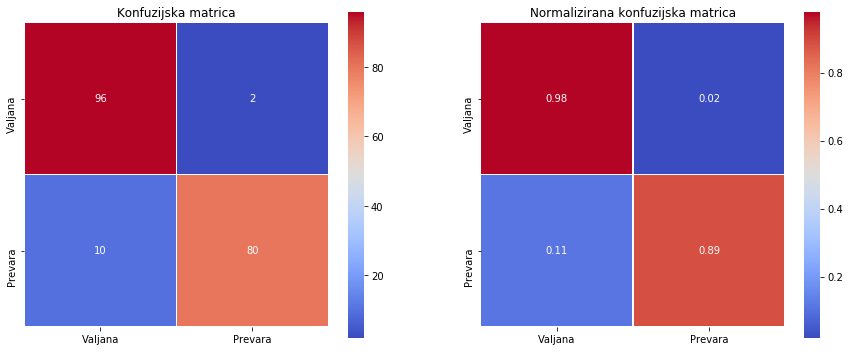

----------------------------------------------------------------------------------------------------
LGBM


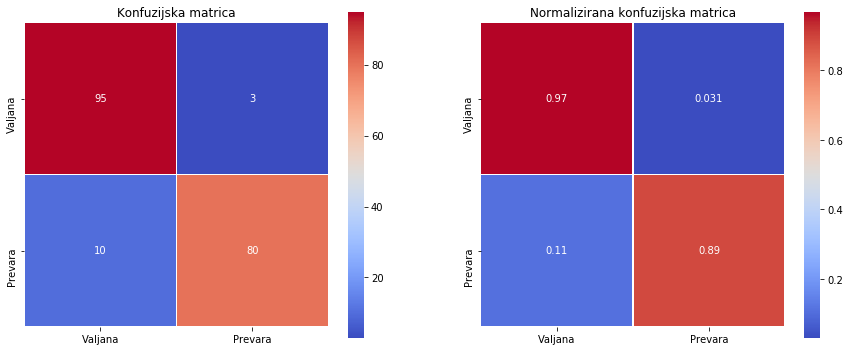

----------------------------------------------------------------------------------------------------
CatBoost


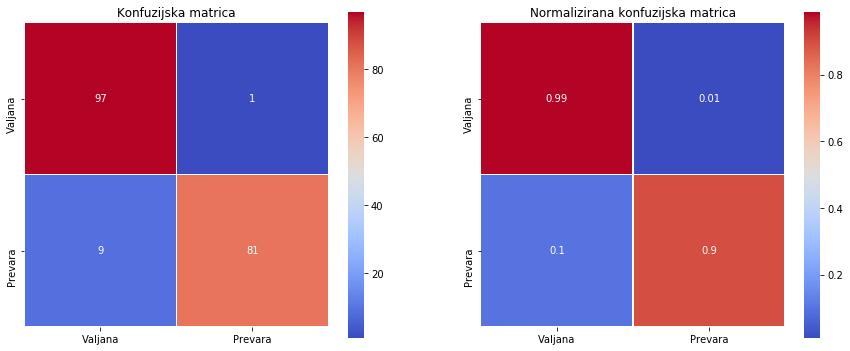

----------------------------------------------------------------------------------------------------
AdaBoost


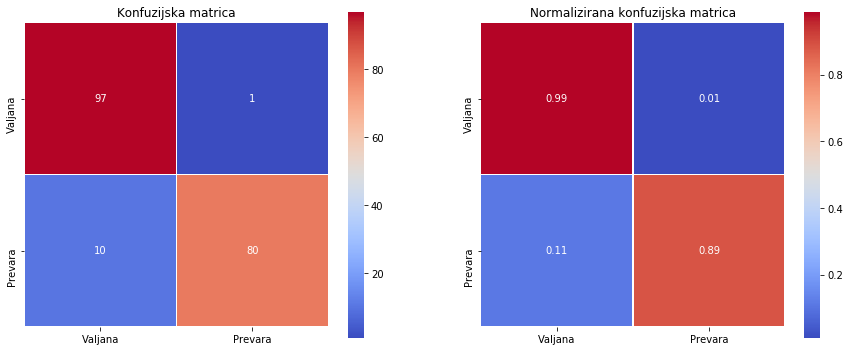

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [78]:
xgb_y_pred_usample_params_cut = xgb_params_usample_cut.predict(X_usample_cut_test)
lgbm_y_pred_usample_params_cut = lgbm_params_usample_cut.predict(X_usample_cut_test)
cat_y_pred_usample_params_cut = cat_params_usample_cut.predict(X_usample_cut_test)
ada_y_pred_usample_params_cut = ada_params_usample_cut.predict(X_usample_cut_test)

print('--'*50)
print('Testiranje (na undersampleu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_usample_cut_test, xgb_y_pred_usample_params_cut)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_usample_cut_test, lgbm_y_pred_usample_params_cut)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_usample_cut_test, cat_y_pred_usample_params_cut)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_usample_cut_test, ada_y_pred_usample_params_cut)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_usample_cut_test, xgb_y_pred_usample_params_cut))
print('--'*50)
print('LGBM')
print(classification_report(y_usample_cut_test, lgbm_y_pred_usample_params_cut))
print('--'*50)
print('CatBoost')
print(classification_report(y_usample_cut_test, cat_y_pred_usample_params_cut))
print('--'*50)
print('AdaBoost')
print(classification_report(y_usample_cut_test, ada_y_pred_usample_params_cut))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, xgb_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, lgbm_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, cat_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, ada_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('*'*100)


----------------------------------------------------------------------------------------------------
Testiranje (na cijelom datasetu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
XGB
	Precision score: 7.290000000000001%
	Recall score: 95.92%
	F1 score: 13.55%
----------------------------------------------------------------------------------------------------
LGBM
	Precision score: 4.87%
	Recall score: 97.96000000000001%
	F1 score: 9.28%
----------------------------------------------------------------------------------------------------
CatBoost
	Precision score: 6.2%
	Recall score: 95.92%
	F1 score: 11.64%
----------------------------------------------------------------------------------------------------
AdaBoost
	Precision score: 4.64%
	Recall score: 97.96000000000001%
	F1 score: 8.86%
----------------------

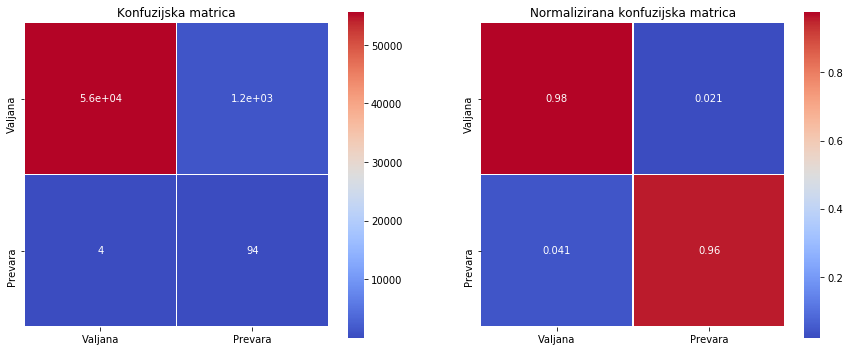

----------------------------------------------------------------------------------------------------
LGBM


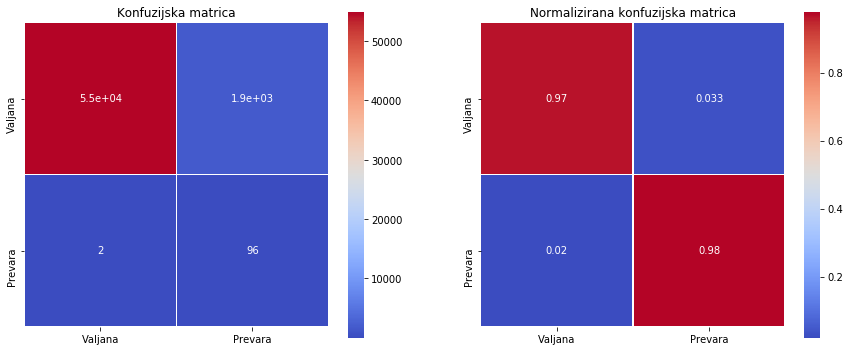

----------------------------------------------------------------------------------------------------
CatBoost


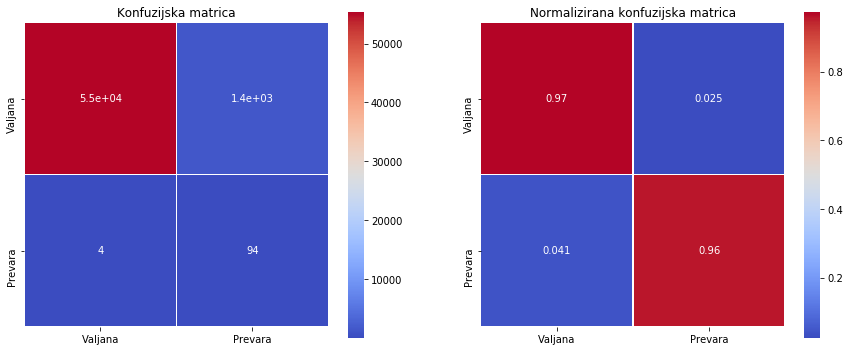

----------------------------------------------------------------------------------------------------
AdaBoost


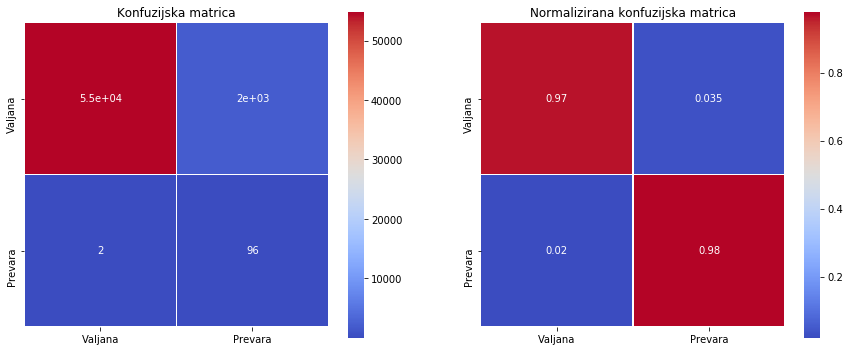

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [79]:
xgb_y_pred_full_params_cut = xgb_params_usample_cut.predict(X_data_test)
lgbm_y_pred_full_params_cut = lgbm_params_usample_cut.predict(X_data_test)
cat_y_pred_full_params_cut = cat_params_usample_cut.predict(X_data_test)
ada_y_pred_full_params_cut = ada_params_usample_cut.predict(X_data_test)

print('--'*50)
print('Testiranje (na cijelom datasetu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('XGB')
precision_recall_f1_scores(y_data_test, xgb_y_pred_full_params_cut)
print('--'*50)
print('LGBM')
precision_recall_f1_scores(y_data_test, lgbm_y_pred_full_params_cut)
print('--'*50)
print('CatBoost')
precision_recall_f1_scores(y_data_test, cat_y_pred_full_params_cut)
print('--'*50)
print('AdaBoost')
precision_recall_f1_scores(y_data_test, ada_y_pred_full_params_cut)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('XGB')
print(classification_report(y_data_test, xgb_y_pred_full_params_cut))
print('--'*50)
print('LGBM')
print(classification_report(y_data_test, lgbm_y_pred_full_params_cut))
print('--'*50)
print('CatBoost')
print(classification_report(y_data_test, cat_y_pred_full_params_cut))
print('--'*50)
print('AdaBoost')
print(classification_report(y_data_test, ada_y_pred_full_params_cut))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_data_test, xgb_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_data_test, lgbm_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, cat_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_data_test, ada_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)


In [82]:
#voting classifier


In [98]:

print('Legenda metodi glasanja:')
print('(1) = logistička regresija, xgb, random forest')
print('(2) = logistička regresija, xgb, random forest, metoda potpornih vektora')
print('(3) = logistička regresija, xgb, random forest, metoda potpornih vektora, k (' + str(knn_params_best['n_neighbors']) + ') najbližih susjeda')
print('(4) = logistička regresija, lgbm, random forest')

voting1_usample = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample), ('xgb', xgb_params_usample), 
    ('rf', rf_params_usample)
])
voting1_usample.fit(X_usample_train, y_usample_train)
voting1_usample_training_score = cross_val_score(voting1_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (1) nad undersampliranim datasetom: " + 
      str(round(voting1_usample_training_score.mean(), 4) * 100) + '%')


voting2_usample = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample), ('xgb', xgb_params_usample), 
    ('rf', rf_params_usample), ('svc', svc_params_usample)
])
voting2_usample.fit(X_usample_train, y_usample_train)
voting2_usample_training_score = cross_val_score(voting2_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (2) nad undersampliranim datasetom: " + 
      str(round(voting2_usample_training_score.mean(), 4) * 100) + '%')



voting3_usample = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample), ('xgb', xgb_params_usample), 
    ('rf', rf_params_usample), ('svc', svc_params_usample), ('knn', knn_params_usample)
])
voting3_usample.fit(X_usample_train, y_usample_train)
voting3_usample_training_score = cross_val_score(voting3_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (3) nad undersampliranim datasetom: " + 
      str(round(voting3_usample_training_score.mean(), 4) * 100) + '%')


voting4_usample = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample), ('lgbm', lgbm_params_usample), 
    ('rf', rf_params_usample)
])
voting4_usample.fit(X_usample_train, y_usample_train)
voting4_usample_training_score = cross_val_score(voting4_usample, X_usample_train, y_usample_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (4) nad undersampliranim datasetom: " + 
      str(round(voting4_usample_training_score.mean(), 4) * 100) + '%')

Legenda metodi glasanja:
(1) = logistička regresija, xgb, random forest
(2) = logistička regresija, xgb, random forest, metoda potpornih vektora
(3) = logistička regresija, xgb, random forest, metoda potpornih vektora, k (3) najbližih susjeda
(4) = logistička regresija, lgbm, random forest
Rezultat treniranja za metodu glasanja (1) nad undersampliranim datasetom: 93.65%
Rezultat treniranja za metodu glasanja (2) nad undersampliranim datasetom: 93.39%
Rezultat treniranja za metodu glasanja (3) nad undersampliranim datasetom: 93.39%
Rezultat treniranja za metodu glasanja (4) nad undersampliranim datasetom: 93.77%


----------------------------------------------------------------------------------------------------
Testiranje (na undersampleu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Voting1 (log_reg, xgb, rf)
	Precision score: 96.74000000000001%
	Recall score: 91.75%
	F1 score: 94.17999999999999%
----------------------------------------------------------------------------------------------------
Voting2 (log_reg, xgb, rf, svc)
	Precision score: 96.74000000000001%
	Recall score: 91.75%
	F1 score: 94.17999999999999%
----------------------------------------------------------------------------------------------------
Voting3 (log_reg, xgb, rf, svc, knn)
	Precision score: 95.74000000000001%
	Recall score: 92.78%
	F1 score: 94.24%
---------------------------------------------------------------------------------------------

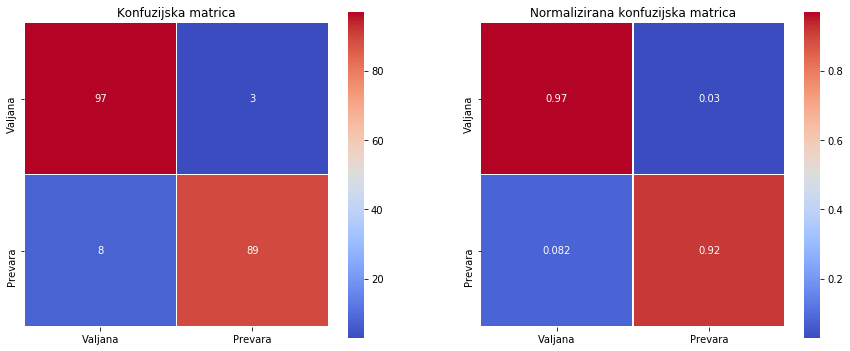

----------------------------------------------------------------------------------------------------
Voting2 (log_reg, xgb, rf, svc)


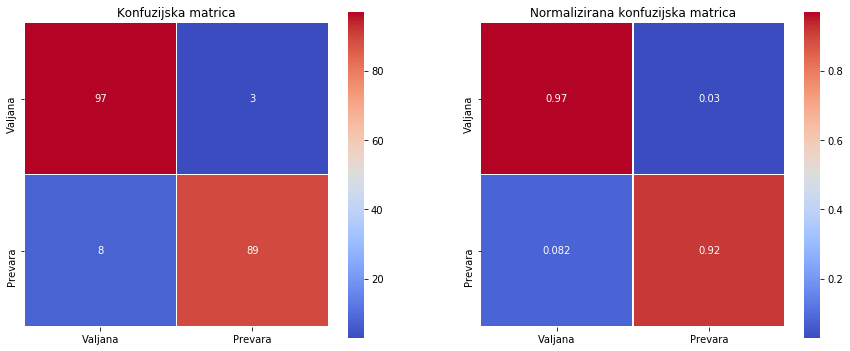

----------------------------------------------------------------------------------------------------
Voting3 (log_reg, xgb, rf, svc, knn)


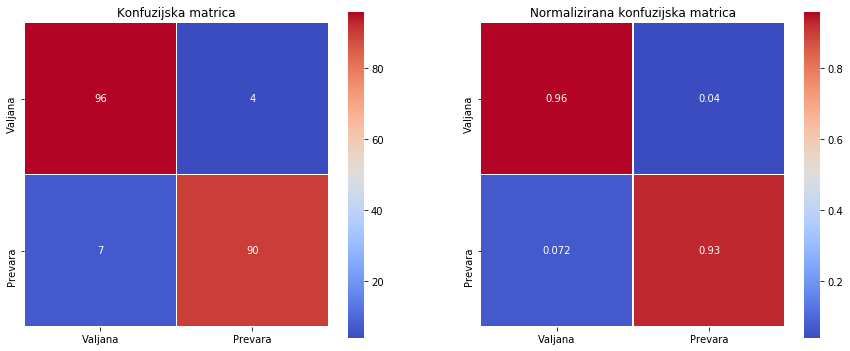

----------------------------------------------------------------------------------------------------
Voting4 (log_reg, lgbm, rf)


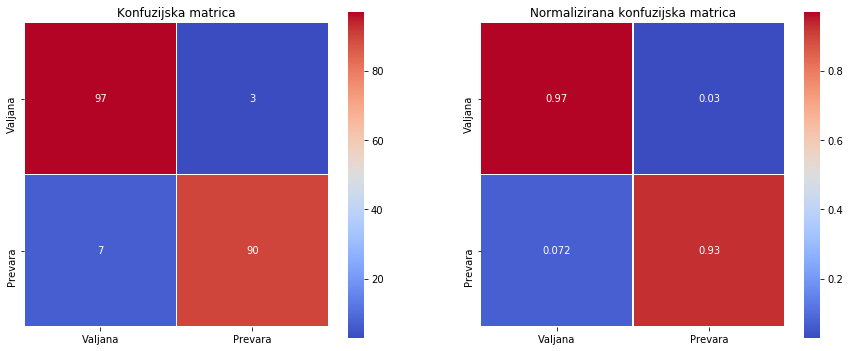

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [100]:
#testiranje

voting1_y_pred_usample_params = voting1_usample.predict(X_usample_test)
voting2_y_pred_usample_params = voting2_usample.predict(X_usample_test)
voting3_y_pred_usample_params = voting3_usample.predict(X_usample_test)
voting4_y_pred_usample_params = voting4_usample.predict(X_usample_test)


print('--'*50)
print('Testiranje (na undersampleu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
precision_recall_f1_scores(y_usample_test, voting1_y_pred_usample_params)
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
precision_recall_f1_scores(y_usample_test, voting2_y_pred_usample_params)
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
precision_recall_f1_scores(y_usample_test, voting3_y_pred_usample_params)
print('--'*50)
print('Voting4 (log_reg, lgbm, rf)')
precision_recall_f1_scores(y_usample_test, voting4_y_pred_usample_params)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
print(classification_report(y_usample_test, voting1_y_pred_usample_params))
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
print(classification_report(y_usample_test, voting2_y_pred_usample_params))
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
print(classification_report(y_usample_test, voting3_y_pred_usample_params))
print('--'*50)
print('Voting4 (log_reg, lgbm, rf)')
print(classification_report(y_usample_test, voting4_y_pred_usample_params))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
plot_confusion_matrix(confusion_matrix(y_usample_test, voting1_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
plot_confusion_matrix(confusion_matrix(y_usample_test, voting2_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
plot_confusion_matrix(confusion_matrix(y_usample_test, voting3_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('Voting4 (log_reg, lgbm, rf)')
plot_confusion_matrix(confusion_matrix(y_usample_test, voting4_y_pred_usample_params), y_usample_test_non_fraud_num, y_usample_test_fraud_num)
print('--'*50)
print('*'*100)


----------------------------------------------------------------------------------------------------
Testiranje (na cijelom datasetu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Voting1 (log_reg, xgb, rf)
	Precision score: 6.88%
	Recall score: 92.86%
	F1 score: 12.82%
----------------------------------------------------------------------------------------------------
Voting2 (log_reg, xgb, rf, svc)
	Precision score: 8.25%
	Recall score: 92.86%
	F1 score: 15.15%
----------------------------------------------------------------------------------------------------
Voting3 (log_reg, xgb, rf, svc, knn)
	Precision score: 7.049999999999999%
	Recall score: 94.89999999999999%
	F1 score: 13.120000000000001%
----------------------------------------------------------------------------------------------------
Voting4 (log_

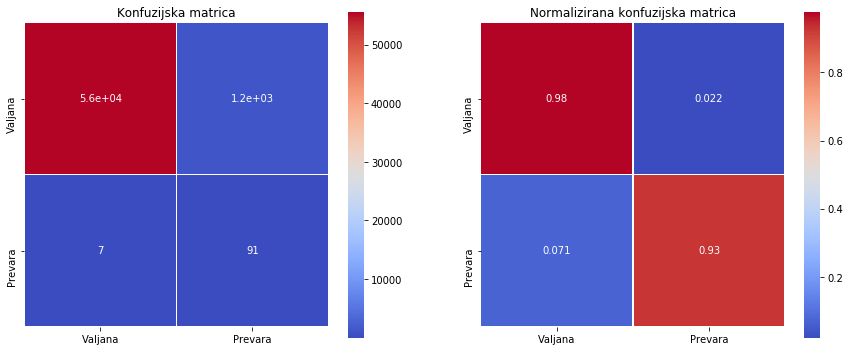

----------------------------------------------------------------------------------------------------
Voting2 (log_reg, xgb, rf, svc)


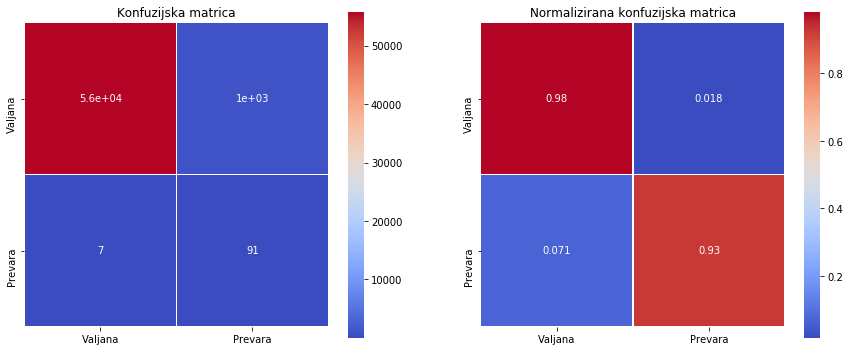

----------------------------------------------------------------------------------------------------
Voting3 (log_reg, xgb, rf, svc, knn)


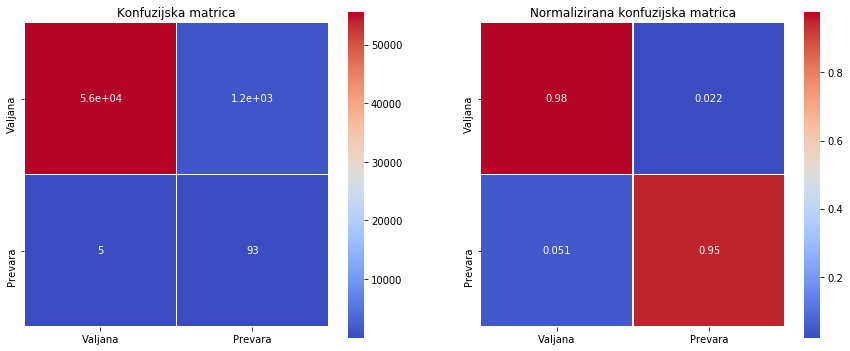

----------------------------------------------------------------------------------------------------
Voting4 (log_reg, lgbm, rf)


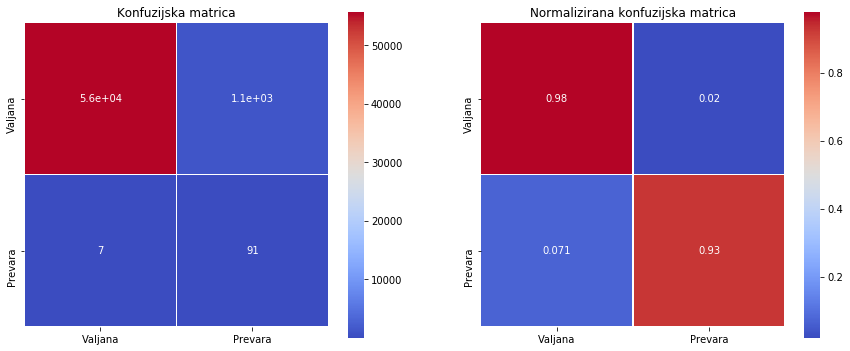

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [101]:
voting1_y_pred_full_params = voting1_usample.predict(X_data_test)
voting2_y_pred_full_params = voting2_usample.predict(X_data_test)
voting3_y_pred_full_params = voting3_usample.predict(X_data_test)
voting4_y_pred_full_params = voting4_usample.predict(X_data_test)

print('--'*50)
print('Testiranje (na cijelom datasetu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
precision_recall_f1_scores(y_data_test, voting1_y_pred_full_params)
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
precision_recall_f1_scores(y_data_test, voting2_y_pred_full_params)
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
precision_recall_f1_scores(y_data_test, voting3_y_pred_full_params)
print('--'*50)
print('Voting4 (log_reg, lgbm, rf)')
precision_recall_f1_scores(y_data_test, voting4_y_pred_full_params)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
print(classification_report(y_data_test, voting1_y_pred_full_params))
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
print(classification_report(y_data_test, voting2_y_pred_full_params))
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
print(classification_report(y_data_test, voting3_y_pred_full_params))
print('--'*50)
print('Voting4 (log_reg, xgb, rf, svc, knn)')
print(classification_report(y_data_test, voting4_y_pred_full_params))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('Voting1 (log_reg, xgb, rf)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting1_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting2 (log_reg, xgb, rf, svc)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting2_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting3 (log_reg, xgb, rf, svc, knn)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting3_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting4 (log_reg, lgbm, rf)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting4_y_pred_full_params), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)


In [111]:

print('Legenda metodi glasanja:')
print('(1) = logistička regresija, adaboost')
print('(2) = logistička regresija, adaboost, random forest')
print('(3) = logistička regresija, adaboost, stabla odluke')
print('(4) = adaboost , random forest')

voting1_usample_cut = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample_cut), ('ada', ada_params_usample_cut)
])
voting1_usample_cut.fit(X_usample_cut_train, y_usample_cut_train)
voting1_usample_training_score_cut = cross_val_score(voting1_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (1) nad undersampliranim datasetom: " + 
      str(round(voting1_usample_training_score_cut.mean(), 4) * 100) + '%')


voting2_usample_cut = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample_cut), ('ada', ada_params_usample_cut), 
    ('rf', rf_params_usample_cut)
])
voting2_usample_cut.fit(X_usample_cut_train, y_usample_cut_train)
voting2_usample_training_score_cut = cross_val_score(voting2_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (2) nad undersampliranim datasetom: " + 
      str(round(voting2_usample_training_score_cut.mean(), 4) * 100) + '%')



voting3_usample_cut = VotingClassifier(estimators=[
    ('log_reg', log_reg_params_usample_cut), ('ada', ada_params_usample_cut), 
    ('dt', dt_params_usample_cut)
])
voting3_usample_cut.fit(X_usample_cut_train, y_usample_cut_train)
voting3_usample_training_score_cut = cross_val_score(voting3_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (3) nad undersampliranim datasetom: " + 
      str(round(voting3_usample_training_score_cut.mean(), 4) * 100) + '%')


voting4_usample_cut = VotingClassifier(estimators=[
    ('rf', rf_params_usample_cut), ('ada', ada_params_usample_cut), 
])
voting4_usample_cut.fit(X_usample_cut_train, y_usample_cut_train)
voting4_usample_training_score_cut = cross_val_score(voting4_usample_cut, X_usample_cut_train, y_usample_cut_train, cv=skfold)
print("Rezultat treniranja za metodu glasanja (4) nad undersampliranim datasetom: " + 
      str(round(voting4_usample_training_score_cut.mean(), 4) * 100) + '%')

Legenda metodi glasanja:
(1) = logistička regresija, adaboost
(2) = logistička regresija, adaboost, random forest
(3) = logistička regresija, adaboost, stabla odluke
(4) = adaboost , random forest
Rezultat treniranja za metodu glasanja (1) nad undersampliranim datasetom: 93.58%
Rezultat treniranja za metodu glasanja (2) nad undersampliranim datasetom: 93.32000000000001%
Rezultat treniranja za metodu glasanja (3) nad undersampliranim datasetom: 93.45%
Rezultat treniranja za metodu glasanja (4) nad undersampliranim datasetom: 92.25%


----------------------------------------------------------------------------------------------------
Testiranje (na undersampleu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Voting1 (AdaBoost, log_reg)
	Precision score: 98.75%
	Recall score: 87.78%
	F1 score: 92.94%
----------------------------------------------------------------------------------------------------
Voting2 (AdaBoost, log_reg, rf)
	Precision score: 96.43%
	Recall score: 90.0%
	F1 score: 93.10000000000001%
----------------------------------------------------------------------------------------------------
Voting3 (AdaBoost, log_reg, dt)
	Precision score: 97.59%
	Recall score: 90.0%
	F1 score: 93.64%
----------------------------------------------------------------------------------------------------
Voting4 (AdaBoost, rf)
	Precision score: 100.0

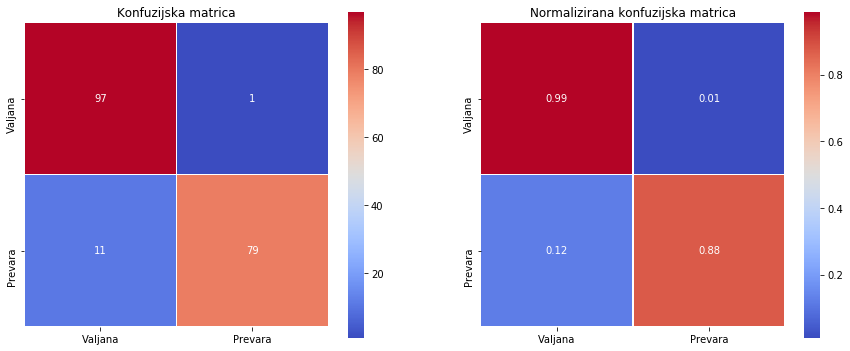

----------------------------------------------------------------------------------------------------
LGBM


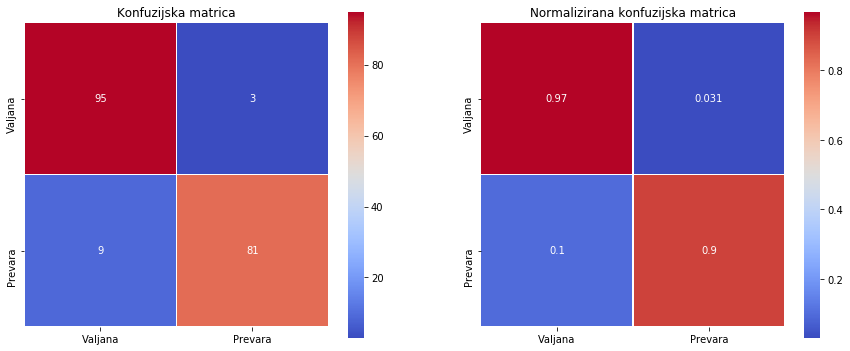

----------------------------------------------------------------------------------------------------
CatBoost


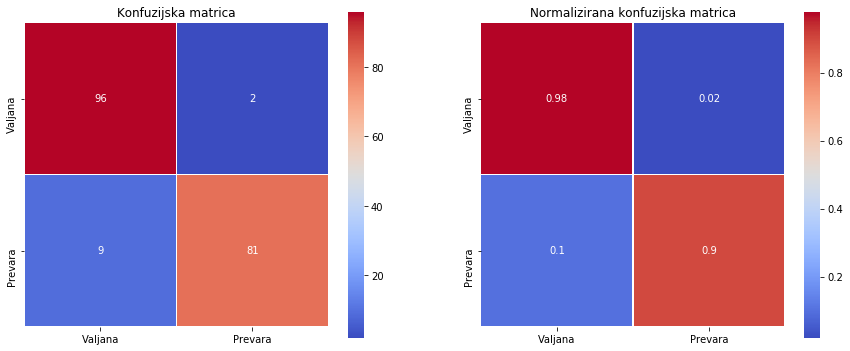

----------------------------------------------------------------------------------------------------
AdaBoost


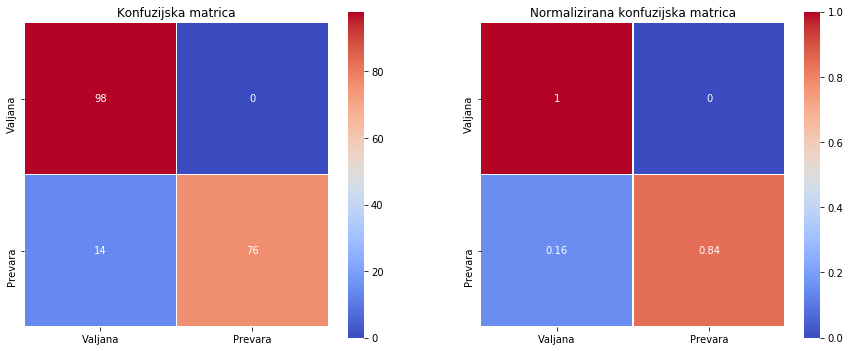

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [112]:
voting1_y_pred_usample_params_cut = voting1_usample_cut.predict(X_usample_cut_test)
voting2_y_pred_usample_params_cut = voting2_usample_cut.predict(X_usample_cut_test)
voting3_y_pred_usample_params_cut = voting3_usample_cut.predict(X_usample_cut_test)
voting4_y_pred_usample_params_cut = voting4_usample_cut.predict(X_usample_cut_test)

print('--'*50)
print('Testiranje (na undersampleu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('Voting1 (AdaBoost, log_reg)')
precision_recall_f1_scores(y_usample_cut_test, voting1_y_pred_usample_params_cut)
print('--'*50)
print('Voting2 (AdaBoost, log_reg, rf)')
precision_recall_f1_scores(y_usample_cut_test, voting2_y_pred_usample_params_cut)
print('--'*50)
print('Voting3 (AdaBoost, log_reg, dt)')
precision_recall_f1_scores(y_usample_cut_test, voting3_y_pred_usample_params_cut)
print('--'*50)
print('Voting4 (AdaBoost, rf)')
precision_recall_f1_scores(y_usample_cut_test, voting4_y_pred_usample_params_cut)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('Voting1 (AdaBoost, log_reg)')
print(classification_report(y_usample_cut_test, voting1_y_pred_usample_params_cut))
print('--'*50)
print('Voting2 (AdaBoost, log_reg, rf)')
print(classification_report(y_usample_cut_test, voting2_y_pred_usample_params_cut))
print('--'*50)
print('Voting3 (AdaBoost, log_reg, dt)')
print(classification_report(y_usample_cut_test, voting3_y_pred_usample_params_cut))
print('--'*50)
print('Voting4 (AdaBoost, rf)')
print(classification_report(y_usample_cut_test, voting4_y_pred_usample_params_cut))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('XGB')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, voting1_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('LGBM')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, voting2_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('CatBoost')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, voting3_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('AdaBoost')
plot_confusion_matrix(confusion_matrix(y_usample_cut_test, voting4_y_pred_usample_params_cut), y_usample_cut_test_non_fraud_num, y_usample_cut_test_fraud_num)
print('--'*50)
print('*'*100)


----------------------------------------------------------------------------------------------------
Testiranje (na cijelom datasetu):
Precision-recall-f1:
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Voting1 (AdaBoost, log_reg)
	Precision score: 8.5%
	Recall score: 89.8%
	F1 score: 15.53%
----------------------------------------------------------------------------------------------------
Voting2 (AdaBoost, log_reg, rf)
	Precision score: 7.580000000000001%
	Recall score: 92.86%
	F1 score: 14.01%
----------------------------------------------------------------------------------------------------
Voting3 (AdaBoost, log_reg, dt)
	Precision score: 7.76%
	Recall score: 92.86%
	F1 score: 14.330000000000002%
----------------------------------------------------------------------------------------------------
Voting4 (AdaBoost, rf)
	Precisi

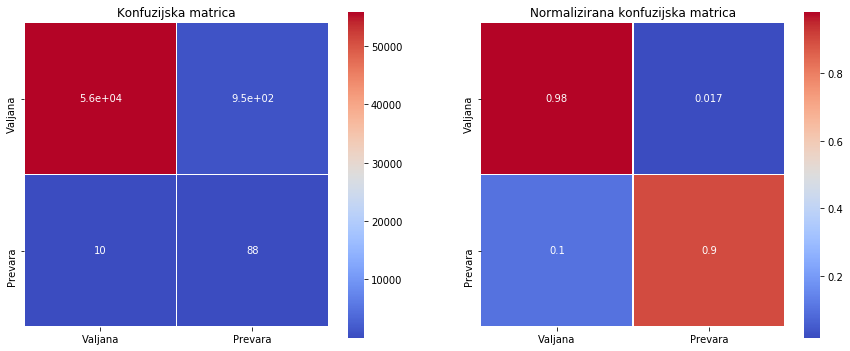

----------------------------------------------------------------------------------------------------
Voting2 (AdaBoost, log_reg, rf)


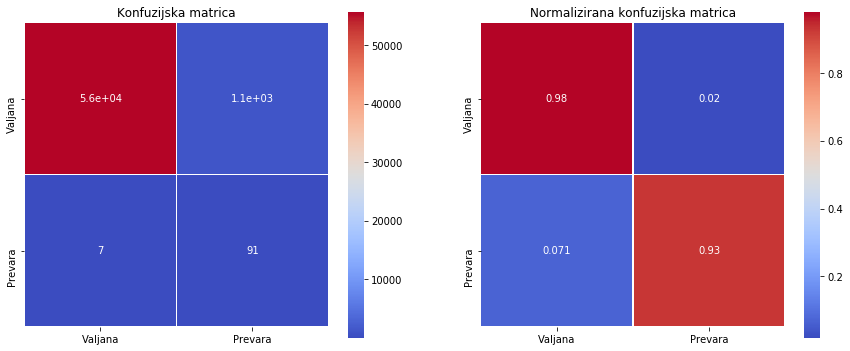

----------------------------------------------------------------------------------------------------
Voting3 (AdaBoost, log_reg, dt)


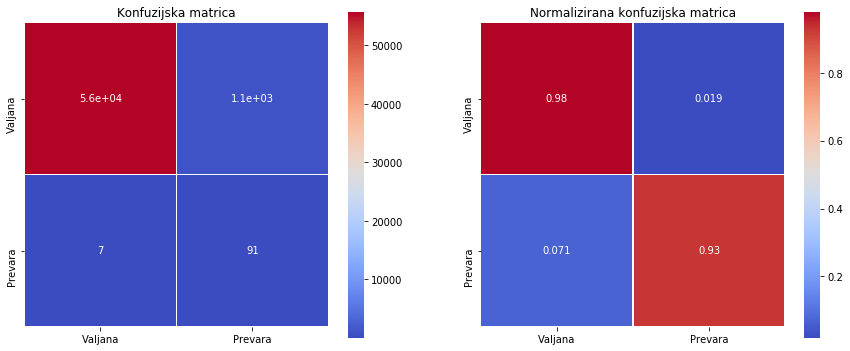

----------------------------------------------------------------------------------------------------
Voting4 (AdaBoost, rf)


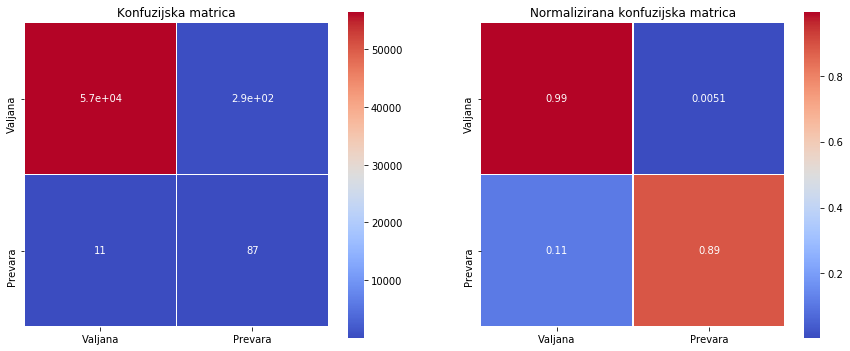

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [113]:
voting1_y_pred_full_params_cut = voting1_usample_cut.predict(X_data_test)
voting2_y_pred_full_params_cut = voting2_usample_cut.predict(X_data_test)
voting3_y_pred_full_params_cut = voting3_usample_cut.predict(X_data_test)
voting4_y_pred_full_params_cut = voting4_usample_cut.predict(X_data_test)

print('--'*50)
print('Testiranje (na cijelom datasetu):')
print('Precision-recall-f1:')
print('*'*100)
print('--'*50)
print('Voting1 (AdaBoost, log_reg)')
precision_recall_f1_scores(y_data_test, voting1_y_pred_full_params_cut)
print('--'*50)
print('Voting2 (AdaBoost, log_reg, rf)')
precision_recall_f1_scores(y_data_test, voting2_y_pred_full_params_cut)
print('--'*50)
print('Voting3 (AdaBoost, log_reg, dt)')
precision_recall_f1_scores(y_data_test, voting3_y_pred_full_params_cut)
print('--'*50)
print('Voting4 (AdaBoost, rf)')
precision_recall_f1_scores(y_data_test, voting4_y_pred_full_params_cut)
print('--'*50)
print('*'*100)
print('Klasifikacijski report:')
print('*'*100)
print('--'*50)
print('Voting1 (AdaBoost, log_reg)')
print(classification_report(y_data_test, voting1_y_pred_full_params_cut))
print('--'*50)
print('Voting2 (AdaBoost, log_reg, rf)')
print(classification_report(y_data_test, voting2_y_pred_full_params_cut))
print('--'*50)
print('Voting3 (AdaBoost, log_reg, dt)')
print(classification_report(y_data_test, voting3_y_pred_full_params_cut))
print('--'*50)
print('Voting4 (AdaBoost, rf)')
print(classification_report(y_data_test, voting4_y_pred_full_params_cut))
print('--'*50)
print('*'*100)
print('Konfuzijske matrice:')
print('*'*100)
print('--'*50)
print('Voting1 (AdaBoost, log_reg)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting1_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting2 (AdaBoost, log_reg, rf)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting2_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting3 (AdaBoost, log_reg, dt)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting3_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('Voting4 (AdaBoost, rf)')
plot_confusion_matrix(confusion_matrix(y_data_test, voting4_y_pred_full_params_cut), y_data_test_non_fraud_num, y_data_test_fraud_num)
print('--'*50)
print('*'*100)
